In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%%time
df = pd.read_csv('drive/MyDrive/Major Project/dataset_processed.csv',index_col = 'Index' )

CPU times: user 21.7 s, sys: 2.28 s, total: 24 s
Wall time: 32.3 s


In [ ]:
df.head()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
Index,,,,,,,,,,,,,,,,,,,,,
1,-0.474824,-0.039780,-0.505322,0.639275,0.0,0.090561,-0.333333,-0.325408,-0.157811,0.156726,...,0.085627,-0.038686,0.070901,-0.25,-0.087360,0.459388,0.666667,0.666667,0.333333,0.0
2,-1.318108,0.327812,-0.482927,0.688948,0.0,-0.304530,0.000000,0.188385,-0.364190,0.145798,...,0.364733,4.165028,0.925335,0.25,-0.384190,-0.618739,-0.166667,0.866667,-0.333333,0.0
4,0.573975,-0.001478,1.168774,0.132133,0.0,1.502342,0.000000,-0.349548,-0.571666,0.469348,...,-0.033211,0.158986,-0.367976,0.50,-0.095336,0.382246,0.166667,0.866667,-0.416667,0.0
7,-0.170791,-0.041258,0.989211,0.078292,0.0,-0.366133,-0.666667,-0.276246,0.249174,-0.087689,...,-0.920689,-0.038734,-0.192986,0.25,-0.043869,0.046575,-0.833333,-0.333333,-0.666667,0.0
9,-0.311537,0.014160,-0.536017,-0.237329,0.0,-0.533354,-0.666667,-0.271449,0.069038,0.075861,...,-0.962446,-0.038681,-0.571914,0.25,-0.363691,-1.218491,-0.833333,-0.600000,0.000000,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4001471 entries, 1 to 5956840
Data columns (total 23 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   pH                      float64
 1   Iron                    float64
 2   Nitrate                 float64
 3   Chloride                float64
 4   Lead                    float64
 5   Zinc                    float64
 6   Color                   float64
 7   Turbidity               float64
 8   Fluoride                float64
 9   Copper                  float64
 10  Odor                    float64
 11  Sulfate                 float64
 12  Conductivity            float64
 13  Chlorine                float64
 14  Manganese               float64
 15  Total Dissolved Solids  float64
 16  Source                  float64
 17  Water Temperature       float64
 18  Air Temperature         float64
 19  Month                   float64
 20  Day                     float64
 21  Time of Day             float64
 22 

In [ ]:
X = df.drop('Target', axis = 1)
y = df.Target

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scale features for SVM training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the SGDClassifier with hinge loss for linear SVM
model = SGDClassifier(
    loss="hinge",
    max_iter=1,
    tol=None,
    random_state=42,
    warm_start=True,
    learning_rate="adaptive",
    eta0=0.01
)

# Training parameters
epochs = 1000
batch_size = 50000
patience = 5
best_loss = float("inf")
epochs_no_improve = 0

# Start batch training with early stopping and checkpoints
for epoch in tqdm(range(epochs), desc="Training Progress"):
    for i in range(0, len(X_scaled), batch_size):
        X_batch = X_scaled[i:i + batch_size]
        y_batch = y[i:i + batch_size]
        model.partial_fit(X_batch, y_batch, classes=np.unique(y))

        # SVM doesn’t use log loss, but hinge loss can be approximated this way
        current_loss = np.mean(np.maximum(0, 1 - y * model.decision_function(X_scaled)))

        # Early stopping logic
        if current_loss < best_loss:
            best_loss = current_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

# Extract feature coefficients to approximate importance
feature_importances = np.abs(model.coef_[0])

# Create a DataFrame for feature importance and display top 10 features
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

print("Top 10 important features for SVM:")
print(feature_importance_df.sort_values(by='weights', ascending=False).head(10))


Training Progress:   0%|          | 1/1000 [00:05<1:25:12,  5.12s/it]

Early stopping at epoch 0


Training Progress:   0%|          | 2/1000 [00:05<39:52,  2.40s/it]  

Early stopping at epoch 1


Training Progress:   0%|          | 3/1000 [00:06<25:29,  1.53s/it]

Early stopping at epoch 2


Training Progress:   0%|          | 4/1000 [00:06<18:20,  1.10s/it]

Early stopping at epoch 3


Training Progress:   0%|          | 5/1000 [00:06<13:57,  1.19it/s]

Early stopping at epoch 4


Training Progress:   1%|          | 6/1000 [00:07<11:16,  1.47it/s]

Early stopping at epoch 5


Training Progress:   1%|          | 7/1000 [00:07<09:31,  1.74it/s]

Early stopping at epoch 6


Training Progress:   1%|          | 8/1000 [00:08<08:22,  1.97it/s]

Early stopping at epoch 7


Training Progress:   1%|          | 9/1000 [00:08<07:38,  2.16it/s]

Early stopping at epoch 8


Training Progress:   1%|          | 10/1000 [00:08<07:07,  2.32it/s]

Early stopping at epoch 9


Training Progress:   1%|          | 11/1000 [00:09<06:50,  2.41it/s]

Early stopping at epoch 10


Training Progress:   1%|          | 12/1000 [00:09<06:34,  2.50it/s]

Early stopping at epoch 11


Training Progress:   1%|▏         | 13/1000 [00:09<06:21,  2.58it/s]

Early stopping at epoch 12


Training Progress:   1%|▏         | 14/1000 [00:10<06:17,  2.61it/s]

Early stopping at epoch 13


Training Progress:   2%|▏         | 15/1000 [00:10<06:10,  2.66it/s]

Early stopping at epoch 14


Training Progress:   2%|▏         | 16/1000 [00:10<06:02,  2.72it/s]

Early stopping at epoch 15


Training Progress:   2%|▏         | 17/1000 [00:11<06:04,  2.70it/s]

Early stopping at epoch 16


Training Progress:   2%|▏         | 18/1000 [00:11<06:00,  2.72it/s]

Early stopping at epoch 17


Training Progress:   2%|▏         | 19/1000 [00:12<06:02,  2.70it/s]

Early stopping at epoch 18


Training Progress:   2%|▏         | 20/1000 [00:12<05:58,  2.74it/s]

Early stopping at epoch 19


Training Progress:   2%|▏         | 21/1000 [00:12<05:54,  2.76it/s]

Early stopping at epoch 20


Training Progress:   2%|▏         | 22/1000 [00:13<05:59,  2.72it/s]

Early stopping at epoch 21


Training Progress:   2%|▏         | 23/1000 [00:13<05:57,  2.74it/s]

Early stopping at epoch 22


Training Progress:   2%|▏         | 24/1000 [00:13<05:54,  2.75it/s]

Early stopping at epoch 23


Training Progress:   2%|▎         | 25/1000 [00:14<05:56,  2.73it/s]

Early stopping at epoch 24


Training Progress:   3%|▎         | 26/1000 [00:14<05:54,  2.75it/s]

Early stopping at epoch 25


Training Progress:   3%|▎         | 27/1000 [00:14<05:51,  2.76it/s]

Early stopping at epoch 26


Training Progress:   3%|▎         | 28/1000 [00:15<05:58,  2.71it/s]

Early stopping at epoch 27


Training Progress:   3%|▎         | 29/1000 [00:15<05:54,  2.74it/s]

Early stopping at epoch 28


Training Progress:   3%|▎         | 30/1000 [00:16<05:51,  2.76it/s]

Early stopping at epoch 29


Training Progress:   3%|▎         | 31/1000 [00:16<05:55,  2.72it/s]

Early stopping at epoch 30


Training Progress:   3%|▎         | 32/1000 [00:16<06:34,  2.45it/s]

Early stopping at epoch 31


Training Progress:   3%|▎         | 33/1000 [00:17<07:13,  2.23it/s]

Early stopping at epoch 32


Training Progress:   3%|▎         | 34/1000 [00:17<07:22,  2.18it/s]

Early stopping at epoch 33


Training Progress:   4%|▎         | 35/1000 [00:18<07:40,  2.10it/s]

Early stopping at epoch 34


Training Progress:   4%|▎         | 36/1000 [00:18<07:44,  2.07it/s]

Early stopping at epoch 35


Training Progress:   4%|▎         | 37/1000 [00:19<07:50,  2.05it/s]

Early stopping at epoch 36


Training Progress:   4%|▍         | 38/1000 [00:19<07:39,  2.09it/s]

Early stopping at epoch 37


Training Progress:   4%|▍         | 39/1000 [00:20<07:51,  2.04it/s]

Early stopping at epoch 38


Training Progress:   4%|▍         | 40/1000 [00:20<08:01,  1.99it/s]

Early stopping at epoch 39


Training Progress:   4%|▍         | 41/1000 [00:21<08:01,  1.99it/s]

Early stopping at epoch 40


Training Progress:   4%|▍         | 42/1000 [00:21<07:37,  2.09it/s]

Early stopping at epoch 41


Training Progress:   4%|▍         | 43/1000 [00:22<07:04,  2.25it/s]

Early stopping at epoch 42


Training Progress:   4%|▍         | 44/1000 [00:22<06:49,  2.33it/s]

Early stopping at epoch 43


Training Progress:   4%|▍         | 45/1000 [00:22<06:25,  2.48it/s]

Early stopping at epoch 44


Training Progress:   5%|▍         | 46/1000 [00:23<06:13,  2.56it/s]

Early stopping at epoch 45


Training Progress:   5%|▍         | 47/1000 [00:23<06:07,  2.59it/s]

Early stopping at epoch 46


Training Progress:   5%|▍         | 48/1000 [00:24<06:02,  2.63it/s]

Early stopping at epoch 47


Training Progress:   5%|▍         | 49/1000 [00:24<05:55,  2.68it/s]

Early stopping at epoch 48


Training Progress:   5%|▌         | 50/1000 [00:24<05:49,  2.72it/s]

Early stopping at epoch 49


Training Progress:   5%|▌         | 51/1000 [00:25<05:46,  2.74it/s]

Early stopping at epoch 50


Training Progress:   5%|▌         | 52/1000 [00:25<05:48,  2.72it/s]

Early stopping at epoch 51


Training Progress:   5%|▌         | 53/1000 [00:26<07:13,  2.18it/s]

Early stopping at epoch 52


Training Progress:   5%|▌         | 54/1000 [00:26<06:42,  2.35it/s]

Early stopping at epoch 53


Training Progress:   6%|▌         | 55/1000 [00:26<06:25,  2.45it/s]

Early stopping at epoch 54


Training Progress:   6%|▌         | 56/1000 [00:27<06:11,  2.54it/s]

Early stopping at epoch 55


Training Progress:   6%|▌         | 57/1000 [00:27<06:02,  2.60it/s]

Early stopping at epoch 56


Training Progress:   6%|▌         | 58/1000 [00:28<05:57,  2.63it/s]

Early stopping at epoch 57


Training Progress:   6%|▌         | 59/1000 [00:28<05:53,  2.66it/s]

Early stopping at epoch 58


Training Progress:   6%|▌         | 60/1000 [00:28<05:48,  2.70it/s]

Early stopping at epoch 59


Training Progress:   6%|▌         | 61/1000 [00:29<05:47,  2.70it/s]

Early stopping at epoch 60


Training Progress:   6%|▌         | 62/1000 [00:29<05:46,  2.71it/s]

Early stopping at epoch 61


Training Progress:   6%|▋         | 63/1000 [00:29<05:41,  2.75it/s]

Early stopping at epoch 62


Training Progress:   6%|▋         | 64/1000 [00:30<05:44,  2.71it/s]

Early stopping at epoch 63


Training Progress:   6%|▋         | 65/1000 [00:30<05:41,  2.73it/s]

Early stopping at epoch 64


Training Progress:   7%|▋         | 66/1000 [00:30<05:43,  2.72it/s]

Early stopping at epoch 65


Training Progress:   7%|▋         | 67/1000 [00:31<05:39,  2.75it/s]

Early stopping at epoch 66


Training Progress:   7%|▋         | 68/1000 [00:31<05:43,  2.71it/s]

Early stopping at epoch 67


Training Progress:   7%|▋         | 69/1000 [00:32<06:17,  2.47it/s]

Early stopping at epoch 68


Training Progress:   7%|▋         | 70/1000 [00:32<06:41,  2.32it/s]

Early stopping at epoch 69


Training Progress:   7%|▋         | 71/1000 [00:33<06:59,  2.21it/s]

Early stopping at epoch 70


Training Progress:   7%|▋         | 72/1000 [00:33<07:13,  2.14it/s]

Early stopping at epoch 71


Training Progress:   7%|▋         | 73/1000 [00:34<07:28,  2.07it/s]

Early stopping at epoch 72


Training Progress:   7%|▋         | 74/1000 [00:34<07:40,  2.01it/s]

Early stopping at epoch 73


Training Progress:   8%|▊         | 75/1000 [00:35<07:42,  2.00it/s]

Early stopping at epoch 74


Training Progress:   8%|▊         | 76/1000 [00:35<07:43,  1.99it/s]

Early stopping at epoch 75


Training Progress:   8%|▊         | 77/1000 [00:36<07:41,  2.00it/s]

Early stopping at epoch 76


Training Progress:   8%|▊         | 78/1000 [00:36<07:41,  2.00it/s]

Early stopping at epoch 77


Training Progress:   8%|▊         | 79/1000 [00:37<07:16,  2.11it/s]

Early stopping at epoch 78


Training Progress:   8%|▊         | 80/1000 [00:37<06:47,  2.26it/s]

Early stopping at epoch 79


Training Progress:   8%|▊         | 81/1000 [00:37<06:26,  2.38it/s]

Early stopping at epoch 80


Training Progress:   8%|▊         | 82/1000 [00:38<06:09,  2.48it/s]

Early stopping at epoch 81


Training Progress:   8%|▊         | 83/1000 [00:38<06:04,  2.52it/s]

Early stopping at epoch 82


Training Progress:   8%|▊         | 84/1000 [00:38<05:52,  2.60it/s]

Early stopping at epoch 83


Training Progress:   8%|▊         | 85/1000 [00:39<05:44,  2.65it/s]

Early stopping at epoch 84


Training Progress:   9%|▊         | 86/1000 [00:39<05:41,  2.68it/s]

Early stopping at epoch 85


Training Progress:   9%|▊         | 87/1000 [00:40<05:36,  2.71it/s]

Early stopping at epoch 86


Training Progress:   9%|▉         | 88/1000 [00:40<05:35,  2.72it/s]

Early stopping at epoch 87


Training Progress:   9%|▉         | 89/1000 [00:40<05:34,  2.72it/s]

Early stopping at epoch 88


Training Progress:   9%|▉         | 90/1000 [00:41<05:31,  2.75it/s]

Early stopping at epoch 89


Training Progress:   9%|▉         | 91/1000 [00:41<05:35,  2.71it/s]

Early stopping at epoch 90


Training Progress:   9%|▉         | 92/1000 [00:41<05:31,  2.74it/s]

Early stopping at epoch 91


Training Progress:   9%|▉         | 93/1000 [00:42<05:29,  2.75it/s]

Early stopping at epoch 92


Training Progress:   9%|▉         | 94/1000 [00:42<05:35,  2.70it/s]

Early stopping at epoch 93


Training Progress:  10%|▉         | 95/1000 [00:42<05:30,  2.74it/s]

Early stopping at epoch 94


Training Progress:  10%|▉         | 96/1000 [00:43<05:28,  2.75it/s]

Early stopping at epoch 95


Training Progress:  10%|▉         | 97/1000 [00:43<05:28,  2.75it/s]

Early stopping at epoch 96


Training Progress:  10%|▉         | 98/1000 [00:44<05:25,  2.77it/s]

Early stopping at epoch 97


Training Progress:  10%|▉         | 99/1000 [00:44<05:26,  2.76it/s]

Early stopping at epoch 98


Training Progress:  10%|█         | 100/1000 [00:44<05:25,  2.76it/s]

Early stopping at epoch 99


Training Progress:  10%|█         | 101/1000 [00:45<05:21,  2.79it/s]

Early stopping at epoch 100


Training Progress:  10%|█         | 102/1000 [00:45<05:21,  2.79it/s]

Early stopping at epoch 101


Training Progress:  10%|█         | 103/1000 [00:45<05:23,  2.77it/s]

Early stopping at epoch 102


Training Progress:  10%|█         | 104/1000 [00:46<05:22,  2.78it/s]

Early stopping at epoch 103


Training Progress:  10%|█         | 105/1000 [00:46<05:23,  2.77it/s]

Early stopping at epoch 104


Training Progress:  11%|█         | 106/1000 [00:46<05:29,  2.71it/s]

Early stopping at epoch 105


Training Progress:  11%|█         | 107/1000 [00:47<05:59,  2.49it/s]

Early stopping at epoch 106


Training Progress:  11%|█         | 108/1000 [00:47<06:23,  2.33it/s]

Early stopping at epoch 107


Training Progress:  11%|█         | 109/1000 [00:48<06:32,  2.27it/s]

Early stopping at epoch 108


Training Progress:  11%|█         | 110/1000 [00:48<06:51,  2.16it/s]

Early stopping at epoch 109


Training Progress:  11%|█         | 111/1000 [00:49<06:59,  2.12it/s]

Early stopping at epoch 110


Training Progress:  11%|█         | 112/1000 [00:49<07:08,  2.07it/s]

Early stopping at epoch 111


Training Progress:  11%|█▏        | 113/1000 [00:50<07:12,  2.05it/s]

Early stopping at epoch 112


Training Progress:  11%|█▏        | 114/1000 [00:50<07:18,  2.02it/s]

Early stopping at epoch 113


Training Progress:  12%|█▏        | 115/1000 [00:51<07:20,  2.01it/s]

Early stopping at epoch 114


Training Progress:  12%|█▏        | 116/1000 [00:51<07:19,  2.01it/s]

Early stopping at epoch 115


Training Progress:  12%|█▏        | 117/1000 [00:52<06:44,  2.18it/s]

Early stopping at epoch 116


Training Progress:  12%|█▏        | 118/1000 [00:52<06:18,  2.33it/s]

Early stopping at epoch 117


Training Progress:  12%|█▏        | 119/1000 [00:53<06:06,  2.40it/s]

Early stopping at epoch 118


Training Progress:  12%|█▏        | 120/1000 [00:53<05:52,  2.49it/s]

Early stopping at epoch 119


Training Progress:  12%|█▏        | 121/1000 [00:53<05:41,  2.57it/s]

Early stopping at epoch 120


Training Progress:  12%|█▏        | 122/1000 [00:54<05:39,  2.59it/s]

Early stopping at epoch 121


Training Progress:  12%|█▏        | 123/1000 [00:54<05:37,  2.60it/s]

Early stopping at epoch 122


Training Progress:  12%|█▏        | 124/1000 [00:54<05:30,  2.65it/s]

Early stopping at epoch 123


Training Progress:  12%|█▎        | 125/1000 [00:55<05:27,  2.67it/s]

Early stopping at epoch 124


Training Progress:  13%|█▎        | 126/1000 [00:55<05:25,  2.69it/s]

Early stopping at epoch 125


Training Progress:  13%|█▎        | 127/1000 [00:55<05:20,  2.73it/s]

Early stopping at epoch 126


Training Progress:  13%|█▎        | 128/1000 [00:56<05:21,  2.72it/s]

Early stopping at epoch 127


Training Progress:  13%|█▎        | 129/1000 [00:56<05:18,  2.74it/s]

Early stopping at epoch 128


Training Progress:  13%|█▎        | 130/1000 [00:57<05:14,  2.77it/s]

Early stopping at epoch 129


Training Progress:  13%|█▎        | 131/1000 [00:57<05:17,  2.74it/s]

Early stopping at epoch 130


Training Progress:  13%|█▎        | 132/1000 [00:57<05:14,  2.76it/s]

Early stopping at epoch 131


Training Progress:  13%|█▎        | 133/1000 [00:58<05:12,  2.77it/s]

Early stopping at epoch 132


Training Progress:  13%|█▎        | 134/1000 [00:58<05:15,  2.74it/s]

Early stopping at epoch 133


Training Progress:  14%|█▎        | 135/1000 [00:58<05:15,  2.75it/s]

Early stopping at epoch 134


Training Progress:  14%|█▎        | 136/1000 [00:59<05:16,  2.73it/s]

Early stopping at epoch 135


Training Progress:  14%|█▎        | 137/1000 [00:59<05:13,  2.76it/s]

Early stopping at epoch 136


Training Progress:  14%|█▍        | 138/1000 [00:59<05:12,  2.76it/s]

Early stopping at epoch 137


Training Progress:  14%|█▍        | 139/1000 [01:00<05:18,  2.70it/s]

Early stopping at epoch 138


Training Progress:  14%|█▍        | 140/1000 [01:00<05:14,  2.74it/s]

Early stopping at epoch 139


Training Progress:  14%|█▍        | 141/1000 [01:01<05:11,  2.75it/s]

Early stopping at epoch 140


Training Progress:  14%|█▍        | 142/1000 [01:01<05:14,  2.73it/s]

Early stopping at epoch 141


Training Progress:  14%|█▍        | 143/1000 [01:01<05:11,  2.75it/s]

Early stopping at epoch 142


Training Progress:  14%|█▍        | 144/1000 [01:02<05:43,  2.49it/s]

Early stopping at epoch 143


Training Progress:  14%|█▍        | 145/1000 [01:02<06:08,  2.32it/s]

Early stopping at epoch 144


Training Progress:  15%|█▍        | 146/1000 [01:03<06:30,  2.19it/s]

Early stopping at epoch 145


Training Progress:  15%|█▍        | 147/1000 [01:03<06:46,  2.10it/s]

Early stopping at epoch 146


Training Progress:  15%|█▍        | 148/1000 [01:04<06:47,  2.09it/s]

Early stopping at epoch 147


Training Progress:  15%|█▍        | 149/1000 [01:04<06:51,  2.07it/s]

Early stopping at epoch 148


Training Progress:  15%|█▌        | 150/1000 [01:05<07:01,  2.01it/s]

Early stopping at epoch 149


Training Progress:  15%|█▌        | 151/1000 [01:05<07:10,  1.97it/s]

Early stopping at epoch 150


Training Progress:  15%|█▌        | 152/1000 [01:06<07:04,  2.00it/s]

Early stopping at epoch 151


Training Progress:  15%|█▌        | 153/1000 [01:06<07:04,  1.99it/s]

Early stopping at epoch 152


Training Progress:  15%|█▌        | 154/1000 [01:07<06:46,  2.08it/s]

Early stopping at epoch 153


Training Progress:  16%|█▌        | 155/1000 [01:07<06:15,  2.25it/s]

Early stopping at epoch 154


Training Progress:  16%|█▌        | 156/1000 [01:08<05:52,  2.39it/s]

Early stopping at epoch 155


Training Progress:  16%|█▌        | 157/1000 [01:08<05:38,  2.49it/s]

Early stopping at epoch 156


Training Progress:  16%|█▌        | 158/1000 [01:08<05:30,  2.55it/s]

Early stopping at epoch 157


Training Progress:  16%|█▌        | 159/1000 [01:09<05:20,  2.63it/s]

Early stopping at epoch 158


Training Progress:  16%|█▌        | 160/1000 [01:09<05:14,  2.67it/s]

Early stopping at epoch 159


Training Progress:  16%|█▌        | 161/1000 [01:09<05:16,  2.65it/s]

Early stopping at epoch 160


Training Progress:  16%|█▌        | 162/1000 [01:10<05:10,  2.70it/s]

Early stopping at epoch 161


Training Progress:  16%|█▋        | 163/1000 [01:10<05:09,  2.71it/s]

Early stopping at epoch 162


Training Progress:  16%|█▋        | 164/1000 [01:10<05:08,  2.71it/s]

Early stopping at epoch 163


Training Progress:  16%|█▋        | 165/1000 [01:11<05:04,  2.74it/s]

Early stopping at epoch 164


Training Progress:  17%|█▋        | 166/1000 [01:11<05:05,  2.73it/s]

Early stopping at epoch 165


Training Progress:  17%|█▋        | 167/1000 [01:12<05:04,  2.74it/s]

Early stopping at epoch 166


Training Progress:  17%|█▋        | 168/1000 [01:12<05:03,  2.75it/s]

Early stopping at epoch 167


Training Progress:  17%|█▋        | 169/1000 [01:12<04:59,  2.77it/s]

Early stopping at epoch 168


Training Progress:  17%|█▋        | 170/1000 [01:13<05:00,  2.76it/s]

Early stopping at epoch 169


Training Progress:  17%|█▋        | 171/1000 [01:13<04:59,  2.77it/s]

Early stopping at epoch 170


Training Progress:  17%|█▋        | 172/1000 [01:13<04:59,  2.76it/s]

Early stopping at epoch 171


Training Progress:  17%|█▋        | 173/1000 [01:14<04:59,  2.76it/s]

Early stopping at epoch 172


Training Progress:  17%|█▋        | 174/1000 [01:14<04:59,  2.76it/s]

Early stopping at epoch 173


Training Progress:  18%|█▊        | 175/1000 [01:14<04:57,  2.77it/s]

Early stopping at epoch 174


Training Progress:  18%|█▊        | 176/1000 [01:15<04:59,  2.76it/s]

Early stopping at epoch 175


Training Progress:  18%|█▊        | 177/1000 [01:15<04:57,  2.77it/s]

Early stopping at epoch 176


Training Progress:  18%|█▊        | 178/1000 [01:15<04:54,  2.79it/s]

Early stopping at epoch 177


Training Progress:  18%|█▊        | 179/1000 [01:16<05:00,  2.73it/s]

Early stopping at epoch 178


Training Progress:  18%|█▊        | 180/1000 [01:16<04:59,  2.74it/s]

Early stopping at epoch 179


Training Progress:  18%|█▊        | 181/1000 [01:17<05:02,  2.70it/s]

Early stopping at epoch 180


Training Progress:  18%|█▊        | 182/1000 [01:17<05:27,  2.50it/s]

Early stopping at epoch 181


Training Progress:  18%|█▊        | 183/1000 [01:18<05:55,  2.30it/s]

Early stopping at epoch 182


Training Progress:  18%|█▊        | 184/1000 [01:18<06:06,  2.23it/s]

Early stopping at epoch 183


Training Progress:  18%|█▊        | 185/1000 [01:19<06:22,  2.13it/s]

Early stopping at epoch 184


Training Progress:  19%|█▊        | 186/1000 [01:19<06:28,  2.09it/s]

Early stopping at epoch 185


Training Progress:  19%|█▊        | 187/1000 [01:20<06:26,  2.10it/s]

Early stopping at epoch 186


Training Progress:  19%|█▉        | 188/1000 [01:20<06:33,  2.06it/s]

Early stopping at epoch 187


Training Progress:  19%|█▉        | 189/1000 [01:21<06:42,  2.02it/s]

Early stopping at epoch 188


Training Progress:  19%|█▉        | 190/1000 [01:21<06:49,  1.98it/s]

Early stopping at epoch 189


Training Progress:  19%|█▉        | 191/1000 [01:22<06:43,  2.01it/s]

Early stopping at epoch 190


Training Progress:  19%|█▉        | 192/1000 [01:22<06:36,  2.04it/s]

Early stopping at epoch 191


Training Progress:  19%|█▉        | 193/1000 [01:22<06:04,  2.22it/s]

Early stopping at epoch 192


Training Progress:  19%|█▉        | 194/1000 [01:23<05:41,  2.36it/s]

Early stopping at epoch 193


Training Progress:  20%|█▉        | 195/1000 [01:23<05:32,  2.42it/s]

Early stopping at epoch 194


Training Progress:  20%|█▉        | 196/1000 [01:24<05:19,  2.52it/s]

Early stopping at epoch 195


Training Progress:  20%|█▉        | 197/1000 [01:24<05:09,  2.60it/s]

Early stopping at epoch 196


Training Progress:  20%|█▉        | 198/1000 [01:24<05:02,  2.65it/s]

Early stopping at epoch 197


Training Progress:  20%|█▉        | 199/1000 [01:25<04:56,  2.71it/s]

Early stopping at epoch 198


Training Progress:  20%|██        | 200/1000 [01:25<04:57,  2.69it/s]

Early stopping at epoch 199


Training Progress:  20%|██        | 201/1000 [01:25<04:50,  2.75it/s]

Early stopping at epoch 200


Training Progress:  20%|██        | 202/1000 [01:26<04:49,  2.76it/s]

Early stopping at epoch 201


Training Progress:  20%|██        | 203/1000 [01:26<04:53,  2.72it/s]

Early stopping at epoch 202


Training Progress:  20%|██        | 204/1000 [01:26<04:49,  2.75it/s]

Early stopping at epoch 203


Training Progress:  20%|██        | 205/1000 [01:27<04:46,  2.78it/s]

Early stopping at epoch 204


Training Progress:  21%|██        | 206/1000 [01:27<04:50,  2.73it/s]

Early stopping at epoch 205


Training Progress:  21%|██        | 207/1000 [01:28<04:48,  2.74it/s]

Early stopping at epoch 206


Training Progress:  21%|██        | 208/1000 [01:28<04:48,  2.75it/s]

Early stopping at epoch 207


Training Progress:  21%|██        | 209/1000 [01:28<04:47,  2.75it/s]

Early stopping at epoch 208


Training Progress:  21%|██        | 210/1000 [01:29<04:47,  2.75it/s]

Early stopping at epoch 209


Training Progress:  21%|██        | 211/1000 [01:29<04:48,  2.74it/s]

Early stopping at epoch 210


Training Progress:  21%|██        | 212/1000 [01:29<04:47,  2.74it/s]

Early stopping at epoch 211


Training Progress:  21%|██▏       | 213/1000 [01:30<04:47,  2.73it/s]

Early stopping at epoch 212


Training Progress:  21%|██▏       | 214/1000 [01:30<04:46,  2.74it/s]

Early stopping at epoch 213


Training Progress:  22%|██▏       | 215/1000 [01:30<04:46,  2.74it/s]

Early stopping at epoch 214


Training Progress:  22%|██▏       | 216/1000 [01:31<04:44,  2.76it/s]

Early stopping at epoch 215


Training Progress:  22%|██▏       | 217/1000 [01:31<04:43,  2.77it/s]

Early stopping at epoch 216


Training Progress:  22%|██▏       | 218/1000 [01:32<04:44,  2.75it/s]

Early stopping at epoch 217


Training Progress:  22%|██▏       | 219/1000 [01:32<04:46,  2.72it/s]

Early stopping at epoch 218


Training Progress:  22%|██▏       | 220/1000 [01:32<04:59,  2.60it/s]

Early stopping at epoch 219


Training Progress:  22%|██▏       | 221/1000 [01:33<05:21,  2.42it/s]

Early stopping at epoch 220


Training Progress:  22%|██▏       | 222/1000 [01:33<05:41,  2.28it/s]

Early stopping at epoch 221


Training Progress:  22%|██▏       | 223/1000 [01:34<05:56,  2.18it/s]

Early stopping at epoch 222


Training Progress:  22%|██▏       | 224/1000 [01:34<06:03,  2.14it/s]

Early stopping at epoch 223


Training Progress:  22%|██▎       | 225/1000 [01:35<06:09,  2.10it/s]

Early stopping at epoch 224


Training Progress:  23%|██▎       | 226/1000 [01:35<06:19,  2.04it/s]

Early stopping at epoch 225


Training Progress:  23%|██▎       | 227/1000 [01:36<06:17,  2.05it/s]

Early stopping at epoch 226


Training Progress:  23%|██▎       | 228/1000 [01:36<06:18,  2.04it/s]

Early stopping at epoch 227


Training Progress:  23%|██▎       | 229/1000 [01:37<06:24,  2.01it/s]

Early stopping at epoch 228


Training Progress:  23%|██▎       | 230/1000 [01:37<06:24,  2.00it/s]

Early stopping at epoch 229


Training Progress:  23%|██▎       | 231/1000 [01:38<05:52,  2.18it/s]

Early stopping at epoch 230


Training Progress:  23%|██▎       | 232/1000 [01:38<05:29,  2.33it/s]

Early stopping at epoch 231


Training Progress:  23%|██▎       | 233/1000 [01:38<05:12,  2.45it/s]

Early stopping at epoch 232


Training Progress:  23%|██▎       | 234/1000 [01:39<05:11,  2.46it/s]

Early stopping at epoch 233


Training Progress:  24%|██▎       | 235/1000 [01:39<05:01,  2.53it/s]

Early stopping at epoch 234


Training Progress:  24%|██▎       | 236/1000 [01:40<04:54,  2.60it/s]

Early stopping at epoch 235


Training Progress:  24%|██▎       | 237/1000 [01:40<04:51,  2.61it/s]

Early stopping at epoch 236


Training Progress:  24%|██▍       | 238/1000 [01:40<04:45,  2.67it/s]

Early stopping at epoch 237


Training Progress:  24%|██▍       | 239/1000 [01:41<04:41,  2.71it/s]

Early stopping at epoch 238


Training Progress:  24%|██▍       | 240/1000 [01:41<04:41,  2.70it/s]

Early stopping at epoch 239


Training Progress:  24%|██▍       | 241/1000 [01:41<04:38,  2.72it/s]

Early stopping at epoch 240


Training Progress:  24%|██▍       | 242/1000 [01:42<04:36,  2.74it/s]

Early stopping at epoch 241


Training Progress:  24%|██▍       | 243/1000 [01:42<04:36,  2.74it/s]

Early stopping at epoch 242


Training Progress:  24%|██▍       | 244/1000 [01:42<04:32,  2.78it/s]

Early stopping at epoch 243


Training Progress:  24%|██▍       | 245/1000 [01:43<04:30,  2.80it/s]

Early stopping at epoch 244


Training Progress:  25%|██▍       | 246/1000 [01:43<04:33,  2.76it/s]

Early stopping at epoch 245


Training Progress:  25%|██▍       | 247/1000 [01:44<04:32,  2.76it/s]

Early stopping at epoch 246


Training Progress:  25%|██▍       | 248/1000 [01:44<04:31,  2.77it/s]

Early stopping at epoch 247


Training Progress:  25%|██▍       | 249/1000 [01:44<04:32,  2.75it/s]

Early stopping at epoch 248


Training Progress:  25%|██▌       | 250/1000 [01:45<04:30,  2.77it/s]

Early stopping at epoch 249


Training Progress:  25%|██▌       | 251/1000 [01:45<04:32,  2.75it/s]

Early stopping at epoch 250


Training Progress:  25%|██▌       | 252/1000 [01:45<04:33,  2.73it/s]

Early stopping at epoch 251


Training Progress:  25%|██▌       | 253/1000 [01:46<04:31,  2.75it/s]

Early stopping at epoch 252


Training Progress:  25%|██▌       | 254/1000 [01:46<04:32,  2.74it/s]

Early stopping at epoch 253


Training Progress:  26%|██▌       | 255/1000 [01:46<04:28,  2.77it/s]

Early stopping at epoch 254


Training Progress:  26%|██▌       | 256/1000 [01:47<04:28,  2.77it/s]

Early stopping at epoch 255


Training Progress:  26%|██▌       | 257/1000 [01:47<04:32,  2.73it/s]

Early stopping at epoch 256


Training Progress:  26%|██▌       | 258/1000 [01:48<04:44,  2.61it/s]

Early stopping at epoch 257


Training Progress:  26%|██▌       | 259/1000 [01:48<05:10,  2.39it/s]

Early stopping at epoch 258


Training Progress:  26%|██▌       | 260/1000 [01:49<05:26,  2.27it/s]

Early stopping at epoch 259


Training Progress:  26%|██▌       | 261/1000 [01:49<05:35,  2.20it/s]

Early stopping at epoch 260


Training Progress:  26%|██▌       | 262/1000 [01:50<05:44,  2.14it/s]

Early stopping at epoch 261


Training Progress:  26%|██▋       | 263/1000 [01:50<05:48,  2.12it/s]

Early stopping at epoch 262


Training Progress:  26%|██▋       | 264/1000 [01:51<05:56,  2.07it/s]

Early stopping at epoch 263


Training Progress:  26%|██▋       | 265/1000 [01:51<06:01,  2.03it/s]

Early stopping at epoch 264


Training Progress:  27%|██▋       | 266/1000 [01:52<06:06,  2.00it/s]

Early stopping at epoch 265


Training Progress:  27%|██▋       | 267/1000 [01:52<06:07,  2.00it/s]

Early stopping at epoch 266


Training Progress:  27%|██▋       | 268/1000 [01:53<06:08,  1.99it/s]

Early stopping at epoch 267


Training Progress:  27%|██▋       | 269/1000 [01:53<05:37,  2.17it/s]

Early stopping at epoch 268


Training Progress:  27%|██▋       | 270/1000 [01:53<05:16,  2.31it/s]

Early stopping at epoch 269


Training Progress:  27%|██▋       | 271/1000 [01:54<05:03,  2.40it/s]

Early stopping at epoch 270


Training Progress:  27%|██▋       | 272/1000 [01:54<04:51,  2.50it/s]

Early stopping at epoch 271


Training Progress:  27%|██▋       | 273/1000 [01:54<04:39,  2.61it/s]

Early stopping at epoch 272


Training Progress:  27%|██▋       | 274/1000 [01:55<04:35,  2.64it/s]

Early stopping at epoch 273


Training Progress:  28%|██▊       | 275/1000 [01:55<04:31,  2.67it/s]

Early stopping at epoch 274


Training Progress:  28%|██▊       | 276/1000 [01:55<04:27,  2.71it/s]

Early stopping at epoch 275


Training Progress:  28%|██▊       | 277/1000 [01:56<04:28,  2.69it/s]

Early stopping at epoch 276


Training Progress:  28%|██▊       | 278/1000 [01:56<04:25,  2.72it/s]

Early stopping at epoch 277


Training Progress:  28%|██▊       | 279/1000 [01:57<04:29,  2.68it/s]

Early stopping at epoch 278


Training Progress:  28%|██▊       | 280/1000 [01:57<04:25,  2.71it/s]

Early stopping at epoch 279


Training Progress:  28%|██▊       | 281/1000 [01:57<04:25,  2.71it/s]

Early stopping at epoch 280


Training Progress:  28%|██▊       | 282/1000 [01:58<04:25,  2.71it/s]

Early stopping at epoch 281


Training Progress:  28%|██▊       | 283/1000 [01:58<04:23,  2.72it/s]

Early stopping at epoch 282


Training Progress:  28%|██▊       | 284/1000 [01:58<04:22,  2.73it/s]

Early stopping at epoch 283


Training Progress:  28%|██▊       | 285/1000 [01:59<04:22,  2.72it/s]

Early stopping at epoch 284


Training Progress:  29%|██▊       | 286/1000 [01:59<04:20,  2.74it/s]

Early stopping at epoch 285


Training Progress:  29%|██▊       | 287/1000 [02:00<04:18,  2.76it/s]

Early stopping at epoch 286


Training Progress:  29%|██▉       | 288/1000 [02:00<04:23,  2.71it/s]

Early stopping at epoch 287


Training Progress:  29%|██▉       | 289/1000 [02:00<04:20,  2.73it/s]

Early stopping at epoch 288


Training Progress:  29%|██▉       | 290/1000 [02:01<04:19,  2.74it/s]

Early stopping at epoch 289


Training Progress:  29%|██▉       | 291/1000 [02:01<04:20,  2.72it/s]

Early stopping at epoch 290


Training Progress:  29%|██▉       | 292/1000 [02:01<04:18,  2.74it/s]

Early stopping at epoch 291


Training Progress:  29%|██▉       | 293/1000 [02:02<04:23,  2.69it/s]

Early stopping at epoch 292


Training Progress:  29%|██▉       | 294/1000 [02:02<04:17,  2.74it/s]

Early stopping at epoch 293


Training Progress:  30%|██▉       | 295/1000 [02:02<04:15,  2.76it/s]

Early stopping at epoch 294


Training Progress:  30%|██▉       | 296/1000 [02:03<04:42,  2.49it/s]

Early stopping at epoch 295


Training Progress:  30%|██▉       | 297/1000 [02:03<05:05,  2.30it/s]

Early stopping at epoch 296


Training Progress:  30%|██▉       | 298/1000 [02:04<05:24,  2.16it/s]

Early stopping at epoch 297


Training Progress:  30%|██▉       | 299/1000 [02:05<05:33,  2.10it/s]

Early stopping at epoch 298


Training Progress:  30%|███       | 300/1000 [02:05<05:37,  2.07it/s]

Early stopping at epoch 299


Training Progress:  30%|███       | 301/1000 [02:05<05:40,  2.06it/s]

Early stopping at epoch 300


Training Progress:  30%|███       | 302/1000 [02:06<05:43,  2.03it/s]

Early stopping at epoch 301


Training Progress:  30%|███       | 303/1000 [02:07<05:45,  2.01it/s]

Early stopping at epoch 302


Training Progress:  30%|███       | 304/1000 [02:07<05:50,  1.98it/s]

Early stopping at epoch 303


Training Progress:  30%|███       | 305/1000 [02:08<05:51,  1.98it/s]

Early stopping at epoch 304


Training Progress:  31%|███       | 306/1000 [02:08<05:38,  2.05it/s]

Early stopping at epoch 305


Training Progress:  31%|███       | 307/1000 [02:08<05:14,  2.21it/s]

Early stopping at epoch 306


Training Progress:  31%|███       | 308/1000 [02:09<04:54,  2.35it/s]

Early stopping at epoch 307


Training Progress:  31%|███       | 309/1000 [02:09<04:41,  2.45it/s]

Early stopping at epoch 308


Training Progress:  31%|███       | 310/1000 [02:09<04:32,  2.53it/s]

Early stopping at epoch 309


Training Progress:  31%|███       | 311/1000 [02:10<04:26,  2.58it/s]

Early stopping at epoch 310


Training Progress:  31%|███       | 312/1000 [02:10<04:22,  2.62it/s]

Early stopping at epoch 311


Training Progress:  31%|███▏      | 313/1000 [02:11<04:19,  2.65it/s]

Early stopping at epoch 312


Training Progress:  31%|███▏      | 314/1000 [02:11<04:16,  2.67it/s]

Early stopping at epoch 313


Training Progress:  32%|███▏      | 315/1000 [02:11<04:14,  2.69it/s]

Early stopping at epoch 314


Training Progress:  32%|███▏      | 316/1000 [02:12<04:44,  2.41it/s]

Early stopping at epoch 315


Training Progress:  32%|███▏      | 317/1000 [02:12<05:04,  2.24it/s]

Early stopping at epoch 316


Training Progress:  32%|███▏      | 318/1000 [02:13<04:48,  2.36it/s]

Early stopping at epoch 317


Training Progress:  32%|███▏      | 319/1000 [02:13<04:35,  2.47it/s]

Early stopping at epoch 318


Training Progress:  32%|███▏      | 320/1000 [02:13<04:30,  2.51it/s]

Early stopping at epoch 319


Training Progress:  32%|███▏      | 321/1000 [02:14<04:21,  2.60it/s]

Early stopping at epoch 320


Training Progress:  32%|███▏      | 322/1000 [02:14<04:16,  2.64it/s]

Early stopping at epoch 321


Training Progress:  32%|███▏      | 323/1000 [02:15<04:13,  2.67it/s]

Early stopping at epoch 322


Training Progress:  32%|███▏      | 324/1000 [02:15<04:10,  2.70it/s]

Early stopping at epoch 323


Training Progress:  32%|███▎      | 325/1000 [02:15<04:06,  2.73it/s]

Early stopping at epoch 324


Training Progress:  33%|███▎      | 326/1000 [02:16<04:07,  2.72it/s]

Early stopping at epoch 325


Training Progress:  33%|███▎      | 327/1000 [02:16<04:09,  2.70it/s]

Early stopping at epoch 326


Training Progress:  33%|███▎      | 328/1000 [02:16<04:05,  2.74it/s]

Early stopping at epoch 327


Training Progress:  33%|███▎      | 329/1000 [02:17<04:07,  2.71it/s]

Early stopping at epoch 328


Training Progress:  33%|███▎      | 330/1000 [02:17<04:06,  2.72it/s]

Early stopping at epoch 329


Training Progress:  33%|███▎      | 331/1000 [02:17<04:02,  2.76it/s]

Early stopping at epoch 330


Training Progress:  33%|███▎      | 332/1000 [02:18<04:04,  2.73it/s]

Early stopping at epoch 331


Training Progress:  33%|███▎      | 333/1000 [02:18<04:37,  2.40it/s]

Early stopping at epoch 332


Training Progress:  33%|███▎      | 334/1000 [02:19<04:52,  2.27it/s]

Early stopping at epoch 333


Training Progress:  34%|███▎      | 335/1000 [02:19<05:09,  2.15it/s]

Early stopping at epoch 334


Training Progress:  34%|███▎      | 336/1000 [02:20<05:16,  2.10it/s]

Early stopping at epoch 335


Training Progress:  34%|███▎      | 337/1000 [02:20<05:22,  2.06it/s]

Early stopping at epoch 336


Training Progress:  34%|███▍      | 338/1000 [02:21<05:19,  2.07it/s]

Early stopping at epoch 337


Training Progress:  34%|███▍      | 339/1000 [02:21<05:26,  2.03it/s]

Early stopping at epoch 338


Training Progress:  34%|███▍      | 340/1000 [02:22<05:31,  1.99it/s]

Early stopping at epoch 339


Training Progress:  34%|███▍      | 341/1000 [02:22<05:29,  2.00it/s]

Early stopping at epoch 340


Training Progress:  34%|███▍      | 342/1000 [02:23<05:27,  2.01it/s]

Early stopping at epoch 341


Training Progress:  34%|███▍      | 343/1000 [02:23<05:10,  2.12it/s]

Early stopping at epoch 342


Training Progress:  34%|███▍      | 344/1000 [02:24<04:49,  2.27it/s]

Early stopping at epoch 343


Training Progress:  34%|███▍      | 345/1000 [02:24<04:36,  2.37it/s]

Early stopping at epoch 344


Training Progress:  35%|███▍      | 346/1000 [02:24<04:22,  2.49it/s]

Early stopping at epoch 345


Training Progress:  35%|███▍      | 347/1000 [02:25<04:13,  2.57it/s]

Early stopping at epoch 346


Training Progress:  35%|███▍      | 348/1000 [02:25<04:13,  2.58it/s]

Early stopping at epoch 347


Training Progress:  35%|███▍      | 349/1000 [02:25<04:05,  2.65it/s]

Early stopping at epoch 348


Training Progress:  35%|███▌      | 350/1000 [02:26<04:02,  2.68it/s]

Early stopping at epoch 349


Training Progress:  35%|███▌      | 351/1000 [02:26<04:04,  2.66it/s]

Early stopping at epoch 350


Training Progress:  35%|███▌      | 352/1000 [02:27<03:59,  2.71it/s]

Early stopping at epoch 351


Training Progress:  35%|███▌      | 353/1000 [02:27<03:59,  2.70it/s]

Early stopping at epoch 352


Training Progress:  35%|███▌      | 354/1000 [02:27<04:02,  2.66it/s]

Early stopping at epoch 353


Training Progress:  36%|███▌      | 355/1000 [02:28<04:01,  2.67it/s]

Early stopping at epoch 354


Training Progress:  36%|███▌      | 356/1000 [02:28<03:57,  2.71it/s]

Early stopping at epoch 355


Training Progress:  36%|███▌      | 357/1000 [02:28<03:57,  2.71it/s]

Early stopping at epoch 356


Training Progress:  36%|███▌      | 358/1000 [02:29<03:56,  2.72it/s]

Early stopping at epoch 357


Training Progress:  36%|███▌      | 359/1000 [02:29<04:47,  2.23it/s]

Early stopping at epoch 358


Training Progress:  36%|███▌      | 360/1000 [02:30<04:30,  2.37it/s]

Early stopping at epoch 359


Training Progress:  36%|███▌      | 361/1000 [02:30<04:18,  2.47it/s]

Early stopping at epoch 360


Training Progress:  36%|███▌      | 362/1000 [02:31<04:11,  2.53it/s]

Early stopping at epoch 361


Training Progress:  36%|███▋      | 363/1000 [02:31<04:06,  2.58it/s]

Early stopping at epoch 362


Training Progress:  36%|███▋      | 364/1000 [02:31<04:04,  2.60it/s]

Early stopping at epoch 363


Training Progress:  36%|███▋      | 365/1000 [02:32<03:58,  2.67it/s]

Early stopping at epoch 364


Training Progress:  37%|███▋      | 366/1000 [02:32<03:56,  2.68it/s]

Early stopping at epoch 365


Training Progress:  37%|███▋      | 367/1000 [02:32<03:56,  2.67it/s]

Early stopping at epoch 366


Training Progress:  37%|███▋      | 368/1000 [02:33<03:52,  2.72it/s]

Early stopping at epoch 367


Training Progress:  37%|███▋      | 369/1000 [02:33<03:57,  2.66it/s]

Early stopping at epoch 368


Training Progress:  37%|███▋      | 370/1000 [02:34<04:14,  2.47it/s]

Early stopping at epoch 369


Training Progress:  37%|███▋      | 371/1000 [02:34<04:31,  2.32it/s]

Early stopping at epoch 370


Training Progress:  37%|███▋      | 372/1000 [02:35<04:46,  2.19it/s]

Early stopping at epoch 371


Training Progress:  37%|███▋      | 373/1000 [02:35<04:59,  2.10it/s]

Early stopping at epoch 372


Training Progress:  37%|███▋      | 374/1000 [02:36<04:58,  2.10it/s]

Early stopping at epoch 373


Training Progress:  38%|███▊      | 375/1000 [02:36<04:57,  2.10it/s]

Early stopping at epoch 374


Training Progress:  38%|███▊      | 376/1000 [02:37<05:01,  2.07it/s]

Early stopping at epoch 375


Training Progress:  38%|███▊      | 377/1000 [02:37<05:02,  2.06it/s]

Early stopping at epoch 376


Training Progress:  38%|███▊      | 378/1000 [02:38<05:08,  2.02it/s]

Early stopping at epoch 377


Training Progress:  38%|███▊      | 379/1000 [02:38<05:14,  1.98it/s]

Early stopping at epoch 378


Training Progress:  38%|███▊      | 380/1000 [02:39<05:10,  2.00it/s]

Early stopping at epoch 379


Training Progress:  38%|███▊      | 381/1000 [02:39<04:47,  2.16it/s]

Early stopping at epoch 380


Training Progress:  38%|███▊      | 382/1000 [02:39<04:27,  2.31it/s]

Early stopping at epoch 381


Training Progress:  38%|███▊      | 383/1000 [02:40<04:13,  2.44it/s]

Early stopping at epoch 382


Training Progress:  38%|███▊      | 384/1000 [02:40<04:05,  2.51it/s]

Early stopping at epoch 383


Training Progress:  38%|███▊      | 385/1000 [02:40<03:59,  2.57it/s]

Early stopping at epoch 384


Training Progress:  39%|███▊      | 386/1000 [02:41<03:56,  2.59it/s]

Early stopping at epoch 385


Training Progress:  39%|███▊      | 387/1000 [02:41<03:52,  2.63it/s]

Early stopping at epoch 386


Training Progress:  39%|███▉      | 388/1000 [02:42<03:47,  2.69it/s]

Early stopping at epoch 387


Training Progress:  39%|███▉      | 389/1000 [02:42<03:47,  2.68it/s]

Early stopping at epoch 388


Training Progress:  39%|███▉      | 390/1000 [02:42<03:44,  2.72it/s]

Early stopping at epoch 389


Training Progress:  39%|███▉      | 391/1000 [02:43<03:43,  2.73it/s]

Early stopping at epoch 390


Training Progress:  39%|███▉      | 392/1000 [02:43<03:46,  2.68it/s]

Early stopping at epoch 391


Training Progress:  39%|███▉      | 393/1000 [02:43<03:45,  2.70it/s]

Early stopping at epoch 392


Training Progress:  39%|███▉      | 394/1000 [02:44<03:42,  2.73it/s]

Early stopping at epoch 393


Training Progress:  40%|███▉      | 395/1000 [02:44<03:42,  2.72it/s]

Early stopping at epoch 394


Training Progress:  40%|███▉      | 396/1000 [02:44<03:40,  2.74it/s]

Early stopping at epoch 395


Training Progress:  40%|███▉      | 397/1000 [02:45<03:38,  2.76it/s]

Early stopping at epoch 396


Training Progress:  40%|███▉      | 398/1000 [02:45<03:41,  2.72it/s]

Early stopping at epoch 397


Training Progress:  40%|███▉      | 399/1000 [02:46<03:39,  2.73it/s]

Early stopping at epoch 398


Training Progress:  40%|████      | 400/1000 [02:46<03:38,  2.74it/s]

Early stopping at epoch 399


Training Progress:  40%|████      | 401/1000 [02:46<03:40,  2.71it/s]

Early stopping at epoch 400


Training Progress:  40%|████      | 402/1000 [02:47<03:40,  2.72it/s]

Early stopping at epoch 401


Training Progress:  40%|████      | 403/1000 [02:47<03:41,  2.69it/s]

Early stopping at epoch 402


Training Progress:  40%|████      | 404/1000 [02:47<03:37,  2.73it/s]

Early stopping at epoch 403


Training Progress:  40%|████      | 405/1000 [02:48<03:36,  2.74it/s]

Early stopping at epoch 404


Training Progress:  41%|████      | 406/1000 [02:48<03:38,  2.72it/s]

Early stopping at epoch 405


Training Progress:  41%|████      | 407/1000 [02:49<03:33,  2.77it/s]

Early stopping at epoch 406


Training Progress:  41%|████      | 408/1000 [02:49<03:48,  2.59it/s]

Early stopping at epoch 407


Training Progress:  41%|████      | 409/1000 [02:49<04:06,  2.40it/s]

Early stopping at epoch 408


Training Progress:  41%|████      | 410/1000 [02:50<04:22,  2.25it/s]

Early stopping at epoch 409


Training Progress:  41%|████      | 411/1000 [02:50<04:35,  2.14it/s]

Early stopping at epoch 410


Training Progress:  41%|████      | 412/1000 [02:51<04:44,  2.07it/s]

Early stopping at epoch 411


Training Progress:  41%|████▏     | 413/1000 [02:51<04:45,  2.05it/s]

Early stopping at epoch 412


Training Progress:  41%|████▏     | 414/1000 [02:52<04:49,  2.03it/s]

Early stopping at epoch 413


Training Progress:  42%|████▏     | 415/1000 [02:53<04:52,  2.00it/s]

Early stopping at epoch 414


Training Progress:  42%|████▏     | 416/1000 [02:53<04:53,  1.99it/s]

Early stopping at epoch 415


Training Progress:  42%|████▏     | 417/1000 [02:54<04:54,  1.98it/s]

Early stopping at epoch 416


Training Progress:  42%|████▏     | 418/1000 [02:54<04:48,  2.02it/s]

Early stopping at epoch 417


Training Progress:  42%|████▏     | 419/1000 [02:54<04:33,  2.13it/s]

Early stopping at epoch 418


Training Progress:  42%|████▏     | 420/1000 [02:55<04:15,  2.27it/s]

Early stopping at epoch 419


Training Progress:  42%|████▏     | 421/1000 [02:55<04:00,  2.40it/s]

Early stopping at epoch 420


Training Progress:  42%|████▏     | 422/1000 [02:56<03:50,  2.51it/s]

Early stopping at epoch 421


Training Progress:  42%|████▏     | 423/1000 [02:56<03:47,  2.54it/s]

Early stopping at epoch 422


Training Progress:  42%|████▏     | 424/1000 [02:56<03:41,  2.60it/s]

Early stopping at epoch 423


Training Progress:  42%|████▎     | 425/1000 [02:57<03:42,  2.59it/s]

Early stopping at epoch 424


Training Progress:  43%|████▎     | 426/1000 [02:57<03:35,  2.66it/s]

Early stopping at epoch 425


Training Progress:  43%|████▎     | 427/1000 [02:57<03:35,  2.66it/s]

Early stopping at epoch 426


Training Progress:  43%|████▎     | 428/1000 [02:58<03:35,  2.66it/s]

Early stopping at epoch 427


Training Progress:  43%|████▎     | 429/1000 [02:58<03:34,  2.66it/s]

Early stopping at epoch 428


Training Progress:  43%|████▎     | 430/1000 [02:58<03:32,  2.68it/s]

Early stopping at epoch 429


Training Progress:  43%|████▎     | 431/1000 [02:59<03:31,  2.69it/s]

Early stopping at epoch 430


Training Progress:  43%|████▎     | 432/1000 [02:59<03:31,  2.68it/s]

Early stopping at epoch 431


Training Progress:  43%|████▎     | 433/1000 [03:00<03:29,  2.71it/s]

Early stopping at epoch 432


Training Progress:  43%|████▎     | 434/1000 [03:00<03:28,  2.71it/s]

Early stopping at epoch 433


Training Progress:  44%|████▎     | 435/1000 [03:00<03:28,  2.72it/s]

Early stopping at epoch 434


Training Progress:  44%|████▎     | 436/1000 [03:01<03:26,  2.73it/s]

Early stopping at epoch 435


Training Progress:  44%|████▎     | 437/1000 [03:01<03:27,  2.71it/s]

Early stopping at epoch 436


Training Progress:  44%|████▍     | 438/1000 [03:01<03:26,  2.72it/s]

Early stopping at epoch 437


Training Progress:  44%|████▍     | 439/1000 [03:02<03:25,  2.73it/s]

Early stopping at epoch 438


Training Progress:  44%|████▍     | 440/1000 [03:02<03:26,  2.71it/s]

Early stopping at epoch 439


Training Progress:  44%|████▍     | 441/1000 [03:03<03:25,  2.72it/s]

Early stopping at epoch 440


Training Progress:  44%|████▍     | 442/1000 [03:03<03:26,  2.71it/s]

Early stopping at epoch 441


Training Progress:  44%|████▍     | 443/1000 [03:03<03:23,  2.73it/s]

Early stopping at epoch 442


Training Progress:  44%|████▍     | 444/1000 [03:04<03:23,  2.73it/s]

Early stopping at epoch 443


Training Progress:  44%|████▍     | 445/1000 [03:04<03:26,  2.69it/s]

Early stopping at epoch 444


Training Progress:  45%|████▍     | 446/1000 [03:04<03:34,  2.58it/s]

Early stopping at epoch 445


Training Progress:  45%|████▍     | 447/1000 [03:05<03:51,  2.39it/s]

Early stopping at epoch 446


Training Progress:  45%|████▍     | 448/1000 [03:05<04:03,  2.27it/s]

Early stopping at epoch 447


Training Progress:  45%|████▍     | 449/1000 [03:06<04:15,  2.16it/s]

Early stopping at epoch 448


Training Progress:  45%|████▌     | 450/1000 [03:06<04:22,  2.09it/s]

Early stopping at epoch 449


Training Progress:  45%|████▌     | 451/1000 [03:07<04:22,  2.09it/s]

Early stopping at epoch 450


Training Progress:  45%|████▌     | 452/1000 [03:07<04:22,  2.09it/s]

Early stopping at epoch 451


Training Progress:  45%|████▌     | 453/1000 [03:08<04:28,  2.03it/s]

Early stopping at epoch 452


Training Progress:  45%|████▌     | 454/1000 [03:08<04:31,  2.01it/s]

Early stopping at epoch 453


Training Progress:  46%|████▌     | 455/1000 [03:09<04:31,  2.01it/s]

Early stopping at epoch 454


Training Progress:  46%|████▌     | 456/1000 [03:09<04:31,  2.01it/s]

Early stopping at epoch 455


Training Progress:  46%|████▌     | 457/1000 [03:10<04:19,  2.09it/s]

Early stopping at epoch 456


Training Progress:  46%|████▌     | 458/1000 [03:10<03:59,  2.27it/s]

Early stopping at epoch 457


Training Progress:  46%|████▌     | 459/1000 [03:11<03:47,  2.38it/s]

Early stopping at epoch 458


Training Progress:  46%|████▌     | 460/1000 [03:11<03:38,  2.47it/s]

Early stopping at epoch 459


Training Progress:  46%|████▌     | 461/1000 [03:11<03:31,  2.55it/s]

Early stopping at epoch 460


Training Progress:  46%|████▌     | 462/1000 [03:12<03:25,  2.62it/s]

Early stopping at epoch 461


Training Progress:  46%|████▋     | 463/1000 [03:12<03:22,  2.65it/s]

Early stopping at epoch 462


Training Progress:  46%|████▋     | 464/1000 [03:12<03:20,  2.67it/s]

Early stopping at epoch 463


Training Progress:  46%|████▋     | 465/1000 [03:13<03:16,  2.72it/s]

Early stopping at epoch 464


Training Progress:  47%|████▋     | 466/1000 [03:13<03:15,  2.74it/s]

Early stopping at epoch 465


Training Progress:  47%|████▋     | 467/1000 [03:14<03:15,  2.72it/s]

Early stopping at epoch 466


Training Progress:  47%|████▋     | 468/1000 [03:14<03:14,  2.73it/s]

Early stopping at epoch 467


Training Progress:  47%|████▋     | 469/1000 [03:14<03:13,  2.74it/s]

Early stopping at epoch 468


Training Progress:  47%|████▋     | 470/1000 [03:15<03:13,  2.74it/s]

Early stopping at epoch 469


Training Progress:  47%|████▋     | 471/1000 [03:15<03:12,  2.75it/s]

Early stopping at epoch 470


Training Progress:  47%|████▋     | 472/1000 [03:15<03:12,  2.75it/s]

Early stopping at epoch 471


Training Progress:  47%|████▋     | 473/1000 [03:16<03:10,  2.76it/s]

Early stopping at epoch 472


Training Progress:  47%|████▋     | 474/1000 [03:16<03:09,  2.78it/s]

Early stopping at epoch 473


Training Progress:  48%|████▊     | 475/1000 [03:16<03:07,  2.79it/s]

Early stopping at epoch 474


Training Progress:  48%|████▊     | 476/1000 [03:17<03:09,  2.77it/s]

Early stopping at epoch 475


Training Progress:  48%|████▊     | 477/1000 [03:17<03:10,  2.75it/s]

Early stopping at epoch 476


Training Progress:  48%|████▊     | 478/1000 [03:17<03:09,  2.76it/s]

Early stopping at epoch 477


Training Progress:  48%|████▊     | 479/1000 [03:18<03:10,  2.73it/s]

Early stopping at epoch 478


Training Progress:  48%|████▊     | 480/1000 [03:18<03:09,  2.75it/s]

Early stopping at epoch 479


Training Progress:  48%|████▊     | 481/1000 [03:19<03:07,  2.76it/s]

Early stopping at epoch 480


Training Progress:  48%|████▊     | 482/1000 [03:19<03:09,  2.73it/s]

Early stopping at epoch 481


Training Progress:  48%|████▊     | 483/1000 [03:19<03:07,  2.76it/s]

Early stopping at epoch 482


Training Progress:  48%|████▊     | 484/1000 [03:20<03:07,  2.76it/s]

Early stopping at epoch 483


Training Progress:  48%|████▊     | 485/1000 [03:20<03:35,  2.39it/s]

Early stopping at epoch 484


Training Progress:  49%|████▊     | 486/1000 [03:21<03:46,  2.27it/s]

Early stopping at epoch 485


Training Progress:  49%|████▊     | 487/1000 [03:21<03:59,  2.15it/s]

Early stopping at epoch 486


Training Progress:  49%|████▉     | 488/1000 [03:22<04:03,  2.10it/s]

Early stopping at epoch 487


Training Progress:  49%|████▉     | 489/1000 [03:22<04:06,  2.07it/s]

Early stopping at epoch 488


Training Progress:  49%|████▉     | 490/1000 [03:23<04:10,  2.04it/s]

Early stopping at epoch 489


Training Progress:  49%|████▉     | 491/1000 [03:23<04:08,  2.04it/s]

Early stopping at epoch 490


Training Progress:  49%|████▉     | 492/1000 [03:24<04:13,  2.01it/s]

Early stopping at epoch 491


Training Progress:  49%|████▉     | 493/1000 [03:24<04:16,  1.98it/s]

Early stopping at epoch 492


Training Progress:  49%|████▉     | 494/1000 [03:25<04:33,  1.85it/s]

Early stopping at epoch 493


Training Progress:  50%|████▉     | 495/1000 [03:25<04:25,  1.90it/s]

Early stopping at epoch 494


Training Progress:  50%|████▉     | 496/1000 [03:26<04:21,  1.93it/s]

Early stopping at epoch 495


Training Progress:  50%|████▉     | 497/1000 [03:26<04:16,  1.96it/s]

Early stopping at epoch 496


Training Progress:  50%|████▉     | 498/1000 [03:27<04:19,  1.94it/s]

Early stopping at epoch 497


Training Progress:  50%|████▉     | 499/1000 [03:27<04:14,  1.97it/s]

Early stopping at epoch 498


Training Progress:  50%|█████     | 500/1000 [03:28<04:19,  1.92it/s]

Early stopping at epoch 499


Training Progress:  50%|█████     | 501/1000 [03:28<04:20,  1.92it/s]

Early stopping at epoch 500


Training Progress:  50%|█████     | 502/1000 [03:29<04:19,  1.92it/s]

Early stopping at epoch 501


Training Progress:  50%|█████     | 503/1000 [03:29<04:17,  1.93it/s]

Early stopping at epoch 502


Training Progress:  50%|█████     | 504/1000 [03:30<04:13,  1.96it/s]

Early stopping at epoch 503


Training Progress:  50%|█████     | 505/1000 [03:30<03:53,  2.12it/s]

Early stopping at epoch 504


Training Progress:  51%|█████     | 506/1000 [03:31<03:39,  2.25it/s]

Early stopping at epoch 505


Training Progress:  51%|█████     | 507/1000 [03:31<03:27,  2.37it/s]

Early stopping at epoch 506


Training Progress:  51%|█████     | 508/1000 [03:31<03:19,  2.46it/s]

Early stopping at epoch 507


Training Progress:  51%|█████     | 509/1000 [03:32<03:14,  2.53it/s]

Early stopping at epoch 508


Training Progress:  51%|█████     | 510/1000 [03:32<03:09,  2.58it/s]

Early stopping at epoch 509


Training Progress:  51%|█████     | 511/1000 [03:33<03:10,  2.57it/s]

Early stopping at epoch 510


Training Progress:  51%|█████     | 512/1000 [03:33<03:06,  2.62it/s]

Early stopping at epoch 511


Training Progress:  51%|█████▏    | 513/1000 [03:33<03:04,  2.64it/s]

Early stopping at epoch 512


Training Progress:  51%|█████▏    | 514/1000 [03:34<03:04,  2.64it/s]

Early stopping at epoch 513


Training Progress:  52%|█████▏    | 515/1000 [03:34<03:14,  2.49it/s]

Early stopping at epoch 514


Training Progress:  52%|█████▏    | 516/1000 [03:35<03:11,  2.53it/s]

Early stopping at epoch 515


Training Progress:  52%|█████▏    | 517/1000 [03:35<03:07,  2.57it/s]

Early stopping at epoch 516


Training Progress:  52%|█████▏    | 518/1000 [03:35<03:21,  2.39it/s]

Early stopping at epoch 517


Training Progress:  52%|█████▏    | 519/1000 [03:36<03:38,  2.20it/s]

Early stopping at epoch 518


Training Progress:  52%|█████▏    | 520/1000 [03:36<03:42,  2.16it/s]

Early stopping at epoch 519


Training Progress:  52%|█████▏    | 521/1000 [03:37<03:46,  2.12it/s]

Early stopping at epoch 520


Training Progress:  52%|█████▏    | 522/1000 [03:37<03:46,  2.11it/s]

Early stopping at epoch 521


Training Progress:  52%|█████▏    | 523/1000 [03:38<03:48,  2.09it/s]

Early stopping at epoch 522


Training Progress:  52%|█████▏    | 524/1000 [03:38<03:50,  2.06it/s]

Early stopping at epoch 523


Training Progress:  52%|█████▎    | 525/1000 [03:39<03:53,  2.03it/s]

Early stopping at epoch 524


Training Progress:  53%|█████▎    | 526/1000 [03:39<03:53,  2.03it/s]

Early stopping at epoch 525


Training Progress:  53%|█████▎    | 527/1000 [03:40<03:55,  2.01it/s]

Early stopping at epoch 526


Training Progress:  53%|█████▎    | 528/1000 [03:40<03:54,  2.01it/s]

Early stopping at epoch 527


Training Progress:  53%|█████▎    | 529/1000 [03:41<03:38,  2.16it/s]

Early stopping at epoch 528


Training Progress:  53%|█████▎    | 530/1000 [03:41<03:26,  2.28it/s]

Early stopping at epoch 529


Training Progress:  53%|█████▎    | 531/1000 [03:42<03:14,  2.42it/s]

Early stopping at epoch 530


Training Progress:  53%|█████▎    | 532/1000 [03:42<03:05,  2.53it/s]

Early stopping at epoch 531


Training Progress:  53%|█████▎    | 533/1000 [03:42<03:01,  2.57it/s]

Early stopping at epoch 532


Training Progress:  53%|█████▎    | 534/1000 [03:43<02:56,  2.64it/s]

Early stopping at epoch 533


Training Progress:  54%|█████▎    | 535/1000 [03:43<02:53,  2.68it/s]

Early stopping at epoch 534


Training Progress:  54%|█████▎    | 536/1000 [03:43<02:52,  2.69it/s]

Early stopping at epoch 535


Training Progress:  54%|█████▎    | 537/1000 [03:44<02:50,  2.71it/s]

Early stopping at epoch 536


Training Progress:  54%|█████▍    | 538/1000 [03:44<02:49,  2.73it/s]

Early stopping at epoch 537


Training Progress:  54%|█████▍    | 539/1000 [03:44<02:49,  2.72it/s]

Early stopping at epoch 538


Training Progress:  54%|█████▍    | 540/1000 [03:45<02:48,  2.74it/s]

Early stopping at epoch 539


Training Progress:  54%|█████▍    | 541/1000 [03:45<02:47,  2.73it/s]

Early stopping at epoch 540


Training Progress:  54%|█████▍    | 542/1000 [03:46<02:46,  2.76it/s]

Early stopping at epoch 541


Training Progress:  54%|█████▍    | 543/1000 [03:46<02:46,  2.75it/s]

Early stopping at epoch 542


Training Progress:  54%|█████▍    | 544/1000 [03:46<02:47,  2.71it/s]

Early stopping at epoch 543


Training Progress:  55%|█████▍    | 545/1000 [03:47<02:47,  2.71it/s]

Early stopping at epoch 544


Training Progress:  55%|█████▍    | 546/1000 [03:47<02:45,  2.74it/s]

Early stopping at epoch 545


Training Progress:  55%|█████▍    | 547/1000 [03:47<02:45,  2.74it/s]

Early stopping at epoch 546


Training Progress:  55%|█████▍    | 548/1000 [03:48<02:43,  2.76it/s]

Early stopping at epoch 547


Training Progress:  55%|█████▍    | 549/1000 [03:48<02:42,  2.78it/s]

Early stopping at epoch 548


Training Progress:  55%|█████▌    | 550/1000 [03:48<02:43,  2.76it/s]

Early stopping at epoch 549


Training Progress:  55%|█████▌    | 551/1000 [03:49<02:43,  2.75it/s]

Early stopping at epoch 550


Training Progress:  55%|█████▌    | 552/1000 [03:49<02:42,  2.76it/s]

Early stopping at epoch 551


Training Progress:  55%|█████▌    | 553/1000 [03:50<02:43,  2.73it/s]

Early stopping at epoch 552


Training Progress:  55%|█████▌    | 554/1000 [03:50<02:42,  2.74it/s]

Early stopping at epoch 553


Training Progress:  56%|█████▌    | 555/1000 [03:50<02:40,  2.77it/s]

Early stopping at epoch 554


Training Progress:  56%|█████▌    | 556/1000 [03:51<02:46,  2.67it/s]

Early stopping at epoch 555


Training Progress:  56%|█████▌    | 557/1000 [03:51<03:07,  2.36it/s]

Early stopping at epoch 556


Training Progress:  56%|█████▌    | 558/1000 [03:52<03:16,  2.25it/s]

Early stopping at epoch 557


Training Progress:  56%|█████▌    | 559/1000 [03:52<03:24,  2.16it/s]

Early stopping at epoch 558


Training Progress:  56%|█████▌    | 560/1000 [03:53<03:29,  2.10it/s]

Early stopping at epoch 559


Training Progress:  56%|█████▌    | 561/1000 [03:53<03:34,  2.05it/s]

Early stopping at epoch 560


Training Progress:  56%|█████▌    | 562/1000 [03:54<03:37,  2.02it/s]

Early stopping at epoch 561


Training Progress:  56%|█████▋    | 563/1000 [03:54<03:39,  1.99it/s]

Early stopping at epoch 562


Training Progress:  56%|█████▋    | 564/1000 [03:55<03:37,  2.01it/s]

Early stopping at epoch 563


Training Progress:  56%|█████▋    | 565/1000 [03:55<03:40,  1.97it/s]

Early stopping at epoch 564


Training Progress:  57%|█████▋    | 566/1000 [03:56<03:40,  1.97it/s]

Early stopping at epoch 565


Training Progress:  57%|█████▋    | 567/1000 [03:56<03:22,  2.14it/s]

Early stopping at epoch 566


Training Progress:  57%|█████▋    | 568/1000 [03:57<03:09,  2.28it/s]

Early stopping at epoch 567


Training Progress:  57%|█████▋    | 569/1000 [03:57<03:02,  2.36it/s]

Early stopping at epoch 568


Training Progress:  57%|█████▋    | 570/1000 [03:57<02:52,  2.49it/s]

Early stopping at epoch 569


Training Progress:  57%|█████▋    | 571/1000 [03:58<02:47,  2.57it/s]

Early stopping at epoch 570


Training Progress:  57%|█████▋    | 572/1000 [03:58<02:44,  2.60it/s]

Early stopping at epoch 571


Training Progress:  57%|█████▋    | 573/1000 [03:58<02:40,  2.66it/s]

Early stopping at epoch 572


Training Progress:  57%|█████▋    | 574/1000 [03:59<02:40,  2.66it/s]

Early stopping at epoch 573


Training Progress:  57%|█████▊    | 575/1000 [03:59<02:39,  2.66it/s]

Early stopping at epoch 574


Training Progress:  58%|█████▊    | 576/1000 [03:59<02:37,  2.69it/s]

Early stopping at epoch 575


Training Progress:  58%|█████▊    | 577/1000 [04:00<02:36,  2.70it/s]

Early stopping at epoch 576


Training Progress:  58%|█████▊    | 578/1000 [04:00<02:37,  2.68it/s]

Early stopping at epoch 577


Training Progress:  58%|█████▊    | 579/1000 [04:01<02:36,  2.69it/s]

Early stopping at epoch 578


Training Progress:  58%|█████▊    | 580/1000 [04:01<02:35,  2.70it/s]

Early stopping at epoch 579


Training Progress:  58%|█████▊    | 581/1000 [04:01<02:36,  2.68it/s]

Early stopping at epoch 580


Training Progress:  58%|█████▊    | 582/1000 [04:02<02:34,  2.70it/s]

Early stopping at epoch 581


Training Progress:  58%|█████▊    | 583/1000 [04:02<02:34,  2.70it/s]

Early stopping at epoch 582


Training Progress:  58%|█████▊    | 584/1000 [04:02<02:32,  2.73it/s]

Early stopping at epoch 583


Training Progress:  58%|█████▊    | 585/1000 [04:03<02:33,  2.71it/s]

Early stopping at epoch 584


Training Progress:  59%|█████▊    | 586/1000 [04:03<02:35,  2.66it/s]

Early stopping at epoch 585


Training Progress:  59%|█████▊    | 587/1000 [04:04<02:33,  2.70it/s]

Early stopping at epoch 586


Training Progress:  59%|█████▉    | 588/1000 [04:04<02:33,  2.68it/s]

Early stopping at epoch 587


Training Progress:  59%|█████▉    | 589/1000 [04:04<02:33,  2.67it/s]

Early stopping at epoch 588


Training Progress:  59%|█████▉    | 590/1000 [04:05<02:32,  2.69it/s]

Early stopping at epoch 589


Training Progress:  59%|█████▉    | 591/1000 [04:05<02:32,  2.68it/s]

Early stopping at epoch 590


Training Progress:  59%|█████▉    | 592/1000 [04:05<02:33,  2.65it/s]

Early stopping at epoch 591


Training Progress:  59%|█████▉    | 593/1000 [04:06<02:35,  2.62it/s]

Early stopping at epoch 592


Training Progress:  59%|█████▉    | 594/1000 [04:06<02:54,  2.33it/s]

Early stopping at epoch 593


Training Progress:  60%|█████▉    | 595/1000 [04:07<03:02,  2.22it/s]

Early stopping at epoch 594


Training Progress:  60%|█████▉    | 596/1000 [04:07<03:08,  2.15it/s]

Early stopping at epoch 595


Training Progress:  60%|█████▉    | 597/1000 [04:08<03:12,  2.10it/s]

Early stopping at epoch 596


Training Progress:  60%|█████▉    | 598/1000 [04:08<03:11,  2.09it/s]

Early stopping at epoch 597


Training Progress:  60%|█████▉    | 599/1000 [04:09<03:17,  2.03it/s]

Early stopping at epoch 598


Training Progress:  60%|██████    | 600/1000 [04:09<03:22,  1.97it/s]

Early stopping at epoch 599


Training Progress:  60%|██████    | 601/1000 [04:10<03:22,  1.97it/s]

Early stopping at epoch 600


Training Progress:  60%|██████    | 602/1000 [04:10<03:21,  1.98it/s]

Early stopping at epoch 601


Training Progress:  60%|██████    | 603/1000 [04:11<03:20,  1.98it/s]

Early stopping at epoch 602


Training Progress:  60%|██████    | 604/1000 [04:11<03:05,  2.13it/s]

Early stopping at epoch 603


Training Progress:  60%|██████    | 605/1000 [04:12<02:55,  2.25it/s]

Early stopping at epoch 604


Training Progress:  61%|██████    | 606/1000 [04:12<02:45,  2.38it/s]

Early stopping at epoch 605


Training Progress:  61%|██████    | 607/1000 [04:12<02:37,  2.49it/s]

Early stopping at epoch 606


Training Progress:  61%|██████    | 608/1000 [04:13<02:35,  2.52it/s]

Early stopping at epoch 607


Training Progress:  61%|██████    | 609/1000 [04:13<02:30,  2.59it/s]

Early stopping at epoch 608


Training Progress:  61%|██████    | 610/1000 [04:14<02:28,  2.63it/s]

Early stopping at epoch 609


Training Progress:  61%|██████    | 611/1000 [04:14<02:29,  2.60it/s]

Early stopping at epoch 610


Training Progress:  61%|██████    | 612/1000 [04:14<02:26,  2.65it/s]

Early stopping at epoch 611


Training Progress:  61%|██████▏   | 613/1000 [04:15<02:24,  2.67it/s]

Early stopping at epoch 612


Training Progress:  61%|██████▏   | 614/1000 [04:15<02:23,  2.69it/s]

Early stopping at epoch 613


Training Progress:  62%|██████▏   | 615/1000 [04:15<02:21,  2.73it/s]

Early stopping at epoch 614


Training Progress:  62%|██████▏   | 616/1000 [04:16<02:21,  2.71it/s]

Early stopping at epoch 615


Training Progress:  62%|██████▏   | 617/1000 [04:16<02:21,  2.71it/s]

Early stopping at epoch 616


Training Progress:  62%|██████▏   | 618/1000 [04:16<02:19,  2.74it/s]

Early stopping at epoch 617


Training Progress:  62%|██████▏   | 619/1000 [04:17<02:21,  2.70it/s]

Early stopping at epoch 618


Training Progress:  62%|██████▏   | 620/1000 [04:17<02:18,  2.75it/s]

Early stopping at epoch 619


Training Progress:  62%|██████▏   | 621/1000 [04:18<02:17,  2.75it/s]

Early stopping at epoch 620


Training Progress:  62%|██████▏   | 622/1000 [04:18<02:22,  2.66it/s]

Early stopping at epoch 621


Training Progress:  62%|██████▏   | 623/1000 [04:18<02:20,  2.69it/s]

Early stopping at epoch 622


Training Progress:  62%|██████▏   | 624/1000 [04:19<02:19,  2.70it/s]

Early stopping at epoch 623


Training Progress:  62%|██████▎   | 625/1000 [04:19<02:19,  2.69it/s]

Early stopping at epoch 624


Training Progress:  63%|██████▎   | 626/1000 [04:19<02:18,  2.70it/s]

Early stopping at epoch 625


Training Progress:  63%|██████▎   | 627/1000 [04:20<02:18,  2.69it/s]

Early stopping at epoch 626


Training Progress:  63%|██████▎   | 628/1000 [04:20<02:19,  2.67it/s]

Early stopping at epoch 627


Training Progress:  63%|██████▎   | 629/1000 [04:21<02:17,  2.71it/s]

Early stopping at epoch 628


Training Progress:  63%|██████▎   | 630/1000 [04:21<02:19,  2.66it/s]

Early stopping at epoch 629


Training Progress:  63%|██████▎   | 631/1000 [04:21<02:30,  2.45it/s]

Early stopping at epoch 630


Training Progress:  63%|██████▎   | 632/1000 [04:22<02:42,  2.27it/s]

Early stopping at epoch 631


Training Progress:  63%|██████▎   | 633/1000 [04:22<02:47,  2.19it/s]

Early stopping at epoch 632


Training Progress:  63%|██████▎   | 634/1000 [04:23<02:52,  2.12it/s]

Early stopping at epoch 633


Training Progress:  64%|██████▎   | 635/1000 [04:23<02:54,  2.09it/s]

Early stopping at epoch 634


Training Progress:  64%|██████▎   | 636/1000 [04:24<02:59,  2.02it/s]

Early stopping at epoch 635


Training Progress:  64%|██████▎   | 637/1000 [04:24<03:00,  2.01it/s]

Early stopping at epoch 636


Training Progress:  64%|██████▍   | 638/1000 [04:25<03:08,  1.92it/s]

Early stopping at epoch 637


Training Progress:  64%|██████▍   | 639/1000 [04:26<03:05,  1.95it/s]

Early stopping at epoch 638


Training Progress:  64%|██████▍   | 640/1000 [04:26<03:04,  1.96it/s]

Early stopping at epoch 639


Training Progress:  64%|██████▍   | 641/1000 [04:27<02:58,  2.01it/s]

Early stopping at epoch 640


Training Progress:  64%|██████▍   | 642/1000 [04:27<02:43,  2.19it/s]

Early stopping at epoch 641


Training Progress:  64%|██████▍   | 643/1000 [04:27<02:34,  2.32it/s]

Early stopping at epoch 642


Training Progress:  64%|██████▍   | 644/1000 [04:28<02:27,  2.41it/s]

Early stopping at epoch 643


Training Progress:  64%|██████▍   | 645/1000 [04:28<02:22,  2.50it/s]

Early stopping at epoch 644


Training Progress:  65%|██████▍   | 646/1000 [04:28<02:17,  2.58it/s]

Early stopping at epoch 645


Training Progress:  65%|██████▍   | 647/1000 [04:29<02:14,  2.62it/s]

Early stopping at epoch 646


Training Progress:  65%|██████▍   | 648/1000 [04:29<02:12,  2.66it/s]

Early stopping at epoch 647


Training Progress:  65%|██████▍   | 649/1000 [04:29<02:10,  2.68it/s]

Early stopping at epoch 648


Training Progress:  65%|██████▌   | 650/1000 [04:30<02:09,  2.71it/s]

Early stopping at epoch 649


Training Progress:  65%|██████▌   | 651/1000 [04:30<02:07,  2.74it/s]

Early stopping at epoch 650


Training Progress:  65%|██████▌   | 652/1000 [04:31<02:07,  2.73it/s]

Early stopping at epoch 651


Training Progress:  65%|██████▌   | 653/1000 [04:31<02:06,  2.74it/s]

Early stopping at epoch 652


Training Progress:  65%|██████▌   | 654/1000 [04:31<02:05,  2.75it/s]

Early stopping at epoch 653


Training Progress:  66%|██████▌   | 655/1000 [04:32<02:06,  2.72it/s]

Early stopping at epoch 654


Training Progress:  66%|██████▌   | 656/1000 [04:32<02:06,  2.72it/s]

Early stopping at epoch 655


Training Progress:  66%|██████▌   | 657/1000 [04:32<02:06,  2.70it/s]

Early stopping at epoch 656


Training Progress:  66%|██████▌   | 658/1000 [04:33<02:06,  2.70it/s]

Early stopping at epoch 657


Training Progress:  66%|██████▌   | 659/1000 [04:33<02:05,  2.72it/s]

Early stopping at epoch 658


Training Progress:  66%|██████▌   | 660/1000 [04:33<02:04,  2.73it/s]

Early stopping at epoch 659


Training Progress:  66%|██████▌   | 661/1000 [04:34<02:04,  2.71it/s]

Early stopping at epoch 660


Training Progress:  66%|██████▌   | 662/1000 [04:34<02:04,  2.72it/s]

Early stopping at epoch 661


Training Progress:  66%|██████▋   | 663/1000 [04:35<02:02,  2.74it/s]

Early stopping at epoch 662


Training Progress:  66%|██████▋   | 664/1000 [04:35<02:04,  2.71it/s]

Early stopping at epoch 663


Training Progress:  66%|██████▋   | 665/1000 [04:35<02:03,  2.70it/s]

Early stopping at epoch 664


Training Progress:  67%|██████▋   | 666/1000 [04:36<02:08,  2.61it/s]

Early stopping at epoch 665


Training Progress:  67%|██████▋   | 667/1000 [04:36<02:06,  2.64it/s]

Early stopping at epoch 666


Training Progress:  67%|██████▋   | 668/1000 [04:36<02:05,  2.65it/s]

Early stopping at epoch 667


Training Progress:  67%|██████▋   | 669/1000 [04:37<02:15,  2.44it/s]

Early stopping at epoch 668


Training Progress:  67%|██████▋   | 670/1000 [04:37<02:23,  2.30it/s]

Early stopping at epoch 669


Training Progress:  67%|██████▋   | 671/1000 [04:38<02:30,  2.18it/s]

Early stopping at epoch 670


Training Progress:  67%|██████▋   | 672/1000 [04:38<02:33,  2.13it/s]

Early stopping at epoch 671


Training Progress:  67%|██████▋   | 673/1000 [04:39<02:36,  2.09it/s]

Early stopping at epoch 672


Training Progress:  67%|██████▋   | 674/1000 [04:39<02:37,  2.06it/s]

Early stopping at epoch 673


Training Progress:  68%|██████▊   | 675/1000 [04:40<02:41,  2.02it/s]

Early stopping at epoch 674


Training Progress:  68%|██████▊   | 676/1000 [04:41<02:44,  1.97it/s]

Early stopping at epoch 675


Training Progress:  68%|██████▊   | 677/1000 [04:41<02:46,  1.94it/s]

Early stopping at epoch 676


Training Progress:  68%|██████▊   | 678/1000 [04:42<02:44,  1.96it/s]

Early stopping at epoch 677


Training Progress:  68%|██████▊   | 679/1000 [04:42<02:36,  2.06it/s]

Early stopping at epoch 678


Training Progress:  68%|██████▊   | 680/1000 [04:42<02:24,  2.21it/s]

Early stopping at epoch 679


Training Progress:  68%|██████▊   | 681/1000 [04:43<02:15,  2.36it/s]

Early stopping at epoch 680


Training Progress:  68%|██████▊   | 682/1000 [04:43<02:08,  2.47it/s]

Early stopping at epoch 681


Training Progress:  68%|██████▊   | 683/1000 [04:43<02:05,  2.53it/s]

Early stopping at epoch 682


Training Progress:  68%|██████▊   | 684/1000 [04:44<02:01,  2.61it/s]

Early stopping at epoch 683


Training Progress:  68%|██████▊   | 685/1000 [04:44<01:58,  2.66it/s]

Early stopping at epoch 684


Training Progress:  69%|██████▊   | 686/1000 [04:45<01:58,  2.66it/s]

Early stopping at epoch 685


Training Progress:  69%|██████▊   | 687/1000 [04:45<01:57,  2.67it/s]

Early stopping at epoch 686


Training Progress:  69%|██████▉   | 688/1000 [04:45<01:57,  2.65it/s]

Early stopping at epoch 687


Training Progress:  69%|██████▉   | 689/1000 [04:46<01:54,  2.71it/s]

Early stopping at epoch 688


Training Progress:  69%|██████▉   | 690/1000 [04:46<01:54,  2.71it/s]

Early stopping at epoch 689


Training Progress:  69%|██████▉   | 691/1000 [04:46<01:55,  2.68it/s]

Early stopping at epoch 690


Training Progress:  69%|██████▉   | 692/1000 [04:47<01:54,  2.69it/s]

Early stopping at epoch 691


Training Progress:  69%|██████▉   | 693/1000 [04:47<01:53,  2.70it/s]

Early stopping at epoch 692


Training Progress:  69%|██████▉   | 694/1000 [04:48<01:53,  2.70it/s]

Early stopping at epoch 693


Training Progress:  70%|██████▉   | 695/1000 [04:48<01:52,  2.71it/s]

Early stopping at epoch 694


Training Progress:  70%|██████▉   | 696/1000 [04:48<01:50,  2.74it/s]

Early stopping at epoch 695


Training Progress:  70%|██████▉   | 697/1000 [04:49<01:50,  2.73it/s]

Early stopping at epoch 696


Training Progress:  70%|██████▉   | 698/1000 [04:49<01:50,  2.72it/s]

Early stopping at epoch 697


Training Progress:  70%|██████▉   | 699/1000 [04:49<01:50,  2.73it/s]

Early stopping at epoch 698


Training Progress:  70%|███████   | 700/1000 [04:50<01:50,  2.70it/s]

Early stopping at epoch 699


Training Progress:  70%|███████   | 701/1000 [04:50<01:50,  2.72it/s]

Early stopping at epoch 700


Training Progress:  70%|███████   | 702/1000 [04:50<01:49,  2.72it/s]

Early stopping at epoch 701


Training Progress:  70%|███████   | 703/1000 [04:51<01:49,  2.70it/s]

Early stopping at epoch 702


Training Progress:  70%|███████   | 704/1000 [04:51<01:49,  2.70it/s]

Early stopping at epoch 703


Training Progress:  70%|███████   | 705/1000 [04:52<01:49,  2.70it/s]

Early stopping at epoch 704


Training Progress:  71%|███████   | 706/1000 [04:52<01:54,  2.57it/s]

Early stopping at epoch 705


Training Progress:  71%|███████   | 707/1000 [04:52<02:03,  2.37it/s]

Early stopping at epoch 706


Training Progress:  71%|███████   | 708/1000 [04:53<02:09,  2.25it/s]

Early stopping at epoch 707


Training Progress:  71%|███████   | 709/1000 [04:53<02:12,  2.19it/s]

Early stopping at epoch 708


Training Progress:  71%|███████   | 710/1000 [04:54<02:17,  2.11it/s]

Early stopping at epoch 709


Training Progress:  71%|███████   | 711/1000 [04:54<02:19,  2.07it/s]

Early stopping at epoch 710


Training Progress:  71%|███████   | 712/1000 [04:55<02:20,  2.06it/s]

Early stopping at epoch 711


Training Progress:  71%|███████▏  | 713/1000 [04:56<02:22,  2.02it/s]

Early stopping at epoch 712


Training Progress:  71%|███████▏  | 714/1000 [04:56<02:25,  1.97it/s]

Early stopping at epoch 713


Training Progress:  72%|███████▏  | 715/1000 [04:57<02:24,  1.97it/s]

Early stopping at epoch 714


Training Progress:  72%|███████▏  | 716/1000 [04:57<02:23,  1.97it/s]

Early stopping at epoch 715


Training Progress:  72%|███████▏  | 717/1000 [04:57<02:15,  2.09it/s]

Early stopping at epoch 716


Training Progress:  72%|███████▏  | 718/1000 [04:58<02:05,  2.25it/s]

Early stopping at epoch 717


Training Progress:  72%|███████▏  | 719/1000 [04:58<01:59,  2.36it/s]

Early stopping at epoch 718


Training Progress:  72%|███████▏  | 720/1000 [04:59<01:54,  2.46it/s]

Early stopping at epoch 719


Training Progress:  72%|███████▏  | 721/1000 [04:59<01:51,  2.51it/s]

Early stopping at epoch 720


Training Progress:  72%|███████▏  | 722/1000 [04:59<01:48,  2.56it/s]

Early stopping at epoch 721


Training Progress:  72%|███████▏  | 723/1000 [05:00<01:45,  2.62it/s]

Early stopping at epoch 722


Training Progress:  72%|███████▏  | 724/1000 [05:00<01:45,  2.62it/s]

Early stopping at epoch 723


Training Progress:  72%|███████▎  | 725/1000 [05:00<01:42,  2.67it/s]

Early stopping at epoch 724


Training Progress:  73%|███████▎  | 726/1000 [05:01<01:41,  2.70it/s]

Early stopping at epoch 725


Training Progress:  73%|███████▎  | 727/1000 [05:01<01:42,  2.66it/s]

Early stopping at epoch 726


Training Progress:  73%|███████▎  | 728/1000 [05:02<01:40,  2.71it/s]

Early stopping at epoch 727


Training Progress:  73%|███████▎  | 729/1000 [05:02<01:39,  2.71it/s]

Early stopping at epoch 728


Training Progress:  73%|███████▎  | 730/1000 [05:02<01:39,  2.72it/s]

Early stopping at epoch 729


Training Progress:  73%|███████▎  | 731/1000 [05:03<01:38,  2.74it/s]

Early stopping at epoch 730


Training Progress:  73%|███████▎  | 732/1000 [05:03<01:38,  2.73it/s]

Early stopping at epoch 731


Training Progress:  73%|███████▎  | 733/1000 [05:03<01:38,  2.72it/s]

Early stopping at epoch 732


Training Progress:  73%|███████▎  | 734/1000 [05:04<01:37,  2.72it/s]

Early stopping at epoch 733


Training Progress:  74%|███████▎  | 735/1000 [05:04<01:37,  2.71it/s]

Early stopping at epoch 734


Training Progress:  74%|███████▎  | 736/1000 [05:04<01:37,  2.70it/s]

Early stopping at epoch 735


Training Progress:  74%|███████▎  | 737/1000 [05:05<01:37,  2.71it/s]

Early stopping at epoch 736


Training Progress:  74%|███████▍  | 738/1000 [05:05<01:38,  2.66it/s]

Early stopping at epoch 737


Training Progress:  74%|███████▍  | 739/1000 [05:06<01:37,  2.68it/s]

Early stopping at epoch 738


Training Progress:  74%|███████▍  | 740/1000 [05:06<01:38,  2.63it/s]

Early stopping at epoch 739


Training Progress:  74%|███████▍  | 741/1000 [05:06<01:38,  2.62it/s]

Early stopping at epoch 740


Training Progress:  74%|███████▍  | 742/1000 [05:07<01:37,  2.64it/s]

Early stopping at epoch 741


Training Progress:  74%|███████▍  | 743/1000 [05:07<01:36,  2.66it/s]

Early stopping at epoch 742


Training Progress:  74%|███████▍  | 744/1000 [05:08<01:43,  2.48it/s]

Early stopping at epoch 743


Training Progress:  74%|███████▍  | 745/1000 [05:08<01:49,  2.34it/s]

Early stopping at epoch 744


Training Progress:  75%|███████▍  | 746/1000 [05:09<01:54,  2.23it/s]

Early stopping at epoch 745


Training Progress:  75%|███████▍  | 747/1000 [05:09<02:01,  2.07it/s]

Early stopping at epoch 746


Training Progress:  75%|███████▍  | 748/1000 [05:10<02:01,  2.07it/s]

Early stopping at epoch 747


Training Progress:  75%|███████▍  | 749/1000 [05:10<02:06,  1.98it/s]

Early stopping at epoch 748


Training Progress:  75%|███████▌  | 750/1000 [05:11<02:07,  1.97it/s]

Early stopping at epoch 749


Training Progress:  75%|███████▌  | 751/1000 [05:11<02:05,  1.99it/s]

Early stopping at epoch 750


Training Progress:  75%|███████▌  | 752/1000 [05:12<02:06,  1.96it/s]

Early stopping at epoch 751


Training Progress:  75%|███████▌  | 753/1000 [05:12<02:03,  1.99it/s]

Early stopping at epoch 752


Training Progress:  75%|███████▌  | 754/1000 [05:13<02:01,  2.02it/s]

Early stopping at epoch 753


Training Progress:  76%|███████▌  | 755/1000 [05:13<01:52,  2.17it/s]

Early stopping at epoch 754


Training Progress:  76%|███████▌  | 756/1000 [05:13<01:44,  2.33it/s]

Early stopping at epoch 755


Training Progress:  76%|███████▌  | 757/1000 [05:14<01:39,  2.43it/s]

Early stopping at epoch 756


Training Progress:  76%|███████▌  | 758/1000 [05:14<01:35,  2.52it/s]

Early stopping at epoch 757


Training Progress:  76%|███████▌  | 759/1000 [05:15<01:33,  2.58it/s]

Early stopping at epoch 758


Training Progress:  76%|███████▌  | 760/1000 [05:15<01:32,  2.59it/s]

Early stopping at epoch 759


Training Progress:  76%|███████▌  | 761/1000 [05:15<01:30,  2.63it/s]

Early stopping at epoch 760


Training Progress:  76%|███████▌  | 762/1000 [05:16<01:29,  2.67it/s]

Early stopping at epoch 761


Training Progress:  76%|███████▋  | 763/1000 [05:16<01:29,  2.65it/s]

Early stopping at epoch 762


Training Progress:  76%|███████▋  | 764/1000 [05:16<01:27,  2.70it/s]

Early stopping at epoch 763


Training Progress:  76%|███████▋  | 765/1000 [05:17<01:26,  2.72it/s]

Early stopping at epoch 764


Training Progress:  77%|███████▋  | 766/1000 [05:17<01:26,  2.69it/s]

Early stopping at epoch 765


Training Progress:  77%|███████▋  | 767/1000 [05:17<01:25,  2.72it/s]

Early stopping at epoch 766


Training Progress:  77%|███████▋  | 768/1000 [05:18<01:24,  2.73it/s]

Early stopping at epoch 767


Training Progress:  77%|███████▋  | 769/1000 [05:18<01:24,  2.73it/s]

Early stopping at epoch 768


Training Progress:  77%|███████▋  | 770/1000 [05:19<01:24,  2.74it/s]

Early stopping at epoch 769


Training Progress:  77%|███████▋  | 771/1000 [05:19<01:23,  2.73it/s]

Early stopping at epoch 770


Training Progress:  77%|███████▋  | 772/1000 [05:19<01:23,  2.73it/s]

Early stopping at epoch 771


Training Progress:  77%|███████▋  | 773/1000 [05:20<01:22,  2.75it/s]

Early stopping at epoch 772


Training Progress:  77%|███████▋  | 774/1000 [05:20<01:22,  2.74it/s]

Early stopping at epoch 773


Training Progress:  78%|███████▊  | 775/1000 [05:20<01:22,  2.74it/s]

Early stopping at epoch 774


Training Progress:  78%|███████▊  | 776/1000 [05:21<01:21,  2.74it/s]

Early stopping at epoch 775


Training Progress:  78%|███████▊  | 777/1000 [05:21<01:21,  2.73it/s]

Early stopping at epoch 776


Training Progress:  78%|███████▊  | 778/1000 [05:21<01:21,  2.73it/s]

Early stopping at epoch 777


Training Progress:  78%|███████▊  | 779/1000 [05:22<01:21,  2.71it/s]

Early stopping at epoch 778


Training Progress:  78%|███████▊  | 780/1000 [05:22<01:21,  2.70it/s]

Early stopping at epoch 779


Training Progress:  78%|███████▊  | 781/1000 [05:23<01:21,  2.70it/s]

Early stopping at epoch 780


Training Progress:  78%|███████▊  | 782/1000 [05:23<01:26,  2.51it/s]

Early stopping at epoch 781


Training Progress:  78%|███████▊  | 783/1000 [05:24<01:34,  2.30it/s]

Early stopping at epoch 782


Training Progress:  78%|███████▊  | 784/1000 [05:24<01:39,  2.17it/s]

Early stopping at epoch 783


Training Progress:  78%|███████▊  | 785/1000 [05:25<01:42,  2.10it/s]

Early stopping at epoch 784


Training Progress:  79%|███████▊  | 786/1000 [05:25<01:43,  2.06it/s]

Early stopping at epoch 785


Training Progress:  79%|███████▊  | 787/1000 [05:26<01:46,  2.00it/s]

Early stopping at epoch 786


Training Progress:  79%|███████▉  | 788/1000 [05:26<01:46,  1.98it/s]

Early stopping at epoch 787


Training Progress:  79%|███████▉  | 789/1000 [05:27<01:46,  1.98it/s]

Early stopping at epoch 788


Training Progress:  79%|███████▉  | 790/1000 [05:27<01:45,  1.99it/s]

Early stopping at epoch 789


Training Progress:  79%|███████▉  | 791/1000 [05:28<01:48,  1.93it/s]

Early stopping at epoch 790


Training Progress:  79%|███████▉  | 792/1000 [05:28<01:46,  1.95it/s]

Early stopping at epoch 791


Training Progress:  79%|███████▉  | 793/1000 [05:29<01:36,  2.14it/s]

Early stopping at epoch 792


Training Progress:  79%|███████▉  | 794/1000 [05:29<01:30,  2.27it/s]

Early stopping at epoch 793


Training Progress:  80%|███████▉  | 795/1000 [05:29<01:25,  2.40it/s]

Early stopping at epoch 794


Training Progress:  80%|███████▉  | 796/1000 [05:30<01:22,  2.47it/s]

Early stopping at epoch 795


Training Progress:  80%|███████▉  | 797/1000 [05:30<01:19,  2.54it/s]

Early stopping at epoch 796


Training Progress:  80%|███████▉  | 798/1000 [05:30<01:17,  2.61it/s]

Early stopping at epoch 797


Training Progress:  80%|███████▉  | 799/1000 [05:31<01:17,  2.59it/s]

Early stopping at epoch 798


Training Progress:  80%|████████  | 800/1000 [05:31<01:15,  2.64it/s]

Early stopping at epoch 799


Training Progress:  80%|████████  | 801/1000 [05:32<01:14,  2.67it/s]

Early stopping at epoch 800


Training Progress:  80%|████████  | 802/1000 [05:32<01:14,  2.65it/s]

Early stopping at epoch 801


Training Progress:  80%|████████  | 803/1000 [05:32<01:14,  2.66it/s]

Early stopping at epoch 802


Training Progress:  80%|████████  | 804/1000 [05:33<01:12,  2.69it/s]

Early stopping at epoch 803


Training Progress:  80%|████████  | 805/1000 [05:33<01:12,  2.67it/s]

Early stopping at epoch 804


Training Progress:  81%|████████  | 806/1000 [05:33<01:12,  2.69it/s]

Early stopping at epoch 805


Training Progress:  81%|████████  | 807/1000 [05:34<01:12,  2.65it/s]

Early stopping at epoch 806


Training Progress:  81%|████████  | 808/1000 [05:34<01:11,  2.68it/s]

Early stopping at epoch 807


Training Progress:  81%|████████  | 809/1000 [05:35<01:11,  2.68it/s]

Early stopping at epoch 808


Training Progress:  81%|████████  | 810/1000 [05:35<01:11,  2.65it/s]

Early stopping at epoch 809


Training Progress:  81%|████████  | 811/1000 [05:35<01:10,  2.68it/s]

Early stopping at epoch 810


Training Progress:  81%|████████  | 812/1000 [05:36<01:09,  2.70it/s]

Early stopping at epoch 811


Training Progress:  81%|████████▏ | 813/1000 [05:36<01:11,  2.60it/s]

Early stopping at epoch 812


Training Progress:  81%|████████▏ | 814/1000 [05:36<01:10,  2.63it/s]

Early stopping at epoch 813


Training Progress:  82%|████████▏ | 815/1000 [05:37<01:09,  2.66it/s]

Early stopping at epoch 814


Training Progress:  82%|████████▏ | 816/1000 [05:37<01:08,  2.68it/s]

Early stopping at epoch 815


Training Progress:  82%|████████▏ | 817/1000 [05:38<01:07,  2.71it/s]

Early stopping at epoch 816


Training Progress:  82%|████████▏ | 818/1000 [05:38<01:07,  2.72it/s]

Early stopping at epoch 817


Training Progress:  82%|████████▏ | 819/1000 [05:38<01:10,  2.57it/s]

Early stopping at epoch 818


Training Progress:  82%|████████▏ | 820/1000 [05:39<01:14,  2.42it/s]

Early stopping at epoch 819


Training Progress:  82%|████████▏ | 821/1000 [05:39<01:19,  2.24it/s]

Early stopping at epoch 820


Training Progress:  82%|████████▏ | 822/1000 [05:40<01:22,  2.15it/s]

Early stopping at epoch 821


Training Progress:  82%|████████▏ | 823/1000 [05:40<01:24,  2.11it/s]

Early stopping at epoch 822


Training Progress:  82%|████████▏ | 824/1000 [05:41<01:25,  2.06it/s]

Early stopping at epoch 823


Training Progress:  82%|████████▎ | 825/1000 [05:41<01:26,  2.03it/s]

Early stopping at epoch 824


Training Progress:  83%|████████▎ | 826/1000 [05:42<01:27,  1.99it/s]

Early stopping at epoch 825


Training Progress:  83%|████████▎ | 827/1000 [05:42<01:28,  1.96it/s]

Early stopping at epoch 826


Training Progress:  83%|████████▎ | 828/1000 [05:43<01:28,  1.94it/s]

Early stopping at epoch 827


Training Progress:  83%|████████▎ | 829/1000 [05:43<01:26,  1.97it/s]

Early stopping at epoch 828


Training Progress:  83%|████████▎ | 830/1000 [05:44<01:22,  2.05it/s]

Early stopping at epoch 829


Training Progress:  83%|████████▎ | 831/1000 [05:44<01:15,  2.24it/s]

Early stopping at epoch 830


Training Progress:  83%|████████▎ | 832/1000 [05:45<01:10,  2.38it/s]

Early stopping at epoch 831


Training Progress:  83%|████████▎ | 833/1000 [05:45<01:07,  2.47it/s]

Early stopping at epoch 832


Training Progress:  83%|████████▎ | 834/1000 [05:45<01:05,  2.55it/s]

Early stopping at epoch 833


Training Progress:  84%|████████▎ | 835/1000 [05:46<01:03,  2.58it/s]

Early stopping at epoch 834


Training Progress:  84%|████████▎ | 836/1000 [05:46<01:02,  2.62it/s]

Early stopping at epoch 835


Training Progress:  84%|████████▎ | 837/1000 [05:46<01:03,  2.58it/s]

Early stopping at epoch 836


Training Progress:  84%|████████▍ | 838/1000 [05:47<01:01,  2.61it/s]

Early stopping at epoch 837


Training Progress:  84%|████████▍ | 839/1000 [05:47<01:00,  2.64it/s]

Early stopping at epoch 838


Training Progress:  84%|████████▍ | 840/1000 [05:48<01:00,  2.63it/s]

Early stopping at epoch 839


Training Progress:  84%|████████▍ | 841/1000 [05:48<00:59,  2.65it/s]

Early stopping at epoch 840


Training Progress:  84%|████████▍ | 842/1000 [05:48<00:59,  2.67it/s]

Early stopping at epoch 841


Training Progress:  84%|████████▍ | 843/1000 [05:49<00:59,  2.65it/s]

Early stopping at epoch 842


Training Progress:  84%|████████▍ | 844/1000 [05:49<00:58,  2.67it/s]

Early stopping at epoch 843


Training Progress:  84%|████████▍ | 845/1000 [05:49<00:57,  2.69it/s]

Early stopping at epoch 844


Training Progress:  85%|████████▍ | 846/1000 [05:50<00:57,  2.68it/s]

Early stopping at epoch 845


Training Progress:  85%|████████▍ | 847/1000 [05:50<00:56,  2.69it/s]

Early stopping at epoch 846


Training Progress:  85%|████████▍ | 848/1000 [05:51<00:55,  2.72it/s]

Early stopping at epoch 847


Training Progress:  85%|████████▍ | 849/1000 [05:51<00:57,  2.65it/s]

Early stopping at epoch 848


Training Progress:  85%|████████▌ | 850/1000 [05:51<00:56,  2.66it/s]

Early stopping at epoch 849


Training Progress:  85%|████████▌ | 851/1000 [05:52<00:56,  2.66it/s]

Early stopping at epoch 850


Training Progress:  85%|████████▌ | 852/1000 [05:52<00:54,  2.69it/s]

Early stopping at epoch 851


Training Progress:  85%|████████▌ | 853/1000 [05:52<00:54,  2.71it/s]

Early stopping at epoch 852


Training Progress:  85%|████████▌ | 854/1000 [05:53<00:54,  2.69it/s]

Early stopping at epoch 853


Training Progress:  86%|████████▌ | 855/1000 [05:53<00:53,  2.70it/s]

Early stopping at epoch 854


Training Progress:  86%|████████▌ | 856/1000 [05:54<00:53,  2.70it/s]

Early stopping at epoch 855


Training Progress:  86%|████████▌ | 857/1000 [05:54<00:57,  2.49it/s]

Early stopping at epoch 856


Training Progress:  86%|████████▌ | 858/1000 [05:54<01:00,  2.35it/s]

Early stopping at epoch 857


Training Progress:  86%|████████▌ | 859/1000 [05:55<01:01,  2.29it/s]

Early stopping at epoch 858


Training Progress:  86%|████████▌ | 860/1000 [05:55<01:03,  2.21it/s]

Early stopping at epoch 859


Training Progress:  86%|████████▌ | 861/1000 [05:56<01:04,  2.14it/s]

Early stopping at epoch 860


Training Progress:  86%|████████▌ | 862/1000 [05:57<01:12,  1.91it/s]

Early stopping at epoch 861


Training Progress:  86%|████████▋ | 863/1000 [05:57<01:17,  1.76it/s]

Early stopping at epoch 862


Training Progress:  86%|████████▋ | 864/1000 [05:58<01:21,  1.68it/s]

Early stopping at epoch 863


Training Progress:  86%|████████▋ | 865/1000 [05:59<01:29,  1.51it/s]

Early stopping at epoch 864


Training Progress:  87%|████████▋ | 866/1000 [06:00<01:45,  1.27it/s]

Early stopping at epoch 865


Training Progress:  87%|████████▋ | 867/1000 [06:01<01:49,  1.21it/s]

Early stopping at epoch 866


Training Progress:  87%|████████▋ | 868/1000 [06:02<01:49,  1.20it/s]

Early stopping at epoch 867


Training Progress:  87%|████████▋ | 869/1000 [06:02<01:39,  1.31it/s]

Early stopping at epoch 868


Training Progress:  87%|████████▋ | 870/1000 [06:03<01:32,  1.41it/s]

Early stopping at epoch 869


Training Progress:  87%|████████▋ | 871/1000 [06:03<01:27,  1.48it/s]

Early stopping at epoch 870


Training Progress:  87%|████████▋ | 872/1000 [06:04<01:22,  1.55it/s]

Early stopping at epoch 871


Training Progress:  87%|████████▋ | 873/1000 [06:04<01:17,  1.64it/s]

Early stopping at epoch 872


Training Progress:  87%|████████▋ | 874/1000 [06:05<01:13,  1.71it/s]

Early stopping at epoch 873


Training Progress:  88%|████████▊ | 875/1000 [06:05<01:05,  1.90it/s]

Early stopping at epoch 874


Training Progress:  88%|████████▊ | 876/1000 [06:06<00:59,  2.10it/s]

Early stopping at epoch 875


Training Progress:  88%|████████▊ | 877/1000 [06:06<00:55,  2.22it/s]

Early stopping at epoch 876


Training Progress:  88%|████████▊ | 878/1000 [06:06<00:51,  2.36it/s]

Early stopping at epoch 877


Training Progress:  88%|████████▊ | 879/1000 [06:07<00:50,  2.41it/s]

Early stopping at epoch 878


Training Progress:  88%|████████▊ | 880/1000 [06:07<00:47,  2.50it/s]

Early stopping at epoch 879


Training Progress:  88%|████████▊ | 881/1000 [06:08<00:46,  2.55it/s]

Early stopping at epoch 880


Training Progress:  88%|████████▊ | 882/1000 [06:08<00:45,  2.58it/s]

Early stopping at epoch 881


Training Progress:  88%|████████▊ | 883/1000 [06:08<00:44,  2.64it/s]

Early stopping at epoch 882


Training Progress:  88%|████████▊ | 884/1000 [06:09<00:43,  2.68it/s]

Early stopping at epoch 883


Training Progress:  88%|████████▊ | 885/1000 [06:09<00:43,  2.66it/s]

Early stopping at epoch 884


Training Progress:  89%|████████▊ | 886/1000 [06:09<00:42,  2.70it/s]

Early stopping at epoch 885


Training Progress:  89%|████████▊ | 887/1000 [06:10<00:42,  2.64it/s]

Early stopping at epoch 886


Training Progress:  89%|████████▉ | 888/1000 [06:10<00:41,  2.69it/s]

Early stopping at epoch 887


Training Progress:  89%|████████▉ | 889/1000 [06:11<00:40,  2.73it/s]

Early stopping at epoch 888


Training Progress:  89%|████████▉ | 890/1000 [06:11<00:40,  2.69it/s]

Early stopping at epoch 889


Training Progress:  89%|████████▉ | 891/1000 [06:11<00:40,  2.70it/s]

Early stopping at epoch 890


Training Progress:  89%|████████▉ | 892/1000 [06:12<00:41,  2.58it/s]

Early stopping at epoch 891


Training Progress:  89%|████████▉ | 893/1000 [06:12<00:46,  2.29it/s]

Early stopping at epoch 892


Training Progress:  89%|████████▉ | 894/1000 [06:13<00:48,  2.20it/s]

Early stopping at epoch 893


Training Progress:  90%|████████▉ | 895/1000 [06:13<00:50,  2.08it/s]

Early stopping at epoch 894


Training Progress:  90%|████████▉ | 896/1000 [06:14<00:49,  2.09it/s]

Early stopping at epoch 895


Training Progress:  90%|████████▉ | 897/1000 [06:14<00:49,  2.06it/s]

Early stopping at epoch 896


Training Progress:  90%|████████▉ | 898/1000 [06:15<00:49,  2.04it/s]

Early stopping at epoch 897


Training Progress:  90%|████████▉ | 899/1000 [06:15<00:50,  2.01it/s]

Early stopping at epoch 898


Training Progress:  90%|█████████ | 900/1000 [06:16<00:50,  1.97it/s]

Early stopping at epoch 899


Training Progress:  90%|█████████ | 901/1000 [06:16<00:51,  1.94it/s]

Early stopping at epoch 900


Training Progress:  90%|█████████ | 902/1000 [06:17<00:50,  1.95it/s]

Early stopping at epoch 901


Training Progress:  90%|█████████ | 903/1000 [06:17<00:47,  2.06it/s]

Early stopping at epoch 902


Training Progress:  90%|█████████ | 904/1000 [06:18<00:43,  2.21it/s]

Early stopping at epoch 903


Training Progress:  90%|█████████ | 905/1000 [06:18<00:40,  2.33it/s]

Early stopping at epoch 904


Training Progress:  91%|█████████ | 906/1000 [06:18<00:39,  2.40it/s]

Early stopping at epoch 905


Training Progress:  91%|█████████ | 907/1000 [06:19<00:37,  2.49it/s]

Early stopping at epoch 906


Training Progress:  91%|█████████ | 908/1000 [06:19<00:35,  2.56it/s]

Early stopping at epoch 907


Training Progress:  91%|█████████ | 909/1000 [06:20<00:35,  2.60it/s]

Early stopping at epoch 908


Training Progress:  91%|█████████ | 910/1000 [06:20<00:33,  2.65it/s]

Early stopping at epoch 909


Training Progress:  91%|█████████ | 911/1000 [06:20<00:33,  2.65it/s]

Early stopping at epoch 910


Training Progress:  91%|█████████ | 912/1000 [06:21<00:33,  2.65it/s]

Early stopping at epoch 911


Training Progress:  91%|█████████▏| 913/1000 [06:21<00:32,  2.65it/s]

Early stopping at epoch 912


Training Progress:  91%|█████████▏| 914/1000 [06:21<00:32,  2.65it/s]

Early stopping at epoch 913


Training Progress:  92%|█████████▏| 915/1000 [06:22<00:32,  2.64it/s]

Early stopping at epoch 914


Training Progress:  92%|█████████▏| 916/1000 [06:22<00:31,  2.66it/s]

Early stopping at epoch 915


Training Progress:  92%|█████████▏| 917/1000 [06:23<00:30,  2.69it/s]

Early stopping at epoch 916


Training Progress:  92%|█████████▏| 918/1000 [06:23<00:30,  2.69it/s]

Early stopping at epoch 917


Training Progress:  92%|█████████▏| 919/1000 [06:23<00:30,  2.69it/s]

Early stopping at epoch 918


Training Progress:  92%|█████████▏| 920/1000 [06:24<00:29,  2.71it/s]

Early stopping at epoch 919


Training Progress:  92%|█████████▏| 921/1000 [06:24<00:29,  2.71it/s]

Early stopping at epoch 920


Training Progress:  92%|█████████▏| 922/1000 [06:24<00:28,  2.73it/s]

Early stopping at epoch 921


Training Progress:  92%|█████████▏| 923/1000 [06:25<00:28,  2.70it/s]

Early stopping at epoch 922


Training Progress:  92%|█████████▏| 924/1000 [06:25<00:28,  2.71it/s]

Early stopping at epoch 923


Training Progress:  92%|█████████▎| 925/1000 [06:25<00:27,  2.70it/s]

Early stopping at epoch 924


Training Progress:  93%|█████████▎| 926/1000 [06:26<00:27,  2.65it/s]

Early stopping at epoch 925


Training Progress:  93%|█████████▎| 927/1000 [06:26<00:27,  2.70it/s]

Early stopping at epoch 926


Training Progress:  93%|█████████▎| 928/1000 [06:27<00:26,  2.73it/s]

Early stopping at epoch 927


Training Progress:  93%|█████████▎| 929/1000 [06:27<00:26,  2.73it/s]

Early stopping at epoch 928


Training Progress:  93%|█████████▎| 930/1000 [06:27<00:27,  2.54it/s]

Early stopping at epoch 929


Training Progress:  93%|█████████▎| 931/1000 [06:28<00:30,  2.28it/s]

Early stopping at epoch 930


Training Progress:  93%|█████████▎| 932/1000 [06:28<00:31,  2.17it/s]

Early stopping at epoch 931


Training Progress:  93%|█████████▎| 933/1000 [06:29<00:31,  2.12it/s]

Early stopping at epoch 932


Training Progress:  93%|█████████▎| 934/1000 [06:29<00:31,  2.10it/s]

Early stopping at epoch 933


Training Progress:  94%|█████████▎| 935/1000 [06:30<00:31,  2.08it/s]

Early stopping at epoch 934


Training Progress:  94%|█████████▎| 936/1000 [06:30<00:31,  2.03it/s]

Early stopping at epoch 935


Training Progress:  94%|█████████▎| 937/1000 [06:31<00:31,  1.98it/s]

Early stopping at epoch 936


Training Progress:  94%|█████████▍| 938/1000 [06:32<00:31,  1.96it/s]

Early stopping at epoch 937


Training Progress:  94%|█████████▍| 939/1000 [06:32<00:30,  1.98it/s]

Early stopping at epoch 938


Training Progress:  94%|█████████▍| 940/1000 [06:33<00:30,  1.97it/s]

Early stopping at epoch 939


Training Progress:  94%|█████████▍| 941/1000 [06:33<00:27,  2.17it/s]

Early stopping at epoch 940


Training Progress:  94%|█████████▍| 942/1000 [06:33<00:25,  2.29it/s]

Early stopping at epoch 941


Training Progress:  94%|█████████▍| 943/1000 [06:34<00:23,  2.44it/s]

Early stopping at epoch 942


Training Progress:  94%|█████████▍| 944/1000 [06:34<00:22,  2.53it/s]

Early stopping at epoch 943


Training Progress:  94%|█████████▍| 945/1000 [06:34<00:21,  2.56it/s]

Early stopping at epoch 944


Training Progress:  95%|█████████▍| 946/1000 [06:35<00:20,  2.64it/s]

Early stopping at epoch 945


Training Progress:  95%|█████████▍| 947/1000 [06:35<00:19,  2.67it/s]

Early stopping at epoch 946


Training Progress:  95%|█████████▍| 948/1000 [06:35<00:19,  2.67it/s]

Early stopping at epoch 947


Training Progress:  95%|█████████▍| 949/1000 [06:36<00:19,  2.68it/s]

Early stopping at epoch 948


Training Progress:  95%|█████████▌| 950/1000 [06:36<00:18,  2.67it/s]

Early stopping at epoch 949


Training Progress:  95%|█████████▌| 951/1000 [06:37<00:18,  2.60it/s]

Early stopping at epoch 950


Training Progress:  95%|█████████▌| 952/1000 [06:37<00:18,  2.65it/s]

Early stopping at epoch 951


Training Progress:  95%|█████████▌| 953/1000 [06:37<00:17,  2.68it/s]

Early stopping at epoch 952


Training Progress:  95%|█████████▌| 954/1000 [06:38<00:17,  2.70it/s]

Early stopping at epoch 953


Training Progress:  96%|█████████▌| 955/1000 [06:38<00:16,  2.69it/s]

Early stopping at epoch 954


Training Progress:  96%|█████████▌| 956/1000 [06:38<00:16,  2.70it/s]

Early stopping at epoch 955


Training Progress:  96%|█████████▌| 957/1000 [06:39<00:15,  2.69it/s]

Early stopping at epoch 956


Training Progress:  96%|█████████▌| 958/1000 [06:39<00:15,  2.66it/s]

Early stopping at epoch 957


Training Progress:  96%|█████████▌| 959/1000 [06:40<00:15,  2.64it/s]

Early stopping at epoch 958


Training Progress:  96%|█████████▌| 960/1000 [06:40<00:15,  2.65it/s]

Early stopping at epoch 959


Training Progress:  96%|█████████▌| 961/1000 [06:40<00:14,  2.70it/s]

Early stopping at epoch 960


Training Progress:  96%|█████████▌| 962/1000 [06:41<00:14,  2.68it/s]

Early stopping at epoch 961


Training Progress:  96%|█████████▋| 963/1000 [06:41<00:13,  2.71it/s]

Early stopping at epoch 962


Training Progress:  96%|█████████▋| 964/1000 [06:41<00:13,  2.73it/s]

Early stopping at epoch 963


Training Progress:  96%|█████████▋| 965/1000 [06:42<00:12,  2.70it/s]

Early stopping at epoch 964


Training Progress:  97%|█████████▋| 966/1000 [06:42<00:12,  2.72it/s]

Early stopping at epoch 965


Training Progress:  97%|█████████▋| 967/1000 [06:43<00:12,  2.73it/s]

Early stopping at epoch 966


Training Progress:  97%|█████████▋| 968/1000 [06:43<00:12,  2.47it/s]

Early stopping at epoch 967


Training Progress:  97%|█████████▋| 969/1000 [06:43<00:13,  2.32it/s]

Early stopping at epoch 968


Training Progress:  97%|█████████▋| 970/1000 [06:44<00:13,  2.23it/s]

Early stopping at epoch 969


Training Progress:  97%|█████████▋| 971/1000 [06:45<00:13,  2.13it/s]

Early stopping at epoch 970


Training Progress:  97%|█████████▋| 972/1000 [06:45<00:13,  2.07it/s]

Early stopping at epoch 971


Training Progress:  97%|█████████▋| 973/1000 [06:45<00:12,  2.10it/s]

Early stopping at epoch 972


Training Progress:  97%|█████████▋| 974/1000 [06:46<00:12,  2.11it/s]

Early stopping at epoch 973


Training Progress:  98%|█████████▊| 975/1000 [06:46<00:12,  2.06it/s]

Early stopping at epoch 974


Training Progress:  98%|█████████▊| 976/1000 [06:47<00:11,  2.00it/s]

Early stopping at epoch 975


Training Progress:  98%|█████████▊| 977/1000 [06:47<00:11,  2.01it/s]

Early stopping at epoch 976


Training Progress:  98%|█████████▊| 978/1000 [06:48<00:10,  2.01it/s]

Early stopping at epoch 977


Training Progress:  98%|█████████▊| 979/1000 [06:48<00:09,  2.14it/s]

Early stopping at epoch 978


Training Progress:  98%|█████████▊| 980/1000 [06:49<00:08,  2.28it/s]

Early stopping at epoch 979


Training Progress:  98%|█████████▊| 981/1000 [06:49<00:08,  2.37it/s]

Early stopping at epoch 980


Training Progress:  98%|█████████▊| 982/1000 [06:49<00:07,  2.47it/s]

Early stopping at epoch 981


Training Progress:  98%|█████████▊| 983/1000 [06:50<00:06,  2.48it/s]

Early stopping at epoch 982


Training Progress:  98%|█████████▊| 984/1000 [06:50<00:06,  2.54it/s]

Early stopping at epoch 983


Training Progress:  98%|█████████▊| 985/1000 [06:51<00:05,  2.60it/s]

Early stopping at epoch 984


Training Progress:  99%|█████████▊| 986/1000 [06:51<00:05,  2.63it/s]

Early stopping at epoch 985


Training Progress:  99%|█████████▊| 987/1000 [06:51<00:04,  2.64it/s]

Early stopping at epoch 986


Training Progress:  99%|█████████▉| 988/1000 [06:52<00:04,  2.64it/s]

Early stopping at epoch 987


Training Progress:  99%|█████████▉| 989/1000 [06:52<00:04,  2.63it/s]

Early stopping at epoch 988


Training Progress:  99%|█████████▉| 990/1000 [06:52<00:03,  2.67it/s]

Early stopping at epoch 989


Training Progress:  99%|█████████▉| 991/1000 [06:53<00:03,  2.66it/s]

Early stopping at epoch 990


Training Progress:  99%|█████████▉| 992/1000 [06:53<00:03,  2.65it/s]

Early stopping at epoch 991


Training Progress:  99%|█████████▉| 993/1000 [06:54<00:02,  2.68it/s]

Early stopping at epoch 992


Training Progress:  99%|█████████▉| 994/1000 [06:54<00:02,  2.69it/s]

Early stopping at epoch 993


Training Progress: 100%|█████████▉| 995/1000 [06:54<00:01,  2.68it/s]

Early stopping at epoch 994


Training Progress: 100%|█████████▉| 996/1000 [06:55<00:01,  2.72it/s]

Early stopping at epoch 995


Training Progress: 100%|█████████▉| 997/1000 [06:55<00:01,  2.75it/s]

Early stopping at epoch 996


Training Progress: 100%|█████████▉| 998/1000 [06:55<00:00,  2.74it/s]

Early stopping at epoch 997


Training Progress: 100%|█████████▉| 999/1000 [06:56<00:00,  2.77it/s]

Early stopping at epoch 998


Training Progress: 100%|██████████| 1000/1000 [06:56<00:00,  2.40it/s]

Early stopping at epoch 999
Top 10 important features for SVM:
              feature    importance
17  Water Temperature  1.081620e-23
4                Lead  1.025094e-23
2             Nitrate  9.314839e-24
5                Zinc  8.097725e-24
20                Day  7.809422e-24
0                  pH  7.045153e-24
14          Manganese  5.665169e-24
3            Chloride  5.612140e-24
6               Color  4.707115e-24
12       Conductivity  4.046124e-24


In [ ]:
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
feature_importance_df

,feature,importance
17,Water Temperature,1.081620e-23
4,Lead,1.025094e-23
2,Nitrate,9.314839e-24
5,Zinc,8.097725e-24
20,Day,7.809422e-24
0,pH,7.045153e-24
14,Manganese,5.665169e-24
3,Chloride,5.612140e-24
6,Color,4.707115e-24
12,Conductivity,4.046124e-24


In [ ]:
feature_importance_df.to_csv('drive/MyDrive/Major Project/SVM.csv')

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
features = pd.read_csv('drive/MyDrive/Major Project/SVM.csv')
important_features = features['feature'].to_list()

In [ ]:
data = pd.read_csv('drive/MyDrive/Major Project/dataset_processed.csv')
target = 'Target'
num_features = 5

In [ ]:
def sample_data(data, target, sample_fraction = 0.5, random_state = 42):
  sampled_data = data.groupby(target, group_keys = False).apply(
      lambda x:x.sample(frac = sample_fraction,
                        random_state = random_state)
  )
  return sampled_data

In [ ]:
def select_features(data, important_features, num_features):
  selected_features = important_features[:num_features]
  return data[selected_features]

In [ ]:
def split_data(X, y, test_size = 0.2, random_state = 42):
  return train_test_split(X, y, test_size = test_size, random_state = random_state, stratify = y)

In [ ]:
from imblearn.over_sampling import SMOTE
def balance_data(X_train, y_train):
  sm = SMOTE(random_state = 42)
  X_train_resampled, y_resampled = sm.fit_resample(X_train, y_train)
  return X_train_resampled, y_resampled

In [ ]:
from sklearn.linear_model import SGDClassifier
def train_svm_with_early_stopping(X, y, epochs = 1000, batch_size = 5000, patience = 5, learning_rate = 0.01):
  model = SGDClassifier(
      loss = 'hinge',
      max_iter = 1,
      random_state = 42,
      warm_start = True,
      learning_rate = 'adaptive',
      eta0 = learning_rate
  )

  best_loss = float("inf")
  epochs_no_improve = 0

  for epoch in tqdm(range(epochs), desc = 'Training Progress'):
    for i in range(0, len(X), batch_size):
      X_batch = X[i:i + batch_size]
      y_batch = y[i:i + batch_size]
      model.partial_fit(X_batch, y_batch, classes = np.unique(y))

      current_loss = np.mean(np.maximum(0, 1 - y * model.decision_function(X)))

      if current_loss < best_loss:
        best_loss = current_loss
        epochs_no_improve = 0
      else:
        epochs_no_improve += 1

      if epochs_no_improve >= patience:
        print(f"Early stopping at epoch {epoch}")
        break

  return model

In [ ]:
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)

  print('Classification Report')
  print(classification_report(y_test, y_pred))

  conf_matrix = confusion_matrix(y_test, y_pred)
  sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  plt.title("Confusion Matrix")
  plt.show()

In [ ]:
def full_workflow(data, target, important_features, num_features, sample_fraction=0.1, epochs=1000, batch_size=50000, patience=5, learning_rate=0.01):
    # Step 1: Sample the data
    sampled_data = sample_data(data, target)

    # Step 2: Select the top N features
    X_selected = select_features(sampled_data, important_features, num_features)
    y = sampled_data[target]

    # Step 3: Split the data into training and test sets
    X_train, X_test, y_train, y_test = split_data(X_selected, y)

    # Step 4: Balance the data using SMOTE
    X_train_resampled, y_train_resampled = balance_data(X_train, y_train)

    # Step 5: Train the model using SGDClassifier with early stopping
    model = train_svm_with_early_stopping(X_train_resampled, y_train_resampled)

    # Step 6: Evaluate the model
    evaluate_model(model, X_test, y_test)


Training Progress:   0%|          | 1/1000 [00:01<23:36,  1.42s/it]

Early stopping at epoch 0


Training Progress:   0%|          | 2/1000 [00:01<12:10,  1.37it/s]

Early stopping at epoch 1


Training Progress:   0%|          | 3/1000 [00:01<08:15,  2.01it/s]

Early stopping at epoch 2


Training Progress:   0%|          | 4/1000 [00:02<06:37,  2.50it/s]

Early stopping at epoch 3


Training Progress:   0%|          | 5/1000 [00:02<05:50,  2.84it/s]

Early stopping at epoch 4


Training Progress:   1%|          | 6/1000 [00:02<05:10,  3.20it/s]

Early stopping at epoch 5


Training Progress:   1%|          | 7/1000 [00:02<04:42,  3.51it/s]

Early stopping at epoch 6


Training Progress:   1%|          | 8/1000 [00:03<04:46,  3.47it/s]

Early stopping at epoch 7


Training Progress:   1%|          | 9/1000 [00:03<07:22,  2.24it/s]

Early stopping at epoch 8


Training Progress:   1%|          | 11/1000 [00:05<08:16,  1.99it/s]

Early stopping at epoch 9
Early stopping at epoch 10


Training Progress:   1%|          | 12/1000 [00:06<11:13,  1.47it/s]

Early stopping at epoch 11
Early stopping at epoch 12


Training Progress:   1%|▏         | 14/1000 [00:06<07:02,  2.33it/s]

Early stopping at epoch 13


Training Progress:   2%|▏         | 16/1000 [00:07<08:03,  2.03it/s]

Early stopping at epoch 14
Early stopping at epoch 15


Training Progress:   2%|▏         | 18/1000 [00:08<05:26,  3.00it/s]

Early stopping at epoch 16
Early stopping at epoch 17


Training Progress:   2%|▏         | 20/1000 [00:08<04:14,  3.84it/s]

Early stopping at epoch 18
Early stopping at epoch 19


Training Progress:   2%|▏         | 22/1000 [00:09<03:33,  4.58it/s]

Early stopping at epoch 20
Early stopping at epoch 21


Training Progress:   2%|▏         | 24/1000 [00:09<03:13,  5.05it/s]

Early stopping at epoch 22
Early stopping at epoch 23


Training Progress:   3%|▎         | 26/1000 [00:09<03:09,  5.15it/s]

Early stopping at epoch 24
Early stopping at epoch 25


Training Progress:   3%|▎         | 28/1000 [00:10<03:00,  5.39it/s]

Early stopping at epoch 26
Early stopping at epoch 27


Training Progress:   3%|▎         | 30/1000 [00:10<03:00,  5.38it/s]

Early stopping at epoch 28
Early stopping at epoch 29


Training Progress:   3%|▎         | 32/1000 [00:10<02:59,  5.40it/s]

Early stopping at epoch 30
Early stopping at epoch 31


Training Progress:   3%|▎         | 34/1000 [00:11<02:56,  5.49it/s]

Early stopping at epoch 32
Early stopping at epoch 33


Training Progress:   4%|▎         | 36/1000 [00:11<02:56,  5.45it/s]

Early stopping at epoch 34
Early stopping at epoch 35


Training Progress:   4%|▍         | 38/1000 [00:12<02:57,  5.42it/s]

Early stopping at epoch 36
Early stopping at epoch 37


Training Progress:   4%|▍         | 40/1000 [00:12<02:56,  5.45it/s]

Early stopping at epoch 38
Early stopping at epoch 39


Training Progress:   4%|▍         | 42/1000 [00:12<02:59,  5.33it/s]

Early stopping at epoch 40
Early stopping at epoch 41


Training Progress:   4%|▍         | 44/1000 [00:13<02:56,  5.41it/s]

Early stopping at epoch 42
Early stopping at epoch 43


Training Progress:   4%|▍         | 45/1000 [00:14<07:29,  2.13it/s]

Early stopping at epoch 44


Training Progress:   5%|▍         | 46/1000 [00:14<06:26,  2.47it/s]

Early stopping at epoch 45


Training Progress:   5%|▍         | 47/1000 [00:14<05:40,  2.80it/s]

Early stopping at epoch 46


Training Progress:   5%|▍         | 48/1000 [00:15<05:14,  3.02it/s]

Early stopping at epoch 47


Training Progress:   5%|▍         | 49/1000 [00:15<04:55,  3.22it/s]

Early stopping at epoch 48


Training Progress:   5%|▌         | 50/1000 [00:15<04:35,  3.45it/s]

Early stopping at epoch 49


Training Progress:   5%|▌         | 51/1000 [00:15<04:25,  3.58it/s]

Early stopping at epoch 50


Training Progress:   5%|▌         | 52/1000 [00:16<04:18,  3.66it/s]

Early stopping at epoch 51


Training Progress:   5%|▌         | 53/1000 [00:16<04:11,  3.77it/s]

Early stopping at epoch 52


Training Progress:   5%|▌         | 54/1000 [00:16<04:01,  3.92it/s]

Early stopping at epoch 53


Training Progress:   6%|▌         | 55/1000 [00:16<03:56,  4.00it/s]

Early stopping at epoch 54


Training Progress:   6%|▌         | 56/1000 [00:17<03:55,  4.01it/s]

Early stopping at epoch 55


Training Progress:   6%|▌         | 57/1000 [00:17<03:52,  4.06it/s]

Early stopping at epoch 56


Training Progress:   6%|▌         | 58/1000 [00:17<03:57,  3.97it/s]

Early stopping at epoch 57


Training Progress:   6%|▌         | 59/1000 [00:17<03:57,  3.97it/s]

Early stopping at epoch 58


Training Progress:   6%|▌         | 60/1000 [00:18<03:55,  4.00it/s]

Early stopping at epoch 59


Training Progress:   6%|▌         | 61/1000 [00:18<03:52,  4.04it/s]

Early stopping at epoch 60


Training Progress:   6%|▌         | 62/1000 [00:18<03:54,  4.00it/s]

Early stopping at epoch 61


Training Progress:   6%|▋         | 63/1000 [00:18<03:56,  3.96it/s]

Early stopping at epoch 62


Training Progress:   6%|▋         | 64/1000 [00:19<03:57,  3.94it/s]

Early stopping at epoch 63


Training Progress:   6%|▋         | 65/1000 [00:19<04:03,  3.83it/s]

Early stopping at epoch 64


Training Progress:   7%|▋         | 67/1000 [00:19<03:34,  4.35it/s]

Early stopping at epoch 65
Early stopping at epoch 66


Training Progress:   7%|▋         | 69/1000 [00:20<03:09,  4.93it/s]

Early stopping at epoch 67
Early stopping at epoch 68


Training Progress:   7%|▋         | 71/1000 [00:20<02:59,  5.17it/s]

Early stopping at epoch 69
Early stopping at epoch 70


Training Progress:   7%|▋         | 73/1000 [00:20<02:53,  5.34it/s]

Early stopping at epoch 71
Early stopping at epoch 72


Training Progress:   8%|▊         | 75/1000 [00:21<02:50,  5.42it/s]

Early stopping at epoch 73
Early stopping at epoch 74


Training Progress:   8%|▊         | 77/1000 [00:21<02:51,  5.38it/s]

Early stopping at epoch 75
Early stopping at epoch 76


Training Progress:   8%|▊         | 79/1000 [00:21<02:50,  5.40it/s]

Early stopping at epoch 77
Early stopping at epoch 78


Training Progress:   8%|▊         | 80/1000 [00:22<02:49,  5.43it/s]

Early stopping at epoch 79


Training Progress:   8%|▊         | 83/1000 [00:22<02:51,  5.35it/s]

Early stopping at epoch 80
Early stopping at epoch 81
Early stopping at epoch 82


Training Progress:   8%|▊         | 85/1000 [00:23<02:50,  5.35it/s]

Early stopping at epoch 83
Early stopping at epoch 84


Training Progress:   9%|▊         | 87/1000 [00:23<02:51,  5.32it/s]

Early stopping at epoch 85
Early stopping at epoch 86


Training Progress:   9%|▉         | 89/1000 [00:23<02:48,  5.39it/s]

Early stopping at epoch 87
Early stopping at epoch 88


Training Progress:   9%|▉         | 91/1000 [00:24<02:46,  5.47it/s]

Early stopping at epoch 89
Early stopping at epoch 90


Training Progress:   9%|▉         | 93/1000 [00:24<02:47,  5.41it/s]

Early stopping at epoch 91
Early stopping at epoch 92


Training Progress:  10%|▉         | 95/1000 [00:24<02:44,  5.49it/s]

Early stopping at epoch 93
Early stopping at epoch 94


Training Progress:  10%|▉         | 97/1000 [00:25<02:43,  5.52it/s]

Early stopping at epoch 95
Early stopping at epoch 96


Training Progress:  10%|▉         | 99/1000 [00:25<02:47,  5.39it/s]

Early stopping at epoch 97
Early stopping at epoch 98


Training Progress:  10%|█         | 101/1000 [00:25<02:45,  5.44it/s]

Early stopping at epoch 99
Early stopping at epoch 100


Training Progress:  10%|█         | 103/1000 [00:26<02:43,  5.48it/s]

Early stopping at epoch 101
Early stopping at epoch 102


Training Progress:  10%|█         | 105/1000 [00:26<02:47,  5.33it/s]

Early stopping at epoch 103
Early stopping at epoch 104


Training Progress:  11%|█         | 107/1000 [00:27<02:44,  5.42it/s]

Early stopping at epoch 105
Early stopping at epoch 106


Training Progress:  11%|█         | 109/1000 [00:27<02:46,  5.35it/s]

Early stopping at epoch 107
Early stopping at epoch 108


Training Progress:  11%|█         | 111/1000 [00:27<02:46,  5.35it/s]

Early stopping at epoch 109
Early stopping at epoch 110


Training Progress:  11%|█▏        | 113/1000 [00:28<02:42,  5.45it/s]

Early stopping at epoch 111
Early stopping at epoch 112


Training Progress:  11%|█▏        | 114/1000 [00:28<02:43,  5.42it/s]

Early stopping at epoch 113


Training Progress:  12%|█▏        | 116/1000 [00:28<02:52,  5.12it/s]

Early stopping at epoch 114
Early stopping at epoch 115


Training Progress:  12%|█▏        | 118/1000 [00:29<02:45,  5.33it/s]

Early stopping at epoch 116
Early stopping at epoch 117


Training Progress:  12%|█▏        | 119/1000 [00:29<02:43,  5.38it/s]

Early stopping at epoch 118


Training Progress:  12%|█▏        | 120/1000 [00:29<02:47,  5.24it/s]

Early stopping at epoch 119


Training Progress:  12%|█▏        | 121/1000 [00:29<02:59,  4.90it/s]

Early stopping at epoch 120


Training Progress:  12%|█▏        | 122/1000 [00:30<03:12,  4.55it/s]

Early stopping at epoch 121


Training Progress:  12%|█▏        | 123/1000 [00:30<03:20,  4.37it/s]

Early stopping at epoch 122


Training Progress:  12%|█▏        | 124/1000 [00:30<03:28,  4.20it/s]

Early stopping at epoch 123


Training Progress:  12%|█▎        | 125/1000 [00:30<03:22,  4.32it/s]

Early stopping at epoch 124


Training Progress:  13%|█▎        | 126/1000 [00:30<03:17,  4.43it/s]

Early stopping at epoch 125


Training Progress:  13%|█▎        | 127/1000 [00:31<03:20,  4.35it/s]

Early stopping at epoch 126


Training Progress:  13%|█▎        | 128/1000 [00:31<03:28,  4.19it/s]

Early stopping at epoch 127


Training Progress:  13%|█▎        | 129/1000 [00:31<03:25,  4.24it/s]

Early stopping at epoch 128


Training Progress:  13%|█▎        | 130/1000 [00:31<03:26,  4.21it/s]

Early stopping at epoch 129


Training Progress:  13%|█▎        | 131/1000 [00:32<03:31,  4.10it/s]

Early stopping at epoch 130


Training Progress:  13%|█▎        | 132/1000 [00:32<03:31,  4.11it/s]

Early stopping at epoch 131


Training Progress:  13%|█▎        | 133/1000 [00:32<03:34,  4.05it/s]

Early stopping at epoch 132


Training Progress:  13%|█▎        | 134/1000 [00:32<03:39,  3.95it/s]

Early stopping at epoch 133


Training Progress:  14%|█▎        | 135/1000 [00:33<03:33,  4.05it/s]

Early stopping at epoch 134


Training Progress:  14%|█▎        | 136/1000 [00:33<03:29,  4.11it/s]

Early stopping at epoch 135


Training Progress:  14%|█▎        | 137/1000 [00:33<03:38,  3.95it/s]

Early stopping at epoch 136


Training Progress:  14%|█▍        | 138/1000 [00:33<03:40,  3.90it/s]

Early stopping at epoch 137


Training Progress:  14%|█▍        | 139/1000 [00:34<03:39,  3.92it/s]

Early stopping at epoch 138


Training Progress:  14%|█▍        | 140/1000 [00:34<03:39,  3.91it/s]

Early stopping at epoch 139


Training Progress:  14%|█▍        | 141/1000 [00:34<03:39,  3.92it/s]

Early stopping at epoch 140


Training Progress:  14%|█▍        | 142/1000 [00:35<03:40,  3.89it/s]

Early stopping at epoch 141


Training Progress:  14%|█▍        | 144/1000 [00:35<03:13,  4.43it/s]

Early stopping at epoch 142
Early stopping at epoch 143


Training Progress:  15%|█▍        | 146/1000 [00:35<02:54,  4.89it/s]

Early stopping at epoch 144
Early stopping at epoch 145


Training Progress:  15%|█▍        | 148/1000 [00:36<02:45,  5.16it/s]

Early stopping at epoch 146
Early stopping at epoch 147


Training Progress:  15%|█▌        | 150/1000 [00:36<02:39,  5.34it/s]

Early stopping at epoch 148
Early stopping at epoch 149


Training Progress:  15%|█▌        | 152/1000 [00:36<02:36,  5.43it/s]

Early stopping at epoch 150
Early stopping at epoch 151


Training Progress:  15%|█▌        | 154/1000 [00:37<02:39,  5.30it/s]

Early stopping at epoch 152
Early stopping at epoch 153


Training Progress:  16%|█▌        | 155/1000 [00:37<02:38,  5.34it/s]

Early stopping at epoch 154


Training Progress:  16%|█▌        | 157/1000 [00:37<02:41,  5.23it/s]

Early stopping at epoch 155
Early stopping at epoch 156


Training Progress:  16%|█▌        | 159/1000 [00:38<02:40,  5.23it/s]

Early stopping at epoch 157
Early stopping at epoch 158


Training Progress:  16%|█▌        | 161/1000 [00:38<02:41,  5.19it/s]

Early stopping at epoch 159
Early stopping at epoch 160


Training Progress:  16%|█▋        | 163/1000 [00:38<02:37,  5.30it/s]

Early stopping at epoch 161
Early stopping at epoch 162


Training Progress:  16%|█▋        | 165/1000 [00:39<02:37,  5.31it/s]

Early stopping at epoch 163
Early stopping at epoch 164


Training Progress:  17%|█▋        | 167/1000 [00:39<02:37,  5.28it/s]

Early stopping at epoch 165
Early stopping at epoch 166


Training Progress:  17%|█▋        | 169/1000 [00:40<02:37,  5.26it/s]

Early stopping at epoch 167
Early stopping at epoch 168


Training Progress:  17%|█▋        | 171/1000 [00:40<02:35,  5.33it/s]

Early stopping at epoch 169
Early stopping at epoch 170


Training Progress:  17%|█▋        | 173/1000 [00:40<02:34,  5.36it/s]

Early stopping at epoch 171
Early stopping at epoch 172


Training Progress:  18%|█▊        | 175/1000 [00:41<02:34,  5.34it/s]

Early stopping at epoch 173
Early stopping at epoch 174


Training Progress:  18%|█▊        | 177/1000 [00:41<02:34,  5.32it/s]

Early stopping at epoch 175
Early stopping at epoch 176


Training Progress:  18%|█▊        | 179/1000 [00:41<02:31,  5.41it/s]

Early stopping at epoch 177
Early stopping at epoch 178


Training Progress:  18%|█▊        | 181/1000 [00:42<02:31,  5.39it/s]

Early stopping at epoch 179
Early stopping at epoch 180


Training Progress:  18%|█▊        | 183/1000 [00:42<02:33,  5.33it/s]

Early stopping at epoch 181
Early stopping at epoch 182


Training Progress:  18%|█▊        | 185/1000 [00:43<02:30,  5.41it/s]

Early stopping at epoch 183
Early stopping at epoch 184


Training Progress:  19%|█▊        | 187/1000 [00:43<02:32,  5.35it/s]

Early stopping at epoch 185
Early stopping at epoch 186


Training Progress:  19%|█▉        | 189/1000 [00:43<02:31,  5.36it/s]

Early stopping at epoch 187
Early stopping at epoch 188


Training Progress:  19%|█▉        | 190/1000 [00:44<02:31,  5.34it/s]

Early stopping at epoch 189
Early stopping at epoch 190

Training Progress:  19%|█▉        | 192/1000 [00:44<02:33,  5.27it/s]


Early stopping at epoch 191


Training Progress:  19%|█▉        | 194/1000 [00:44<02:29,  5.40it/s]

Early stopping at epoch 192
Early stopping at epoch 193


Training Progress:  20%|█▉        | 196/1000 [00:45<02:26,  5.48it/s]

Early stopping at epoch 194
Early stopping at epoch 195


Training Progress:  20%|█▉        | 197/1000 [00:45<02:44,  4.89it/s]

Early stopping at epoch 196


Training Progress:  20%|█▉        | 198/1000 [00:45<02:56,  4.55it/s]

Early stopping at epoch 197


Training Progress:  20%|█▉        | 199/1000 [00:45<03:05,  4.33it/s]

Early stopping at epoch 198


Training Progress:  20%|██        | 200/1000 [00:46<03:11,  4.19it/s]

Early stopping at epoch 199


Training Progress:  20%|██        | 201/1000 [00:46<03:19,  4.00it/s]

Early stopping at epoch 200


Training Progress:  20%|██        | 202/1000 [00:46<03:25,  3.89it/s]

Early stopping at epoch 201


Training Progress:  20%|██        | 203/1000 [00:46<03:24,  3.89it/s]

Early stopping at epoch 202


Training Progress:  20%|██        | 204/1000 [00:47<03:19,  3.98it/s]

Early stopping at epoch 203


Training Progress:  20%|██        | 205/1000 [00:47<03:23,  3.91it/s]

Early stopping at epoch 204


Training Progress:  21%|██        | 206/1000 [00:47<03:18,  4.00it/s]

Early stopping at epoch 205


Training Progress:  21%|██        | 207/1000 [00:47<03:18,  3.99it/s]

Early stopping at epoch 206


Training Progress:  21%|██        | 208/1000 [00:48<03:16,  4.02it/s]

Early stopping at epoch 207


Training Progress:  21%|██        | 209/1000 [00:48<03:23,  3.89it/s]

Early stopping at epoch 208


Training Progress:  21%|██        | 210/1000 [00:48<03:18,  3.98it/s]

Early stopping at epoch 209


Training Progress:  21%|██        | 211/1000 [00:48<03:20,  3.94it/s]

Early stopping at epoch 210


Training Progress:  21%|██        | 212/1000 [00:49<03:20,  3.92it/s]

Early stopping at epoch 211


Training Progress:  21%|██▏       | 213/1000 [00:49<03:15,  4.03it/s]

Early stopping at epoch 212


Training Progress:  21%|██▏       | 214/1000 [00:49<03:14,  4.04it/s]

Early stopping at epoch 213


Training Progress:  22%|██▏       | 215/1000 [00:49<03:16,  4.00it/s]

Early stopping at epoch 214


Training Progress:  22%|██▏       | 216/1000 [00:50<03:15,  4.01it/s]

Early stopping at epoch 215


Training Progress:  22%|██▏       | 217/1000 [00:50<03:11,  4.10it/s]

Early stopping at epoch 216


Training Progress:  22%|██▏       | 219/1000 [00:50<02:48,  4.63it/s]

Early stopping at epoch 217
Early stopping at epoch 218


Training Progress:  22%|██▏       | 221/1000 [00:51<02:33,  5.07it/s]

Early stopping at epoch 219
Early stopping at epoch 220


Training Progress:  22%|██▏       | 223/1000 [00:51<02:29,  5.21it/s]

Early stopping at epoch 221
Early stopping at epoch 222


Training Progress:  22%|██▎       | 225/1000 [00:51<02:26,  5.28it/s]

Early stopping at epoch 223
Early stopping at epoch 224


Training Progress:  23%|██▎       | 227/1000 [00:52<02:25,  5.31it/s]

Early stopping at epoch 225
Early stopping at epoch 226


Training Progress:  23%|██▎       | 228/1000 [00:52<02:29,  5.18it/s]

Early stopping at epoch 227


Training Progress:  23%|██▎       | 230/1000 [00:52<02:26,  5.26it/s]

Early stopping at epoch 228
Early stopping at epoch 229


Training Progress:  23%|██▎       | 231/1000 [00:53<03:28,  3.69it/s]

Early stopping at epoch 230


Training Progress:  23%|██▎       | 233/1000 [00:53<03:04,  4.16it/s]

Early stopping at epoch 231
Early stopping at epoch 232


Training Progress:  23%|██▎       | 234/1000 [00:54<02:56,  4.34it/s]

Early stopping at epoch 233


Training Progress:  24%|██▎       | 235/1000 [00:54<04:05,  3.12it/s]

Early stopping at epoch 234


Training Progress:  24%|██▎       | 236/1000 [00:55<04:44,  2.69it/s]

Early stopping at epoch 235


Training Progress:  24%|██▍       | 238/1000 [00:55<03:34,  3.55it/s]

Early stopping at epoch 236
Early stopping at epoch 237


Training Progress:  24%|██▍       | 240/1000 [00:55<02:57,  4.29it/s]

Early stopping at epoch 238
Early stopping at epoch 239


Training Progress:  24%|██▍       | 242/1000 [00:56<02:37,  4.80it/s]

Early stopping at epoch 240
Early stopping at epoch 241


Training Progress:  24%|██▍       | 244/1000 [00:56<02:29,  5.07it/s]

Early stopping at epoch 242
Early stopping at epoch 243


Training Progress:  24%|██▍       | 245/1000 [00:56<02:27,  5.13it/s]

Early stopping at epoch 244


Training Progress:  25%|██▍       | 247/1000 [00:57<02:25,  5.19it/s]

Early stopping at epoch 245
Early stopping at epoch 246


Training Progress:  25%|██▍       | 249/1000 [00:57<02:24,  5.19it/s]

Early stopping at epoch 247
Early stopping at epoch 248


Training Progress:  25%|██▌       | 251/1000 [00:57<02:22,  5.26it/s]

Early stopping at epoch 249
Early stopping at epoch 250


Training Progress:  25%|██▌       | 253/1000 [00:58<02:21,  5.29it/s]

Early stopping at epoch 251
Early stopping at epoch 252


Training Progress:  25%|██▌       | 254/1000 [00:58<02:19,  5.34it/s]

Early stopping at epoch 253


Training Progress:  26%|██▌       | 256/1000 [00:58<02:20,  5.30it/s]

Early stopping at epoch 254
Early stopping at epoch 255


Training Progress:  26%|██▌       | 258/1000 [00:59<02:19,  5.33it/s]

Early stopping at epoch 256
Early stopping at epoch 257


Training Progress:  26%|██▌       | 260/1000 [00:59<02:19,  5.30it/s]

Early stopping at epoch 258
Early stopping at epoch 259


Training Progress:  26%|██▌       | 262/1000 [00:59<02:17,  5.35it/s]

Early stopping at epoch 260
Early stopping at epoch 261


Training Progress:  26%|██▋       | 264/1000 [01:00<02:17,  5.34it/s]

Early stopping at epoch 262
Early stopping at epoch 263


Training Progress:  26%|██▋       | 265/1000 [01:00<02:20,  5.25it/s]

Early stopping at epoch 264


Training Progress:  27%|██▋       | 266/1000 [01:00<02:33,  4.77it/s]

Early stopping at epoch 265


Training Progress:  27%|██▋       | 267/1000 [01:01<02:37,  4.65it/s]

Early stopping at epoch 266


Training Progress:  27%|██▋       | 268/1000 [01:01<02:45,  4.41it/s]

Early stopping at epoch 267


Training Progress:  27%|██▋       | 269/1000 [01:01<02:52,  4.24it/s]

Early stopping at epoch 268


Training Progress:  27%|██▋       | 270/1000 [01:01<02:53,  4.20it/s]

Early stopping at epoch 269


Training Progress:  27%|██▋       | 271/1000 [01:02<02:57,  4.10it/s]

Early stopping at epoch 270


Training Progress:  27%|██▋       | 272/1000 [01:02<03:00,  4.02it/s]

Early stopping at epoch 271


Training Progress:  27%|██▋       | 273/1000 [01:02<02:58,  4.08it/s]

Early stopping at epoch 272


Training Progress:  27%|██▋       | 274/1000 [01:02<02:54,  4.15it/s]

Early stopping at epoch 273


Training Progress:  28%|██▊       | 275/1000 [01:03<02:55,  4.14it/s]

Early stopping at epoch 274


Training Progress:  28%|██▊       | 276/1000 [01:03<02:58,  4.06it/s]

Early stopping at epoch 275


Training Progress:  28%|██▊       | 277/1000 [01:03<02:59,  4.04it/s]

Early stopping at epoch 276


Training Progress:  28%|██▊       | 278/1000 [01:03<02:59,  4.03it/s]

Early stopping at epoch 277


Training Progress:  28%|██▊       | 279/1000 [01:04<02:57,  4.05it/s]

Early stopping at epoch 278


Training Progress:  28%|██▊       | 280/1000 [01:04<02:59,  4.00it/s]

Early stopping at epoch 279


Training Progress:  28%|██▊       | 281/1000 [01:04<03:05,  3.88it/s]

Early stopping at epoch 280


Training Progress:  28%|██▊       | 282/1000 [01:04<03:02,  3.94it/s]

Early stopping at epoch 281


Training Progress:  28%|██▊       | 283/1000 [01:05<03:04,  3.90it/s]

Early stopping at epoch 282


Training Progress:  28%|██▊       | 284/1000 [01:05<03:04,  3.89it/s]

Early stopping at epoch 283


Training Progress:  28%|██▊       | 285/1000 [01:05<03:06,  3.83it/s]

Early stopping at epoch 284


Training Progress:  29%|██▊       | 286/1000 [01:05<02:57,  4.02it/s]

Early stopping at epoch 285


Training Progress:  29%|██▊       | 287/1000 [01:06<02:58,  3.98it/s]

Early stopping at epoch 286


Training Progress:  29%|██▉       | 289/1000 [01:06<02:39,  4.45it/s]

Early stopping at epoch 287
Early stopping at epoch 288


Training Progress:  29%|██▉       | 291/1000 [01:06<02:25,  4.86it/s]

Early stopping at epoch 289
Early stopping at epoch 290


Training Progress:  29%|██▉       | 293/1000 [01:07<02:19,  5.08it/s]

Early stopping at epoch 291
Early stopping at epoch 292


Training Progress:  29%|██▉       | 294/1000 [01:07<02:17,  5.13it/s]

Early stopping at epoch 293


Training Progress:  30%|██▉       | 296/1000 [01:07<02:15,  5.20it/s]

Early stopping at epoch 294
Early stopping at epoch 295


Training Progress:  30%|██▉       | 298/1000 [01:08<02:10,  5.37it/s]

Early stopping at epoch 296
Early stopping at epoch 297


Training Progress:  30%|███       | 300/1000 [01:08<02:08,  5.43it/s]

Early stopping at epoch 298
Early stopping at epoch 299


Training Progress:  30%|███       | 302/1000 [01:08<02:07,  5.49it/s]

Early stopping at epoch 300
Early stopping at epoch 301


Training Progress:  30%|███       | 304/1000 [01:09<02:06,  5.49it/s]

Early stopping at epoch 302
Early stopping at epoch 303


Training Progress:  31%|███       | 306/1000 [01:09<02:06,  5.50it/s]

Early stopping at epoch 304
Early stopping at epoch 305


Training Progress:  31%|███       | 308/1000 [01:09<02:05,  5.50it/s]

Early stopping at epoch 306
Early stopping at epoch 307


Training Progress:  31%|███       | 310/1000 [01:10<02:05,  5.52it/s]

Early stopping at epoch 308
Early stopping at epoch 309


Training Progress:  31%|███       | 312/1000 [01:10<02:07,  5.39it/s]

Early stopping at epoch 310
Early stopping at epoch 311


Training Progress:  31%|███▏      | 314/1000 [01:11<02:05,  5.48it/s]

Early stopping at epoch 312
Early stopping at epoch 313


Training Progress:  32%|███▏      | 316/1000 [01:11<02:04,  5.49it/s]

Early stopping at epoch 314
Early stopping at epoch 315


Training Progress:  32%|███▏      | 318/1000 [01:11<02:07,  5.35it/s]

Early stopping at epoch 316
Early stopping at epoch 317


Training Progress:  32%|███▏      | 320/1000 [01:12<02:07,  5.35it/s]

Early stopping at epoch 318
Early stopping at epoch 319


Training Progress:  32%|███▏      | 322/1000 [01:12<02:08,  5.29it/s]

Early stopping at epoch 320
Early stopping at epoch 321


Training Progress:  32%|███▏      | 324/1000 [01:12<02:07,  5.32it/s]

Early stopping at epoch 322
Early stopping at epoch 323


Training Progress:  33%|███▎      | 326/1000 [01:13<02:05,  5.39it/s]

Early stopping at epoch 324
Early stopping at epoch 325


Training Progress:  33%|███▎      | 328/1000 [01:13<02:04,  5.38it/s]

Early stopping at epoch 326
Early stopping at epoch 327


Training Progress:  33%|███▎      | 330/1000 [01:14<02:04,  5.38it/s]

Early stopping at epoch 328
Early stopping at epoch 329


Training Progress:  33%|███▎      | 332/1000 [01:14<02:02,  5.43it/s]

Early stopping at epoch 330
Early stopping at epoch 331


Training Progress:  33%|███▎      | 334/1000 [01:14<02:01,  5.47it/s]

Early stopping at epoch 332
Early stopping at epoch 333


Training Progress:  34%|███▎      | 336/1000 [01:15<02:03,  5.37it/s]

Early stopping at epoch 334
Early stopping at epoch 335


Training Progress:  34%|███▍      | 338/1000 [01:15<02:04,  5.33it/s]

Early stopping at epoch 336
Early stopping at epoch 337


Training Progress:  34%|███▍      | 340/1000 [01:15<02:04,  5.31it/s]

Early stopping at epoch 338
Early stopping at epoch 339


Training Progress:  34%|███▍      | 341/1000 [01:16<02:04,  5.31it/s]

Early stopping at epoch 340


Training Progress:  34%|███▍      | 342/1000 [01:16<02:13,  4.93it/s]

Early stopping at epoch 341


Training Progress:  34%|███▍      | 343/1000 [01:16<02:25,  4.53it/s]

Early stopping at epoch 342


Training Progress:  34%|███▍      | 344/1000 [01:16<02:29,  4.38it/s]

Early stopping at epoch 343


Training Progress:  34%|███▍      | 345/1000 [01:17<02:33,  4.27it/s]

Early stopping at epoch 344


Training Progress:  35%|███▍      | 346/1000 [01:17<02:36,  4.17it/s]

Early stopping at epoch 345


Training Progress:  35%|███▍      | 347/1000 [01:17<02:39,  4.10it/s]

Early stopping at epoch 346


Training Progress:  35%|███▍      | 348/1000 [01:17<02:41,  4.05it/s]

Early stopping at epoch 347


Training Progress:  35%|███▍      | 349/1000 [01:18<02:43,  3.99it/s]

Early stopping at epoch 348


Training Progress:  35%|███▌      | 350/1000 [01:18<02:41,  4.02it/s]

Early stopping at epoch 349


Training Progress:  35%|███▌      | 351/1000 [01:18<02:42,  3.99it/s]

Early stopping at epoch 350


Training Progress:  35%|███▌      | 352/1000 [01:18<02:39,  4.05it/s]

Early stopping at epoch 351


Training Progress:  35%|███▌      | 353/1000 [01:19<02:39,  4.07it/s]

Early stopping at epoch 352


Training Progress:  35%|███▌      | 354/1000 [01:19<02:40,  4.04it/s]

Early stopping at epoch 353


Training Progress:  36%|███▌      | 355/1000 [01:19<02:44,  3.93it/s]

Early stopping at epoch 354


Training Progress:  36%|███▌      | 356/1000 [01:19<02:40,  4.01it/s]

Early stopping at epoch 355


Training Progress:  36%|███▌      | 357/1000 [01:20<02:41,  3.97it/s]

Early stopping at epoch 356


Training Progress:  36%|███▌      | 358/1000 [01:20<02:41,  3.98it/s]

Early stopping at epoch 357


Training Progress:  36%|███▌      | 359/1000 [01:20<02:40,  4.00it/s]

Early stopping at epoch 358


Training Progress:  36%|███▌      | 360/1000 [01:20<02:40,  3.99it/s]

Early stopping at epoch 359


Training Progress:  36%|███▌      | 361/1000 [01:21<02:38,  4.02it/s]

Early stopping at epoch 360


Training Progress:  36%|███▌      | 362/1000 [01:21<02:41,  3.94it/s]

Early stopping at epoch 361


Training Progress:  36%|███▋      | 363/1000 [01:21<02:44,  3.88it/s]

Early stopping at epoch 362


Training Progress:  36%|███▋      | 365/1000 [01:22<02:22,  4.47it/s]

Early stopping at epoch 363
Early stopping at epoch 364


Training Progress:  37%|███▋      | 366/1000 [01:22<02:16,  4.66it/s]

Early stopping at epoch 365


Training Progress:  37%|███▋      | 368/1000 [01:22<02:08,  4.92it/s]

Early stopping at epoch 366
Early stopping at epoch 367


Training Progress:  37%|███▋      | 370/1000 [01:22<02:02,  5.16it/s]

Early stopping at epoch 368
Early stopping at epoch 369


Training Progress:  37%|███▋      | 372/1000 [01:23<01:59,  5.28it/s]

Early stopping at epoch 370
Early stopping at epoch 371


Training Progress:  37%|███▋      | 374/1000 [01:23<01:56,  5.35it/s]

Early stopping at epoch 372
Early stopping at epoch 373


Training Progress:  38%|███▊      | 376/1000 [01:24<01:56,  5.38it/s]

Early stopping at epoch 374
Early stopping at epoch 375


Training Progress:  38%|███▊      | 377/1000 [01:24<01:56,  5.35it/s]

Early stopping at epoch 376


Training Progress:  38%|███▊      | 379/1000 [01:24<01:57,  5.28it/s]

Early stopping at epoch 377
Early stopping at epoch 378


Training Progress:  38%|███▊      | 381/1000 [01:25<01:55,  5.35it/s]

Early stopping at epoch 379
Early stopping at epoch 380


Training Progress:  38%|███▊      | 383/1000 [01:25<01:55,  5.35it/s]

Early stopping at epoch 381
Early stopping at epoch 382


Training Progress:  38%|███▊      | 385/1000 [01:25<01:57,  5.24it/s]

Early stopping at epoch 383
Early stopping at epoch 384


Training Progress:  39%|███▊      | 387/1000 [01:26<01:54,  5.37it/s]

Early stopping at epoch 385
Early stopping at epoch 386


Training Progress:  39%|███▉      | 388/1000 [01:26<01:55,  5.32it/s]

Early stopping at epoch 387


Training Progress:  39%|███▉      | 390/1000 [01:26<01:56,  5.25it/s]

Early stopping at epoch 388
Early stopping at epoch 389


Training Progress:  39%|███▉      | 392/1000 [01:27<01:54,  5.33it/s]

Early stopping at epoch 390
Early stopping at epoch 391


Training Progress:  39%|███▉      | 393/1000 [01:27<01:53,  5.33it/s]

Early stopping at epoch 392


Training Progress:  40%|███▉      | 395/1000 [01:27<01:55,  5.25it/s]

Early stopping at epoch 393
Early stopping at epoch 394


Training Progress:  40%|███▉      | 397/1000 [01:28<01:51,  5.39it/s]

Early stopping at epoch 395
Early stopping at epoch 396


Training Progress:  40%|███▉      | 399/1000 [01:28<01:50,  5.42it/s]

Early stopping at epoch 397
Early stopping at epoch 398


Training Progress:  40%|████      | 401/1000 [01:28<01:55,  5.21it/s]

Early stopping at epoch 399
Early stopping at epoch 400


Training Progress:  40%|████      | 403/1000 [01:29<01:53,  5.25it/s]

Early stopping at epoch 401
Early stopping at epoch 402


Training Progress:  40%|████      | 405/1000 [01:29<01:53,  5.25it/s]

Early stopping at epoch 403
Early stopping at epoch 404


Training Progress:  41%|████      | 407/1000 [01:29<01:50,  5.37it/s]

Early stopping at epoch 405
Early stopping at epoch 406


Training Progress:  41%|████      | 409/1000 [01:30<01:49,  5.39it/s]

Early stopping at epoch 407
Early stopping at epoch 408


Training Progress:  41%|████      | 410/1000 [01:30<01:50,  5.36it/s]

Early stopping at epoch 409


Training Progress:  41%|████      | 412/1000 [01:30<01:51,  5.26it/s]

Early stopping at epoch 410
Early stopping at epoch 411


Training Progress:  41%|████▏     | 414/1000 [01:31<01:49,  5.35it/s]

Early stopping at epoch 412
Early stopping at epoch 413


Training Progress:  42%|████▏     | 416/1000 [01:31<01:48,  5.36it/s]

Early stopping at epoch 414
Early stopping at epoch 415


Training Progress:  42%|████▏     | 417/1000 [01:31<01:49,  5.35it/s]

Early stopping at epoch 416


Training Progress:  42%|████▏     | 418/1000 [01:32<02:01,  4.81it/s]

Early stopping at epoch 417


Training Progress:  42%|████▏     | 419/1000 [01:32<02:06,  4.58it/s]

Early stopping at epoch 418


Training Progress:  42%|████▏     | 420/1000 [01:32<02:11,  4.39it/s]

Early stopping at epoch 419


Training Progress:  42%|████▏     | 421/1000 [01:32<02:18,  4.18it/s]

Early stopping at epoch 420


Training Progress:  42%|████▏     | 422/1000 [01:33<02:19,  4.16it/s]

Early stopping at epoch 421


Training Progress:  42%|████▏     | 423/1000 [01:33<02:22,  4.04it/s]

Early stopping at epoch 422


Training Progress:  42%|████▏     | 424/1000 [01:33<02:23,  4.02it/s]

Early stopping at epoch 423


Training Progress:  42%|████▎     | 425/1000 [01:33<02:24,  3.99it/s]

Early stopping at epoch 424


Training Progress:  43%|████▎     | 426/1000 [01:34<02:21,  4.05it/s]

Early stopping at epoch 425


Training Progress:  43%|████▎     | 427/1000 [01:34<02:16,  4.20it/s]

Early stopping at epoch 426


Training Progress:  43%|████▎     | 428/1000 [01:34<02:14,  4.24it/s]

Early stopping at epoch 427


Training Progress:  43%|████▎     | 429/1000 [01:34<02:09,  4.39it/s]

Early stopping at epoch 428


Training Progress:  43%|████▎     | 430/1000 [01:35<02:11,  4.32it/s]

Early stopping at epoch 429


Training Progress:  43%|████▎     | 431/1000 [01:35<02:08,  4.44it/s]

Early stopping at epoch 430


Training Progress:  43%|████▎     | 432/1000 [01:35<02:16,  4.17it/s]

Early stopping at epoch 431


Training Progress:  43%|████▎     | 433/1000 [01:35<02:12,  4.28it/s]

Early stopping at epoch 432


Training Progress:  43%|████▎     | 434/1000 [01:35<02:14,  4.20it/s]

Early stopping at epoch 433


Training Progress:  44%|████▎     | 435/1000 [01:36<02:19,  4.06it/s]

Early stopping at epoch 434


Training Progress:  44%|████▎     | 436/1000 [01:36<02:20,  4.02it/s]

Early stopping at epoch 435


Training Progress:  44%|████▎     | 437/1000 [01:36<02:17,  4.10it/s]

Early stopping at epoch 436


Training Progress:  44%|████▍     | 438/1000 [01:36<02:15,  4.14it/s]

Early stopping at epoch 437


Training Progress:  44%|████▍     | 439/1000 [01:37<02:20,  3.99it/s]

Early stopping at epoch 438


Training Progress:  44%|████▍     | 441/1000 [01:37<02:10,  4.28it/s]

Early stopping at epoch 439
Early stopping at epoch 440


Training Progress:  44%|████▍     | 443/1000 [01:38<01:56,  4.80it/s]

Early stopping at epoch 441
Early stopping at epoch 442


Training Progress:  44%|████▍     | 445/1000 [01:38<01:51,  4.99it/s]

Early stopping at epoch 443
Early stopping at epoch 444


Training Progress:  45%|████▍     | 447/1000 [01:38<01:45,  5.23it/s]

Early stopping at epoch 445
Early stopping at epoch 446


Training Progress:  45%|████▍     | 448/1000 [01:38<01:44,  5.30it/s]

Early stopping at epoch 447


Training Progress:  45%|████▌     | 450/1000 [01:39<01:44,  5.28it/s]

Early stopping at epoch 448
Early stopping at epoch 449


Training Progress:  45%|████▌     | 452/1000 [01:39<01:44,  5.25it/s]

Early stopping at epoch 450
Early stopping at epoch 451


Training Progress:  45%|████▌     | 454/1000 [01:40<01:42,  5.30it/s]

Early stopping at epoch 452
Early stopping at epoch 453


Training Progress:  46%|████▌     | 456/1000 [01:40<01:43,  5.24it/s]

Early stopping at epoch 454
Early stopping at epoch 455


Training Progress:  46%|████▌     | 458/1000 [01:40<01:43,  5.25it/s]

Early stopping at epoch 456
Early stopping at epoch 457


Training Progress:  46%|████▌     | 460/1000 [01:41<01:41,  5.30it/s]

Early stopping at epoch 458
Early stopping at epoch 459


Training Progress:  46%|████▌     | 462/1000 [01:41<01:42,  5.22it/s]

Early stopping at epoch 460
Early stopping at epoch 461


Training Progress:  46%|████▋     | 464/1000 [01:42<01:40,  5.35it/s]

Early stopping at epoch 462
Early stopping at epoch 463


Training Progress:  46%|████▋     | 465/1000 [01:42<01:39,  5.39it/s]

Early stopping at epoch 464


Training Progress:  47%|████▋     | 467/1000 [01:42<01:42,  5.21it/s]

Early stopping at epoch 465
Early stopping at epoch 466


Training Progress:  47%|████▋     | 469/1000 [01:42<01:39,  5.34it/s]

Early stopping at epoch 467
Early stopping at epoch 468


Training Progress:  47%|████▋     | 471/1000 [01:43<01:38,  5.36it/s]

Early stopping at epoch 469
Early stopping at epoch 470


Training Progress:  47%|████▋     | 473/1000 [01:43<01:37,  5.41it/s]

Early stopping at epoch 471
Early stopping at epoch 472


Training Progress:  48%|████▊     | 475/1000 [01:44<01:36,  5.44it/s]

Early stopping at epoch 473
Early stopping at epoch 474


Training Progress:  48%|████▊     | 477/1000 [01:44<01:37,  5.34it/s]

Early stopping at epoch 475
Early stopping at epoch 476


Training Progress:  48%|████▊     | 479/1000 [01:44<01:39,  5.21it/s]

Early stopping at epoch 477
Early stopping at epoch 478


Training Progress:  48%|████▊     | 481/1000 [01:45<01:37,  5.33it/s]

Early stopping at epoch 479
Early stopping at epoch 480


Training Progress:  48%|████▊     | 483/1000 [01:45<01:38,  5.26it/s]

Early stopping at epoch 481
Early stopping at epoch 482


Training Progress:  48%|████▊     | 485/1000 [01:45<01:37,  5.27it/s]

Early stopping at epoch 483
Early stopping at epoch 484


Training Progress:  49%|████▊     | 487/1000 [01:46<01:37,  5.29it/s]

Early stopping at epoch 485
Early stopping at epoch 486


Training Progress:  49%|████▉     | 489/1000 [01:46<01:37,  5.24it/s]

Early stopping at epoch 487
Early stopping at epoch 488


Training Progress:  49%|████▉     | 491/1000 [01:47<01:35,  5.33it/s]

Early stopping at epoch 489
Early stopping at epoch 490


Training Progress:  49%|████▉     | 492/1000 [01:47<01:36,  5.26it/s]

Early stopping at epoch 491


Training Progress:  49%|████▉     | 493/1000 [01:47<01:39,  5.09it/s]

Early stopping at epoch 492


Training Progress:  49%|████▉     | 494/1000 [01:47<01:44,  4.86it/s]

Early stopping at epoch 493


Training Progress:  50%|████▉     | 495/1000 [01:47<01:48,  4.65it/s]

Early stopping at epoch 494


Training Progress:  50%|████▉     | 496/1000 [01:48<01:51,  4.51it/s]

Early stopping at epoch 495


Training Progress:  50%|████▉     | 497/1000 [01:48<01:55,  4.35it/s]

Early stopping at epoch 496


Training Progress:  50%|████▉     | 498/1000 [01:48<02:00,  4.15it/s]

Early stopping at epoch 497


Training Progress:  50%|████▉     | 499/1000 [01:49<02:04,  4.01it/s]

Early stopping at epoch 498


Training Progress:  50%|█████     | 500/1000 [01:49<01:59,  4.18it/s]

Early stopping at epoch 499


Training Progress:  50%|█████     | 501/1000 [01:49<01:58,  4.22it/s]

Early stopping at epoch 500


Training Progress:  50%|█████     | 502/1000 [01:49<02:02,  4.07it/s]

Early stopping at epoch 501


Training Progress:  50%|█████     | 503/1000 [01:49<02:06,  3.94it/s]

Early stopping at epoch 502


Training Progress:  50%|█████     | 504/1000 [01:50<02:04,  3.99it/s]

Early stopping at epoch 503


Training Progress:  50%|█████     | 505/1000 [01:50<02:04,  3.97it/s]

Early stopping at epoch 504


Training Progress:  51%|█████     | 506/1000 [01:50<02:02,  4.03it/s]

Early stopping at epoch 505


Training Progress:  51%|█████     | 507/1000 [01:50<02:02,  4.04it/s]

Early stopping at epoch 506


Training Progress:  51%|█████     | 508/1000 [01:51<02:05,  3.92it/s]

Early stopping at epoch 507


Training Progress:  51%|█████     | 509/1000 [01:51<02:04,  3.94it/s]

Early stopping at epoch 508


Training Progress:  51%|█████     | 510/1000 [01:51<02:04,  3.95it/s]

Early stopping at epoch 509


Training Progress:  51%|█████     | 511/1000 [01:51<01:59,  4.08it/s]

Early stopping at epoch 510


Training Progress:  51%|█████     | 512/1000 [01:52<01:57,  4.15it/s]

Early stopping at epoch 511


Training Progress:  51%|█████▏    | 513/1000 [01:52<01:58,  4.12it/s]

Early stopping at epoch 512


Training Progress:  51%|█████▏    | 514/1000 [01:52<02:00,  4.04it/s]

Early stopping at epoch 513


Training Progress:  52%|█████▏    | 515/1000 [01:52<01:59,  4.05it/s]

Early stopping at epoch 514


Training Progress:  52%|█████▏    | 516/1000 [01:53<01:55,  4.18it/s]

Early stopping at epoch 515


Training Progress:  52%|█████▏    | 518/1000 [01:53<01:47,  4.49it/s]

Early stopping at epoch 516
Early stopping at epoch 517


Training Progress:  52%|█████▏    | 520/1000 [01:53<01:38,  4.87it/s]

Early stopping at epoch 518
Early stopping at epoch 519


Training Progress:  52%|█████▏    | 522/1000 [01:54<01:32,  5.14it/s]

Early stopping at epoch 520
Early stopping at epoch 521


Training Progress:  52%|█████▏    | 524/1000 [01:54<01:30,  5.24it/s]

Early stopping at epoch 522
Early stopping at epoch 523


Training Progress:  53%|█████▎    | 526/1000 [01:55<01:30,  5.26it/s]

Early stopping at epoch 524
Early stopping at epoch 525


Training Progress:  53%|█████▎    | 528/1000 [01:55<01:30,  5.23it/s]

Early stopping at epoch 526
Early stopping at epoch 527


Training Progress:  53%|█████▎    | 530/1000 [01:55<01:28,  5.30it/s]

Early stopping at epoch 528
Early stopping at epoch 529


Training Progress:  53%|█████▎    | 532/1000 [01:56<01:28,  5.29it/s]

Early stopping at epoch 530
Early stopping at epoch 531


Training Progress:  53%|█████▎    | 534/1000 [01:56<01:28,  5.26it/s]

Early stopping at epoch 532
Early stopping at epoch 533


Training Progress:  54%|█████▎    | 536/1000 [01:56<01:26,  5.35it/s]

Early stopping at epoch 534
Early stopping at epoch 535


Training Progress:  54%|█████▍    | 538/1000 [01:57<01:26,  5.33it/s]

Early stopping at epoch 536
Early stopping at epoch 537


Training Progress:  54%|█████▍    | 540/1000 [01:57<01:27,  5.29it/s]

Early stopping at epoch 538
Early stopping at epoch 539


Training Progress:  54%|█████▍    | 542/1000 [01:58<01:28,  5.16it/s]

Early stopping at epoch 540
Early stopping at epoch 541


Training Progress:  54%|█████▍    | 544/1000 [01:58<01:27,  5.24it/s]

Early stopping at epoch 542
Early stopping at epoch 543


Training Progress:  55%|█████▍    | 546/1000 [01:58<01:25,  5.29it/s]

Early stopping at epoch 544
Early stopping at epoch 545


Training Progress:  55%|█████▍    | 548/1000 [01:59<01:24,  5.35it/s]

Early stopping at epoch 546
Early stopping at epoch 547


Training Progress:  55%|█████▌    | 550/1000 [01:59<01:22,  5.43it/s]

Early stopping at epoch 548
Early stopping at epoch 549


Training Progress:  55%|█████▌    | 552/1000 [02:00<01:23,  5.37it/s]

Early stopping at epoch 550
Early stopping at epoch 551


Training Progress:  55%|█████▌    | 554/1000 [02:00<01:23,  5.35it/s]

Early stopping at epoch 552
Early stopping at epoch 553


Training Progress:  56%|█████▌    | 556/1000 [02:00<01:23,  5.35it/s]

Early stopping at epoch 554
Early stopping at epoch 555


Training Progress:  56%|█████▌    | 558/1000 [02:01<01:21,  5.40it/s]

Early stopping at epoch 556
Early stopping at epoch 557


Training Progress:  56%|█████▌    | 560/1000 [02:01<01:24,  5.20it/s]

Early stopping at epoch 558
Early stopping at epoch 559


Training Progress:  56%|█████▌    | 562/1000 [02:01<01:22,  5.28it/s]

Early stopping at epoch 560
Early stopping at epoch 561


Training Progress:  56%|█████▋    | 564/1000 [02:02<01:23,  5.24it/s]

Early stopping at epoch 562
Early stopping at epoch 563


Training Progress:  57%|█████▋    | 566/1000 [02:02<01:22,  5.29it/s]

Early stopping at epoch 564
Early stopping at epoch 565


Training Progress:  57%|█████▋    | 568/1000 [02:03<01:20,  5.39it/s]

Early stopping at epoch 566
Early stopping at epoch 567


Training Progress:  57%|█████▋    | 570/1000 [02:03<01:21,  5.27it/s]

Early stopping at epoch 568
Early stopping at epoch 569


Training Progress:  57%|█████▋    | 571/1000 [02:03<01:27,  4.89it/s]

Early stopping at epoch 570


Training Progress:  57%|█████▋    | 572/1000 [02:03<01:30,  4.75it/s]

Early stopping at epoch 571


Training Progress:  57%|█████▋    | 573/1000 [02:04<01:33,  4.55it/s]

Early stopping at epoch 572


Training Progress:  57%|█████▋    | 574/1000 [02:04<01:38,  4.31it/s]

Early stopping at epoch 573


Training Progress:  57%|█████▊    | 575/1000 [02:04<01:42,  4.13it/s]

Early stopping at epoch 574


Training Progress:  58%|█████▊    | 576/1000 [02:04<01:42,  4.15it/s]

Early stopping at epoch 575


Training Progress:  58%|█████▊    | 577/1000 [02:05<01:42,  4.14it/s]

Early stopping at epoch 576


Training Progress:  58%|█████▊    | 578/1000 [02:05<01:42,  4.14it/s]

Early stopping at epoch 577


Training Progress:  58%|█████▊    | 579/1000 [02:05<01:43,  4.06it/s]

Early stopping at epoch 578


Training Progress:  58%|█████▊    | 580/1000 [02:05<01:42,  4.09it/s]

Early stopping at epoch 579


Training Progress:  58%|█████▊    | 581/1000 [02:06<01:45,  3.99it/s]

Early stopping at epoch 580


Training Progress:  58%|█████▊    | 582/1000 [02:06<01:44,  4.01it/s]

Early stopping at epoch 581


Training Progress:  58%|█████▊    | 583/1000 [02:06<01:47,  3.88it/s]

Early stopping at epoch 582


Training Progress:  58%|█████▊    | 584/1000 [02:06<01:46,  3.90it/s]

Early stopping at epoch 583


Training Progress:  58%|█████▊    | 585/1000 [02:07<01:44,  3.96it/s]

Early stopping at epoch 584


Training Progress:  59%|█████▊    | 586/1000 [02:07<01:43,  3.99it/s]

Early stopping at epoch 585


Training Progress:  59%|█████▊    | 587/1000 [02:07<01:45,  3.93it/s]

Early stopping at epoch 586


Training Progress:  59%|█████▉    | 588/1000 [02:07<01:44,  3.94it/s]

Early stopping at epoch 587


Training Progress:  59%|█████▉    | 589/1000 [02:08<01:43,  3.97it/s]

Early stopping at epoch 588


Training Progress:  59%|█████▉    | 590/1000 [02:08<01:43,  3.96it/s]

Early stopping at epoch 589


Training Progress:  59%|█████▉    | 591/1000 [02:08<01:45,  3.87it/s]

Early stopping at epoch 590


Training Progress:  59%|█████▉    | 592/1000 [02:08<01:44,  3.92it/s]

Early stopping at epoch 591


Training Progress:  59%|█████▉    | 594/1000 [02:09<01:35,  4.23it/s]

Early stopping at epoch 592
Early stopping at epoch 593


Training Progress:  60%|█████▉    | 596/1000 [02:09<01:27,  4.64it/s]

Early stopping at epoch 594
Early stopping at epoch 595


Training Progress:  60%|█████▉    | 598/1000 [02:10<01:19,  5.03it/s]

Early stopping at epoch 596
Early stopping at epoch 597


Training Progress:  60%|██████    | 600/1000 [02:10<01:17,  5.16it/s]

Early stopping at epoch 598
Early stopping at epoch 599


Training Progress:  60%|██████    | 601/1000 [02:10<01:17,  5.14it/s]

Early stopping at epoch 600
Early stopping at epoch 601

Training Progress:  60%|██████    | 603/1000 [02:11<01:16,  5.20it/s]


Early stopping at epoch 602


Training Progress:  60%|██████    | 605/1000 [02:11<01:14,  5.29it/s]

Early stopping at epoch 603
Early stopping at epoch 604


Training Progress:  61%|██████    | 607/1000 [02:11<01:14,  5.27it/s]

Early stopping at epoch 605
Early stopping at epoch 606


Training Progress:  61%|██████    | 609/1000 [02:12<01:13,  5.34it/s]

Early stopping at epoch 607
Early stopping at epoch 608


Training Progress:  61%|██████    | 610/1000 [02:12<01:13,  5.28it/s]

Early stopping at epoch 609


Training Progress:  61%|██████    | 612/1000 [02:12<01:14,  5.21it/s]

Early stopping at epoch 610
Early stopping at epoch 611


Training Progress:  61%|██████▏   | 614/1000 [02:13<01:13,  5.27it/s]

Early stopping at epoch 612
Early stopping at epoch 613


Training Progress:  62%|██████▏   | 616/1000 [02:13<01:12,  5.31it/s]

Early stopping at epoch 614
Early stopping at epoch 615


Training Progress:  62%|██████▏   | 618/1000 [02:13<01:11,  5.37it/s]

Early stopping at epoch 616
Early stopping at epoch 617


Training Progress:  62%|██████▏   | 620/1000 [02:14<01:11,  5.34it/s]

Early stopping at epoch 618
Early stopping at epoch 619


Training Progress:  62%|██████▏   | 622/1000 [02:14<01:12,  5.24it/s]

Early stopping at epoch 620
Early stopping at epoch 621


Training Progress:  62%|██████▏   | 624/1000 [02:15<01:11,  5.27it/s]

Early stopping at epoch 622
Early stopping at epoch 623


Training Progress:  63%|██████▎   | 626/1000 [02:15<01:11,  5.25it/s]

Early stopping at epoch 624
Early stopping at epoch 625


Training Progress:  63%|██████▎   | 628/1000 [02:15<01:11,  5.20it/s]

Early stopping at epoch 626
Early stopping at epoch 627


Training Progress:  63%|██████▎   | 630/1000 [02:16<01:09,  5.30it/s]

Early stopping at epoch 628
Early stopping at epoch 629


Training Progress:  63%|██████▎   | 631/1000 [02:16<01:09,  5.34it/s]

Early stopping at epoch 630


Training Progress:  63%|██████▎   | 633/1000 [02:16<01:09,  5.30it/s]

Early stopping at epoch 631
Early stopping at epoch 632


Training Progress:  64%|██████▎   | 635/1000 [02:17<01:08,  5.34it/s]

Early stopping at epoch 633
Early stopping at epoch 634


Training Progress:  64%|██████▎   | 637/1000 [02:17<01:07,  5.38it/s]

Early stopping at epoch 635
Early stopping at epoch 636


Training Progress:  64%|██████▍   | 639/1000 [02:17<01:07,  5.34it/s]

Early stopping at epoch 637
Early stopping at epoch 638


Training Progress:  64%|██████▍   | 641/1000 [02:19<02:15,  2.66it/s]

Early stopping at epoch 639
Early stopping at epoch 640


Training Progress:  64%|██████▍   | 642/1000 [02:19<01:59,  2.99it/s]

Early stopping at epoch 641


Training Progress:  64%|██████▍   | 643/1000 [02:19<01:49,  3.27it/s]

Early stopping at epoch 642


Training Progress:  64%|██████▍   | 644/1000 [02:19<01:42,  3.48it/s]

Early stopping at epoch 643


Training Progress:  64%|██████▍   | 645/1000 [02:20<01:38,  3.60it/s]

Early stopping at epoch 644


Training Progress:  65%|██████▍   | 646/1000 [02:20<01:34,  3.74it/s]

Early stopping at epoch 645


Training Progress:  65%|██████▍   | 647/1000 [02:20<01:33,  3.78it/s]

Early stopping at epoch 646


Training Progress:  65%|██████▍   | 648/1000 [02:20<01:33,  3.77it/s]

Early stopping at epoch 647


Training Progress:  65%|██████▍   | 649/1000 [02:21<01:31,  3.83it/s]

Early stopping at epoch 648


Training Progress:  65%|██████▌   | 650/1000 [02:21<01:32,  3.80it/s]

Early stopping at epoch 649


Training Progress:  65%|██████▌   | 651/1000 [02:21<01:29,  3.89it/s]

Early stopping at epoch 650


Training Progress:  65%|██████▌   | 652/1000 [02:21<01:28,  3.91it/s]

Early stopping at epoch 651


Training Progress:  65%|██████▌   | 653/1000 [02:22<01:28,  3.94it/s]

Early stopping at epoch 652


Training Progress:  65%|██████▌   | 654/1000 [02:22<01:29,  3.87it/s]

Early stopping at epoch 653


Training Progress:  66%|██████▌   | 655/1000 [02:22<01:30,  3.79it/s]

Early stopping at epoch 654


Training Progress:  66%|██████▌   | 656/1000 [02:22<01:28,  3.88it/s]

Early stopping at epoch 655


Training Progress:  66%|██████▌   | 657/1000 [02:23<01:27,  3.91it/s]

Early stopping at epoch 656


Training Progress:  66%|██████▌   | 658/1000 [02:23<01:28,  3.88it/s]

Early stopping at epoch 657


Training Progress:  66%|██████▌   | 659/1000 [02:23<01:27,  3.90it/s]

Early stopping at epoch 658


Training Progress:  66%|██████▌   | 660/1000 [02:23<01:25,  3.96it/s]

Early stopping at epoch 659


Training Progress:  66%|██████▌   | 661/1000 [02:24<01:27,  3.87it/s]

Early stopping at epoch 660


Training Progress:  66%|██████▌   | 662/1000 [02:24<01:28,  3.84it/s]

Early stopping at epoch 661


Training Progress:  66%|██████▋   | 664/1000 [02:24<01:16,  4.41it/s]

Early stopping at epoch 662
Early stopping at epoch 663


Training Progress:  67%|██████▋   | 666/1000 [02:25<01:07,  4.95it/s]

Early stopping at epoch 664
Early stopping at epoch 665


Training Progress:  67%|██████▋   | 667/1000 [02:25<01:06,  4.99it/s]

Early stopping at epoch 666


Training Progress:  67%|██████▋   | 669/1000 [02:25<01:06,  4.96it/s]

Early stopping at epoch 667
Early stopping at epoch 668


Training Progress:  67%|██████▋   | 671/1000 [02:26<01:04,  5.10it/s]

Early stopping at epoch 669
Early stopping at epoch 670


Training Progress:  67%|██████▋   | 672/1000 [02:26<01:04,  5.07it/s]

Early stopping at epoch 671


Training Progress:  67%|██████▋   | 674/1000 [02:26<01:03,  5.10it/s]

Early stopping at epoch 672
Early stopping at epoch 673


Training Progress:  68%|██████▊   | 676/1000 [02:27<01:02,  5.17it/s]

Early stopping at epoch 674
Early stopping at epoch 675


Training Progress:  68%|██████▊   | 678/1000 [02:27<01:00,  5.33it/s]

Early stopping at epoch 676
Early stopping at epoch 677


Training Progress:  68%|██████▊   | 680/1000 [02:27<00:59,  5.35it/s]

Early stopping at epoch 678
Early stopping at epoch 679


Training Progress:  68%|██████▊   | 682/1000 [02:28<00:58,  5.44it/s]

Early stopping at epoch 680
Early stopping at epoch 681


Training Progress:  68%|██████▊   | 684/1000 [02:28<00:59,  5.33it/s]

Early stopping at epoch 682
Early stopping at epoch 683


Training Progress:  68%|██████▊   | 685/1000 [02:28<00:59,  5.28it/s]

Early stopping at epoch 684


Training Progress:  69%|██████▊   | 687/1000 [02:29<01:00,  5.19it/s]

Early stopping at epoch 685
Early stopping at epoch 686


Training Progress:  69%|██████▉   | 689/1000 [02:29<00:58,  5.29it/s]

Early stopping at epoch 687
Early stopping at epoch 688


Training Progress:  69%|██████▉   | 691/1000 [02:30<00:58,  5.31it/s]

Early stopping at epoch 689
Early stopping at epoch 690


Training Progress:  69%|██████▉   | 693/1000 [02:30<00:57,  5.34it/s]

Early stopping at epoch 691
Early stopping at epoch 692


Training Progress:  69%|██████▉   | 694/1000 [02:30<00:57,  5.29it/s]

Early stopping at epoch 693


Training Progress:  70%|██████▉   | 696/1000 [02:31<00:57,  5.31it/s]

Early stopping at epoch 694
Early stopping at epoch 695


Training Progress:  70%|██████▉   | 698/1000 [02:31<00:57,  5.25it/s]

Early stopping at epoch 696
Early stopping at epoch 697


Training Progress:  70%|███████   | 700/1000 [02:31<00:57,  5.22it/s]

Early stopping at epoch 698
Early stopping at epoch 699


Training Progress:  70%|███████   | 702/1000 [02:32<00:57,  5.22it/s]

Early stopping at epoch 700
Early stopping at epoch 701


Training Progress:  70%|███████   | 704/1000 [02:32<00:56,  5.20it/s]

Early stopping at epoch 702
Early stopping at epoch 703


Training Progress:  71%|███████   | 706/1000 [02:32<00:56,  5.18it/s]

Early stopping at epoch 704
Early stopping at epoch 705


Training Progress:  71%|███████   | 708/1000 [02:33<00:55,  5.27it/s]

Early stopping at epoch 706
Early stopping at epoch 707


Training Progress:  71%|███████   | 710/1000 [02:33<00:54,  5.29it/s]

Early stopping at epoch 708
Early stopping at epoch 709


Training Progress:  71%|███████   | 712/1000 [02:34<00:55,  5.22it/s]

Early stopping at epoch 710
Early stopping at epoch 711


Training Progress:  71%|███████▏  | 714/1000 [02:34<00:54,  5.22it/s]

Early stopping at epoch 712
Early stopping at epoch 713


Training Progress:  72%|███████▏  | 715/1000 [02:34<00:54,  5.22it/s]

Early stopping at epoch 714


Training Progress:  72%|███████▏  | 716/1000 [02:34<01:01,  4.63it/s]

Early stopping at epoch 715


Training Progress:  72%|███████▏  | 717/1000 [02:35<01:04,  4.39it/s]

Early stopping at epoch 716


Training Progress:  72%|███████▏  | 718/1000 [02:35<01:05,  4.28it/s]

Early stopping at epoch 717


Training Progress:  72%|███████▏  | 719/1000 [02:35<01:07,  4.19it/s]

Early stopping at epoch 718


Training Progress:  72%|███████▏  | 720/1000 [02:35<01:09,  4.06it/s]

Early stopping at epoch 719


Training Progress:  72%|███████▏  | 721/1000 [02:36<01:10,  3.96it/s]

Early stopping at epoch 720


Training Progress:  72%|███████▏  | 722/1000 [02:36<01:08,  4.05it/s]

Early stopping at epoch 721


Training Progress:  72%|███████▏  | 723/1000 [02:36<01:09,  3.99it/s]

Early stopping at epoch 722


Training Progress:  72%|███████▏  | 724/1000 [02:36<01:08,  4.04it/s]

Early stopping at epoch 723


Training Progress:  72%|███████▎  | 725/1000 [02:37<01:08,  4.01it/s]

Early stopping at epoch 724


Training Progress:  73%|███████▎  | 726/1000 [02:37<01:07,  4.05it/s]

Early stopping at epoch 725


Training Progress:  73%|███████▎  | 727/1000 [02:37<01:06,  4.11it/s]

Early stopping at epoch 726


Training Progress:  73%|███████▎  | 728/1000 [02:37<01:07,  4.05it/s]

Early stopping at epoch 727


Training Progress:  73%|███████▎  | 729/1000 [02:38<01:07,  4.04it/s]

Early stopping at epoch 728


Training Progress:  73%|███████▎  | 730/1000 [02:38<01:07,  3.99it/s]

Early stopping at epoch 729


Training Progress:  73%|███████▎  | 731/1000 [02:38<01:07,  4.00it/s]

Early stopping at epoch 730


Training Progress:  73%|███████▎  | 732/1000 [02:38<01:07,  3.99it/s]

Early stopping at epoch 731


Training Progress:  73%|███████▎  | 733/1000 [02:39<01:06,  4.02it/s]

Early stopping at epoch 732


Training Progress:  73%|███████▎  | 734/1000 [02:39<01:06,  4.02it/s]

Early stopping at epoch 733


Training Progress:  74%|███████▎  | 735/1000 [02:39<01:06,  3.98it/s]

Early stopping at epoch 734


Training Progress:  74%|███████▎  | 736/1000 [02:39<01:07,  3.91it/s]

Early stopping at epoch 735


Training Progress:  74%|███████▎  | 737/1000 [02:40<01:07,  3.91it/s]

Early stopping at epoch 736


Training Progress:  74%|███████▍  | 739/1000 [02:40<01:00,  4.33it/s]

Early stopping at epoch 737
Early stopping at epoch 738


Training Progress:  74%|███████▍  | 740/1000 [02:40<00:57,  4.54it/s]

Early stopping at epoch 739


Training Progress:  74%|███████▍  | 741/1000 [02:41<00:59,  4.38it/s]

Early stopping at epoch 740


Training Progress:  74%|███████▍  | 742/1000 [02:41<01:17,  3.34it/s]

Early stopping at epoch 741


Training Progress:  74%|███████▍  | 744/1000 [02:41<01:02,  4.07it/s]

Early stopping at epoch 742
Early stopping at epoch 743


Training Progress:  75%|███████▍  | 746/1000 [02:42<00:54,  4.70it/s]

Early stopping at epoch 744
Early stopping at epoch 745


Training Progress:  75%|███████▍  | 748/1000 [02:42<00:50,  4.98it/s]

Early stopping at epoch 746
Early stopping at epoch 747


Training Progress:  75%|███████▌  | 750/1000 [02:43<00:48,  5.19it/s]

Early stopping at epoch 748
Early stopping at epoch 749


Training Progress:  75%|███████▌  | 752/1000 [02:43<00:46,  5.28it/s]

Early stopping at epoch 750
Early stopping at epoch 751


Training Progress:  75%|███████▌  | 754/1000 [02:43<00:46,  5.28it/s]

Early stopping at epoch 752
Early stopping at epoch 753


Training Progress:  76%|███████▌  | 756/1000 [02:44<00:45,  5.32it/s]

Early stopping at epoch 754
Early stopping at epoch 755


Training Progress:  76%|███████▌  | 758/1000 [02:44<00:46,  5.26it/s]

Early stopping at epoch 756
Early stopping at epoch 757


Training Progress:  76%|███████▌  | 760/1000 [02:44<00:45,  5.29it/s]

Early stopping at epoch 758
Early stopping at epoch 759


Training Progress:  76%|███████▌  | 762/1000 [02:45<00:44,  5.34it/s]

Early stopping at epoch 760
Early stopping at epoch 761


Training Progress:  76%|███████▋  | 763/1000 [02:45<00:45,  5.22it/s]

Early stopping at epoch 762
Early stopping at epoch 763


Training Progress:  77%|███████▋  | 766/1000 [02:46<00:45,  5.14it/s]

Early stopping at epoch 764
Early stopping at epoch 765


Training Progress:  77%|███████▋  | 768/1000 [02:46<00:45,  5.14it/s]

Early stopping at epoch 766
Early stopping at epoch 767


Training Progress:  77%|███████▋  | 770/1000 [02:46<00:45,  5.02it/s]

Early stopping at epoch 768
Early stopping at epoch 769


Training Progress:  77%|███████▋  | 771/1000 [02:47<00:50,  4.51it/s]

Early stopping at epoch 770


Training Progress:  77%|███████▋  | 773/1000 [02:47<00:49,  4.63it/s]

Early stopping at epoch 771
Early stopping at epoch 772


Training Progress:  78%|███████▊  | 775/1000 [02:48<00:46,  4.87it/s]

Early stopping at epoch 773
Early stopping at epoch 774


Training Progress:  78%|███████▊  | 777/1000 [02:48<00:43,  5.13it/s]

Early stopping at epoch 775
Early stopping at epoch 776


Training Progress:  78%|███████▊  | 779/1000 [02:48<00:43,  5.06it/s]

Early stopping at epoch 777
Early stopping at epoch 778


Training Progress:  78%|███████▊  | 781/1000 [02:49<00:41,  5.27it/s]

Early stopping at epoch 779
Early stopping at epoch 780


Training Progress:  78%|███████▊  | 783/1000 [02:49<00:41,  5.25it/s]

Early stopping at epoch 781
Early stopping at epoch 782


Training Progress:  78%|███████▊  | 785/1000 [02:49<00:41,  5.24it/s]

Early stopping at epoch 783
Early stopping at epoch 784


Training Progress:  79%|███████▊  | 787/1000 [02:50<00:39,  5.35it/s]

Early stopping at epoch 785
Early stopping at epoch 786


Training Progress:  79%|███████▉  | 788/1000 [02:50<00:40,  5.26it/s]

Early stopping at epoch 787


Training Progress:  79%|███████▉  | 789/1000 [02:50<00:43,  4.80it/s]

Early stopping at epoch 788


Training Progress:  79%|███████▉  | 790/1000 [02:50<00:47,  4.44it/s]

Early stopping at epoch 789


Training Progress:  79%|███████▉  | 791/1000 [02:51<00:48,  4.30it/s]

Early stopping at epoch 790


Training Progress:  79%|███████▉  | 792/1000 [02:51<00:49,  4.19it/s]

Early stopping at epoch 791


Training Progress:  79%|███████▉  | 793/1000 [02:51<00:50,  4.13it/s]

Early stopping at epoch 792


Training Progress:  79%|███████▉  | 794/1000 [02:51<00:51,  4.00it/s]

Early stopping at epoch 793


Training Progress:  80%|███████▉  | 795/1000 [02:52<00:51,  3.98it/s]

Early stopping at epoch 794


Training Progress:  80%|███████▉  | 796/1000 [02:52<00:52,  3.88it/s]

Early stopping at epoch 795


Training Progress:  80%|███████▉  | 797/1000 [02:52<00:51,  3.95it/s]

Early stopping at epoch 796


Training Progress:  80%|███████▉  | 798/1000 [02:53<00:50,  3.97it/s]

Early stopping at epoch 797


Training Progress:  80%|███████▉  | 799/1000 [02:53<00:50,  4.00it/s]

Early stopping at epoch 798


Training Progress:  80%|████████  | 800/1000 [02:53<00:50,  3.94it/s]

Early stopping at epoch 799


Training Progress:  80%|████████  | 801/1000 [02:53<00:50,  3.93it/s]

Early stopping at epoch 800


Training Progress:  80%|████████  | 802/1000 [02:54<00:50,  3.90it/s]

Early stopping at epoch 801


Training Progress:  80%|████████  | 803/1000 [02:54<00:50,  3.93it/s]

Early stopping at epoch 802


Training Progress:  80%|████████  | 804/1000 [02:54<00:49,  3.97it/s]

Early stopping at epoch 803


Training Progress:  80%|████████  | 805/1000 [02:54<00:49,  3.93it/s]

Early stopping at epoch 804


Training Progress:  81%|████████  | 806/1000 [02:55<00:47,  4.06it/s]

Early stopping at epoch 805


Training Progress:  81%|████████  | 807/1000 [02:55<00:47,  4.06it/s]

Early stopping at epoch 806


Training Progress:  81%|████████  | 808/1000 [02:55<00:47,  4.00it/s]

Early stopping at epoch 807


Training Progress:  81%|████████  | 809/1000 [02:55<00:47,  3.99it/s]

Early stopping at epoch 808


Training Progress:  81%|████████  | 810/1000 [02:56<00:47,  3.97it/s]

Early stopping at epoch 809


Training Progress:  81%|████████  | 811/1000 [02:56<00:47,  3.98it/s]

Early stopping at epoch 810


Training Progress:  81%|████████▏ | 813/1000 [02:56<00:43,  4.33it/s]

Early stopping at epoch 811
Early stopping at epoch 812


Training Progress:  82%|████████▏ | 815/1000 [02:57<00:38,  4.83it/s]

Early stopping at epoch 813
Early stopping at epoch 814


Training Progress:  82%|████████▏ | 817/1000 [02:57<00:36,  4.97it/s]

Early stopping at epoch 815
Early stopping at epoch 816


Training Progress:  82%|████████▏ | 819/1000 [02:57<00:34,  5.17it/s]

Early stopping at epoch 817
Early stopping at epoch 818


Training Progress:  82%|████████▏ | 820/1000 [02:58<00:34,  5.22it/s]

Early stopping at epoch 819


Training Progress:  82%|████████▏ | 821/1000 [02:58<00:34,  5.11it/s]

Early stopping at epoch 820


Training Progress:  82%|████████▏ | 822/1000 [02:58<00:50,  3.51it/s]

Early stopping at epoch 821


Training Progress:  82%|████████▏ | 823/1000 [02:58<00:48,  3.62it/s]

Early stopping at epoch 822


Training Progress:  82%|████████▎ | 825/1000 [02:59<00:41,  4.24it/s]

Early stopping at epoch 823
Early stopping at epoch 824


Training Progress:  83%|████████▎ | 827/1000 [02:59<00:36,  4.69it/s]

Early stopping at epoch 825
Early stopping at epoch 826


Training Progress:  83%|████████▎ | 829/1000 [03:00<00:34,  4.98it/s]

Early stopping at epoch 827
Early stopping at epoch 828


Training Progress:  83%|████████▎ | 831/1000 [03:00<00:33,  5.11it/s]

Early stopping at epoch 829
Early stopping at epoch 830


Training Progress:  83%|████████▎ | 833/1000 [03:00<00:32,  5.21it/s]

Early stopping at epoch 831
Early stopping at epoch 832


Training Progress:  84%|████████▎ | 835/1000 [03:01<00:31,  5.25it/s]

Early stopping at epoch 833
Early stopping at epoch 834


Training Progress:  84%|████████▎ | 837/1000 [03:01<00:31,  5.11it/s]

Early stopping at epoch 835
Early stopping at epoch 836


Training Progress:  84%|████████▍ | 839/1000 [03:02<00:30,  5.29it/s]

Early stopping at epoch 837
Early stopping at epoch 838


Training Progress:  84%|████████▍ | 841/1000 [03:02<00:30,  5.24it/s]

Early stopping at epoch 839
Early stopping at epoch 840


Training Progress:  84%|████████▍ | 843/1000 [03:02<00:29,  5.27it/s]

Early stopping at epoch 841
Early stopping at epoch 842


Training Progress:  84%|████████▍ | 845/1000 [03:03<00:29,  5.34it/s]

Early stopping at epoch 843
Early stopping at epoch 844


Training Progress:  85%|████████▍ | 846/1000 [03:03<00:28,  5.36it/s]

Early stopping at epoch 845


Training Progress:  85%|████████▍ | 848/1000 [03:03<00:28,  5.26it/s]

Early stopping at epoch 846
Early stopping at epoch 847


Training Progress:  85%|████████▌ | 850/1000 [03:04<00:28,  5.35it/s]

Early stopping at epoch 848
Early stopping at epoch 849


Training Progress:  85%|████████▌ | 851/1000 [03:04<00:28,  5.31it/s]

Early stopping at epoch 850


Training Progress:  85%|████████▌ | 853/1000 [03:04<00:28,  5.22it/s]

Early stopping at epoch 851
Early stopping at epoch 852


Training Progress:  86%|████████▌ | 855/1000 [03:05<00:27,  5.26it/s]

Early stopping at epoch 853
Early stopping at epoch 854


Training Progress:  86%|████████▌ | 857/1000 [03:05<00:27,  5.21it/s]

Early stopping at epoch 855
Early stopping at epoch 856


Training Progress:  86%|████████▌ | 859/1000 [03:05<00:26,  5.32it/s]

Early stopping at epoch 857
Early stopping at epoch 858


Training Progress:  86%|████████▌ | 861/1000 [03:06<00:25,  5.35it/s]

Early stopping at epoch 859
Early stopping at epoch 860


Training Progress:  86%|████████▌ | 862/1000 [03:06<00:25,  5.39it/s]

Early stopping at epoch 861


Training Progress:  86%|████████▋ | 863/1000 [03:06<00:27,  5.01it/s]

Early stopping at epoch 862


Training Progress:  86%|████████▋ | 864/1000 [03:06<00:29,  4.68it/s]

Early stopping at epoch 863


Training Progress:  86%|████████▋ | 865/1000 [03:07<00:30,  4.49it/s]

Early stopping at epoch 864


Training Progress:  87%|████████▋ | 866/1000 [03:07<00:31,  4.31it/s]

Early stopping at epoch 865


Training Progress:  87%|████████▋ | 867/1000 [03:07<00:32,  4.12it/s]

Early stopping at epoch 866


Training Progress:  87%|████████▋ | 868/1000 [03:07<00:32,  4.07it/s]

Early stopping at epoch 867


Training Progress:  87%|████████▋ | 869/1000 [03:08<00:32,  4.09it/s]

Early stopping at epoch 868


Training Progress:  87%|████████▋ | 870/1000 [03:08<00:32,  4.05it/s]

Early stopping at epoch 869


Training Progress:  87%|████████▋ | 871/1000 [03:08<00:32,  3.95it/s]

Early stopping at epoch 870


Training Progress:  87%|████████▋ | 872/1000 [03:08<00:32,  3.89it/s]

Early stopping at epoch 871


Training Progress:  87%|████████▋ | 873/1000 [03:09<00:32,  3.96it/s]

Early stopping at epoch 872


Training Progress:  87%|████████▋ | 874/1000 [03:09<00:31,  3.96it/s]

Early stopping at epoch 873


Training Progress:  88%|████████▊ | 875/1000 [03:09<00:31,  3.95it/s]

Early stopping at epoch 874


Training Progress:  88%|████████▊ | 876/1000 [03:09<00:31,  3.93it/s]

Early stopping at epoch 875


Training Progress:  88%|████████▊ | 877/1000 [03:10<00:31,  3.93it/s]

Early stopping at epoch 876


Training Progress:  88%|████████▊ | 878/1000 [03:10<00:31,  3.92it/s]

Early stopping at epoch 877


Training Progress:  88%|████████▊ | 879/1000 [03:10<00:30,  3.96it/s]

Early stopping at epoch 878


Training Progress:  88%|████████▊ | 880/1000 [03:10<00:29,  4.04it/s]

Early stopping at epoch 879


Training Progress:  88%|████████▊ | 881/1000 [03:11<00:28,  4.15it/s]

Early stopping at epoch 880


Training Progress:  88%|████████▊ | 882/1000 [03:11<00:28,  4.08it/s]

Early stopping at epoch 881


Training Progress:  88%|████████▊ | 883/1000 [03:11<00:28,  4.05it/s]

Early stopping at epoch 882


Training Progress:  88%|████████▊ | 884/1000 [03:11<00:28,  4.04it/s]

Early stopping at epoch 883


Training Progress:  88%|████████▊ | 885/1000 [03:12<00:28,  3.99it/s]

Early stopping at epoch 884


Training Progress:  89%|████████▊ | 886/1000 [03:12<00:28,  4.00it/s]

Early stopping at epoch 885
Early stopping at epoch 886

Training Progress:  89%|████████▉ | 888/1000 [03:12<00:25,  4.46it/s]


Early stopping at epoch 887


Training Progress:  89%|████████▉ | 890/1000 [03:13<00:22,  4.90it/s]

Early stopping at epoch 888
Early stopping at epoch 889


Training Progress:  89%|████████▉ | 891/1000 [03:13<00:21,  5.04it/s]

Early stopping at epoch 890


Training Progress:  89%|████████▉ | 893/1000 [03:13<00:21,  5.08it/s]

Early stopping at epoch 891
Early stopping at epoch 892


Training Progress:  90%|████████▉ | 895/1000 [03:14<00:20,  5.08it/s]

Early stopping at epoch 893
Early stopping at epoch 894


Training Progress:  90%|████████▉ | 897/1000 [03:14<00:20,  5.15it/s]

Early stopping at epoch 895
Early stopping at epoch 896


Training Progress:  90%|████████▉ | 899/1000 [03:14<00:19,  5.21it/s]

Early stopping at epoch 897
Early stopping at epoch 898


Training Progress:  90%|█████████ | 901/1000 [03:15<00:19,  5.18it/s]

Early stopping at epoch 899
Early stopping at epoch 900


Training Progress:  90%|█████████ | 903/1000 [03:15<00:18,  5.34it/s]

Early stopping at epoch 901
Early stopping at epoch 902


Training Progress:  90%|█████████ | 905/1000 [03:16<00:17,  5.30it/s]

Early stopping at epoch 903
Early stopping at epoch 904


Training Progress:  91%|█████████ | 907/1000 [03:16<00:18,  5.11it/s]

Early stopping at epoch 905
Early stopping at epoch 906


Training Progress:  91%|█████████ | 909/1000 [03:16<00:17,  5.18it/s]

Early stopping at epoch 907
Early stopping at epoch 908


Training Progress:  91%|█████████ | 910/1000 [03:17<00:16,  5.31it/s]

Early stopping at epoch 909


Training Progress:  91%|█████████ | 912/1000 [03:17<00:16,  5.21it/s]

Early stopping at epoch 910
Early stopping at epoch 911


Training Progress:  91%|█████████▏| 914/1000 [03:17<00:16,  5.26it/s]

Early stopping at epoch 912
Early stopping at epoch 913


Training Progress:  92%|█████████▏| 916/1000 [03:18<00:15,  5.38it/s]

Early stopping at epoch 914
Early stopping at epoch 915


Training Progress:  92%|█████████▏| 917/1000 [03:18<00:15,  5.32it/s]

Early stopping at epoch 916


Training Progress:  92%|█████████▏| 919/1000 [03:18<00:15,  5.22it/s]

Early stopping at epoch 917
Early stopping at epoch 918


Training Progress:  92%|█████████▏| 921/1000 [03:19<00:14,  5.33it/s]

Early stopping at epoch 919
Early stopping at epoch 920


Training Progress:  92%|█████████▏| 923/1000 [03:19<00:14,  5.27it/s]

Early stopping at epoch 921
Early stopping at epoch 922


Training Progress:  92%|█████████▎| 925/1000 [03:19<00:13,  5.40it/s]

Early stopping at epoch 923
Early stopping at epoch 924


Training Progress:  93%|█████████▎| 927/1000 [03:20<00:13,  5.46it/s]

Early stopping at epoch 925
Early stopping at epoch 926


Training Progress:  93%|█████████▎| 929/1000 [03:20<00:13,  5.25it/s]

Early stopping at epoch 927
Early stopping at epoch 928


Training Progress:  93%|█████████▎| 931/1000 [03:21<00:13,  5.29it/s]

Early stopping at epoch 929
Early stopping at epoch 930


Training Progress:  93%|█████████▎| 932/1000 [03:21<00:12,  5.27it/s]

Early stopping at epoch 931


Training Progress:  93%|█████████▎| 934/1000 [03:21<00:12,  5.19it/s]

Early stopping at epoch 932
Early stopping at epoch 933


Training Progress:  94%|█████████▎| 936/1000 [03:21<00:11,  5.39it/s]

Early stopping at epoch 934
Early stopping at epoch 935


Training Progress:  94%|█████████▍| 938/1000 [03:22<00:11,  5.41it/s]

Early stopping at epoch 936
Early stopping at epoch 937


Training Progress:  94%|█████████▍| 939/1000 [03:22<00:11,  5.10it/s]

Early stopping at epoch 938


Training Progress:  94%|█████████▍| 940/1000 [03:22<00:12,  4.74it/s]

Early stopping at epoch 939


Training Progress:  94%|█████████▍| 941/1000 [03:23<00:13,  4.50it/s]

Early stopping at epoch 940


Training Progress:  94%|█████████▍| 942/1000 [03:23<00:13,  4.30it/s]

Early stopping at epoch 941


Training Progress:  94%|█████████▍| 943/1000 [03:23<00:13,  4.18it/s]

Early stopping at epoch 942


Training Progress:  94%|█████████▍| 944/1000 [03:23<00:13,  4.08it/s]

Early stopping at epoch 943


Training Progress:  94%|█████████▍| 945/1000 [03:24<00:13,  4.03it/s]

Early stopping at epoch 944


Training Progress:  95%|█████████▍| 946/1000 [03:24<00:13,  4.01it/s]

Early stopping at epoch 945


Training Progress:  95%|█████████▍| 947/1000 [03:24<00:13,  3.98it/s]

Early stopping at epoch 946


Training Progress:  95%|█████████▍| 948/1000 [03:24<00:12,  4.05it/s]

Early stopping at epoch 947


Training Progress:  95%|█████████▍| 949/1000 [03:25<00:12,  4.11it/s]

Early stopping at epoch 948


Training Progress:  95%|█████████▌| 950/1000 [03:25<00:12,  4.08it/s]

Early stopping at epoch 949


Training Progress:  95%|█████████▌| 951/1000 [03:25<00:12,  3.96it/s]

Early stopping at epoch 950


Training Progress:  95%|█████████▌| 952/1000 [03:25<00:12,  3.91it/s]

Early stopping at epoch 951


Training Progress:  95%|█████████▌| 953/1000 [03:26<00:11,  3.95it/s]

Early stopping at epoch 952


Training Progress:  95%|█████████▌| 954/1000 [03:26<00:11,  3.98it/s]

Early stopping at epoch 953


Training Progress:  96%|█████████▌| 955/1000 [03:26<00:11,  3.86it/s]

Early stopping at epoch 954


Training Progress:  96%|█████████▌| 956/1000 [03:26<00:11,  3.89it/s]

Early stopping at epoch 955


Training Progress:  96%|█████████▌| 957/1000 [03:27<00:10,  3.96it/s]

Early stopping at epoch 956


Training Progress:  96%|█████████▌| 958/1000 [03:27<00:10,  3.97it/s]

Early stopping at epoch 957


Training Progress:  96%|█████████▌| 959/1000 [03:27<00:10,  3.98it/s]

Early stopping at epoch 958


Training Progress:  96%|█████████▌| 960/1000 [03:27<00:10,  3.89it/s]

Early stopping at epoch 959


Training Progress:  96%|█████████▌| 961/1000 [03:28<00:09,  3.94it/s]

Early stopping at epoch 960


Training Progress:  96%|█████████▌| 962/1000 [03:28<00:09,  3.97it/s]

Early stopping at epoch 961


Training Progress:  96%|█████████▋| 964/1000 [03:28<00:08,  4.40it/s]

Early stopping at epoch 962
Early stopping at epoch 963


Training Progress:  97%|█████████▋| 966/1000 [03:29<00:06,  4.86it/s]

Early stopping at epoch 964
Early stopping at epoch 965


Training Progress:  97%|█████████▋| 968/1000 [03:29<00:06,  4.93it/s]

Early stopping at epoch 966
Early stopping at epoch 967


Training Progress:  97%|█████████▋| 970/1000 [03:29<00:05,  5.14it/s]

Early stopping at epoch 968
Early stopping at epoch 969


Training Progress:  97%|█████████▋| 972/1000 [03:30<00:05,  5.21it/s]

Early stopping at epoch 970
Early stopping at epoch 971


Training Progress:  97%|█████████▋| 974/1000 [03:30<00:05,  5.13it/s]

Early stopping at epoch 972
Early stopping at epoch 973


Training Progress:  98%|█████████▊| 976/1000 [03:31<00:04,  5.14it/s]

Early stopping at epoch 974
Early stopping at epoch 975


Training Progress:  98%|█████████▊| 977/1000 [03:31<00:04,  5.13it/s]

Early stopping at epoch 976


Training Progress:  98%|█████████▊| 979/1000 [03:31<00:04,  5.22it/s]

Early stopping at epoch 977
Early stopping at epoch 978


Training Progress:  98%|█████████▊| 981/1000 [03:32<00:03,  5.19it/s]

Early stopping at epoch 979
Early stopping at epoch 980


Training Progress:  98%|█████████▊| 982/1000 [03:32<00:03,  5.11it/s]

Early stopping at epoch 981
Early stopping at epoch 982


Training Progress:  98%|█████████▊| 985/1000 [03:32<00:02,  5.19it/s]

Early stopping at epoch 983
Early stopping at epoch 984


Training Progress:  99%|█████████▊| 987/1000 [03:33<00:02,  5.20it/s]

Early stopping at epoch 985
Early stopping at epoch 986


Training Progress:  99%|█████████▉| 989/1000 [03:33<00:02,  5.20it/s]

Early stopping at epoch 987
Early stopping at epoch 988


Training Progress:  99%|█████████▉| 991/1000 [03:34<00:01,  5.26it/s]

Early stopping at epoch 989
Early stopping at epoch 990


Training Progress:  99%|█████████▉| 993/1000 [03:34<00:01,  5.30it/s]

Early stopping at epoch 991
Early stopping at epoch 992


Training Progress: 100%|█████████▉| 995/1000 [03:34<00:00,  5.24it/s]

Early stopping at epoch 993
Early stopping at epoch 994


Training Progress: 100%|█████████▉| 997/1000 [03:35<00:00,  5.25it/s]

Early stopping at epoch 995
Early stopping at epoch 996


Training Progress: 100%|█████████▉| 998/1000 [03:35<00:00,  5.17it/s]

Early stopping at epoch 997
Early stopping at epoch 998

Training Progress: 100%|██████████| 1000/1000 [03:35<00:00,  4.63it/s]


Early stopping at epoch 999


Classification Report
              precision    recall  f1-score   support

         0.0       0.70      0.61      0.65    279300
         1.0       0.31      0.40      0.35    120848

    accuracy                           0.55    400148
   macro avg       0.50      0.51      0.50    400148
weighted avg       0.58      0.55      0.56    400148



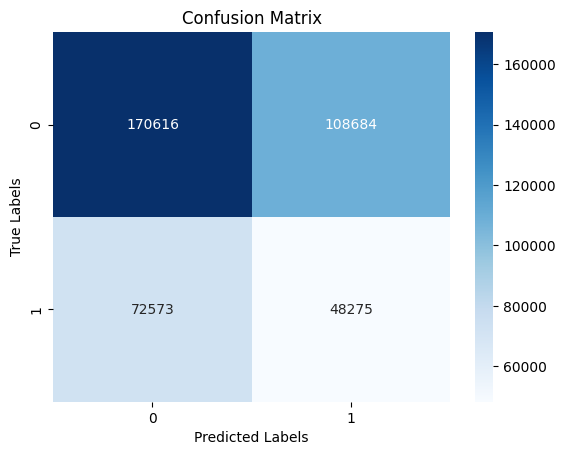

In [ ]:
full_workflow(data, target, important_features, num_features, sample_fraction=0.1, epochs=1000, batch_size=50000, patience=5, learning_rate=0.01)

Training Progress:   0%|          | 2/1000 [00:01<09:34,  1.74it/s]

Early stopping at epoch 0
Early stopping at epoch 1


Training Progress:   0%|          | 3/1000 [00:01<06:49,  2.43it/s]

Early stopping at epoch 2


Training Progress:   0%|          | 5/1000 [00:01<04:38,  3.58it/s]

Early stopping at epoch 3
Early stopping at epoch 4


Training Progress:   1%|          | 7/1000 [00:02<03:51,  4.30it/s]

Early stopping at epoch 5
Early stopping at epoch 6


Training Progress:   1%|          | 8/1000 [00:02<03:42,  4.46it/s]

Early stopping at epoch 7


Training Progress:   1%|          | 10/1000 [00:02<03:30,  4.70it/s]

Early stopping at epoch 8
Early stopping at epoch 9


Training Progress:   1%|          | 12/1000 [00:03<03:20,  4.93it/s]

Early stopping at epoch 10
Early stopping at epoch 11


Training Progress:   1%|▏         | 14/1000 [00:03<03:19,  4.94it/s]

Early stopping at epoch 12
Early stopping at epoch 13


Training Progress:   2%|▏         | 16/1000 [00:04<03:15,  5.04it/s]

Early stopping at epoch 14
Early stopping at epoch 15


Training Progress:   2%|▏         | 17/1000 [00:04<03:13,  5.07it/s]

Early stopping at epoch 16


Training Progress:   2%|▏         | 19/1000 [00:04<03:15,  5.02it/s]

Early stopping at epoch 17
Early stopping at epoch 18


Training Progress:   2%|▏         | 21/1000 [00:05<03:13,  5.07it/s]

Early stopping at epoch 19
Early stopping at epoch 20


Training Progress:   2%|▏         | 22/1000 [00:05<03:13,  5.06it/s]

Early stopping at epoch 21
Early stopping at epoch 22

Training Progress:   2%|▏         | 23/1000 [00:05<03:14,  5.03it/s]

Training Progress:   2%|▎         | 25/1000 [00:05<03:16,  4.97it/s]

Early stopping at epoch 23
Early stopping at epoch 24


Training Progress:   3%|▎         | 27/1000 [00:06<03:13,  5.03it/s]

Early stopping at epoch 25
Early stopping at epoch 26


Training Progress:   3%|▎         | 28/1000 [00:06<03:11,  5.08it/s]

Early stopping at epoch 27


Training Progress:   3%|▎         | 29/1000 [00:06<03:19,  4.88it/s]

Early stopping at epoch 28


Training Progress:   3%|▎         | 31/1000 [00:07<03:14,  4.99it/s]

Early stopping at epoch 29
Early stopping at epoch 30


Training Progress:   3%|▎         | 33/1000 [00:07<03:11,  5.06it/s]

Early stopping at epoch 31
Early stopping at epoch 32


Training Progress:   4%|▎         | 35/1000 [00:07<03:14,  4.96it/s]

Early stopping at epoch 33
Early stopping at epoch 34


Training Progress:   4%|▎         | 36/1000 [00:08<03:31,  4.55it/s]

Early stopping at epoch 35


Training Progress:   4%|▎         | 37/1000 [00:08<03:47,  4.24it/s]

Early stopping at epoch 36


Training Progress:   4%|▍         | 38/1000 [00:08<04:00,  4.00it/s]

Early stopping at epoch 37


Training Progress:   4%|▍         | 39/1000 [00:09<04:04,  3.93it/s]

Early stopping at epoch 38


Training Progress:   4%|▍         | 40/1000 [00:09<04:05,  3.91it/s]

Early stopping at epoch 39


Training Progress:   4%|▍         | 41/1000 [00:09<04:08,  3.85it/s]

Early stopping at epoch 40


Training Progress:   4%|▍         | 42/1000 [00:09<04:09,  3.83it/s]

Early stopping at epoch 41


Training Progress:   4%|▍         | 43/1000 [00:10<04:12,  3.78it/s]

Early stopping at epoch 42


Training Progress:   4%|▍         | 44/1000 [00:10<04:11,  3.80it/s]

Early stopping at epoch 43


Training Progress:   4%|▍         | 45/1000 [00:10<04:09,  3.83it/s]

Early stopping at epoch 44


Training Progress:   5%|▍         | 46/1000 [00:10<04:09,  3.82it/s]

Early stopping at epoch 45


Training Progress:   5%|▍         | 47/1000 [00:11<04:01,  3.95it/s]

Early stopping at epoch 46


Training Progress:   5%|▍         | 48/1000 [00:11<04:02,  3.92it/s]

Early stopping at epoch 47


Training Progress:   5%|▍         | 49/1000 [00:11<04:06,  3.86it/s]

Early stopping at epoch 48


Training Progress:   5%|▌         | 50/1000 [00:11<04:07,  3.84it/s]

Early stopping at epoch 49


Training Progress:   5%|▌         | 51/1000 [00:12<04:07,  3.84it/s]

Early stopping at epoch 50


Training Progress:   5%|▌         | 52/1000 [00:12<04:06,  3.84it/s]

Early stopping at epoch 51


Training Progress:   5%|▌         | 53/1000 [00:12<04:10,  3.78it/s]

Early stopping at epoch 52


Training Progress:   5%|▌         | 54/1000 [00:12<04:12,  3.75it/s]

Early stopping at epoch 53


Training Progress:   6%|▌         | 55/1000 [00:13<04:12,  3.74it/s]

Early stopping at epoch 54


Training Progress:   6%|▌         | 56/1000 [00:13<04:16,  3.68it/s]

Early stopping at epoch 55


Training Progress:   6%|▌         | 57/1000 [00:13<04:03,  3.87it/s]

Early stopping at epoch 56


Training Progress:   6%|▌         | 58/1000 [00:13<03:49,  4.11it/s]

Early stopping at epoch 57
Early stopping at epoch 58

Training Progress:   6%|▌         | 60/1000 [00:14<03:26,  4.55it/s]


Early stopping at epoch 59


Training Progress:   6%|▌         | 62/1000 [00:14<03:15,  4.79it/s]

Early stopping at epoch 60
Early stopping at epoch 61


Training Progress:   6%|▋         | 63/1000 [00:14<03:12,  4.88it/s]

Early stopping at epoch 62


Training Progress:   6%|▋         | 65/1000 [00:15<03:08,  4.97it/s]

Early stopping at epoch 63
Early stopping at epoch 64


Training Progress:   7%|▋         | 67/1000 [00:15<03:05,  5.04it/s]

Early stopping at epoch 65
Early stopping at epoch 66


Training Progress:   7%|▋         | 68/1000 [00:15<03:05,  5.04it/s]

Early stopping at epoch 67


Training Progress:   7%|▋         | 69/1000 [00:16<03:08,  4.95it/s]

Early stopping at epoch 68


Training Progress:   7%|▋         | 71/1000 [00:16<03:06,  4.99it/s]

Early stopping at epoch 69
Early stopping at epoch 70


Training Progress:   7%|▋         | 72/1000 [00:16<03:06,  4.98it/s]

Early stopping at epoch 71


Training Progress:   7%|▋         | 74/1000 [00:17<03:06,  4.98it/s]

Early stopping at epoch 72
Early stopping at epoch 73


Training Progress:   8%|▊         | 76/1000 [00:17<03:05,  4.99it/s]

Early stopping at epoch 74
Early stopping at epoch 75


Training Progress:   8%|▊         | 78/1000 [00:17<03:05,  4.98it/s]

Early stopping at epoch 76
Early stopping at epoch 77


Training Progress:   8%|▊         | 79/1000 [00:18<03:04,  4.99it/s]

Early stopping at epoch 78


Training Progress:   8%|▊         | 81/1000 [00:18<03:03,  5.00it/s]

Early stopping at epoch 79
Early stopping at epoch 80


Training Progress:   8%|▊         | 83/1000 [00:18<03:03,  4.99it/s]

Early stopping at epoch 81
Early stopping at epoch 82


Training Progress:   8%|▊         | 84/1000 [00:19<03:02,  5.02it/s]

Early stopping at epoch 83
Early stopping at epoch 84

Training Progress:   9%|▊         | 86/1000 [00:19<03:02,  5.01it/s]


Early stopping at epoch 85


Training Progress:   9%|▊         | 87/1000 [00:19<03:04,  4.96it/s]

Early stopping at epoch 86
Early stopping at epoch 87

Training Progress:   9%|▉         | 89/1000 [00:20<03:02,  4.99it/s]


Early stopping at epoch 88


Training Progress:   9%|▉         | 91/1000 [00:20<03:02,  4.99it/s]

Early stopping at epoch 89
Early stopping at epoch 90


Training Progress:   9%|▉         | 93/1000 [00:20<03:01,  5.00it/s]

Early stopping at epoch 91
Early stopping at epoch 92


Training Progress:  10%|▉         | 95/1000 [00:21<03:00,  5.02it/s]

Early stopping at epoch 93
Early stopping at epoch 94


Training Progress:  10%|▉         | 97/1000 [00:21<02:59,  5.02it/s]

Early stopping at epoch 95
Early stopping at epoch 96


Training Progress:  10%|▉         | 99/1000 [00:22<02:58,  5.06it/s]

Early stopping at epoch 97
Early stopping at epoch 98


Training Progress:  10%|█         | 100/1000 [00:22<02:56,  5.09it/s]

Early stopping at epoch 99


Training Progress:  10%|█         | 102/1000 [00:22<03:00,  4.98it/s]

Early stopping at epoch 100
Early stopping at epoch 101


Training Progress:  10%|█         | 104/1000 [00:23<03:00,  4.97it/s]

Early stopping at epoch 102
Early stopping at epoch 103


Training Progress:  10%|█         | 105/1000 [00:23<02:57,  5.04it/s]

Early stopping at epoch 104


Training Progress:  11%|█         | 106/1000 [00:23<02:59,  4.98it/s]

Early stopping at epoch 105


Training Progress:  11%|█         | 107/1000 [00:23<03:05,  4.82it/s]

Early stopping at epoch 106


Training Progress:  11%|█         | 108/1000 [00:24<03:13,  4.60it/s]

Early stopping at epoch 107


Training Progress:  11%|█         | 109/1000 [00:24<03:18,  4.49it/s]

Early stopping at epoch 108


Training Progress:  11%|█         | 110/1000 [00:24<03:24,  4.35it/s]

Early stopping at epoch 109


Training Progress:  11%|█         | 111/1000 [00:24<03:27,  4.28it/s]

Early stopping at epoch 110


Training Progress:  11%|█         | 112/1000 [00:24<03:26,  4.29it/s]

Early stopping at epoch 111


Training Progress:  11%|█▏        | 113/1000 [00:25<03:31,  4.20it/s]

Early stopping at epoch 112


Training Progress:  11%|█▏        | 114/1000 [00:25<03:36,  4.08it/s]

Early stopping at epoch 113


Training Progress:  12%|█▏        | 115/1000 [00:25<03:43,  3.96it/s]

Early stopping at epoch 114


Training Progress:  12%|█▏        | 116/1000 [00:26<03:48,  3.86it/s]

Early stopping at epoch 115


Training Progress:  12%|█▏        | 117/1000 [00:26<03:50,  3.83it/s]

Early stopping at epoch 116


Training Progress:  12%|█▏        | 118/1000 [00:26<03:52,  3.80it/s]

Early stopping at epoch 117


Training Progress:  12%|█▏        | 119/1000 [00:26<03:54,  3.76it/s]

Early stopping at epoch 118


Training Progress:  12%|█▏        | 120/1000 [00:27<03:56,  3.71it/s]

Early stopping at epoch 119


Training Progress:  12%|█▏        | 121/1000 [00:27<04:03,  3.62it/s]

Early stopping at epoch 120


Training Progress:  12%|█▏        | 122/1000 [00:27<04:02,  3.62it/s]

Early stopping at epoch 121


Training Progress:  12%|█▏        | 123/1000 [00:27<03:56,  3.71it/s]

Early stopping at epoch 122


Training Progress:  12%|█▏        | 124/1000 [00:28<03:53,  3.74it/s]

Early stopping at epoch 123


Training Progress:  12%|█▎        | 125/1000 [00:28<03:51,  3.79it/s]

Early stopping at epoch 124


Training Progress:  13%|█▎        | 126/1000 [00:28<03:55,  3.71it/s]

Early stopping at epoch 125


Training Progress:  13%|█▎        | 127/1000 [00:28<03:56,  3.69it/s]

Early stopping at epoch 126


Training Progress:  13%|█▎        | 129/1000 [00:29<03:34,  4.07it/s]

Early stopping at epoch 127
Early stopping at epoch 128


Training Progress:  13%|█▎        | 130/1000 [00:29<03:24,  4.25it/s]

Early stopping at epoch 129


Training Progress:  13%|█▎        | 132/1000 [00:30<03:07,  4.62it/s]

Early stopping at epoch 130
Early stopping at epoch 131


Training Progress:  13%|█▎        | 134/1000 [00:30<02:58,  4.85it/s]

Early stopping at epoch 132
Early stopping at epoch 133


Training Progress:  14%|█▎        | 135/1000 [00:30<03:00,  4.80it/s]

Early stopping at epoch 134
Early stopping at epoch 135


Training Progress:  14%|█▍        | 138/1000 [00:31<02:52,  4.99it/s]

Early stopping at epoch 136
Early stopping at epoch 137


Training Progress:  14%|█▍        | 139/1000 [00:31<02:51,  5.03it/s]

Early stopping at epoch 138


Training Progress:  14%|█▍        | 141/1000 [00:31<02:49,  5.07it/s]

Early stopping at epoch 139
Early stopping at epoch 140


Training Progress:  14%|█▍        | 143/1000 [00:32<02:49,  5.06it/s]

Early stopping at epoch 141
Early stopping at epoch 142


Training Progress:  14%|█▍        | 144/1000 [00:32<02:49,  5.04it/s]

Early stopping at epoch 143


Training Progress:  15%|█▍        | 146/1000 [00:32<02:50,  5.01it/s]

Early stopping at epoch 144
Early stopping at epoch 145


Training Progress:  15%|█▍        | 148/1000 [00:33<02:49,  5.04it/s]

Early stopping at epoch 146
Early stopping at epoch 147


Training Progress:  15%|█▍        | 149/1000 [00:33<02:48,  5.06it/s]

Early stopping at epoch 148


Training Progress:  15%|█▌        | 151/1000 [00:33<02:47,  5.06it/s]

Early stopping at epoch 149
Early stopping at epoch 150


Training Progress:  15%|█▌        | 153/1000 [00:34<02:47,  5.04it/s]

Early stopping at epoch 151
Early stopping at epoch 152


Training Progress:  15%|█▌        | 154/1000 [00:34<02:47,  5.06it/s]

Early stopping at epoch 153


Training Progress:  16%|█▌        | 156/1000 [00:34<02:49,  4.97it/s]

Early stopping at epoch 154
Early stopping at epoch 155


Training Progress:  16%|█▌        | 157/1000 [00:35<02:54,  4.83it/s]

Early stopping at epoch 156


Training Progress:  16%|█▌        | 158/1000 [00:35<03:07,  4.49it/s]

Early stopping at epoch 157


Training Progress:  16%|█▌        | 159/1000 [00:35<03:35,  3.90it/s]

Early stopping at epoch 158


Training Progress:  16%|█▌        | 160/1000 [00:35<03:37,  3.87it/s]

Early stopping at epoch 159


Training Progress:  16%|█▌        | 161/1000 [00:36<03:52,  3.62it/s]

Early stopping at epoch 160


Training Progress:  16%|█▌        | 162/1000 [00:36<03:48,  3.67it/s]

Early stopping at epoch 161


Training Progress:  16%|█▋        | 163/1000 [00:36<03:47,  3.68it/s]

Early stopping at epoch 162


Training Progress:  16%|█▋        | 164/1000 [00:37<03:46,  3.69it/s]

Early stopping at epoch 163


Training Progress:  16%|█▋        | 165/1000 [00:37<03:42,  3.75it/s]

Early stopping at epoch 164


Training Progress:  17%|█▋        | 166/1000 [00:37<03:41,  3.76it/s]

Early stopping at epoch 165


Training Progress:  17%|█▋        | 167/1000 [00:37<03:50,  3.62it/s]

Early stopping at epoch 166


Training Progress:  17%|█▋        | 168/1000 [00:38<03:40,  3.77it/s]

Early stopping at epoch 167


Training Progress:  17%|█▋        | 169/1000 [00:38<03:49,  3.62it/s]

Early stopping at epoch 168


Training Progress:  17%|█▋        | 170/1000 [00:38<03:40,  3.77it/s]

Early stopping at epoch 169


Training Progress:  17%|█▋        | 171/1000 [00:38<03:39,  3.77it/s]

Early stopping at epoch 170


Training Progress:  17%|█▋        | 172/1000 [00:39<03:40,  3.76it/s]

Early stopping at epoch 171


Training Progress:  17%|█▋        | 173/1000 [00:39<04:01,  3.42it/s]

Early stopping at epoch 172


Training Progress:  17%|█▋        | 174/1000 [00:40<04:44,  2.91it/s]

Early stopping at epoch 173


Training Progress:  18%|█▊        | 175/1000 [00:40<05:08,  2.67it/s]

Early stopping at epoch 174


Training Progress:  18%|█▊        | 176/1000 [00:40<05:23,  2.55it/s]

Early stopping at epoch 175


Training Progress:  18%|█▊        | 177/1000 [00:41<04:48,  2.85it/s]

Early stopping at epoch 176


Training Progress:  18%|█▊        | 178/1000 [00:41<04:23,  3.12it/s]

Early stopping at epoch 177


Training Progress:  18%|█▊        | 179/1000 [00:41<04:09,  3.29it/s]

Early stopping at epoch 178


Training Progress:  18%|█▊        | 180/1000 [00:41<03:59,  3.42it/s]

Early stopping at epoch 179


Training Progress:  18%|█▊        | 181/1000 [00:42<03:46,  3.62it/s]

Early stopping at epoch 180


Training Progress:  18%|█▊        | 182/1000 [00:42<03:44,  3.64it/s]

Early stopping at epoch 181


Training Progress:  18%|█▊        | 183/1000 [00:42<03:46,  3.61it/s]

Early stopping at epoch 182


Training Progress:  18%|█▊        | 184/1000 [00:42<03:40,  3.71it/s]

Early stopping at epoch 183


Training Progress:  18%|█▊        | 185/1000 [00:43<03:35,  3.78it/s]

Early stopping at epoch 184


Training Progress:  19%|█▊        | 186/1000 [00:43<03:36,  3.76it/s]

Early stopping at epoch 185


Training Progress:  19%|█▊        | 187/1000 [00:43<03:40,  3.69it/s]

Early stopping at epoch 186


Training Progress:  19%|█▉        | 188/1000 [00:44<03:40,  3.68it/s]

Early stopping at epoch 187


Training Progress:  19%|█▉        | 189/1000 [00:44<03:43,  3.62it/s]

Early stopping at epoch 188


Training Progress:  19%|█▉        | 190/1000 [00:44<03:47,  3.56it/s]

Early stopping at epoch 189


Training Progress:  19%|█▉        | 191/1000 [00:44<03:48,  3.54it/s]

Early stopping at epoch 190


Training Progress:  19%|█▉        | 192/1000 [00:45<03:39,  3.67it/s]

Early stopping at epoch 191


Training Progress:  19%|█▉        | 194/1000 [00:45<03:09,  4.26it/s]

Early stopping at epoch 192
Early stopping at epoch 193


Training Progress:  20%|█▉        | 196/1000 [00:45<02:55,  4.58it/s]

Early stopping at epoch 194
Early stopping at epoch 195


Training Progress:  20%|█▉        | 198/1000 [00:46<02:45,  4.84it/s]

Early stopping at epoch 196
Early stopping at epoch 197


Training Progress:  20%|█▉        | 199/1000 [00:46<02:42,  4.92it/s]

Early stopping at epoch 198


Training Progress:  20%|██        | 201/1000 [00:46<02:41,  4.93it/s]

Early stopping at epoch 199
Early stopping at epoch 200


Training Progress:  20%|██        | 203/1000 [00:47<02:40,  4.97it/s]

Early stopping at epoch 201
Early stopping at epoch 202


Training Progress:  20%|██        | 204/1000 [00:47<02:39,  4.99it/s]

Early stopping at epoch 203


Training Progress:  21%|██        | 206/1000 [00:47<02:38,  5.00it/s]

Early stopping at epoch 204
Early stopping at epoch 205


Training Progress:  21%|██        | 208/1000 [00:48<02:36,  5.05it/s]

Early stopping at epoch 206
Early stopping at epoch 207


Training Progress:  21%|██        | 210/1000 [00:48<02:34,  5.11it/s]

Early stopping at epoch 208
Early stopping at epoch 209


Training Progress:  21%|██        | 212/1000 [00:49<02:37,  5.02it/s]

Early stopping at epoch 210
Early stopping at epoch 211


Training Progress:  21%|██▏       | 214/1000 [00:49<02:37,  4.98it/s]

Early stopping at epoch 212
Early stopping at epoch 213


Training Progress:  22%|██▏       | 215/1000 [00:49<02:38,  4.95it/s]

Early stopping at epoch 214


Training Progress:  22%|██▏       | 217/1000 [00:50<02:38,  4.95it/s]

Early stopping at epoch 215
Early stopping at epoch 216


Training Progress:  22%|██▏       | 219/1000 [00:50<02:38,  4.93it/s]

Early stopping at epoch 217
Early stopping at epoch 218


Training Progress:  22%|██▏       | 220/1000 [00:50<02:37,  4.95it/s]

Early stopping at epoch 219


Training Progress:  22%|██▏       | 222/1000 [00:51<02:37,  4.93it/s]

Early stopping at epoch 220
Early stopping at epoch 221


Training Progress:  22%|██▏       | 223/1000 [00:51<02:36,  4.98it/s]

Early stopping at epoch 222
Early stopping at epoch 223


Training Progress:  22%|██▎       | 225/1000 [00:51<02:34,  5.00it/s]

Early stopping at epoch 224


Training Progress:  23%|██▎       | 227/1000 [00:52<02:34,  5.00it/s]

Early stopping at epoch 225
Early stopping at epoch 226


Training Progress:  23%|██▎       | 229/1000 [00:52<02:30,  5.11it/s]

Early stopping at epoch 227
Early stopping at epoch 228


Training Progress:  23%|██▎       | 230/1000 [00:52<02:34,  5.00it/s]

Early stopping at epoch 229


Training Progress:  23%|██▎       | 232/1000 [00:53<02:35,  4.95it/s]

Early stopping at epoch 230
Early stopping at epoch 231


Training Progress:  23%|██▎       | 234/1000 [00:53<02:32,  5.02it/s]

Early stopping at epoch 232
Early stopping at epoch 233


Training Progress:  24%|██▎       | 235/1000 [00:53<02:33,  4.97it/s]

Early stopping at epoch 234
Early stopping at epoch 235


Training Progress:  24%|██▍       | 238/1000 [00:54<02:33,  4.96it/s]

Early stopping at epoch 236
Early stopping at epoch 237


Training Progress:  24%|██▍       | 240/1000 [00:54<02:32,  4.99it/s]

Early stopping at epoch 238
Early stopping at epoch 239


Training Progress:  24%|██▍       | 241/1000 [00:55<02:35,  4.89it/s]

Early stopping at epoch 240


Training Progress:  24%|██▍       | 242/1000 [00:55<02:45,  4.59it/s]

Early stopping at epoch 241


Training Progress:  24%|██▍       | 243/1000 [00:55<02:56,  4.29it/s]

Early stopping at epoch 242


Training Progress:  24%|██▍       | 244/1000 [00:55<03:04,  4.09it/s]

Early stopping at epoch 243


Training Progress:  24%|██▍       | 245/1000 [00:56<03:10,  3.97it/s]

Early stopping at epoch 244


Training Progress:  25%|██▍       | 246/1000 [00:56<03:15,  3.87it/s]

Early stopping at epoch 245


Training Progress:  25%|██▍       | 247/1000 [00:56<03:11,  3.92it/s]

Early stopping at epoch 246


Training Progress:  25%|██▍       | 248/1000 [00:56<03:16,  3.82it/s]

Early stopping at epoch 247


Training Progress:  25%|██▍       | 249/1000 [00:57<03:16,  3.82it/s]

Early stopping at epoch 248


Training Progress:  25%|██▌       | 250/1000 [00:57<03:16,  3.82it/s]

Early stopping at epoch 249


Training Progress:  25%|██▌       | 251/1000 [00:57<03:17,  3.80it/s]

Early stopping at epoch 250


Training Progress:  25%|██▌       | 252/1000 [00:57<03:17,  3.78it/s]

Early stopping at epoch 251


Training Progress:  25%|██▌       | 253/1000 [00:58<03:17,  3.78it/s]

Early stopping at epoch 252


Training Progress:  25%|██▌       | 254/1000 [00:58<03:21,  3.69it/s]

Early stopping at epoch 253


Training Progress:  26%|██▌       | 255/1000 [00:58<03:19,  3.73it/s]

Early stopping at epoch 254


Training Progress:  26%|██▌       | 256/1000 [00:59<03:23,  3.66it/s]

Early stopping at epoch 255


Training Progress:  26%|██▌       | 257/1000 [00:59<03:22,  3.67it/s]

Early stopping at epoch 256


Training Progress:  26%|██▌       | 258/1000 [00:59<03:19,  3.72it/s]

Early stopping at epoch 257


Training Progress:  26%|██▌       | 259/1000 [00:59<03:21,  3.68it/s]

Early stopping at epoch 258


Training Progress:  26%|██▌       | 260/1000 [01:00<03:18,  3.73it/s]

Early stopping at epoch 259


Training Progress:  26%|██▌       | 261/1000 [01:00<03:18,  3.73it/s]

Early stopping at epoch 260


Training Progress:  26%|██▌       | 262/1000 [01:00<03:19,  3.70it/s]

Early stopping at epoch 261


Training Progress:  26%|██▋       | 264/1000 [01:01<02:52,  4.27it/s]

Early stopping at epoch 262
Early stopping at epoch 263


Training Progress:  27%|██▋       | 266/1000 [01:01<02:36,  4.68it/s]

Early stopping at epoch 264
Early stopping at epoch 265


Training Progress:  27%|██▋       | 268/1000 [01:01<02:30,  4.87it/s]

Early stopping at epoch 266
Early stopping at epoch 267


Training Progress:  27%|██▋       | 270/1000 [01:02<02:25,  5.03it/s]

Early stopping at epoch 268
Early stopping at epoch 269


Training Progress:  27%|██▋       | 271/1000 [01:02<02:25,  5.03it/s]

Early stopping at epoch 270


Training Progress:  27%|██▋       | 272/1000 [01:02<02:25,  5.01it/s]

Early stopping at epoch 271


Training Progress:  27%|██▋       | 274/1000 [01:03<02:25,  5.00it/s]

Early stopping at epoch 272
Early stopping at epoch 273


Training Progress:  28%|██▊       | 276/1000 [01:03<02:23,  5.05it/s]

Early stopping at epoch 274
Early stopping at epoch 275


Training Progress:  28%|██▊       | 278/1000 [01:03<02:25,  4.96it/s]

Early stopping at epoch 276
Early stopping at epoch 277


Training Progress:  28%|██▊       | 280/1000 [01:04<02:22,  5.06it/s]

Early stopping at epoch 278
Early stopping at epoch 279


Training Progress:  28%|██▊       | 281/1000 [01:04<02:23,  5.02it/s]

Early stopping at epoch 280


Training Progress:  28%|██▊       | 283/1000 [01:04<02:25,  4.92it/s]

Early stopping at epoch 281
Early stopping at epoch 282


Training Progress:  28%|██▊       | 285/1000 [01:05<02:21,  5.05it/s]

Early stopping at epoch 283
Early stopping at epoch 284


Training Progress:  29%|██▊       | 286/1000 [01:05<02:22,  5.01it/s]

Early stopping at epoch 285


Training Progress:  29%|██▉       | 288/1000 [01:05<02:24,  4.92it/s]

Early stopping at epoch 286
Early stopping at epoch 287


Training Progress:  29%|██▉       | 290/1000 [01:06<02:23,  4.93it/s]

Early stopping at epoch 288
Early stopping at epoch 289


Training Progress:  29%|██▉       | 291/1000 [01:06<02:23,  4.94it/s]

Early stopping at epoch 290


Training Progress:  29%|██▉       | 293/1000 [01:06<02:26,  4.84it/s]

Early stopping at epoch 291
Early stopping at epoch 292


Training Progress:  30%|██▉       | 295/1000 [01:07<02:21,  4.97it/s]

Early stopping at epoch 293
Early stopping at epoch 294


Training Progress:  30%|██▉       | 296/1000 [01:07<02:22,  4.95it/s]

Early stopping at epoch 295


Training Progress:  30%|██▉       | 297/1000 [01:07<02:22,  4.93it/s]

Early stopping at epoch 296


Training Progress:  30%|██▉       | 298/1000 [01:07<02:26,  4.81it/s]

Early stopping at epoch 297
Early stopping at epoch 298


Training Progress:  30%|███       | 300/1000 [01:08<02:21,  4.94it/s]

Early stopping at epoch 299


Training Progress:  30%|███       | 301/1000 [01:08<02:22,  4.92it/s]

Early stopping at epoch 300


Training Progress:  30%|███       | 302/1000 [01:08<02:24,  4.83it/s]

Early stopping at epoch 301


Training Progress:  30%|███       | 304/1000 [01:09<02:22,  4.89it/s]

Early stopping at epoch 302
Early stopping at epoch 303


Training Progress:  31%|███       | 306/1000 [01:09<02:19,  4.98it/s]

Early stopping at epoch 304
Early stopping at epoch 305


Training Progress:  31%|███       | 307/1000 [01:09<02:20,  4.93it/s]

Early stopping at epoch 306


Training Progress:  31%|███       | 309/1000 [01:10<02:19,  4.95it/s]

Early stopping at epoch 307
Early stopping at epoch 308


Training Progress:  31%|███       | 310/1000 [01:10<02:19,  4.94it/s]

Early stopping at epoch 309
Early stopping at epoch 310

Training Progress:  31%|███       | 311/1000 [01:10<02:19,  4.93it/s]

Training Progress:  31%|███       | 312/1000 [01:10<02:21,  4.87it/s]

Early stopping at epoch 311


Training Progress:  31%|███▏      | 313/1000 [01:11<02:38,  4.34it/s]

Early stopping at epoch 312


Training Progress:  31%|███▏      | 314/1000 [01:11<02:45,  4.14it/s]

Early stopping at epoch 313


Training Progress:  32%|███▏      | 315/1000 [01:11<02:47,  4.08it/s]

Early stopping at epoch 314


Training Progress:  32%|███▏      | 316/1000 [01:11<02:46,  4.10it/s]

Early stopping at epoch 315


Training Progress:  32%|███▏      | 317/1000 [01:12<02:58,  3.83it/s]

Early stopping at epoch 316


Training Progress:  32%|███▏      | 318/1000 [01:12<02:53,  3.92it/s]

Early stopping at epoch 317


Training Progress:  32%|███▏      | 319/1000 [01:12<03:00,  3.77it/s]

Early stopping at epoch 318


Training Progress:  32%|███▏      | 320/1000 [01:12<02:59,  3.79it/s]

Early stopping at epoch 319


Training Progress:  32%|███▏      | 321/1000 [01:13<02:56,  3.84it/s]

Early stopping at epoch 320


Training Progress:  32%|███▏      | 322/1000 [01:13<02:48,  4.02it/s]

Early stopping at epoch 321


Training Progress:  32%|███▏      | 323/1000 [01:13<02:48,  4.01it/s]

Early stopping at epoch 322


Training Progress:  32%|███▏      | 324/1000 [01:13<02:50,  3.97it/s]

Early stopping at epoch 323


Training Progress:  32%|███▎      | 325/1000 [01:14<02:55,  3.84it/s]

Early stopping at epoch 324


Training Progress:  33%|███▎      | 326/1000 [01:14<02:57,  3.79it/s]

Early stopping at epoch 325


Training Progress:  33%|███▎      | 327/1000 [01:14<02:59,  3.75it/s]

Early stopping at epoch 326


Training Progress:  33%|███▎      | 328/1000 [01:14<03:02,  3.68it/s]

Early stopping at epoch 327


Training Progress:  33%|███▎      | 329/1000 [01:15<02:59,  3.75it/s]

Early stopping at epoch 328


Training Progress:  33%|███▎      | 330/1000 [01:15<03:00,  3.71it/s]

Early stopping at epoch 329


Training Progress:  33%|███▎      | 331/1000 [01:15<03:02,  3.67it/s]

Early stopping at epoch 330


Training Progress:  33%|███▎      | 332/1000 [01:16<02:57,  3.77it/s]

Early stopping at epoch 331


Training Progress:  33%|███▎      | 334/1000 [01:16<02:42,  4.10it/s]

Early stopping at epoch 332
Early stopping at epoch 333


Training Progress:  34%|███▎      | 336/1000 [01:16<02:26,  4.52it/s]

Early stopping at epoch 334
Early stopping at epoch 335


Training Progress:  34%|███▎      | 337/1000 [01:17<02:22,  4.66it/s]

Early stopping at epoch 336


Training Progress:  34%|███▍      | 339/1000 [01:17<02:17,  4.81it/s]

Early stopping at epoch 337
Early stopping at epoch 338


Training Progress:  34%|███▍      | 341/1000 [01:17<02:12,  4.96it/s]

Early stopping at epoch 339
Early stopping at epoch 340


Training Progress:  34%|███▍      | 342/1000 [01:18<02:12,  4.97it/s]

Early stopping at epoch 341


Training Progress:  34%|███▍      | 344/1000 [01:18<02:12,  4.94it/s]

Early stopping at epoch 342
Early stopping at epoch 343


Training Progress:  35%|███▍      | 346/1000 [01:18<02:11,  4.99it/s]

Early stopping at epoch 344
Early stopping at epoch 345


Training Progress:  35%|███▍      | 347/1000 [01:19<02:11,  4.96it/s]

Early stopping at epoch 346


Training Progress:  35%|███▍      | 348/1000 [01:19<02:12,  4.93it/s]

Early stopping at epoch 347
Early stopping at epoch 348

Training Progress:  35%|███▍      | 349/1000 [01:19<02:12,  4.90it/s]

Training Progress:  35%|███▌      | 351/1000 [01:19<02:11,  4.93it/s]

Early stopping at epoch 349
Early stopping at epoch 350


Training Progress:  35%|███▌      | 352/1000 [01:20<02:10,  4.97it/s]

Early stopping at epoch 351


Training Progress:  35%|███▌      | 353/1000 [01:20<02:13,  4.84it/s]

Early stopping at epoch 352
Early stopping at epoch 353


Training Progress:  36%|███▌      | 355/1000 [01:20<02:11,  4.92it/s]

Early stopping at epoch 354


Training Progress:  36%|███▌      | 357/1000 [01:21<02:08,  5.01it/s]

Early stopping at epoch 355
Early stopping at epoch 356


Training Progress:  36%|███▌      | 358/1000 [01:21<02:18,  4.63it/s]

Early stopping at epoch 357


Training Progress:  36%|███▌      | 359/1000 [01:21<03:03,  3.50it/s]

Early stopping at epoch 358


Training Progress:  36%|███▌      | 360/1000 [01:22<02:58,  3.59it/s]

Early stopping at epoch 359


Training Progress:  36%|███▌      | 361/1000 [01:22<02:44,  3.89it/s]

Early stopping at epoch 360


Training Progress:  36%|███▌      | 362/1000 [01:22<02:36,  4.06it/s]

Early stopping at epoch 361
Early stopping at epoch 362

Training Progress:  36%|███▋      | 363/1000 [01:22<02:28,  4.29it/s]


Early stopping at epoch 363


Training Progress:  37%|███▋      | 366/1000 [01:23<02:12,  4.78it/s]

Early stopping at epoch 364
Early stopping at epoch 365


Training Progress:  37%|███▋      | 367/1000 [01:23<02:13,  4.76it/s]

Early stopping at epoch 366


Training Progress:  37%|███▋      | 369/1000 [01:23<02:10,  4.83it/s]

Early stopping at epoch 367
Early stopping at epoch 368


Training Progress:  37%|███▋      | 370/1000 [01:24<02:08,  4.90it/s]

Early stopping at epoch 369


Training Progress:  37%|███▋      | 371/1000 [01:24<02:08,  4.88it/s]

Early stopping at epoch 370


Training Progress:  37%|███▋      | 373/1000 [01:24<02:06,  4.94it/s]

Early stopping at epoch 371
Early stopping at epoch 372


Training Progress:  38%|███▊      | 375/1000 [01:25<02:03,  5.04it/s]

Early stopping at epoch 373
Early stopping at epoch 374


Training Progress:  38%|███▊      | 376/1000 [01:25<02:02,  5.09it/s]

Early stopping at epoch 375


Training Progress:  38%|███▊      | 377/1000 [01:25<02:08,  4.86it/s]

Early stopping at epoch 376


Training Progress:  38%|███▊      | 379/1000 [01:25<02:07,  4.89it/s]

Early stopping at epoch 377
Early stopping at epoch 378


Training Progress:  38%|███▊      | 380/1000 [01:26<02:06,  4.89it/s]

Early stopping at epoch 379


Training Progress:  38%|███▊      | 381/1000 [01:26<02:12,  4.69it/s]

Early stopping at epoch 380


Training Progress:  38%|███▊      | 382/1000 [01:26<02:21,  4.37it/s]

Early stopping at epoch 381


Training Progress:  38%|███▊      | 383/1000 [01:26<02:27,  4.17it/s]

Early stopping at epoch 382


Training Progress:  38%|███▊      | 384/1000 [01:27<02:31,  4.08it/s]

Early stopping at epoch 383


Training Progress:  38%|███▊      | 385/1000 [01:27<02:35,  3.96it/s]

Early stopping at epoch 384


Training Progress:  39%|███▊      | 386/1000 [01:27<02:41,  3.80it/s]

Early stopping at epoch 385


Training Progress:  39%|███▊      | 387/1000 [01:28<02:43,  3.75it/s]

Early stopping at epoch 386


Training Progress:  39%|███▉      | 388/1000 [01:28<02:39,  3.83it/s]

Early stopping at epoch 387


Training Progress:  39%|███▉      | 389/1000 [01:28<02:43,  3.74it/s]

Early stopping at epoch 388


Training Progress:  39%|███▉      | 390/1000 [01:28<02:42,  3.75it/s]

Early stopping at epoch 389


Training Progress:  39%|███▉      | 391/1000 [01:29<02:42,  3.74it/s]

Early stopping at epoch 390


Training Progress:  39%|███▉      | 392/1000 [01:29<02:42,  3.74it/s]

Early stopping at epoch 391


Training Progress:  39%|███▉      | 393/1000 [01:29<02:42,  3.73it/s]

Early stopping at epoch 392


Training Progress:  39%|███▉      | 394/1000 [01:29<02:43,  3.71it/s]

Early stopping at epoch 393


Training Progress:  40%|███▉      | 395/1000 [01:30<02:41,  3.75it/s]

Early stopping at epoch 394


Training Progress:  40%|███▉      | 396/1000 [01:30<02:41,  3.74it/s]

Early stopping at epoch 395


Training Progress:  40%|███▉      | 397/1000 [01:30<02:38,  3.81it/s]

Early stopping at epoch 396


Training Progress:  40%|███▉      | 398/1000 [01:30<02:39,  3.77it/s]

Early stopping at epoch 397


Training Progress:  40%|███▉      | 399/1000 [01:31<02:43,  3.67it/s]

Early stopping at epoch 398


Training Progress:  40%|████      | 400/1000 [01:31<02:43,  3.66it/s]

Early stopping at epoch 399


Training Progress:  40%|████      | 401/1000 [01:31<02:47,  3.57it/s]

Early stopping at epoch 400


Training Progress:  40%|████      | 403/1000 [01:32<02:27,  4.06it/s]

Early stopping at epoch 401
Early stopping at epoch 402


Training Progress:  40%|████      | 404/1000 [01:32<02:20,  4.25it/s]

Early stopping at epoch 403


Training Progress:  41%|████      | 406/1000 [01:32<02:09,  4.57it/s]

Early stopping at epoch 404
Early stopping at epoch 405


Training Progress:  41%|████      | 408/1000 [01:33<02:04,  4.75it/s]

Early stopping at epoch 406
Early stopping at epoch 407


Training Progress:  41%|████      | 409/1000 [01:33<02:03,  4.80it/s]

Early stopping at epoch 408


Training Progress:  41%|████      | 411/1000 [01:33<02:01,  4.87it/s]

Early stopping at epoch 409
Early stopping at epoch 410


Training Progress:  41%|████▏     | 413/1000 [01:34<01:58,  4.96it/s]

Early stopping at epoch 411
Early stopping at epoch 412


Training Progress:  41%|████▏     | 414/1000 [01:34<01:56,  5.02it/s]

Early stopping at epoch 413


Training Progress:  42%|████▏     | 415/1000 [01:34<01:57,  5.00it/s]

Early stopping at epoch 414


Training Progress:  42%|████▏     | 416/1000 [01:34<01:58,  4.93it/s]

Early stopping at epoch 415


Training Progress:  42%|████▏     | 418/1000 [01:35<01:57,  4.95it/s]

Early stopping at epoch 416
Early stopping at epoch 417


Training Progress:  42%|████▏     | 419/1000 [01:35<01:57,  4.92it/s]

Early stopping at epoch 418


Training Progress:  42%|████▏     | 421/1000 [01:35<01:56,  4.98it/s]

Early stopping at epoch 419
Early stopping at epoch 420


Training Progress:  42%|████▏     | 422/1000 [01:36<01:55,  4.99it/s]

Early stopping at epoch 421


Training Progress:  42%|████▏     | 424/1000 [01:36<01:56,  4.95it/s]

Early stopping at epoch 422
Early stopping at epoch 423


Training Progress:  43%|████▎     | 426/1000 [01:36<01:55,  4.99it/s]

Early stopping at epoch 424
Early stopping at epoch 425


Training Progress:  43%|████▎     | 428/1000 [01:37<01:55,  4.95it/s]

Early stopping at epoch 426
Early stopping at epoch 427


Training Progress:  43%|████▎     | 429/1000 [01:37<01:53,  5.01it/s]

Early stopping at epoch 428


Training Progress:  43%|████▎     | 430/1000 [01:37<01:54,  4.99it/s]

Early stopping at epoch 429


Training Progress:  43%|████▎     | 432/1000 [01:38<01:54,  4.96it/s]

Early stopping at epoch 430
Early stopping at epoch 431


Training Progress:  43%|████▎     | 434/1000 [01:38<01:54,  4.95it/s]

Early stopping at epoch 432
Early stopping at epoch 433


Training Progress:  44%|████▎     | 436/1000 [01:38<01:56,  4.85it/s]

Early stopping at epoch 434
Early stopping at epoch 435


Training Progress:  44%|████▍     | 438/1000 [01:39<01:54,  4.92it/s]

Early stopping at epoch 436
Early stopping at epoch 437


Training Progress:  44%|████▍     | 440/1000 [01:39<01:53,  4.93it/s]

Early stopping at epoch 438
Early stopping at epoch 439


Training Progress:  44%|████▍     | 442/1000 [01:40<01:51,  4.99it/s]

Early stopping at epoch 440
Early stopping at epoch 441


Training Progress:  44%|████▍     | 444/1000 [01:40<01:52,  4.95it/s]

Early stopping at epoch 442
Early stopping at epoch 443


Training Progress:  45%|████▍     | 446/1000 [01:41<01:53,  4.90it/s]

Early stopping at epoch 444
Early stopping at epoch 445


Training Progress:  45%|████▍     | 447/1000 [01:41<01:52,  4.93it/s]

Early stopping at epoch 446


Training Progress:  45%|████▍     | 448/1000 [01:41<01:53,  4.87it/s]

Early stopping at epoch 447


Training Progress:  45%|████▌     | 450/1000 [01:41<01:52,  4.89it/s]

Early stopping at epoch 448
Early stopping at epoch 449


Training Progress:  45%|████▌     | 451/1000 [01:42<01:51,  4.91it/s]

Early stopping at epoch 450


Training Progress:  45%|████▌     | 452/1000 [01:42<01:59,  4.58it/s]

Early stopping at epoch 451


Training Progress:  45%|████▌     | 453/1000 [01:42<02:07,  4.30it/s]

Early stopping at epoch 452


Training Progress:  45%|████▌     | 454/1000 [01:42<02:13,  4.09it/s]

Early stopping at epoch 453


Training Progress:  46%|████▌     | 455/1000 [01:43<02:16,  4.00it/s]

Early stopping at epoch 454


Training Progress:  46%|████▌     | 456/1000 [01:43<02:18,  3.92it/s]

Early stopping at epoch 455


Training Progress:  46%|████▌     | 457/1000 [01:43<02:24,  3.76it/s]

Early stopping at epoch 456


Training Progress:  46%|████▌     | 458/1000 [01:43<02:23,  3.78it/s]

Early stopping at epoch 457


Training Progress:  46%|████▌     | 459/1000 [01:44<02:23,  3.78it/s]

Early stopping at epoch 458


Training Progress:  46%|████▌     | 460/1000 [01:44<02:24,  3.73it/s]

Early stopping at epoch 459


Training Progress:  46%|████▌     | 461/1000 [01:44<02:21,  3.80it/s]

Early stopping at epoch 460


Training Progress:  46%|████▌     | 462/1000 [01:44<02:19,  3.86it/s]

Early stopping at epoch 461


Training Progress:  46%|████▋     | 463/1000 [01:45<02:19,  3.86it/s]

Early stopping at epoch 462


Training Progress:  46%|████▋     | 464/1000 [01:45<02:23,  3.73it/s]

Early stopping at epoch 463


Training Progress:  46%|████▋     | 465/1000 [01:45<02:24,  3.69it/s]

Early stopping at epoch 464


Training Progress:  47%|████▋     | 466/1000 [01:46<02:23,  3.72it/s]

Early stopping at epoch 465


Training Progress:  47%|████▋     | 467/1000 [01:46<02:25,  3.66it/s]

Early stopping at epoch 466


Training Progress:  47%|████▋     | 468/1000 [01:46<02:24,  3.68it/s]

Early stopping at epoch 467


Training Progress:  47%|████▋     | 469/1000 [01:46<02:25,  3.64it/s]

Early stopping at epoch 468


Training Progress:  47%|████▋     | 470/1000 [01:47<02:25,  3.63it/s]

Early stopping at epoch 469


Training Progress:  47%|████▋     | 471/1000 [01:47<02:25,  3.63it/s]

Early stopping at epoch 470


Training Progress:  47%|████▋     | 472/1000 [01:47<02:26,  3.62it/s]

Early stopping at epoch 471


Training Progress:  47%|████▋     | 474/1000 [01:48<02:08,  4.09it/s]

Early stopping at epoch 472
Early stopping at epoch 473


Training Progress:  48%|████▊     | 476/1000 [01:48<01:56,  4.52it/s]

Early stopping at epoch 474
Early stopping at epoch 475


Training Progress:  48%|████▊     | 478/1000 [01:48<01:51,  4.67it/s]

Early stopping at epoch 476
Early stopping at epoch 477


Training Progress:  48%|████▊     | 480/1000 [01:49<01:46,  4.89it/s]

Early stopping at epoch 478
Early stopping at epoch 479


Training Progress:  48%|████▊     | 481/1000 [01:49<01:45,  4.94it/s]

Early stopping at epoch 480


Training Progress:  48%|████▊     | 483/1000 [01:49<01:45,  4.88it/s]

Early stopping at epoch 481
Early stopping at epoch 482


Training Progress:  48%|████▊     | 485/1000 [01:50<01:43,  4.97it/s]

Early stopping at epoch 483
Early stopping at epoch 484


Training Progress:  49%|████▊     | 486/1000 [01:50<01:43,  4.94it/s]

Early stopping at epoch 485
Early stopping at epoch 486


Training Progress:  49%|████▉     | 489/1000 [01:51<01:42,  4.97it/s]

Early stopping at epoch 487
Early stopping at epoch 488


Training Progress:  49%|████▉     | 491/1000 [01:51<01:41,  5.03it/s]

Early stopping at epoch 489
Early stopping at epoch 490


Training Progress:  49%|████▉     | 493/1000 [01:51<01:40,  5.03it/s]

Early stopping at epoch 491
Early stopping at epoch 492


Training Progress:  50%|████▉     | 495/1000 [01:52<01:40,  5.05it/s]

Early stopping at epoch 493
Early stopping at epoch 494


Training Progress:  50%|████▉     | 497/1000 [01:52<01:39,  5.03it/s]

Early stopping at epoch 495
Early stopping at epoch 496


Training Progress:  50%|████▉     | 499/1000 [01:53<01:38,  5.07it/s]

Early stopping at epoch 497
Early stopping at epoch 498


Training Progress:  50%|█████     | 501/1000 [01:53<01:37,  5.14it/s]

Early stopping at epoch 499
Early stopping at epoch 500


Training Progress:  50%|█████     | 502/1000 [01:53<01:39,  5.01it/s]

Early stopping at epoch 501


Training Progress:  50%|█████     | 504/1000 [01:54<01:39,  4.97it/s]

Early stopping at epoch 502
Early stopping at epoch 503


Training Progress:  51%|█████     | 506/1000 [01:54<01:38,  5.01it/s]

Early stopping at epoch 504
Early stopping at epoch 505


Training Progress:  51%|█████     | 508/1000 [01:54<01:37,  5.03it/s]

Early stopping at epoch 506
Early stopping at epoch 507


Training Progress:  51%|█████     | 510/1000 [01:55<01:37,  5.02it/s]

Early stopping at epoch 508
Early stopping at epoch 509


Training Progress:  51%|█████     | 511/1000 [01:55<01:38,  4.97it/s]

Early stopping at epoch 510


Training Progress:  51%|█████▏    | 513/1000 [01:55<01:38,  4.95it/s]

Early stopping at epoch 511
Early stopping at epoch 512


Training Progress:  52%|█████▏    | 515/1000 [01:56<01:38,  4.94it/s]

Early stopping at epoch 513
Early stopping at epoch 514


Training Progress:  52%|█████▏    | 517/1000 [01:56<01:37,  4.93it/s]

Early stopping at epoch 515
Early stopping at epoch 516


Training Progress:  52%|█████▏    | 518/1000 [01:56<01:37,  4.96it/s]

Early stopping at epoch 517
Early stopping at epoch 518


Training Progress:  52%|█████▏    | 520/1000 [01:57<01:36,  4.96it/s]

Early stopping at epoch 519


Training Progress:  52%|█████▏    | 522/1000 [01:57<01:36,  4.96it/s]

Early stopping at epoch 520
Early stopping at epoch 521


Training Progress:  52%|█████▏    | 523/1000 [01:58<01:39,  4.79it/s]

Early stopping at epoch 522


Training Progress:  52%|█████▏    | 524/1000 [01:58<01:48,  4.37it/s]

Early stopping at epoch 523


Training Progress:  52%|█████▎    | 525/1000 [01:58<01:54,  4.14it/s]

Early stopping at epoch 524


Training Progress:  53%|█████▎    | 526/1000 [01:58<01:57,  4.04it/s]

Early stopping at epoch 525


Training Progress:  53%|█████▎    | 527/1000 [01:59<01:58,  3.98it/s]

Early stopping at epoch 526


Training Progress:  53%|█████▎    | 528/1000 [01:59<01:58,  3.98it/s]

Early stopping at epoch 527


Training Progress:  53%|█████▎    | 529/1000 [01:59<01:59,  3.94it/s]

Early stopping at epoch 528


Training Progress:  53%|█████▎    | 530/1000 [01:59<02:03,  3.80it/s]

Early stopping at epoch 529


Training Progress:  53%|█████▎    | 531/1000 [02:00<02:02,  3.82it/s]

Early stopping at epoch 530


Training Progress:  53%|█████▎    | 532/1000 [02:00<02:04,  3.76it/s]

Early stopping at epoch 531


Training Progress:  53%|█████▎    | 533/1000 [02:00<02:04,  3.76it/s]

Early stopping at epoch 532


Training Progress:  53%|█████▎    | 534/1000 [02:00<02:05,  3.72it/s]

Early stopping at epoch 533


Training Progress:  54%|█████▎    | 535/1000 [02:01<02:05,  3.70it/s]

Early stopping at epoch 534


Training Progress:  54%|█████▎    | 536/1000 [02:01<02:05,  3.69it/s]

Early stopping at epoch 535


Training Progress:  54%|█████▎    | 537/1000 [02:01<02:03,  3.74it/s]

Early stopping at epoch 536


Training Progress:  54%|█████▍    | 538/1000 [02:02<02:01,  3.79it/s]

Early stopping at epoch 537


Training Progress:  54%|█████▍    | 539/1000 [02:02<01:59,  3.85it/s]

Early stopping at epoch 538


Training Progress:  54%|█████▍    | 540/1000 [02:02<02:02,  3.76it/s]

Early stopping at epoch 539


Training Progress:  54%|█████▍    | 541/1000 [02:02<02:05,  3.66it/s]

Early stopping at epoch 540


Training Progress:  54%|█████▍    | 543/1000 [02:03<01:53,  4.04it/s]

Early stopping at epoch 541
Early stopping at epoch 542


Training Progress:  54%|█████▍    | 544/1000 [02:03<01:50,  4.14it/s]

Early stopping at epoch 543


Training Progress:  55%|█████▍    | 546/1000 [02:03<01:40,  4.53it/s]

Early stopping at epoch 544
Early stopping at epoch 545


Training Progress:  55%|█████▍    | 548/1000 [02:04<01:34,  4.77it/s]

Early stopping at epoch 546
Early stopping at epoch 547


Training Progress:  55%|█████▍    | 549/1000 [02:04<01:35,  4.73it/s]

Early stopping at epoch 548
Early stopping at epoch 549


Training Progress:  55%|█████▌    | 552/1000 [02:05<01:31,  4.91it/s]

Early stopping at epoch 550
Early stopping at epoch 551


Training Progress:  55%|█████▌    | 553/1000 [02:05<01:31,  4.90it/s]

Early stopping at epoch 552


Training Progress:  55%|█████▌    | 554/1000 [02:05<01:32,  4.80it/s]

Early stopping at epoch 553


Training Progress:  56%|█████▌    | 556/1000 [02:05<01:30,  4.92it/s]

Early stopping at epoch 554
Early stopping at epoch 555


Training Progress:  56%|█████▌    | 558/1000 [02:06<01:28,  5.00it/s]

Early stopping at epoch 556
Early stopping at epoch 557


Training Progress:  56%|█████▌    | 559/1000 [02:06<01:29,  4.95it/s]

Early stopping at epoch 558


Training Progress:  56%|█████▌    | 561/1000 [02:06<01:28,  4.93it/s]

Early stopping at epoch 559
Early stopping at epoch 560


Training Progress:  56%|█████▌    | 562/1000 [02:07<01:28,  4.95it/s]

Early stopping at epoch 561


Training Progress:  56%|█████▋    | 563/1000 [02:07<01:30,  4.84it/s]

Early stopping at epoch 562


Training Progress:  56%|█████▋    | 565/1000 [02:07<01:28,  4.94it/s]

Early stopping at epoch 563
Early stopping at epoch 564


Training Progress:  57%|█████▋    | 566/1000 [02:07<01:28,  4.89it/s]

Early stopping at epoch 565


Training Progress:  57%|█████▋    | 567/1000 [02:08<01:28,  4.91it/s]

Early stopping at epoch 566


Training Progress:  57%|█████▋    | 568/1000 [02:08<01:28,  4.86it/s]

Early stopping at epoch 567


Training Progress:  57%|█████▋    | 569/1000 [02:08<01:31,  4.73it/s]

Early stopping at epoch 568


Training Progress:  57%|█████▋    | 571/1000 [02:09<01:30,  4.75it/s]

Early stopping at epoch 569
Early stopping at epoch 570


Training Progress:  57%|█████▋    | 573/1000 [02:09<01:26,  4.93it/s]

Early stopping at epoch 571
Early stopping at epoch 572


Training Progress:  57%|█████▊    | 575/1000 [02:09<01:26,  4.92it/s]

Early stopping at epoch 573
Early stopping at epoch 574


Training Progress:  58%|█████▊    | 577/1000 [02:10<01:25,  4.93it/s]

Early stopping at epoch 575
Early stopping at epoch 576


Training Progress:  58%|█████▊    | 578/1000 [02:10<01:26,  4.88it/s]

Early stopping at epoch 577


Training Progress:  58%|█████▊    | 579/1000 [02:10<01:27,  4.79it/s]

Early stopping at epoch 578
Early stopping at epoch 579

Training Progress:  58%|█████▊    | 580/1000 [02:10<01:27,  4.82it/s]

Training Progress:  58%|█████▊    | 582/1000 [02:11<01:25,  4.91it/s]

Early stopping at epoch 580
Early stopping at epoch 581


Training Progress:  58%|█████▊    | 583/1000 [02:11<01:25,  4.86it/s]

Early stopping at epoch 582


Training Progress:  58%|█████▊    | 585/1000 [02:11<01:26,  4.79it/s]

Early stopping at epoch 583
Early stopping at epoch 584


Training Progress:  59%|█████▊    | 587/1000 [02:12<01:24,  4.90it/s]

Early stopping at epoch 585
Early stopping at epoch 586


Training Progress:  59%|█████▉    | 588/1000 [02:12<01:23,  4.91it/s]

Early stopping at epoch 587
Early stopping at epoch 588

Training Progress:  59%|█████▉    | 589/1000 [02:12<01:24,  4.87it/s]

Training Progress:  59%|█████▉    | 590/1000 [02:12<01:25,  4.81it/s]

Early stopping at epoch 589


Training Progress:  59%|█████▉    | 591/1000 [02:13<01:27,  4.67it/s]

Early stopping at epoch 590


Training Progress:  59%|█████▉    | 592/1000 [02:13<01:32,  4.39it/s]

Early stopping at epoch 591


Training Progress:  59%|█████▉    | 593/1000 [02:13<01:37,  4.18it/s]

Early stopping at epoch 592


Training Progress:  59%|█████▉    | 594/1000 [02:14<01:40,  4.03it/s]

Early stopping at epoch 593


Training Progress:  60%|█████▉    | 595/1000 [02:14<01:42,  3.95it/s]

Early stopping at epoch 594


Training Progress:  60%|█████▉    | 596/1000 [02:14<01:43,  3.92it/s]

Early stopping at epoch 595


Training Progress:  60%|█████▉    | 597/1000 [02:14<01:42,  3.94it/s]

Early stopping at epoch 596


Training Progress:  60%|█████▉    | 598/1000 [02:15<01:43,  3.87it/s]

Early stopping at epoch 597


Training Progress:  60%|█████▉    | 599/1000 [02:15<01:44,  3.85it/s]

Early stopping at epoch 598


Training Progress:  60%|██████    | 600/1000 [02:15<01:43,  3.85it/s]

Early stopping at epoch 599


Training Progress:  60%|██████    | 601/1000 [02:15<01:45,  3.77it/s]

Early stopping at epoch 600


Training Progress:  60%|██████    | 602/1000 [02:16<01:46,  3.73it/s]

Early stopping at epoch 601


Training Progress:  60%|██████    | 603/1000 [02:16<01:47,  3.69it/s]

Early stopping at epoch 602


Training Progress:  60%|██████    | 604/1000 [02:16<01:50,  3.58it/s]

Early stopping at epoch 603


Training Progress:  60%|██████    | 605/1000 [02:16<01:45,  3.75it/s]

Early stopping at epoch 604


Training Progress:  61%|██████    | 606/1000 [02:17<01:46,  3.70it/s]

Early stopping at epoch 605


Training Progress:  61%|██████    | 607/1000 [02:17<01:48,  3.61it/s]

Early stopping at epoch 606


Training Progress:  61%|██████    | 608/1000 [02:17<01:47,  3.63it/s]

Early stopping at epoch 607


Training Progress:  61%|██████    | 609/1000 [02:18<01:47,  3.62it/s]

Early stopping at epoch 608


Training Progress:  61%|██████    | 610/1000 [02:18<01:47,  3.63it/s]

Early stopping at epoch 609


Training Progress:  61%|██████    | 611/1000 [02:18<01:48,  3.59it/s]

Early stopping at epoch 610


Training Progress:  61%|██████    | 612/1000 [02:18<01:46,  3.63it/s]

Early stopping at epoch 611


Training Progress:  61%|██████▏   | 613/1000 [02:19<01:41,  3.82it/s]

Early stopping at epoch 612


Training Progress:  62%|██████▏   | 615/1000 [02:19<01:29,  4.32it/s]

Early stopping at epoch 613
Early stopping at epoch 614


Training Progress:  62%|██████▏   | 617/1000 [02:19<01:21,  4.67it/s]

Early stopping at epoch 615
Early stopping at epoch 616


Training Progress:  62%|██████▏   | 619/1000 [02:20<01:18,  4.83it/s]

Early stopping at epoch 617
Early stopping at epoch 618


Training Progress:  62%|██████▏   | 620/1000 [02:20<01:17,  4.89it/s]

Early stopping at epoch 619
Early stopping at epoch 620


Training Progress:  62%|██████▏   | 623/1000 [02:21<01:16,  4.95it/s]

Early stopping at epoch 621
Early stopping at epoch 622


Training Progress:  62%|██████▏   | 624/1000 [02:21<01:16,  4.94it/s]

Early stopping at epoch 623
Early stopping at epoch 624


Training Progress:  63%|██████▎   | 626/1000 [02:21<01:15,  4.93it/s]

Early stopping at epoch 625
Early stopping at epoch 626


Training Progress:  63%|██████▎   | 628/1000 [02:22<01:15,  4.92it/s]

Early stopping at epoch 627


Training Progress:  63%|██████▎   | 629/1000 [02:22<01:15,  4.90it/s]

Early stopping at epoch 628
Early stopping at epoch 629


Training Progress:  63%|██████▎   | 631/1000 [02:22<01:15,  4.88it/s]

Early stopping at epoch 630


Training Progress:  63%|██████▎   | 632/1000 [02:22<01:16,  4.83it/s]

Early stopping at epoch 631


Training Progress:  63%|██████▎   | 633/1000 [02:23<01:16,  4.77it/s]

Early stopping at epoch 632


Training Progress:  64%|██████▎   | 635/1000 [02:23<01:14,  4.89it/s]

Early stopping at epoch 633
Early stopping at epoch 634


Training Progress:  64%|██████▎   | 636/1000 [02:23<01:14,  4.89it/s]

Early stopping at epoch 635


Training Progress:  64%|██████▍   | 638/1000 [02:24<01:13,  4.93it/s]

Early stopping at epoch 636
Early stopping at epoch 637


Training Progress:  64%|██████▍   | 640/1000 [02:24<01:12,  4.98it/s]

Early stopping at epoch 638
Early stopping at epoch 639


Training Progress:  64%|██████▍   | 642/1000 [02:25<01:12,  4.93it/s]

Early stopping at epoch 640
Early stopping at epoch 641


Training Progress:  64%|██████▍   | 643/1000 [02:25<01:12,  4.91it/s]

Early stopping at epoch 642


Training Progress:  64%|██████▍   | 644/1000 [02:25<01:13,  4.82it/s]

Early stopping at epoch 643


Training Progress:  65%|██████▍   | 646/1000 [02:25<01:12,  4.87it/s]

Early stopping at epoch 644
Early stopping at epoch 645


Training Progress:  65%|██████▍   | 648/1000 [02:26<01:11,  4.91it/s]

Early stopping at epoch 646
Early stopping at epoch 647


Training Progress:  65%|██████▍   | 649/1000 [02:26<01:13,  4.81it/s]

Early stopping at epoch 648


Training Progress:  65%|██████▌   | 651/1000 [02:26<01:11,  4.86it/s]

Early stopping at epoch 649
Early stopping at epoch 650


Training Progress:  65%|██████▌   | 653/1000 [02:27<01:10,  4.92it/s]

Early stopping at epoch 651
Early stopping at epoch 652


Training Progress:  65%|██████▌   | 654/1000 [02:27<01:10,  4.87it/s]

Early stopping at epoch 653


Training Progress:  66%|██████▌   | 655/1000 [02:27<01:10,  4.86it/s]

Early stopping at epoch 654


Training Progress:  66%|██████▌   | 656/1000 [02:27<01:10,  4.88it/s]

Early stopping at epoch 655


Training Progress:  66%|██████▌   | 658/1000 [02:28<01:10,  4.88it/s]

Early stopping at epoch 656
Early stopping at epoch 657


Training Progress:  66%|██████▌   | 659/1000 [02:28<01:10,  4.81it/s]

Early stopping at epoch 658
Early stopping at epoch 659


Training Progress:  66%|██████▌   | 661/1000 [02:28<01:09,  4.86it/s]

Early stopping at epoch 660


Training Progress:  66%|██████▌   | 662/1000 [02:29<01:16,  4.41it/s]

Early stopping at epoch 661


Training Progress:  66%|██████▋   | 663/1000 [02:29<01:19,  4.23it/s]

Early stopping at epoch 662


Training Progress:  66%|██████▋   | 664/1000 [02:29<01:23,  4.02it/s]

Early stopping at epoch 663


Training Progress:  66%|██████▋   | 665/1000 [02:29<01:23,  4.01it/s]

Early stopping at epoch 664


Training Progress:  67%|██████▋   | 666/1000 [02:30<01:21,  4.09it/s]

Early stopping at epoch 665


Training Progress:  67%|██████▋   | 667/1000 [02:30<01:21,  4.10it/s]

Early stopping at epoch 666


Training Progress:  67%|██████▋   | 668/1000 [02:30<01:24,  3.91it/s]

Early stopping at epoch 667


Training Progress:  67%|██████▋   | 669/1000 [02:31<01:25,  3.88it/s]

Early stopping at epoch 668


Training Progress:  67%|██████▋   | 670/1000 [02:31<01:25,  3.86it/s]

Early stopping at epoch 669


Training Progress:  67%|██████▋   | 671/1000 [02:31<01:26,  3.82it/s]

Early stopping at epoch 670


Training Progress:  67%|██████▋   | 672/1000 [02:31<01:28,  3.69it/s]

Early stopping at epoch 671


Training Progress:  67%|██████▋   | 673/1000 [02:32<01:27,  3.73it/s]

Early stopping at epoch 672


Training Progress:  67%|██████▋   | 674/1000 [02:32<01:26,  3.78it/s]

Early stopping at epoch 673


Training Progress:  68%|██████▊   | 675/1000 [02:32<01:26,  3.77it/s]

Early stopping at epoch 674


Training Progress:  68%|██████▊   | 676/1000 [02:32<01:24,  3.83it/s]

Early stopping at epoch 675


Training Progress:  68%|██████▊   | 677/1000 [02:33<01:23,  3.88it/s]

Early stopping at epoch 676


Training Progress:  68%|██████▊   | 678/1000 [02:33<01:23,  3.87it/s]

Early stopping at epoch 677


Training Progress:  68%|██████▊   | 679/1000 [02:33<01:22,  3.90it/s]

Early stopping at epoch 678


Training Progress:  68%|██████▊   | 680/1000 [02:33<01:23,  3.85it/s]

Early stopping at epoch 679


Training Progress:  68%|██████▊   | 681/1000 [02:34<01:23,  3.82it/s]

Early stopping at epoch 680


Training Progress:  68%|██████▊   | 682/1000 [02:34<01:23,  3.81it/s]

Early stopping at epoch 681


Training Progress:  68%|██████▊   | 683/1000 [02:34<01:23,  3.79it/s]

Early stopping at epoch 682


Training Progress:  68%|██████▊   | 684/1000 [02:34<01:23,  3.78it/s]

Early stopping at epoch 683


Training Progress:  68%|██████▊   | 685/1000 [02:35<01:20,  3.93it/s]

Early stopping at epoch 684


Training Progress:  69%|██████▊   | 687/1000 [02:35<01:11,  4.37it/s]

Early stopping at epoch 685
Early stopping at epoch 686


Training Progress:  69%|██████▉   | 688/1000 [02:35<01:09,  4.48it/s]

Early stopping at epoch 687


Training Progress:  69%|██████▉   | 690/1000 [02:36<01:06,  4.69it/s]

Early stopping at epoch 688
Early stopping at epoch 689


Training Progress:  69%|██████▉   | 691/1000 [02:36<01:04,  4.76it/s]

Early stopping at epoch 690


Training Progress:  69%|██████▉   | 692/1000 [02:36<01:05,  4.72it/s]

Early stopping at epoch 691
Early stopping at epoch 692

Training Progress:  69%|██████▉   | 693/1000 [02:36<01:04,  4.79it/s]

Training Progress:  69%|██████▉   | 694/1000 [02:37<01:04,  4.77it/s]

Early stopping at epoch 693


Training Progress:  70%|██████▉   | 695/1000 [02:37<01:04,  4.76it/s]

Early stopping at epoch 694


Training Progress:  70%|██████▉   | 696/1000 [02:37<01:03,  4.82it/s]

Early stopping at epoch 695


Training Progress:  70%|██████▉   | 698/1000 [02:37<01:02,  4.85it/s]

Early stopping at epoch 696
Early stopping at epoch 697


Training Progress:  70%|██████▉   | 699/1000 [02:38<01:02,  4.83it/s]

Early stopping at epoch 698


Training Progress:  70%|███████   | 700/1000 [02:38<01:02,  4.83it/s]

Early stopping at epoch 699
Early stopping at epoch 700


Training Progress:  70%|███████   | 702/1000 [02:38<01:01,  4.85it/s]

Early stopping at epoch 701


Training Progress:  70%|███████   | 703/1000 [02:38<01:01,  4.81it/s]

Early stopping at epoch 702


Training Progress:  70%|███████   | 704/1000 [02:39<01:03,  4.69it/s]

Early stopping at epoch 703
Early stopping at epoch 704


Training Progress:  71%|███████   | 706/1000 [02:39<01:00,  4.86it/s]

Early stopping at epoch 705


Training Progress:  71%|███████   | 707/1000 [02:39<01:01,  4.76it/s]

Early stopping at epoch 706
Early stopping at epoch 707


Training Progress:  71%|███████   | 709/1000 [02:40<00:59,  4.89it/s]

Early stopping at epoch 708


Training Progress:  71%|███████   | 710/1000 [02:40<01:00,  4.80it/s]

Early stopping at epoch 709


Training Progress:  71%|███████   | 711/1000 [02:40<00:59,  4.85it/s]

Early stopping at epoch 710


Training Progress:  71%|███████▏  | 713/1000 [02:40<00:58,  4.90it/s]

Early stopping at epoch 711
Early stopping at epoch 712


Training Progress:  71%|███████▏  | 714/1000 [02:41<00:58,  4.89it/s]

Early stopping at epoch 713


Training Progress:  72%|███████▏  | 716/1000 [02:41<00:57,  4.93it/s]

Early stopping at epoch 714
Early stopping at epoch 715


Training Progress:  72%|███████▏  | 718/1000 [02:42<00:57,  4.88it/s]

Early stopping at epoch 716
Early stopping at epoch 717


Training Progress:  72%|███████▏  | 719/1000 [02:42<00:56,  4.94it/s]

Early stopping at epoch 718


Training Progress:  72%|███████▏  | 720/1000 [02:42<00:57,  4.89it/s]

Early stopping at epoch 719


Training Progress:  72%|███████▏  | 722/1000 [02:42<00:56,  4.92it/s]

Early stopping at epoch 720
Early stopping at epoch 721


Training Progress:  72%|███████▏  | 724/1000 [02:43<00:55,  4.99it/s]

Early stopping at epoch 722
Early stopping at epoch 723


Training Progress:  73%|███████▎  | 726/1000 [02:43<00:55,  4.90it/s]

Early stopping at epoch 724
Early stopping at epoch 725


Training Progress:  73%|███████▎  | 728/1000 [02:44<00:55,  4.91it/s]

Early stopping at epoch 726
Early stopping at epoch 727


Training Progress:  73%|███████▎  | 729/1000 [02:44<00:55,  4.88it/s]

Early stopping at epoch 728


Training Progress:  73%|███████▎  | 731/1000 [02:44<00:55,  4.86it/s]

Early stopping at epoch 729
Early stopping at epoch 730


Training Progress:  73%|███████▎  | 733/1000 [02:45<00:54,  4.94it/s]

Early stopping at epoch 731
Early stopping at epoch 732


Training Progress:  73%|███████▎  | 734/1000 [02:45<00:58,  4.55it/s]

Early stopping at epoch 733


Training Progress:  74%|███████▎  | 735/1000 [02:45<01:02,  4.27it/s]

Early stopping at epoch 734


Training Progress:  74%|███████▎  | 736/1000 [02:45<01:07,  3.92it/s]

Early stopping at epoch 735


Training Progress:  74%|███████▎  | 737/1000 [02:46<01:04,  4.07it/s]

Early stopping at epoch 736


Training Progress:  74%|███████▍  | 738/1000 [02:46<01:07,  3.91it/s]

Early stopping at epoch 737


Training Progress:  74%|███████▍  | 739/1000 [02:46<01:08,  3.80it/s]

Early stopping at epoch 738


Training Progress:  74%|███████▍  | 740/1000 [02:46<01:07,  3.84it/s]

Early stopping at epoch 739


Training Progress:  74%|███████▍  | 741/1000 [02:47<01:08,  3.79it/s]

Early stopping at epoch 740


Training Progress:  74%|███████▍  | 742/1000 [02:47<01:08,  3.74it/s]

Early stopping at epoch 741


Training Progress:  74%|███████▍  | 743/1000 [02:47<01:09,  3.72it/s]

Early stopping at epoch 742


Training Progress:  74%|███████▍  | 744/1000 [02:48<01:08,  3.71it/s]

Early stopping at epoch 743


Training Progress:  74%|███████▍  | 745/1000 [02:48<01:08,  3.70it/s]

Early stopping at epoch 744


Training Progress:  75%|███████▍  | 746/1000 [02:48<01:08,  3.69it/s]

Early stopping at epoch 745


Training Progress:  75%|███████▍  | 747/1000 [02:48<01:08,  3.70it/s]

Early stopping at epoch 746


Training Progress:  75%|███████▍  | 748/1000 [02:49<01:07,  3.74it/s]

Early stopping at epoch 747


Training Progress:  75%|███████▍  | 749/1000 [02:49<01:06,  3.80it/s]

Early stopping at epoch 748


Training Progress:  75%|███████▌  | 750/1000 [02:49<01:07,  3.73it/s]

Early stopping at epoch 749


Training Progress:  75%|███████▌  | 751/1000 [02:49<01:07,  3.70it/s]

Early stopping at epoch 750


Training Progress:  75%|███████▌  | 752/1000 [02:50<01:06,  3.74it/s]

Early stopping at epoch 751


Training Progress:  75%|███████▌  | 753/1000 [02:50<01:06,  3.74it/s]

Early stopping at epoch 752


Training Progress:  75%|███████▌  | 754/1000 [02:50<01:07,  3.64it/s]

Early stopping at epoch 753


Training Progress:  76%|███████▌  | 755/1000 [02:51<01:06,  3.66it/s]

Early stopping at epoch 754
Early stopping at epoch 755


Training Progress:  76%|███████▌  | 758/1000 [02:51<00:54,  4.45it/s]

Early stopping at epoch 756
Early stopping at epoch 757


Training Progress:  76%|███████▌  | 759/1000 [02:51<00:52,  4.60it/s]

Early stopping at epoch 758


Training Progress:  76%|███████▌  | 761/1000 [02:52<00:49,  4.82it/s]

Early stopping at epoch 759
Early stopping at epoch 760


Training Progress:  76%|███████▋  | 763/1000 [02:52<00:48,  4.93it/s]

Early stopping at epoch 761
Early stopping at epoch 762


Training Progress:  76%|███████▋  | 765/1000 [02:53<00:48,  4.86it/s]

Early stopping at epoch 763
Early stopping at epoch 764


Training Progress:  77%|███████▋  | 767/1000 [02:53<00:46,  4.99it/s]

Early stopping at epoch 765
Early stopping at epoch 766


Training Progress:  77%|███████▋  | 769/1000 [02:53<00:46,  5.00it/s]

Early stopping at epoch 767
Early stopping at epoch 768


Training Progress:  77%|███████▋  | 771/1000 [02:54<00:46,  4.96it/s]

Early stopping at epoch 769
Early stopping at epoch 770


Training Progress:  77%|███████▋  | 773/1000 [02:54<00:45,  4.96it/s]

Early stopping at epoch 771
Early stopping at epoch 772


Training Progress:  77%|███████▋  | 774/1000 [02:54<00:45,  4.97it/s]

Early stopping at epoch 773


Training Progress:  78%|███████▊  | 776/1000 [02:55<00:44,  4.99it/s]

Early stopping at epoch 774
Early stopping at epoch 775


Training Progress:  78%|███████▊  | 778/1000 [02:55<00:44,  5.04it/s]

Early stopping at epoch 776
Early stopping at epoch 777


Training Progress:  78%|███████▊  | 779/1000 [02:55<00:44,  5.02it/s]

Early stopping at epoch 778


Training Progress:  78%|███████▊  | 781/1000 [02:56<00:43,  5.00it/s]

Early stopping at epoch 779
Early stopping at epoch 780


Training Progress:  78%|███████▊  | 782/1000 [02:56<00:43,  4.99it/s]

Early stopping at epoch 781


Training Progress:  78%|███████▊  | 783/1000 [02:56<00:44,  4.86it/s]

Early stopping at epoch 782
Early stopping at epoch 783


Training Progress:  79%|███████▊  | 786/1000 [02:57<00:43,  4.96it/s]

Early stopping at epoch 784
Early stopping at epoch 785


Training Progress:  79%|███████▊  | 787/1000 [02:57<00:43,  4.90it/s]

Early stopping at epoch 786


Training Progress:  79%|███████▉  | 789/1000 [02:57<00:43,  4.85it/s]

Early stopping at epoch 787
Early stopping at epoch 788


Training Progress:  79%|███████▉  | 791/1000 [02:58<00:42,  4.95it/s]

Early stopping at epoch 789
Early stopping at epoch 790


Training Progress:  79%|███████▉  | 793/1000 [02:58<00:41,  5.01it/s]

Early stopping at epoch 791
Early stopping at epoch 792


Training Progress:  80%|███████▉  | 795/1000 [02:59<00:40,  5.04it/s]

Early stopping at epoch 793
Early stopping at epoch 794


Training Progress:  80%|███████▉  | 797/1000 [02:59<00:40,  4.99it/s]

Early stopping at epoch 795
Early stopping at epoch 796


Training Progress:  80%|███████▉  | 798/1000 [02:59<00:40,  4.94it/s]

Early stopping at epoch 797
Early stopping at epoch 798


Training Progress:  80%|████████  | 800/1000 [03:00<00:40,  4.95it/s]

Early stopping at epoch 799


Training Progress:  80%|████████  | 801/1000 [03:00<00:40,  4.93it/s]

Early stopping at epoch 800
Early stopping at epoch 801


Training Progress:  80%|████████  | 803/1000 [03:00<00:40,  4.86it/s]

Early stopping at epoch 802


Training Progress:  80%|████████  | 804/1000 [03:00<00:40,  4.81it/s]

Early stopping at epoch 803


Training Progress:  80%|████████  | 805/1000 [03:01<00:42,  4.62it/s]

Early stopping at epoch 804


Training Progress:  81%|████████  | 806/1000 [03:01<00:44,  4.38it/s]

Early stopping at epoch 805


Training Progress:  81%|████████  | 807/1000 [03:01<00:44,  4.35it/s]

Early stopping at epoch 806


Training Progress:  81%|████████  | 808/1000 [03:01<00:45,  4.24it/s]

Early stopping at epoch 807


Training Progress:  81%|████████  | 809/1000 [03:02<00:46,  4.14it/s]

Early stopping at epoch 808


Training Progress:  81%|████████  | 810/1000 [03:02<00:47,  3.99it/s]

Early stopping at epoch 809


Training Progress:  81%|████████  | 811/1000 [03:02<00:49,  3.85it/s]

Early stopping at epoch 810


Training Progress:  81%|████████  | 812/1000 [03:02<00:49,  3.77it/s]

Early stopping at epoch 811


Training Progress:  81%|████████▏ | 813/1000 [03:03<00:49,  3.74it/s]

Early stopping at epoch 812


Training Progress:  81%|████████▏ | 814/1000 [03:03<00:50,  3.69it/s]

Early stopping at epoch 813


Training Progress:  82%|████████▏ | 815/1000 [03:03<00:50,  3.70it/s]

Early stopping at epoch 814


Training Progress:  82%|████████▏ | 816/1000 [03:04<00:49,  3.70it/s]

Early stopping at epoch 815


Training Progress:  82%|████████▏ | 817/1000 [03:04<00:49,  3.70it/s]

Early stopping at epoch 816


Training Progress:  82%|████████▏ | 818/1000 [03:04<00:49,  3.68it/s]

Early stopping at epoch 817


Training Progress:  82%|████████▏ | 819/1000 [03:04<00:48,  3.71it/s]

Early stopping at epoch 818


Training Progress:  82%|████████▏ | 820/1000 [03:05<00:49,  3.66it/s]

Early stopping at epoch 819


Training Progress:  82%|████████▏ | 821/1000 [03:05<00:47,  3.80it/s]

Early stopping at epoch 820


Training Progress:  82%|████████▏ | 822/1000 [03:05<00:47,  3.77it/s]

Early stopping at epoch 821


Training Progress:  82%|████████▏ | 823/1000 [03:05<00:46,  3.78it/s]

Early stopping at epoch 822


Training Progress:  82%|████████▏ | 824/1000 [03:06<00:46,  3.80it/s]

Early stopping at epoch 823


Training Progress:  82%|████████▎ | 825/1000 [03:06<00:46,  3.79it/s]

Early stopping at epoch 824


Training Progress:  83%|████████▎ | 826/1000 [03:06<00:48,  3.62it/s]

Early stopping at epoch 825


Training Progress:  83%|████████▎ | 828/1000 [03:07<00:42,  4.01it/s]

Early stopping at epoch 826
Early stopping at epoch 827


Training Progress:  83%|████████▎ | 829/1000 [03:07<00:40,  4.26it/s]

Early stopping at epoch 828


Training Progress:  83%|████████▎ | 830/1000 [03:07<00:39,  4.27it/s]

Early stopping at epoch 829


Training Progress:  83%|████████▎ | 831/1000 [03:07<00:38,  4.37it/s]

Early stopping at epoch 830


Training Progress:  83%|████████▎ | 832/1000 [03:08<00:53,  3.16it/s]

Early stopping at epoch 831


Training Progress:  83%|████████▎ | 833/1000 [03:08<00:49,  3.35it/s]

Early stopping at epoch 832


Training Progress:  83%|████████▎ | 834/1000 [03:08<00:45,  3.68it/s]

Early stopping at epoch 833


Training Progress:  84%|████████▎ | 837/1000 [03:09<00:37,  4.34it/s]

Early stopping at epoch 834
Early stopping at epoch 835
Early stopping at epoch 836


Training Progress:  84%|████████▍ | 838/1000 [03:09<00:36,  4.44it/s]

Early stopping at epoch 837


Training Progress:  84%|████████▍ | 839/1000 [03:09<00:35,  4.53it/s]

Early stopping at epoch 838
Early stopping at epoch 839


Training Progress:  84%|████████▍ | 840/1000 [03:10<00:34,  4.66it/s]

Early stopping at epoch 840


Training Progress:  84%|████████▍ | 842/1000 [03:10<00:33,  4.75it/s]

Early stopping at epoch 841


Training Progress:  84%|████████▍ | 843/1000 [03:10<00:33,  4.67it/s]

Early stopping at epoch 842


Training Progress:  84%|████████▍ | 845/1000 [03:11<00:32,  4.79it/s]

Early stopping at epoch 843
Early stopping at epoch 844


Training Progress:  85%|████████▍ | 847/1000 [03:11<00:30,  4.95it/s]

Early stopping at epoch 845
Early stopping at epoch 846


Training Progress:  85%|████████▍ | 848/1000 [03:11<00:31,  4.83it/s]

Early stopping at epoch 847


Training Progress:  85%|████████▍ | 849/1000 [03:12<00:31,  4.76it/s]

Early stopping at epoch 848


Training Progress:  85%|████████▌ | 851/1000 [03:12<00:30,  4.89it/s]

Early stopping at epoch 849
Early stopping at epoch 850


Training Progress:  85%|████████▌ | 852/1000 [03:12<00:30,  4.85it/s]

Early stopping at epoch 851


Training Progress:  85%|████████▌ | 853/1000 [03:12<00:30,  4.87it/s]

Early stopping at epoch 852


Training Progress:  86%|████████▌ | 855/1000 [03:13<00:29,  4.90it/s]

Early stopping at epoch 853
Early stopping at epoch 854


Training Progress:  86%|████████▌ | 857/1000 [03:13<00:28,  5.00it/s]

Early stopping at epoch 855
Early stopping at epoch 856


Training Progress:  86%|████████▌ | 858/1000 [03:13<00:28,  4.92it/s]

Early stopping at epoch 857


Training Progress:  86%|████████▌ | 860/1000 [03:14<00:28,  4.95it/s]

Early stopping at epoch 858
Early stopping at epoch 859


Training Progress:  86%|████████▌ | 861/1000 [03:14<00:28,  4.95it/s]

Early stopping at epoch 860


Training Progress:  86%|████████▌ | 862/1000 [03:14<00:28,  4.86it/s]

Early stopping at epoch 861


Training Progress:  86%|████████▋ | 863/1000 [03:14<00:28,  4.88it/s]

Early stopping at epoch 862


Training Progress:  86%|████████▋ | 865/1000 [03:15<00:27,  4.88it/s]

Early stopping at epoch 863
Early stopping at epoch 864


Training Progress:  87%|████████▋ | 866/1000 [03:15<00:27,  4.80it/s]

Early stopping at epoch 865


Training Progress:  87%|████████▋ | 867/1000 [03:15<00:28,  4.70it/s]

Early stopping at epoch 866


Training Progress:  87%|████████▋ | 868/1000 [03:15<00:27,  4.79it/s]

Early stopping at epoch 867


Training Progress:  87%|████████▋ | 869/1000 [03:16<00:27,  4.79it/s]

Early stopping at epoch 868


Training Progress:  87%|████████▋ | 871/1000 [03:16<00:26,  4.79it/s]

Early stopping at epoch 869
Early stopping at epoch 870


Training Progress:  87%|████████▋ | 873/1000 [03:16<00:26,  4.81it/s]

Early stopping at epoch 871
Early stopping at epoch 872


Training Progress:  87%|████████▋ | 874/1000 [03:17<00:27,  4.63it/s]

Early stopping at epoch 873


Training Progress:  88%|████████▊ | 875/1000 [03:17<00:29,  4.25it/s]

Early stopping at epoch 874


Training Progress:  88%|████████▊ | 876/1000 [03:17<00:31,  3.97it/s]

Early stopping at epoch 875


Training Progress:  88%|████████▊ | 877/1000 [03:18<00:31,  3.93it/s]

Early stopping at epoch 876


Training Progress:  88%|████████▊ | 878/1000 [03:18<00:31,  3.86it/s]

Early stopping at epoch 877


Training Progress:  88%|████████▊ | 879/1000 [03:18<00:32,  3.76it/s]

Early stopping at epoch 878


Training Progress:  88%|████████▊ | 880/1000 [03:18<00:32,  3.69it/s]

Early stopping at epoch 879


Training Progress:  88%|████████▊ | 881/1000 [03:19<00:32,  3.65it/s]

Early stopping at epoch 880


Training Progress:  88%|████████▊ | 882/1000 [03:19<00:31,  3.74it/s]

Early stopping at epoch 881


Training Progress:  88%|████████▊ | 883/1000 [03:19<00:30,  3.79it/s]

Early stopping at epoch 882


Training Progress:  88%|████████▊ | 884/1000 [03:19<00:30,  3.81it/s]

Early stopping at epoch 883


Training Progress:  88%|████████▊ | 885/1000 [03:20<00:29,  3.90it/s]

Early stopping at epoch 884


Training Progress:  89%|████████▊ | 886/1000 [03:20<00:29,  3.81it/s]

Early stopping at epoch 885


Training Progress:  89%|████████▊ | 887/1000 [03:20<00:30,  3.68it/s]

Early stopping at epoch 886


Training Progress:  89%|████████▉ | 888/1000 [03:20<00:30,  3.62it/s]

Early stopping at epoch 887


Training Progress:  89%|████████▉ | 889/1000 [03:21<00:29,  3.72it/s]

Early stopping at epoch 888


Training Progress:  89%|████████▉ | 890/1000 [03:21<00:29,  3.69it/s]

Early stopping at epoch 889


Training Progress:  89%|████████▉ | 891/1000 [03:21<00:29,  3.65it/s]

Early stopping at epoch 890


Training Progress:  89%|████████▉ | 892/1000 [03:22<00:29,  3.67it/s]

Early stopping at epoch 891


Training Progress:  89%|████████▉ | 893/1000 [03:22<00:29,  3.65it/s]

Early stopping at epoch 892


Training Progress:  89%|████████▉ | 894/1000 [03:22<00:29,  3.62it/s]

Early stopping at epoch 893


Training Progress:  90%|████████▉ | 895/1000 [03:22<00:29,  3.60it/s]

Early stopping at epoch 894


Training Progress:  90%|████████▉ | 896/1000 [03:23<00:27,  3.73it/s]

Early stopping at epoch 895
Early stopping at epoch 896


Training Progress:  90%|████████▉ | 898/1000 [03:23<00:24,  4.21it/s]

Early stopping at epoch 897


Training Progress:  90%|████████▉ | 899/1000 [03:23<00:22,  4.39it/s]

Early stopping at epoch 898


Training Progress:  90%|█████████ | 901/1000 [03:24<00:21,  4.61it/s]

Early stopping at epoch 899
Early stopping at epoch 900


Training Progress:  90%|█████████ | 902/1000 [03:24<00:20,  4.73it/s]

Early stopping at epoch 901


Training Progress:  90%|█████████ | 903/1000 [03:24<00:20,  4.63it/s]

Early stopping at epoch 902


Training Progress:  90%|█████████ | 904/1000 [03:24<00:20,  4.63it/s]

Early stopping at epoch 903


Training Progress:  90%|█████████ | 905/1000 [03:25<00:20,  4.63it/s]

Early stopping at epoch 904


Training Progress:  91%|█████████ | 906/1000 [03:25<00:20,  4.68it/s]

Early stopping at epoch 905


Training Progress:  91%|█████████ | 907/1000 [03:25<00:19,  4.77it/s]

Early stopping at epoch 906


Training Progress:  91%|█████████ | 908/1000 [03:25<00:19,  4.61it/s]

Early stopping at epoch 907


Training Progress:  91%|█████████ | 910/1000 [03:26<00:18,  4.74it/s]

Early stopping at epoch 908
Early stopping at epoch 909


Training Progress:  91%|█████████ | 912/1000 [03:26<00:18,  4.85it/s]

Early stopping at epoch 910
Early stopping at epoch 911


Training Progress:  91%|█████████▏| 914/1000 [03:26<00:18,  4.74it/s]

Early stopping at epoch 912
Early stopping at epoch 913


Training Progress:  92%|█████████▏| 916/1000 [03:27<00:17,  4.94it/s]

Early stopping at epoch 914
Early stopping at epoch 915


Training Progress:  92%|█████████▏| 917/1000 [03:27<00:17,  4.86it/s]

Early stopping at epoch 916


Training Progress:  92%|█████████▏| 919/1000 [03:27<00:16,  4.81it/s]

Early stopping at epoch 917
Early stopping at epoch 918


Training Progress:  92%|█████████▏| 921/1000 [03:28<00:16,  4.92it/s]

Early stopping at epoch 919
Early stopping at epoch 920


Training Progress:  92%|█████████▏| 922/1000 [03:28<00:15,  5.00it/s]

Early stopping at epoch 921


Training Progress:  92%|█████████▏| 924/1000 [03:28<00:15,  4.97it/s]

Early stopping at epoch 922
Early stopping at epoch 923


Training Progress:  93%|█████████▎| 926/1000 [03:29<00:14,  5.04it/s]

Early stopping at epoch 924
Early stopping at epoch 925


Training Progress:  93%|█████████▎| 927/1000 [03:29<00:14,  5.08it/s]

Early stopping at epoch 926


Training Progress:  93%|█████████▎| 928/1000 [03:29<00:14,  4.92it/s]

Early stopping at epoch 927


Training Progress:  93%|█████████▎| 930/1000 [03:30<00:14,  4.97it/s]

Early stopping at epoch 928
Early stopping at epoch 929


Training Progress:  93%|█████████▎| 932/1000 [03:30<00:13,  5.06it/s]

Early stopping at epoch 930
Early stopping at epoch 931


Training Progress:  93%|█████████▎| 933/1000 [03:30<00:13,  4.86it/s]

Early stopping at epoch 932


Training Progress:  94%|█████████▎| 935/1000 [03:31<00:13,  4.89it/s]

Early stopping at epoch 933
Early stopping at epoch 934


Training Progress:  94%|█████████▎| 937/1000 [03:31<00:12,  4.99it/s]

Early stopping at epoch 935
Early stopping at epoch 936


Training Progress:  94%|█████████▍| 939/1000 [03:32<00:12,  5.02it/s]

Early stopping at epoch 937
Early stopping at epoch 938


Training Progress:  94%|█████████▍| 940/1000 [03:32<00:12,  4.90it/s]

Early stopping at epoch 939


Training Progress:  94%|█████████▍| 942/1000 [03:32<00:11,  4.94it/s]

Early stopping at epoch 940
Early stopping at epoch 941


Training Progress:  94%|█████████▍| 944/1000 [03:33<00:11,  4.90it/s]

Early stopping at epoch 942
Early stopping at epoch 943


Training Progress:  94%|█████████▍| 945/1000 [03:33<00:12,  4.58it/s]

Early stopping at epoch 944


Training Progress:  95%|█████████▍| 946/1000 [03:33<00:12,  4.38it/s]

Early stopping at epoch 945


Training Progress:  95%|█████████▍| 947/1000 [03:33<00:12,  4.21it/s]

Early stopping at epoch 946


Training Progress:  95%|█████████▍| 948/1000 [03:34<00:12,  4.00it/s]

Early stopping at epoch 947


Training Progress:  95%|█████████▍| 949/1000 [03:34<00:12,  3.96it/s]

Early stopping at epoch 948


Training Progress:  95%|█████████▌| 950/1000 [03:34<00:12,  3.95it/s]

Early stopping at epoch 949


Training Progress:  95%|█████████▌| 951/1000 [03:34<00:12,  3.86it/s]

Early stopping at epoch 950


Training Progress:  95%|█████████▌| 952/1000 [03:35<00:12,  3.83it/s]

Early stopping at epoch 951


Training Progress:  95%|█████████▌| 953/1000 [03:35<00:12,  3.83it/s]

Early stopping at epoch 952


Training Progress:  95%|█████████▌| 954/1000 [03:35<00:12,  3.77it/s]

Early stopping at epoch 953


Training Progress:  96%|█████████▌| 955/1000 [03:35<00:11,  3.81it/s]

Early stopping at epoch 954


Training Progress:  96%|█████████▌| 956/1000 [03:36<00:11,  3.82it/s]

Early stopping at epoch 955


Training Progress:  96%|█████████▌| 957/1000 [03:36<00:11,  3.84it/s]

Early stopping at epoch 956


Training Progress:  96%|█████████▌| 958/1000 [03:36<00:10,  3.83it/s]

Early stopping at epoch 957


Training Progress:  96%|█████████▌| 959/1000 [03:36<00:10,  3.86it/s]

Early stopping at epoch 958


Training Progress:  96%|█████████▌| 960/1000 [03:37<00:10,  3.81it/s]

Early stopping at epoch 959


Training Progress:  96%|█████████▌| 961/1000 [03:37<00:10,  3.72it/s]

Early stopping at epoch 960


Training Progress:  96%|█████████▌| 962/1000 [03:37<00:10,  3.65it/s]

Early stopping at epoch 961


Training Progress:  96%|█████████▋| 963/1000 [03:38<00:09,  3.76it/s]

Early stopping at epoch 962


Training Progress:  96%|█████████▋| 964/1000 [03:38<00:09,  3.63it/s]

Early stopping at epoch 963


Training Progress:  96%|█████████▋| 965/1000 [03:38<00:09,  3.73it/s]

Early stopping at epoch 964


Training Progress:  97%|█████████▋| 966/1000 [03:38<00:08,  3.80it/s]

Early stopping at epoch 965


Training Progress:  97%|█████████▋| 967/1000 [03:39<00:08,  4.07it/s]

Early stopping at epoch 966


Training Progress:  97%|█████████▋| 968/1000 [03:39<00:07,  4.14it/s]

Early stopping at epoch 967


Training Progress:  97%|█████████▋| 969/1000 [03:39<00:07,  4.24it/s]

Early stopping at epoch 968


Training Progress:  97%|█████████▋| 970/1000 [03:39<00:06,  4.36it/s]

Early stopping at epoch 969


Training Progress:  97%|█████████▋| 972/1000 [03:40<00:06,  4.63it/s]

Early stopping at epoch 970
Early stopping at epoch 971


Training Progress:  97%|█████████▋| 974/1000 [03:40<00:05,  4.79it/s]

Early stopping at epoch 972
Early stopping at epoch 973


Training Progress:  98%|█████████▊| 975/1000 [03:40<00:05,  4.82it/s]

Early stopping at epoch 974


Training Progress:  98%|█████████▊| 976/1000 [03:40<00:04,  4.85it/s]

Early stopping at epoch 975


Training Progress:  98%|█████████▊| 977/1000 [03:41<00:04,  4.87it/s]

Early stopping at epoch 976


Training Progress:  98%|█████████▊| 978/1000 [03:41<00:04,  4.83it/s]

Early stopping at epoch 977


Training Progress:  98%|█████████▊| 979/1000 [03:41<00:04,  4.84it/s]

Early stopping at epoch 978


Training Progress:  98%|█████████▊| 981/1000 [03:41<00:03,  4.78it/s]

Early stopping at epoch 979
Early stopping at epoch 980


Training Progress:  98%|█████████▊| 982/1000 [03:42<00:03,  4.77it/s]

Early stopping at epoch 981


Training Progress:  98%|█████████▊| 983/1000 [03:42<00:03,  4.74it/s]

Early stopping at epoch 982
Early stopping at epoch 983

Training Progress:  98%|█████████▊| 984/1000 [03:42<00:03,  4.76it/s]

Training Progress:  98%|█████████▊| 985/1000 [03:42<00:03,  4.72it/s]

Early stopping at epoch 984
Early stopping at epoch 985


Training Progress:  99%|█████████▊| 987/1000 [03:43<00:02,  4.89it/s]

Early stopping at epoch 986


Training Progress:  99%|█████████▉| 989/1000 [03:43<00:02,  4.90it/s]

Early stopping at epoch 987
Early stopping at epoch 988


Training Progress:  99%|█████████▉| 990/1000 [03:43<00:02,  4.90it/s]

Early stopping at epoch 989


Training Progress:  99%|█████████▉| 992/1000 [03:44<00:01,  4.92it/s]

Early stopping at epoch 990
Early stopping at epoch 991


Training Progress:  99%|█████████▉| 993/1000 [03:44<00:01,  4.82it/s]

Early stopping at epoch 992


Training Progress: 100%|█████████▉| 995/1000 [03:44<00:01,  4.89it/s]

Early stopping at epoch 993
Early stopping at epoch 994


Training Progress: 100%|█████████▉| 997/1000 [03:45<00:00,  4.92it/s]

Early stopping at epoch 995
Early stopping at epoch 996


Training Progress: 100%|█████████▉| 998/1000 [03:45<00:00,  4.80it/s]

Early stopping at epoch 997


Training Progress: 100%|█████████▉| 999/1000 [03:45<00:00,  4.81it/s]

Early stopping at epoch 998


Training Progress: 100%|██████████| 1000/1000 [03:45<00:00,  4.43it/s]

Early stopping at epoch 999
Classification Report


              precision    recall  f1-score   support

         0.0       0.78      0.53      0.63    279300
         1.0       0.38      0.66      0.48    120848

    accuracy                           0.57    400148
   macro avg       0.58      0.59      0.55    400148
weighted avg       0.66      0.57      0.58    400148



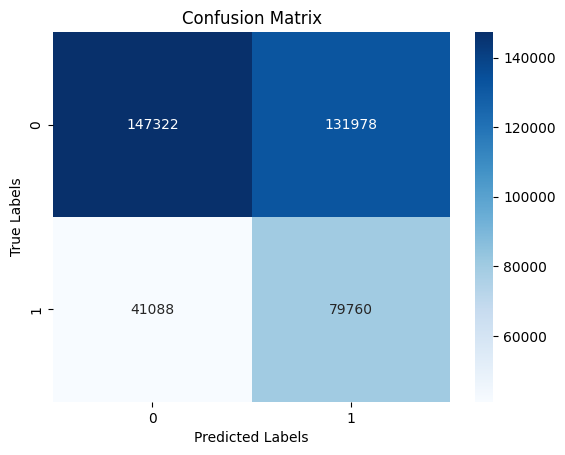

In [ ]:
num_features1 = 7
full_workflow(data, target, important_features, num_features1, sample_fraction=0.1, epochs=1000, batch_size=50000, patience=5, learning_rate=0.01)

Training Progress:   0%|          | 1/1000 [00:01<21:37,  1.30s/it]

Early stopping at epoch 0


Training Progress:   0%|          | 2/1000 [00:01<11:41,  1.42it/s]

Early stopping at epoch 1


Training Progress:   0%|          | 3/1000 [00:01<08:39,  1.92it/s]

Early stopping at epoch 2


Training Progress:   0%|          | 4/1000 [00:02<07:03,  2.35it/s]

Early stopping at epoch 3


Training Progress:   0%|          | 5/1000 [00:02<06:11,  2.68it/s]

Early stopping at epoch 4


Training Progress:   1%|          | 6/1000 [00:02<05:48,  2.85it/s]

Early stopping at epoch 5


Training Progress:   1%|          | 7/1000 [00:03<05:28,  3.02it/s]

Early stopping at epoch 6


Training Progress:   1%|          | 8/1000 [00:03<05:12,  3.17it/s]

Early stopping at epoch 7


Training Progress:   1%|          | 9/1000 [00:03<05:03,  3.27it/s]

Early stopping at epoch 8


Training Progress:   1%|          | 10/1000 [00:03<04:56,  3.34it/s]

Early stopping at epoch 9


Training Progress:   1%|          | 11/1000 [00:04<04:58,  3.31it/s]

Early stopping at epoch 10


Training Progress:   1%|          | 12/1000 [00:04<04:56,  3.33it/s]

Early stopping at epoch 11


Training Progress:   1%|▏         | 13/1000 [00:04<04:50,  3.40it/s]

Early stopping at epoch 12


Training Progress:   1%|▏         | 14/1000 [00:05<04:49,  3.41it/s]

Early stopping at epoch 13


Training Progress:   2%|▏         | 15/1000 [00:05<04:52,  3.36it/s]

Early stopping at epoch 14


Training Progress:   2%|▏         | 16/1000 [00:05<04:56,  3.32it/s]

Early stopping at epoch 15


Training Progress:   2%|▏         | 17/1000 [00:05<04:51,  3.37it/s]

Early stopping at epoch 16


Training Progress:   2%|▏         | 18/1000 [00:06<04:54,  3.33it/s]

Early stopping at epoch 17


Training Progress:   2%|▏         | 19/1000 [00:06<04:49,  3.39it/s]

Early stopping at epoch 18


Training Progress:   2%|▏         | 20/1000 [00:06<04:26,  3.68it/s]

Early stopping at epoch 19


Training Progress:   2%|▏         | 21/1000 [00:07<04:10,  3.91it/s]

Early stopping at epoch 20


Training Progress:   2%|▏         | 22/1000 [00:07<03:58,  4.09it/s]

Early stopping at epoch 21


Training Progress:   2%|▏         | 23/1000 [00:07<03:53,  4.19it/s]

Early stopping at epoch 22


Training Progress:   2%|▏         | 24/1000 [00:07<03:44,  4.34it/s]

Early stopping at epoch 23


Training Progress:   2%|▎         | 25/1000 [00:07<03:40,  4.43it/s]

Early stopping at epoch 24


Training Progress:   3%|▎         | 26/1000 [00:08<03:35,  4.51it/s]

Early stopping at epoch 25


Training Progress:   3%|▎         | 27/1000 [00:08<03:36,  4.50it/s]

Early stopping at epoch 26


Training Progress:   3%|▎         | 28/1000 [00:08<03:34,  4.53it/s]

Early stopping at epoch 27


Training Progress:   3%|▎         | 29/1000 [00:08<03:35,  4.50it/s]

Early stopping at epoch 28


Training Progress:   3%|▎         | 30/1000 [00:08<03:32,  4.56it/s]

Early stopping at epoch 29


Training Progress:   3%|▎         | 31/1000 [00:09<03:30,  4.61it/s]

Early stopping at epoch 30


Training Progress:   3%|▎         | 32/1000 [00:09<03:34,  4.52it/s]

Early stopping at epoch 31


Training Progress:   3%|▎         | 33/1000 [00:09<03:33,  4.53it/s]

Early stopping at epoch 32


Training Progress:   3%|▎         | 34/1000 [00:09<03:32,  4.54it/s]

Early stopping at epoch 33


Training Progress:   4%|▎         | 35/1000 [00:10<03:29,  4.61it/s]

Early stopping at epoch 34


Training Progress:   4%|▎         | 36/1000 [00:10<03:30,  4.58it/s]

Early stopping at epoch 35


Training Progress:   4%|▎         | 37/1000 [00:10<03:32,  4.54it/s]

Early stopping at epoch 36


Training Progress:   4%|▍         | 38/1000 [00:10<03:36,  4.44it/s]

Early stopping at epoch 37


Training Progress:   4%|▍         | 39/1000 [00:10<03:31,  4.54it/s]

Early stopping at epoch 38


Training Progress:   4%|▍         | 40/1000 [00:11<03:32,  4.51it/s]

Early stopping at epoch 39


Training Progress:   4%|▍         | 41/1000 [00:11<03:31,  4.53it/s]

Early stopping at epoch 40


Training Progress:   4%|▍         | 42/1000 [00:11<03:34,  4.46it/s]

Early stopping at epoch 41


Training Progress:   4%|▍         | 43/1000 [00:11<03:33,  4.49it/s]

Early stopping at epoch 42


Training Progress:   4%|▍         | 44/1000 [00:12<03:32,  4.50it/s]

Early stopping at epoch 43


Training Progress:   4%|▍         | 45/1000 [00:12<03:31,  4.51it/s]

Early stopping at epoch 44


Training Progress:   5%|▍         | 46/1000 [00:12<03:36,  4.40it/s]

Early stopping at epoch 45


Training Progress:   5%|▍         | 47/1000 [00:12<03:34,  4.43it/s]

Early stopping at epoch 46


Training Progress:   5%|▍         | 48/1000 [00:12<03:30,  4.52it/s]

Early stopping at epoch 47


Training Progress:   5%|▍         | 49/1000 [00:13<03:30,  4.51it/s]

Early stopping at epoch 48


Training Progress:   5%|▌         | 50/1000 [00:13<03:30,  4.51it/s]

Early stopping at epoch 49


Training Progress:   5%|▌         | 51/1000 [00:13<03:32,  4.46it/s]

Early stopping at epoch 50


Training Progress:   5%|▌         | 52/1000 [00:13<03:34,  4.42it/s]

Early stopping at epoch 51


Training Progress:   5%|▌         | 53/1000 [00:14<03:33,  4.43it/s]

Early stopping at epoch 52


Training Progress:   5%|▌         | 54/1000 [00:14<03:30,  4.50it/s]

Early stopping at epoch 53


Training Progress:   6%|▌         | 55/1000 [00:14<03:26,  4.57it/s]

Early stopping at epoch 54


Training Progress:   6%|▌         | 56/1000 [00:14<03:32,  4.44it/s]

Early stopping at epoch 55


Training Progress:   6%|▌         | 57/1000 [00:14<03:30,  4.49it/s]

Early stopping at epoch 56


Training Progress:   6%|▌         | 58/1000 [00:15<03:29,  4.50it/s]

Early stopping at epoch 57


Training Progress:   6%|▌         | 59/1000 [00:15<03:27,  4.54it/s]

Early stopping at epoch 58


Training Progress:   6%|▌         | 60/1000 [00:15<03:29,  4.49it/s]

Early stopping at epoch 59


Training Progress:   6%|▌         | 61/1000 [00:15<03:29,  4.48it/s]

Early stopping at epoch 60


Training Progress:   6%|▌         | 62/1000 [00:16<03:27,  4.52it/s]

Early stopping at epoch 61


Training Progress:   6%|▋         | 63/1000 [00:16<03:26,  4.55it/s]

Early stopping at epoch 62


Training Progress:   6%|▋         | 64/1000 [00:16<03:25,  4.56it/s]

Early stopping at epoch 63


Training Progress:   6%|▋         | 65/1000 [00:16<03:41,  4.22it/s]

Early stopping at epoch 64


Training Progress:   7%|▋         | 66/1000 [00:17<03:56,  3.94it/s]

Early stopping at epoch 65


Training Progress:   7%|▋         | 67/1000 [00:17<04:02,  3.85it/s]

Early stopping at epoch 66


Training Progress:   7%|▋         | 68/1000 [00:17<04:04,  3.81it/s]

Early stopping at epoch 67


Training Progress:   7%|▋         | 69/1000 [00:17<04:25,  3.51it/s]

Early stopping at epoch 68


Training Progress:   7%|▋         | 70/1000 [00:18<04:18,  3.59it/s]

Early stopping at epoch 69


Training Progress:   7%|▋         | 71/1000 [00:18<04:25,  3.50it/s]

Early stopping at epoch 70


Training Progress:   7%|▋         | 72/1000 [00:18<04:27,  3.47it/s]

Early stopping at epoch 71


Training Progress:   7%|▋         | 73/1000 [00:19<04:24,  3.50it/s]

Early stopping at epoch 72


Training Progress:   7%|▋         | 74/1000 [00:19<04:31,  3.41it/s]

Early stopping at epoch 73


Training Progress:   8%|▊         | 75/1000 [00:19<04:24,  3.50it/s]

Early stopping at epoch 74


Training Progress:   8%|▊         | 76/1000 [00:19<04:28,  3.44it/s]

Early stopping at epoch 75


Training Progress:   8%|▊         | 77/1000 [00:20<04:26,  3.46it/s]

Early stopping at epoch 76


Training Progress:   8%|▊         | 78/1000 [00:20<04:27,  3.44it/s]

Early stopping at epoch 77


Training Progress:   8%|▊         | 79/1000 [00:20<04:29,  3.41it/s]

Early stopping at epoch 78


Training Progress:   8%|▊         | 80/1000 [00:21<04:37,  3.31it/s]

Early stopping at epoch 79


Training Progress:   8%|▊         | 81/1000 [00:21<04:34,  3.35it/s]

Early stopping at epoch 80


Training Progress:   8%|▊         | 82/1000 [00:21<04:36,  3.32it/s]

Early stopping at epoch 81


Training Progress:   8%|▊         | 83/1000 [00:22<04:33,  3.36it/s]

Early stopping at epoch 82


Training Progress:   8%|▊         | 84/1000 [00:22<04:24,  3.46it/s]

Early stopping at epoch 83


Training Progress:   8%|▊         | 85/1000 [00:22<04:05,  3.73it/s]

Early stopping at epoch 84


Training Progress:   9%|▊         | 86/1000 [00:22<03:51,  3.94it/s]

Early stopping at epoch 85


Training Progress:   9%|▊         | 87/1000 [00:23<03:43,  4.08it/s]

Early stopping at epoch 86


Training Progress:   9%|▉         | 88/1000 [00:23<03:39,  4.15it/s]

Early stopping at epoch 87


Training Progress:   9%|▉         | 89/1000 [00:23<03:33,  4.27it/s]

Early stopping at epoch 88


Training Progress:   9%|▉         | 90/1000 [00:23<03:29,  4.35it/s]

Early stopping at epoch 89


Training Progress:   9%|▉         | 91/1000 [00:23<03:25,  4.42it/s]

Early stopping at epoch 90


Training Progress:   9%|▉         | 92/1000 [00:24<03:24,  4.43it/s]

Early stopping at epoch 91


Training Progress:   9%|▉         | 93/1000 [00:24<03:23,  4.45it/s]

Early stopping at epoch 92


Training Progress:   9%|▉         | 94/1000 [00:24<03:22,  4.48it/s]

Early stopping at epoch 93


Training Progress:  10%|▉         | 95/1000 [00:24<03:21,  4.50it/s]

Early stopping at epoch 94


Training Progress:  10%|▉         | 96/1000 [00:24<03:20,  4.51it/s]

Early stopping at epoch 95


Training Progress:  10%|▉         | 97/1000 [00:25<03:21,  4.47it/s]

Early stopping at epoch 96


Training Progress:  10%|▉         | 98/1000 [00:25<03:20,  4.50it/s]

Early stopping at epoch 97


Training Progress:  10%|▉         | 99/1000 [00:25<03:19,  4.53it/s]

Early stopping at epoch 98


Training Progress:  10%|█         | 100/1000 [00:25<03:20,  4.50it/s]

Early stopping at epoch 99


Training Progress:  10%|█         | 101/1000 [00:26<03:21,  4.46it/s]

Early stopping at epoch 100


Training Progress:  10%|█         | 102/1000 [00:26<03:22,  4.44it/s]

Early stopping at epoch 101


Training Progress:  10%|█         | 103/1000 [00:26<03:20,  4.47it/s]

Early stopping at epoch 102


Training Progress:  10%|█         | 104/1000 [00:26<03:20,  4.48it/s]

Early stopping at epoch 103


Training Progress:  10%|█         | 105/1000 [00:27<03:18,  4.50it/s]

Early stopping at epoch 104


Training Progress:  11%|█         | 106/1000 [00:27<03:15,  4.57it/s]

Early stopping at epoch 105


Training Progress:  11%|█         | 107/1000 [00:27<03:18,  4.49it/s]

Early stopping at epoch 106


Training Progress:  11%|█         | 108/1000 [00:27<03:20,  4.45it/s]

Early stopping at epoch 107


Training Progress:  11%|█         | 109/1000 [00:27<03:19,  4.46it/s]

Early stopping at epoch 108


Training Progress:  11%|█         | 110/1000 [00:28<03:18,  4.48it/s]

Early stopping at epoch 109


Training Progress:  11%|█         | 111/1000 [00:28<03:17,  4.50it/s]

Early stopping at epoch 110


Training Progress:  11%|█         | 112/1000 [00:28<03:15,  4.53it/s]

Early stopping at epoch 111


Training Progress:  11%|█▏        | 113/1000 [00:28<03:15,  4.54it/s]

Early stopping at epoch 112


Training Progress:  11%|█▏        | 114/1000 [00:28<03:13,  4.57it/s]

Early stopping at epoch 113


Training Progress:  12%|█▏        | 115/1000 [00:29<03:13,  4.57it/s]

Early stopping at epoch 114


Training Progress:  12%|█▏        | 116/1000 [00:29<03:16,  4.49it/s]

Early stopping at epoch 115


Training Progress:  12%|█▏        | 117/1000 [00:29<03:16,  4.50it/s]

Early stopping at epoch 116


Training Progress:  12%|█▏        | 118/1000 [00:29<03:16,  4.49it/s]

Early stopping at epoch 117


Training Progress:  12%|█▏        | 119/1000 [00:30<03:16,  4.48it/s]

Early stopping at epoch 118


Training Progress:  12%|█▏        | 120/1000 [00:30<03:15,  4.50it/s]

Early stopping at epoch 119


Training Progress:  12%|█▏        | 121/1000 [00:30<03:18,  4.44it/s]

Early stopping at epoch 120


Training Progress:  12%|█▏        | 122/1000 [00:30<03:17,  4.45it/s]

Early stopping at epoch 121


Training Progress:  12%|█▏        | 123/1000 [00:31<03:14,  4.50it/s]

Early stopping at epoch 122


Training Progress:  12%|█▏        | 124/1000 [00:31<03:13,  4.52it/s]

Early stopping at epoch 123


Training Progress:  12%|█▎        | 125/1000 [00:31<03:16,  4.45it/s]

Early stopping at epoch 124


Training Progress:  13%|█▎        | 126/1000 [00:31<03:17,  4.43it/s]

Early stopping at epoch 125


Training Progress:  13%|█▎        | 127/1000 [00:31<03:16,  4.44it/s]

Early stopping at epoch 126


Training Progress:  13%|█▎        | 128/1000 [00:32<03:14,  4.48it/s]

Early stopping at epoch 127


Training Progress:  13%|█▎        | 129/1000 [00:32<03:18,  4.39it/s]

Early stopping at epoch 128


Training Progress:  13%|█▎        | 130/1000 [00:32<03:43,  3.90it/s]

Early stopping at epoch 129


Training Progress:  13%|█▎        | 131/1000 [00:32<03:53,  3.73it/s]

Early stopping at epoch 130


Training Progress:  13%|█▎        | 132/1000 [00:33<03:51,  3.75it/s]

Early stopping at epoch 131


Training Progress:  13%|█▎        | 133/1000 [00:33<03:50,  3.76it/s]

Early stopping at epoch 132


Training Progress:  13%|█▎        | 134/1000 [00:33<03:53,  3.71it/s]

Early stopping at epoch 133


Training Progress:  14%|█▎        | 135/1000 [00:34<03:57,  3.64it/s]

Early stopping at epoch 134


Training Progress:  14%|█▎        | 136/1000 [00:34<04:02,  3.57it/s]

Early stopping at epoch 135


Training Progress:  14%|█▎        | 137/1000 [00:34<04:06,  3.50it/s]

Early stopping at epoch 136


Training Progress:  14%|█▍        | 138/1000 [00:34<04:06,  3.50it/s]

Early stopping at epoch 137


Training Progress:  14%|█▍        | 139/1000 [00:35<04:07,  3.47it/s]

Early stopping at epoch 138


Training Progress:  14%|█▍        | 140/1000 [00:35<04:10,  3.43it/s]

Early stopping at epoch 139


Training Progress:  14%|█▍        | 141/1000 [00:35<04:10,  3.43it/s]

Early stopping at epoch 140


Training Progress:  14%|█▍        | 142/1000 [00:36<04:03,  3.53it/s]

Early stopping at epoch 141


Training Progress:  14%|█▍        | 143/1000 [00:36<04:09,  3.44it/s]

Early stopping at epoch 142


Training Progress:  14%|█▍        | 144/1000 [00:36<04:04,  3.50it/s]

Early stopping at epoch 143


Training Progress:  14%|█▍        | 145/1000 [00:36<04:11,  3.40it/s]

Early stopping at epoch 144


Training Progress:  15%|█▍        | 146/1000 [00:37<04:12,  3.38it/s]

Early stopping at epoch 145


Training Progress:  15%|█▍        | 147/1000 [00:37<04:15,  3.34it/s]

Early stopping at epoch 146


Training Progress:  15%|█▍        | 148/1000 [00:37<04:23,  3.24it/s]

Early stopping at epoch 147


Training Progress:  15%|█▍        | 149/1000 [00:38<04:08,  3.43it/s]

Early stopping at epoch 148


Training Progress:  15%|█▌        | 150/1000 [00:38<03:51,  3.68it/s]

Early stopping at epoch 149


Training Progress:  15%|█▌        | 151/1000 [00:38<03:38,  3.89it/s]

Early stopping at epoch 150


Training Progress:  15%|█▌        | 152/1000 [00:38<03:31,  4.01it/s]

Early stopping at epoch 151


Training Progress:  15%|█▌        | 153/1000 [00:39<03:25,  4.11it/s]

Early stopping at epoch 152


Training Progress:  15%|█▌        | 154/1000 [00:39<03:18,  4.27it/s]

Early stopping at epoch 153


Training Progress:  16%|█▌        | 155/1000 [00:39<03:13,  4.36it/s]

Early stopping at epoch 154


Training Progress:  16%|█▌        | 156/1000 [00:39<03:13,  4.37it/s]

Early stopping at epoch 155


Training Progress:  16%|█▌        | 157/1000 [00:39<03:12,  4.38it/s]

Early stopping at epoch 156


Training Progress:  16%|█▌        | 158/1000 [00:40<03:09,  4.45it/s]

Early stopping at epoch 157


Training Progress:  16%|█▌        | 159/1000 [00:40<03:05,  4.52it/s]

Early stopping at epoch 158


Training Progress:  16%|█▌        | 160/1000 [00:40<03:04,  4.55it/s]

Early stopping at epoch 159


Training Progress:  16%|█▌        | 161/1000 [00:40<03:07,  4.47it/s]

Early stopping at epoch 160


Training Progress:  16%|█▌        | 162/1000 [00:41<03:10,  4.40it/s]

Early stopping at epoch 161


Training Progress:  16%|█▋        | 163/1000 [00:41<03:08,  4.44it/s]

Early stopping at epoch 162


Training Progress:  16%|█▋        | 164/1000 [00:41<03:07,  4.47it/s]

Early stopping at epoch 163


Training Progress:  16%|█▋        | 165/1000 [00:41<03:06,  4.47it/s]

Early stopping at epoch 164


Training Progress:  17%|█▋        | 166/1000 [00:41<03:03,  4.54it/s]

Early stopping at epoch 165


Training Progress:  17%|█▋        | 167/1000 [00:42<03:04,  4.51it/s]

Early stopping at epoch 166


Training Progress:  17%|█▋        | 168/1000 [00:42<03:02,  4.55it/s]

Early stopping at epoch 167


Training Progress:  17%|█▋        | 169/1000 [00:42<03:01,  4.57it/s]

Early stopping at epoch 168


Training Progress:  17%|█▋        | 170/1000 [00:42<03:08,  4.41it/s]

Early stopping at epoch 169


Training Progress:  17%|█▋        | 171/1000 [00:43<03:07,  4.41it/s]

Early stopping at epoch 170


Training Progress:  17%|█▋        | 172/1000 [00:43<03:05,  4.46it/s]

Early stopping at epoch 171


Training Progress:  17%|█▋        | 173/1000 [00:43<03:04,  4.48it/s]

Early stopping at epoch 172


Training Progress:  17%|█▋        | 174/1000 [00:43<03:03,  4.50it/s]

Early stopping at epoch 173


Training Progress:  18%|█▊        | 175/1000 [00:44<03:08,  4.37it/s]

Early stopping at epoch 174


Training Progress:  18%|█▊        | 176/1000 [00:44<03:11,  4.29it/s]

Early stopping at epoch 175


Training Progress:  18%|█▊        | 177/1000 [00:44<03:08,  4.36it/s]

Early stopping at epoch 176


Training Progress:  18%|█▊        | 178/1000 [00:44<03:11,  4.30it/s]

Early stopping at epoch 177


Training Progress:  18%|█▊        | 179/1000 [00:44<03:06,  4.40it/s]

Early stopping at epoch 178


Training Progress:  18%|█▊        | 180/1000 [00:45<03:07,  4.36it/s]

Early stopping at epoch 179


Training Progress:  18%|█▊        | 181/1000 [00:45<03:05,  4.42it/s]

Early stopping at epoch 180


Training Progress:  18%|█▊        | 182/1000 [00:45<03:03,  4.45it/s]

Early stopping at epoch 181


Training Progress:  18%|█▊        | 183/1000 [00:45<03:04,  4.43it/s]

Early stopping at epoch 182


Training Progress:  18%|█▊        | 184/1000 [00:46<03:02,  4.47it/s]

Early stopping at epoch 183


Training Progress:  18%|█▊        | 185/1000 [00:46<03:00,  4.51it/s]

Early stopping at epoch 184


Training Progress:  19%|█▊        | 186/1000 [00:46<02:58,  4.56it/s]

Early stopping at epoch 185


Training Progress:  19%|█▊        | 187/1000 [00:46<03:02,  4.46it/s]

Early stopping at epoch 186


Training Progress:  19%|█▉        | 188/1000 [00:46<03:00,  4.51it/s]

Early stopping at epoch 187


Training Progress:  19%|█▉        | 189/1000 [00:47<02:59,  4.52it/s]

Early stopping at epoch 188


Training Progress:  19%|█▉        | 190/1000 [00:47<03:02,  4.45it/s]

Early stopping at epoch 189


Training Progress:  19%|█▉        | 191/1000 [00:47<03:00,  4.48it/s]

Early stopping at epoch 190


Training Progress:  19%|█▉        | 192/1000 [00:47<02:59,  4.50it/s]

Early stopping at epoch 191


Training Progress:  19%|█▉        | 193/1000 [00:48<02:59,  4.49it/s]

Early stopping at epoch 192


Training Progress:  19%|█▉        | 194/1000 [00:48<03:15,  4.13it/s]

Early stopping at epoch 193


Training Progress:  20%|█▉        | 195/1000 [00:48<03:22,  3.98it/s]

Early stopping at epoch 194


Training Progress:  20%|█▉        | 196/1000 [00:48<03:24,  3.93it/s]

Early stopping at epoch 195


Training Progress:  20%|█▉        | 197/1000 [00:49<03:31,  3.80it/s]

Early stopping at epoch 196


Training Progress:  20%|█▉        | 198/1000 [00:49<03:35,  3.71it/s]

Early stopping at epoch 197


Training Progress:  20%|█▉        | 199/1000 [00:49<03:49,  3.49it/s]

Early stopping at epoch 198


Training Progress:  20%|██        | 200/1000 [00:50<03:47,  3.52it/s]

Early stopping at epoch 199


Training Progress:  20%|██        | 201/1000 [00:50<03:46,  3.53it/s]

Early stopping at epoch 200


Training Progress:  20%|██        | 202/1000 [00:50<03:47,  3.51it/s]

Early stopping at epoch 201


Training Progress:  20%|██        | 203/1000 [00:50<03:50,  3.46it/s]

Early stopping at epoch 202


Training Progress:  20%|██        | 204/1000 [00:51<03:50,  3.45it/s]

Early stopping at epoch 203


Training Progress:  20%|██        | 205/1000 [00:51<03:52,  3.42it/s]

Early stopping at epoch 204


Training Progress:  21%|██        | 206/1000 [00:51<03:58,  3.32it/s]

Early stopping at epoch 205


Training Progress:  21%|██        | 207/1000 [00:52<03:55,  3.37it/s]

Early stopping at epoch 206


Training Progress:  21%|██        | 208/1000 [00:52<03:48,  3.46it/s]

Early stopping at epoch 207


Training Progress:  21%|██        | 209/1000 [00:52<03:50,  3.43it/s]

Early stopping at epoch 208


Training Progress:  21%|██        | 210/1000 [00:52<03:49,  3.44it/s]

Early stopping at epoch 209


Training Progress:  21%|██        | 211/1000 [00:53<03:48,  3.46it/s]

Early stopping at epoch 210


Training Progress:  21%|██        | 212/1000 [00:53<03:47,  3.47it/s]

Early stopping at epoch 211


Training Progress:  21%|██▏       | 213/1000 [00:53<03:51,  3.40it/s]

Early stopping at epoch 212


Training Progress:  21%|██▏       | 214/1000 [00:54<03:33,  3.67it/s]

Early stopping at epoch 213


Training Progress:  22%|██▏       | 215/1000 [00:54<03:21,  3.90it/s]

Early stopping at epoch 214


Training Progress:  22%|██▏       | 216/1000 [00:54<03:13,  4.05it/s]

Early stopping at epoch 215


Training Progress:  22%|██▏       | 217/1000 [00:54<03:14,  4.03it/s]

Early stopping at epoch 216


Training Progress:  22%|██▏       | 218/1000 [00:54<03:07,  4.18it/s]

Early stopping at epoch 217


Training Progress:  22%|██▏       | 219/1000 [00:55<03:02,  4.27it/s]

Early stopping at epoch 218


Training Progress:  22%|██▏       | 220/1000 [00:55<02:58,  4.36it/s]

Early stopping at epoch 219


Training Progress:  22%|██▏       | 221/1000 [00:55<02:56,  4.41it/s]

Early stopping at epoch 220


Training Progress:  22%|██▏       | 222/1000 [00:55<02:56,  4.40it/s]

Early stopping at epoch 221


Training Progress:  22%|██▏       | 223/1000 [00:56<02:55,  4.42it/s]

Early stopping at epoch 222


Training Progress:  22%|██▏       | 224/1000 [00:56<02:52,  4.49it/s]

Early stopping at epoch 223


Training Progress:  22%|██▎       | 225/1000 [00:56<02:52,  4.48it/s]

Early stopping at epoch 224


Training Progress:  23%|██▎       | 226/1000 [00:56<02:55,  4.41it/s]

Early stopping at epoch 225


Training Progress:  23%|██▎       | 227/1000 [00:57<02:59,  4.30it/s]

Early stopping at epoch 226


Training Progress:  23%|██▎       | 228/1000 [00:57<02:56,  4.37it/s]

Early stopping at epoch 227


Training Progress:  23%|██▎       | 229/1000 [00:57<02:56,  4.37it/s]

Early stopping at epoch 228


Training Progress:  23%|██▎       | 230/1000 [00:57<02:54,  4.40it/s]

Early stopping at epoch 229


Training Progress:  23%|██▎       | 231/1000 [00:57<02:56,  4.35it/s]

Early stopping at epoch 230


Training Progress:  23%|██▎       | 232/1000 [00:58<02:52,  4.46it/s]

Early stopping at epoch 231


Training Progress:  23%|██▎       | 233/1000 [00:58<02:51,  4.48it/s]

Early stopping at epoch 232


Training Progress:  23%|██▎       | 234/1000 [00:58<02:47,  4.57it/s]

Early stopping at epoch 233


Training Progress:  24%|██▎       | 235/1000 [00:58<02:49,  4.52it/s]

Early stopping at epoch 234


Training Progress:  24%|██▎       | 236/1000 [00:59<02:51,  4.47it/s]

Early stopping at epoch 235


Training Progress:  24%|██▎       | 237/1000 [00:59<02:49,  4.49it/s]

Early stopping at epoch 236


Training Progress:  24%|██▍       | 238/1000 [00:59<02:47,  4.55it/s]

Early stopping at epoch 237


Training Progress:  24%|██▍       | 239/1000 [00:59<02:48,  4.50it/s]

Early stopping at epoch 238


Training Progress:  24%|██▍       | 240/1000 [00:59<02:49,  4.48it/s]

Early stopping at epoch 239


Training Progress:  24%|██▍       | 241/1000 [01:00<02:53,  4.38it/s]

Early stopping at epoch 240


Training Progress:  24%|██▍       | 242/1000 [01:00<02:51,  4.43it/s]

Early stopping at epoch 241


Training Progress:  24%|██▍       | 243/1000 [01:00<02:48,  4.49it/s]

Early stopping at epoch 242


Training Progress:  24%|██▍       | 244/1000 [01:00<02:52,  4.39it/s]

Early stopping at epoch 243


Training Progress:  24%|██▍       | 245/1000 [01:01<02:54,  4.33it/s]

Early stopping at epoch 244


Training Progress:  25%|██▍       | 246/1000 [01:01<02:51,  4.40it/s]

Early stopping at epoch 245


Training Progress:  25%|██▍       | 247/1000 [01:01<02:50,  4.42it/s]

Early stopping at epoch 246


Training Progress:  25%|██▍       | 248/1000 [01:01<02:50,  4.40it/s]

Early stopping at epoch 247


Training Progress:  25%|██▍       | 249/1000 [01:01<02:50,  4.42it/s]

Early stopping at epoch 248


Training Progress:  25%|██▌       | 250/1000 [01:02<02:51,  4.38it/s]

Early stopping at epoch 249


Training Progress:  25%|██▌       | 251/1000 [01:02<02:48,  4.44it/s]

Early stopping at epoch 250


Training Progress:  25%|██▌       | 252/1000 [01:02<02:46,  4.49it/s]

Early stopping at epoch 251


Training Progress:  25%|██▌       | 253/1000 [01:02<02:46,  4.47it/s]

Early stopping at epoch 252


Training Progress:  25%|██▌       | 254/1000 [01:03<02:45,  4.51it/s]

Early stopping at epoch 253


Training Progress:  26%|██▌       | 255/1000 [01:03<02:46,  4.48it/s]

Early stopping at epoch 254


Training Progress:  26%|██▌       | 256/1000 [01:03<02:45,  4.51it/s]

Early stopping at epoch 255


Training Progress:  26%|██▌       | 257/1000 [01:03<02:46,  4.47it/s]

Early stopping at epoch 256


Training Progress:  26%|██▌       | 258/1000 [01:03<02:51,  4.32it/s]

Early stopping at epoch 257


Training Progress:  26%|██▌       | 259/1000 [01:04<03:06,  3.97it/s]

Early stopping at epoch 258


Training Progress:  26%|██▌       | 260/1000 [01:04<03:13,  3.82it/s]

Early stopping at epoch 259


Training Progress:  26%|██▌       | 261/1000 [01:04<03:19,  3.71it/s]

Early stopping at epoch 260


Training Progress:  26%|██▌       | 262/1000 [01:05<03:24,  3.61it/s]

Early stopping at epoch 261


Training Progress:  26%|██▋       | 263/1000 [01:05<03:28,  3.53it/s]

Early stopping at epoch 262


Training Progress:  26%|██▋       | 264/1000 [01:05<03:28,  3.52it/s]

Early stopping at epoch 263


Training Progress:  26%|██▋       | 265/1000 [01:06<03:32,  3.46it/s]

Early stopping at epoch 264


Training Progress:  27%|██▋       | 266/1000 [01:06<03:35,  3.41it/s]

Early stopping at epoch 265


Training Progress:  27%|██▋       | 267/1000 [01:06<03:35,  3.40it/s]

Early stopping at epoch 266


Training Progress:  27%|██▋       | 268/1000 [01:06<03:35,  3.40it/s]

Early stopping at epoch 267


Training Progress:  27%|██▋       | 269/1000 [01:07<03:35,  3.39it/s]

Early stopping at epoch 268


Training Progress:  27%|██▋       | 270/1000 [01:07<03:39,  3.33it/s]

Early stopping at epoch 269


Training Progress:  27%|██▋       | 271/1000 [01:07<03:47,  3.21it/s]

Early stopping at epoch 270


Training Progress:  27%|██▋       | 272/1000 [01:08<03:39,  3.32it/s]

Early stopping at epoch 271


Training Progress:  27%|██▋       | 273/1000 [01:08<03:37,  3.34it/s]

Early stopping at epoch 272


Training Progress:  27%|██▋       | 274/1000 [01:08<03:36,  3.36it/s]

Early stopping at epoch 273


Training Progress:  28%|██▊       | 275/1000 [01:09<03:36,  3.36it/s]

Early stopping at epoch 274


Training Progress:  28%|██▊       | 276/1000 [01:09<03:30,  3.44it/s]

Early stopping at epoch 275


Training Progress:  28%|██▊       | 277/1000 [01:09<03:16,  3.69it/s]

Early stopping at epoch 276


Training Progress:  28%|██▊       | 278/1000 [01:09<03:04,  3.91it/s]

Early stopping at epoch 277


Training Progress:  28%|██▊       | 279/1000 [01:09<02:56,  4.08it/s]

Early stopping at epoch 278


Training Progress:  28%|██▊       | 280/1000 [01:10<02:53,  4.15it/s]

Early stopping at epoch 279


Training Progress:  28%|██▊       | 281/1000 [01:10<02:47,  4.30it/s]

Early stopping at epoch 280


Training Progress:  28%|██▊       | 282/1000 [01:10<02:46,  4.32it/s]

Early stopping at epoch 281


Training Progress:  28%|██▊       | 283/1000 [01:10<02:43,  4.38it/s]

Early stopping at epoch 282


Training Progress:  28%|██▊       | 284/1000 [01:11<02:41,  4.43it/s]

Early stopping at epoch 283


Training Progress:  28%|██▊       | 285/1000 [01:11<02:40,  4.46it/s]

Early stopping at epoch 284


Training Progress:  29%|██▊       | 286/1000 [01:11<02:42,  4.40it/s]

Early stopping at epoch 285


Training Progress:  29%|██▊       | 287/1000 [01:11<03:03,  3.89it/s]

Early stopping at epoch 286


Training Progress:  29%|██▉       | 288/1000 [01:12<03:12,  3.69it/s]

Early stopping at epoch 287


Training Progress:  29%|██▉       | 289/1000 [01:12<03:21,  3.54it/s]

Early stopping at epoch 288


Training Progress:  29%|██▉       | 290/1000 [01:12<03:30,  3.37it/s]

Early stopping at epoch 289


Training Progress:  29%|██▉       | 291/1000 [01:13<03:28,  3.40it/s]

Early stopping at epoch 290


Training Progress:  29%|██▉       | 292/1000 [01:13<03:28,  3.39it/s]

Early stopping at epoch 291


Training Progress:  29%|██▉       | 293/1000 [01:13<03:38,  3.24it/s]

Early stopping at epoch 292


Training Progress:  29%|██▉       | 294/1000 [01:14<03:32,  3.32it/s]

Early stopping at epoch 293


Training Progress:  30%|██▉       | 295/1000 [01:14<03:31,  3.33it/s]

Early stopping at epoch 294


Training Progress:  30%|██▉       | 296/1000 [01:14<03:29,  3.37it/s]

Early stopping at epoch 295


Training Progress:  30%|██▉       | 297/1000 [01:14<03:25,  3.42it/s]

Early stopping at epoch 296


Training Progress:  30%|██▉       | 298/1000 [01:15<03:23,  3.44it/s]

Early stopping at epoch 297


Training Progress:  30%|██▉       | 299/1000 [01:15<03:24,  3.43it/s]

Early stopping at epoch 298


Training Progress:  30%|███       | 300/1000 [01:15<03:35,  3.25it/s]

Early stopping at epoch 299


Training Progress:  30%|███       | 301/1000 [01:16<03:31,  3.31it/s]

Early stopping at epoch 300


Training Progress:  30%|███       | 302/1000 [01:16<03:28,  3.35it/s]

Early stopping at epoch 301


Training Progress:  30%|███       | 303/1000 [01:16<03:20,  3.47it/s]

Early stopping at epoch 302


Training Progress:  30%|███       | 304/1000 [01:16<03:08,  3.69it/s]

Early stopping at epoch 303


Training Progress:  30%|███       | 305/1000 [01:17<02:59,  3.87it/s]

Early stopping at epoch 304


Training Progress:  31%|███       | 306/1000 [01:17<02:51,  4.05it/s]

Early stopping at epoch 305


Training Progress:  31%|███       | 307/1000 [01:17<02:44,  4.20it/s]

Early stopping at epoch 306


Training Progress:  31%|███       | 308/1000 [01:17<02:44,  4.21it/s]

Early stopping at epoch 307


Training Progress:  31%|███       | 309/1000 [01:18<02:41,  4.28it/s]

Early stopping at epoch 308


Training Progress:  31%|███       | 310/1000 [01:18<02:39,  4.32it/s]

Early stopping at epoch 309


Training Progress:  31%|███       | 311/1000 [01:18<02:36,  4.41it/s]

Early stopping at epoch 310


Training Progress:  31%|███       | 312/1000 [01:18<02:34,  4.45it/s]

Early stopping at epoch 311


Training Progress:  31%|███▏      | 313/1000 [01:18<02:38,  4.33it/s]

Early stopping at epoch 312


Training Progress:  31%|███▏      | 314/1000 [01:19<02:35,  4.40it/s]

Early stopping at epoch 313


Training Progress:  32%|███▏      | 315/1000 [01:19<02:38,  4.32it/s]

Early stopping at epoch 314


Training Progress:  32%|███▏      | 316/1000 [01:19<02:52,  3.95it/s]

Early stopping at epoch 315


Training Progress:  32%|███▏      | 317/1000 [01:19<03:00,  3.78it/s]

Early stopping at epoch 316


Training Progress:  32%|███▏      | 318/1000 [01:20<03:06,  3.65it/s]

Early stopping at epoch 317


Training Progress:  32%|███▏      | 319/1000 [01:20<03:10,  3.58it/s]

Early stopping at epoch 318


Training Progress:  32%|███▏      | 320/1000 [01:20<03:20,  3.39it/s]

Early stopping at epoch 319


Training Progress:  32%|███▏      | 321/1000 [01:21<03:25,  3.30it/s]

Early stopping at epoch 320


Training Progress:  32%|███▏      | 322/1000 [01:21<03:21,  3.37it/s]

Early stopping at epoch 321


Training Progress:  32%|███▏      | 323/1000 [01:21<03:20,  3.37it/s]

Early stopping at epoch 322


Training Progress:  32%|███▏      | 324/1000 [01:22<03:20,  3.37it/s]

Early stopping at epoch 323


Training Progress:  32%|███▎      | 325/1000 [01:22<03:16,  3.43it/s]

Early stopping at epoch 324


Training Progress:  33%|███▎      | 326/1000 [01:22<03:14,  3.47it/s]

Early stopping at epoch 325


Training Progress:  33%|███▎      | 327/1000 [01:22<03:17,  3.41it/s]

Early stopping at epoch 326


Training Progress:  33%|███▎      | 328/1000 [01:23<03:18,  3.38it/s]

Early stopping at epoch 327


Training Progress:  33%|███▎      | 329/1000 [01:23<03:12,  3.48it/s]

Early stopping at epoch 328


Training Progress:  33%|███▎      | 330/1000 [01:23<03:11,  3.49it/s]

Early stopping at epoch 329


Training Progress:  33%|███▎      | 331/1000 [01:24<03:10,  3.51it/s]

Early stopping at epoch 330


Training Progress:  33%|███▎      | 332/1000 [01:24<03:13,  3.45it/s]

Early stopping at epoch 331


Training Progress:  33%|███▎      | 333/1000 [01:24<03:08,  3.53it/s]

Early stopping at epoch 332


Training Progress:  33%|███▎      | 334/1000 [01:24<03:12,  3.46it/s]

Early stopping at epoch 333


Training Progress:  34%|███▎      | 335/1000 [01:25<03:03,  3.62it/s]

Early stopping at epoch 334


Training Progress:  34%|███▎      | 336/1000 [01:25<02:53,  3.82it/s]

Early stopping at epoch 335


Training Progress:  34%|███▎      | 337/1000 [01:25<02:43,  4.05it/s]

Early stopping at epoch 336


Training Progress:  34%|███▍      | 338/1000 [01:25<02:38,  4.19it/s]

Early stopping at epoch 337


Training Progress:  34%|███▍      | 339/1000 [01:26<02:35,  4.24it/s]

Early stopping at epoch 338


Training Progress:  34%|███▍      | 340/1000 [01:26<02:35,  4.24it/s]

Early stopping at epoch 339


Training Progress:  34%|███▍      | 341/1000 [01:26<02:32,  4.31it/s]

Early stopping at epoch 340


Training Progress:  34%|███▍      | 342/1000 [01:26<02:32,  4.31it/s]

Early stopping at epoch 341


Training Progress:  34%|███▍      | 343/1000 [01:27<02:32,  4.32it/s]

Early stopping at epoch 342


Training Progress:  34%|███▍      | 344/1000 [01:27<02:30,  4.35it/s]

Early stopping at epoch 343


Training Progress:  34%|███▍      | 345/1000 [01:27<02:30,  4.36it/s]

Early stopping at epoch 344


Training Progress:  35%|███▍      | 346/1000 [01:27<02:32,  4.29it/s]

Early stopping at epoch 345


Training Progress:  35%|███▍      | 347/1000 [01:27<02:30,  4.35it/s]

Early stopping at epoch 346


Training Progress:  35%|███▍      | 348/1000 [01:28<02:29,  4.37it/s]

Early stopping at epoch 347


Training Progress:  35%|███▍      | 349/1000 [01:28<02:28,  4.40it/s]

Early stopping at epoch 348


Training Progress:  35%|███▌      | 350/1000 [01:28<02:30,  4.33it/s]

Early stopping at epoch 349


Training Progress:  35%|███▌      | 351/1000 [01:28<02:32,  4.26it/s]

Early stopping at epoch 350


Training Progress:  35%|███▌      | 352/1000 [01:29<02:30,  4.30it/s]

Early stopping at epoch 351


Training Progress:  35%|███▌      | 353/1000 [01:29<02:27,  4.39it/s]

Early stopping at epoch 352


Training Progress:  35%|███▌      | 354/1000 [01:29<02:25,  4.45it/s]

Early stopping at epoch 353


Training Progress:  36%|███▌      | 355/1000 [01:29<02:27,  4.37it/s]

Early stopping at epoch 354


Training Progress:  36%|███▌      | 356/1000 [01:30<02:25,  4.44it/s]

Early stopping at epoch 355


Training Progress:  36%|███▌      | 357/1000 [01:30<02:23,  4.47it/s]

Early stopping at epoch 356


Training Progress:  36%|███▌      | 358/1000 [01:30<02:23,  4.47it/s]

Early stopping at epoch 357


Training Progress:  36%|███▌      | 359/1000 [01:30<02:25,  4.41it/s]

Early stopping at epoch 358


Training Progress:  36%|███▌      | 360/1000 [01:30<02:23,  4.45it/s]

Early stopping at epoch 359


Training Progress:  36%|███▌      | 361/1000 [01:31<02:22,  4.48it/s]

Early stopping at epoch 360


Training Progress:  36%|███▌      | 362/1000 [01:31<02:20,  4.53it/s]

Early stopping at epoch 361


Training Progress:  36%|███▋      | 363/1000 [01:31<02:19,  4.55it/s]

Early stopping at epoch 362


Training Progress:  36%|███▋      | 364/1000 [01:31<02:21,  4.50it/s]

Early stopping at epoch 363


Training Progress:  36%|███▋      | 365/1000 [01:31<02:19,  4.55it/s]

Early stopping at epoch 364


Training Progress:  37%|███▋      | 366/1000 [01:32<02:19,  4.56it/s]

Early stopping at epoch 365


Training Progress:  37%|███▋      | 367/1000 [01:32<02:19,  4.55it/s]

Early stopping at epoch 366


Training Progress:  37%|███▋      | 368/1000 [01:32<02:18,  4.56it/s]

Early stopping at epoch 367


Training Progress:  37%|███▋      | 369/1000 [01:32<02:21,  4.45it/s]

Early stopping at epoch 368


Training Progress:  37%|███▋      | 370/1000 [01:33<02:20,  4.48it/s]

Early stopping at epoch 369


Training Progress:  37%|███▋      | 371/1000 [01:33<02:18,  4.54it/s]

Early stopping at epoch 370


Training Progress:  37%|███▋      | 372/1000 [01:33<02:18,  4.52it/s]

Early stopping at epoch 371


Training Progress:  37%|███▋      | 373/1000 [01:33<02:22,  4.39it/s]

Early stopping at epoch 372


Training Progress:  37%|███▋      | 374/1000 [01:34<02:20,  4.45it/s]

Early stopping at epoch 373


Training Progress:  38%|███▊      | 375/1000 [01:34<02:19,  4.49it/s]

Early stopping at epoch 374


Training Progress:  38%|███▊      | 376/1000 [01:34<02:17,  4.54it/s]

Early stopping at epoch 375


Training Progress:  38%|███▊      | 377/1000 [01:34<02:16,  4.56it/s]

Early stopping at epoch 376


Training Progress:  38%|███▊      | 378/1000 [01:34<02:22,  4.37it/s]

Early stopping at epoch 377


Training Progress:  38%|███▊      | 379/1000 [01:35<02:24,  4.31it/s]

Early stopping at epoch 378


Training Progress:  38%|███▊      | 380/1000 [01:35<02:31,  4.09it/s]

Early stopping at epoch 379


Training Progress:  38%|███▊      | 381/1000 [01:35<02:39,  3.87it/s]

Early stopping at epoch 380


Training Progress:  38%|███▊      | 382/1000 [01:35<02:44,  3.75it/s]

Early stopping at epoch 381


Training Progress:  38%|███▊      | 383/1000 [01:36<02:48,  3.67it/s]

Early stopping at epoch 382


Training Progress:  38%|███▊      | 384/1000 [01:36<02:53,  3.55it/s]

Early stopping at epoch 383


Training Progress:  38%|███▊      | 385/1000 [01:36<02:56,  3.49it/s]

Early stopping at epoch 384


Training Progress:  39%|███▊      | 386/1000 [01:37<02:57,  3.47it/s]

Early stopping at epoch 385


Training Progress:  39%|███▊      | 387/1000 [01:37<02:58,  3.44it/s]

Early stopping at epoch 386


Training Progress:  39%|███▉      | 388/1000 [01:37<02:57,  3.44it/s]

Early stopping at epoch 387


Training Progress:  39%|███▉      | 389/1000 [01:38<02:59,  3.40it/s]

Early stopping at epoch 388


Training Progress:  39%|███▉      | 390/1000 [01:38<02:55,  3.47it/s]

Early stopping at epoch 389


Training Progress:  39%|███▉      | 391/1000 [01:38<02:57,  3.43it/s]

Early stopping at epoch 390


Training Progress:  39%|███▉      | 392/1000 [01:38<02:58,  3.41it/s]

Early stopping at epoch 391


Training Progress:  39%|███▉      | 393/1000 [01:39<02:59,  3.38it/s]

Early stopping at epoch 392


Training Progress:  39%|███▉      | 394/1000 [01:39<02:56,  3.43it/s]

Early stopping at epoch 393


Training Progress:  40%|███▉      | 395/1000 [01:39<02:57,  3.41it/s]

Early stopping at epoch 394


Training Progress:  40%|███▉      | 396/1000 [01:40<02:56,  3.43it/s]

Early stopping at epoch 395


Training Progress:  40%|███▉      | 397/1000 [01:40<02:52,  3.50it/s]

Early stopping at epoch 396


Training Progress:  40%|███▉      | 398/1000 [01:40<02:55,  3.44it/s]

Early stopping at epoch 397


Training Progress:  40%|███▉      | 399/1000 [01:40<02:49,  3.54it/s]

Early stopping at epoch 398


Training Progress:  40%|████      | 400/1000 [01:41<02:38,  3.78it/s]

Early stopping at epoch 399


Training Progress:  40%|████      | 401/1000 [01:41<02:32,  3.94it/s]

Early stopping at epoch 400


Training Progress:  40%|████      | 402/1000 [01:41<02:25,  4.10it/s]

Early stopping at epoch 401


Training Progress:  40%|████      | 403/1000 [01:41<02:22,  4.20it/s]

Early stopping at epoch 402


Training Progress:  40%|████      | 404/1000 [01:42<02:18,  4.32it/s]

Early stopping at epoch 403


Training Progress:  40%|████      | 405/1000 [01:42<02:18,  4.31it/s]

Early stopping at epoch 404


Training Progress:  41%|████      | 406/1000 [01:42<02:16,  4.36it/s]

Early stopping at epoch 405


Training Progress:  41%|████      | 407/1000 [01:42<02:16,  4.35it/s]

Early stopping at epoch 406


Training Progress:  41%|████      | 408/1000 [01:42<02:15,  4.36it/s]

Early stopping at epoch 407


Training Progress:  41%|████      | 409/1000 [01:43<02:15,  4.37it/s]

Early stopping at epoch 408


Training Progress:  41%|████      | 410/1000 [01:43<02:15,  4.36it/s]

Early stopping at epoch 409


Training Progress:  41%|████      | 411/1000 [01:43<02:14,  4.38it/s]

Early stopping at epoch 410


Training Progress:  41%|████      | 412/1000 [01:43<02:14,  4.36it/s]

Early stopping at epoch 411


Training Progress:  41%|████▏     | 413/1000 [01:44<02:13,  4.39it/s]

Early stopping at epoch 412


Training Progress:  41%|████▏     | 414/1000 [01:44<02:16,  4.30it/s]

Early stopping at epoch 413


Training Progress:  42%|████▏     | 415/1000 [01:44<02:13,  4.38it/s]

Early stopping at epoch 414


Training Progress:  42%|████▏     | 416/1000 [01:44<02:15,  4.31it/s]

Early stopping at epoch 415


Training Progress:  42%|████▏     | 417/1000 [01:45<02:10,  4.46it/s]

Early stopping at epoch 416


Training Progress:  42%|████▏     | 418/1000 [01:45<02:12,  4.39it/s]

Early stopping at epoch 417


Training Progress:  42%|████▏     | 419/1000 [01:45<02:12,  4.38it/s]

Early stopping at epoch 418


Training Progress:  42%|████▏     | 420/1000 [01:45<02:15,  4.29it/s]

Early stopping at epoch 419


Training Progress:  42%|████▏     | 421/1000 [01:45<02:14,  4.32it/s]

Early stopping at epoch 420


Training Progress:  42%|████▏     | 422/1000 [01:46<02:11,  4.40it/s]

Early stopping at epoch 421


Training Progress:  42%|████▏     | 423/1000 [01:46<02:08,  4.47it/s]

Early stopping at epoch 422


Training Progress:  42%|████▏     | 424/1000 [01:46<02:10,  4.40it/s]

Early stopping at epoch 423


Training Progress:  42%|████▎     | 425/1000 [01:46<02:12,  4.35it/s]

Early stopping at epoch 424


Training Progress:  43%|████▎     | 426/1000 [01:47<02:10,  4.39it/s]

Early stopping at epoch 425


Training Progress:  43%|████▎     | 427/1000 [01:47<02:09,  4.42it/s]

Early stopping at epoch 426


Training Progress:  43%|████▎     | 428/1000 [01:47<02:11,  4.33it/s]

Early stopping at epoch 427


Training Progress:  43%|████▎     | 429/1000 [01:47<02:13,  4.28it/s]

Early stopping at epoch 428


Training Progress:  43%|████▎     | 430/1000 [01:47<02:09,  4.42it/s]

Early stopping at epoch 429


Training Progress:  43%|████▎     | 431/1000 [01:48<02:07,  4.45it/s]

Early stopping at epoch 430


Training Progress:  43%|████▎     | 432/1000 [01:48<02:07,  4.45it/s]

Early stopping at epoch 431


Training Progress:  43%|████▎     | 433/1000 [01:48<02:10,  4.35it/s]

Early stopping at epoch 432


Training Progress:  43%|████▎     | 434/1000 [01:48<02:09,  4.37it/s]

Early stopping at epoch 433


Training Progress:  44%|████▎     | 435/1000 [01:49<02:09,  4.38it/s]

Early stopping at epoch 434


Training Progress:  44%|████▎     | 436/1000 [01:49<02:09,  4.37it/s]

Early stopping at epoch 435


Training Progress:  44%|████▎     | 437/1000 [01:49<02:11,  4.29it/s]

Early stopping at epoch 436


Training Progress:  44%|████▍     | 438/1000 [01:49<02:09,  4.35it/s]

Early stopping at epoch 437


Training Progress:  44%|████▍     | 439/1000 [01:50<02:07,  4.40it/s]

Early stopping at epoch 438


Training Progress:  44%|████▍     | 440/1000 [01:50<02:07,  4.38it/s]

Early stopping at epoch 439


Training Progress:  44%|████▍     | 441/1000 [01:50<02:07,  4.38it/s]

Early stopping at epoch 440


Training Progress:  44%|████▍     | 442/1000 [01:50<02:08,  4.33it/s]

Early stopping at epoch 441


Training Progress:  44%|████▍     | 443/1000 [01:51<02:15,  4.10it/s]

Early stopping at epoch 442


Training Progress:  44%|████▍     | 444/1000 [01:51<02:20,  3.96it/s]

Early stopping at epoch 443


Training Progress:  44%|████▍     | 445/1000 [01:51<02:27,  3.77it/s]

Early stopping at epoch 444


Training Progress:  45%|████▍     | 446/1000 [01:51<02:34,  3.58it/s]

Early stopping at epoch 445


Training Progress:  45%|████▍     | 447/1000 [01:52<02:37,  3.51it/s]

Early stopping at epoch 446


Training Progress:  45%|████▍     | 448/1000 [01:52<02:36,  3.52it/s]

Early stopping at epoch 447


Training Progress:  45%|████▍     | 449/1000 [01:52<02:37,  3.49it/s]

Early stopping at epoch 448


Training Progress:  45%|████▌     | 450/1000 [01:53<02:38,  3.46it/s]

Early stopping at epoch 449


Training Progress:  45%|████▌     | 451/1000 [01:53<02:40,  3.42it/s]

Early stopping at epoch 450


Training Progress:  45%|████▌     | 452/1000 [01:53<02:39,  3.43it/s]

Early stopping at epoch 451


Training Progress:  45%|████▌     | 453/1000 [01:53<02:40,  3.41it/s]

Early stopping at epoch 452


Training Progress:  45%|████▌     | 454/1000 [01:54<02:42,  3.36it/s]

Early stopping at epoch 453


Training Progress:  46%|████▌     | 455/1000 [01:54<02:40,  3.40it/s]

Early stopping at epoch 454


Training Progress:  46%|████▌     | 456/1000 [01:54<02:39,  3.41it/s]

Early stopping at epoch 455


Training Progress:  46%|████▌     | 457/1000 [01:55<02:35,  3.50it/s]

Early stopping at epoch 456


Training Progress:  46%|████▌     | 458/1000 [01:55<02:37,  3.45it/s]

Early stopping at epoch 457


Training Progress:  46%|████▌     | 459/1000 [01:55<02:41,  3.36it/s]

Early stopping at epoch 458


Training Progress:  46%|████▌     | 460/1000 [01:56<02:41,  3.33it/s]

Early stopping at epoch 459


Training Progress:  46%|████▌     | 461/1000 [01:56<02:41,  3.34it/s]

Early stopping at epoch 460


Training Progress:  46%|████▌     | 462/1000 [01:56<02:42,  3.32it/s]

Early stopping at epoch 461


Training Progress:  46%|████▋     | 463/1000 [01:56<02:30,  3.58it/s]

Early stopping at epoch 462


Training Progress:  46%|████▋     | 464/1000 [01:57<02:22,  3.77it/s]

Early stopping at epoch 463


Training Progress:  46%|████▋     | 465/1000 [01:57<02:13,  4.00it/s]

Early stopping at epoch 464


Training Progress:  47%|████▋     | 466/1000 [01:57<02:10,  4.10it/s]

Early stopping at epoch 465


Training Progress:  47%|████▋     | 467/1000 [01:57<02:08,  4.16it/s]

Early stopping at epoch 466


Training Progress:  47%|████▋     | 468/1000 [01:57<02:03,  4.31it/s]

Early stopping at epoch 467


Training Progress:  47%|████▋     | 469/1000 [01:58<02:04,  4.26it/s]

Early stopping at epoch 468


Training Progress:  47%|████▋     | 470/1000 [01:58<02:01,  4.34it/s]

Early stopping at epoch 469


Training Progress:  47%|████▋     | 471/1000 [01:58<01:59,  4.44it/s]

Early stopping at epoch 470


Training Progress:  47%|████▋     | 472/1000 [01:58<01:58,  4.44it/s]

Early stopping at epoch 471


Training Progress:  47%|████▋     | 473/1000 [01:59<01:56,  4.51it/s]

Early stopping at epoch 472


Training Progress:  47%|████▋     | 474/1000 [01:59<02:01,  4.35it/s]

Early stopping at epoch 473


Training Progress:  48%|████▊     | 475/1000 [01:59<01:58,  4.42it/s]

Early stopping at epoch 474


Training Progress:  48%|████▊     | 476/1000 [01:59<01:59,  4.40it/s]

Early stopping at epoch 475


Training Progress:  48%|████▊     | 477/1000 [02:00<01:57,  4.45it/s]

Early stopping at epoch 476


Training Progress:  48%|████▊     | 478/1000 [02:00<01:57,  4.43it/s]

Early stopping at epoch 477


Training Progress:  48%|████▊     | 479/1000 [02:00<01:57,  4.43it/s]

Early stopping at epoch 478


Training Progress:  48%|████▊     | 480/1000 [02:00<01:57,  4.41it/s]

Early stopping at epoch 479


Training Progress:  48%|████▊     | 481/1000 [02:00<01:59,  4.35it/s]

Early stopping at epoch 480


Training Progress:  48%|████▊     | 482/1000 [02:01<01:58,  4.38it/s]

Early stopping at epoch 481


Training Progress:  48%|████▊     | 483/1000 [02:01<01:59,  4.34it/s]

Early stopping at epoch 482


Training Progress:  48%|████▊     | 484/1000 [02:01<01:58,  4.34it/s]

Early stopping at epoch 483


Training Progress:  48%|████▊     | 485/1000 [02:01<01:58,  4.36it/s]

Early stopping at epoch 484


Training Progress:  49%|████▊     | 486/1000 [02:02<01:57,  4.38it/s]

Early stopping at epoch 485


Training Progress:  49%|████▊     | 487/1000 [02:02<01:58,  4.32it/s]

Early stopping at epoch 486


Training Progress:  49%|████▉     | 488/1000 [02:02<01:55,  4.42it/s]

Early stopping at epoch 487


Training Progress:  49%|████▉     | 489/1000 [02:02<01:56,  4.39it/s]

Early stopping at epoch 488


Training Progress:  49%|████▉     | 490/1000 [02:03<01:58,  4.31it/s]

Early stopping at epoch 489


Training Progress:  49%|████▉     | 491/1000 [02:03<01:56,  4.36it/s]

Early stopping at epoch 490


Training Progress:  49%|████▉     | 492/1000 [02:03<01:56,  4.37it/s]

Early stopping at epoch 491


Training Progress:  49%|████▉     | 493/1000 [02:03<01:53,  4.45it/s]

Early stopping at epoch 492


Training Progress:  49%|████▉     | 494/1000 [02:03<01:54,  4.43it/s]

Early stopping at epoch 493


Training Progress:  50%|████▉     | 495/1000 [02:04<01:52,  4.51it/s]

Early stopping at epoch 494


Training Progress:  50%|████▉     | 496/1000 [02:04<01:52,  4.49it/s]

Early stopping at epoch 495


Training Progress:  50%|████▉     | 497/1000 [02:04<01:52,  4.45it/s]

Early stopping at epoch 496


Training Progress:  50%|████▉     | 498/1000 [02:04<01:51,  4.49it/s]

Early stopping at epoch 497


Training Progress:  50%|████▉     | 499/1000 [02:04<01:50,  4.53it/s]

Early stopping at epoch 498


Training Progress:  50%|█████     | 500/1000 [02:05<01:51,  4.50it/s]

Early stopping at epoch 499


Training Progress:  50%|█████     | 501/1000 [02:05<01:53,  4.39it/s]

Early stopping at epoch 500


Training Progress:  50%|█████     | 502/1000 [02:05<01:54,  4.37it/s]

Early stopping at epoch 501


Training Progress:  50%|█████     | 503/1000 [02:05<01:54,  4.33it/s]

Early stopping at epoch 502


Training Progress:  50%|█████     | 504/1000 [02:06<01:54,  4.35it/s]

Early stopping at epoch 503


Training Progress:  50%|█████     | 505/1000 [02:06<01:52,  4.39it/s]

Early stopping at epoch 504


Training Progress:  51%|█████     | 506/1000 [02:06<01:56,  4.26it/s]

Early stopping at epoch 505


Training Progress:  51%|█████     | 507/1000 [02:06<02:02,  4.03it/s]

Early stopping at epoch 506


Training Progress:  51%|█████     | 508/1000 [02:07<02:08,  3.84it/s]

Early stopping at epoch 507


Training Progress:  51%|█████     | 509/1000 [02:07<02:14,  3.66it/s]

Early stopping at epoch 508


Training Progress:  51%|█████     | 510/1000 [02:07<02:17,  3.57it/s]

Early stopping at epoch 509


Training Progress:  51%|█████     | 511/1000 [02:08<02:17,  3.55it/s]

Early stopping at epoch 510


Training Progress:  51%|█████     | 512/1000 [02:08<02:18,  3.52it/s]

Early stopping at epoch 511


Training Progress:  51%|█████▏    | 513/1000 [02:08<02:20,  3.47it/s]

Early stopping at epoch 512


Training Progress:  51%|█████▏    | 514/1000 [02:08<02:19,  3.50it/s]

Early stopping at epoch 513


Training Progress:  52%|█████▏    | 515/1000 [02:09<02:14,  3.60it/s]

Early stopping at epoch 514


Training Progress:  52%|█████▏    | 516/1000 [02:09<02:16,  3.54it/s]

Early stopping at epoch 515


Training Progress:  52%|█████▏    | 517/1000 [02:09<02:19,  3.45it/s]

Early stopping at epoch 516


Training Progress:  52%|█████▏    | 518/1000 [02:10<02:20,  3.44it/s]

Early stopping at epoch 517


Training Progress:  52%|█████▏    | 519/1000 [02:10<02:24,  3.34it/s]

Early stopping at epoch 518


Training Progress:  52%|█████▏    | 520/1000 [02:10<02:24,  3.33it/s]

Early stopping at epoch 519


Training Progress:  52%|█████▏    | 521/1000 [02:11<02:25,  3.29it/s]

Early stopping at epoch 520


Training Progress:  52%|█████▏    | 522/1000 [02:11<02:20,  3.39it/s]

Early stopping at epoch 521


Training Progress:  52%|█████▏    | 523/1000 [02:11<02:22,  3.34it/s]

Early stopping at epoch 522


Training Progress:  52%|█████▏    | 524/1000 [02:11<02:24,  3.30it/s]

Early stopping at epoch 523


Training Progress:  52%|█████▎    | 525/1000 [02:12<02:23,  3.31it/s]

Early stopping at epoch 524


Training Progress:  53%|█████▎    | 526/1000 [02:12<02:20,  3.37it/s]

Early stopping at epoch 525


Training Progress:  53%|█████▎    | 527/1000 [02:12<02:18,  3.42it/s]

Early stopping at epoch 526


Training Progress:  53%|█████▎    | 528/1000 [02:13<02:11,  3.60it/s]

Early stopping at epoch 527


Training Progress:  53%|█████▎    | 529/1000 [02:13<02:05,  3.74it/s]

Early stopping at epoch 528


Training Progress:  53%|█████▎    | 530/1000 [02:13<01:59,  3.92it/s]

Early stopping at epoch 529


Training Progress:  53%|█████▎    | 531/1000 [02:13<01:56,  4.01it/s]

Early stopping at epoch 530


Training Progress:  53%|█████▎    | 532/1000 [02:13<01:56,  4.03it/s]

Early stopping at epoch 531


Training Progress:  53%|█████▎    | 533/1000 [02:14<01:54,  4.07it/s]

Early stopping at epoch 532


Training Progress:  53%|█████▎    | 534/1000 [02:14<01:56,  3.99it/s]

Early stopping at epoch 533


Training Progress:  54%|█████▎    | 535/1000 [02:14<01:55,  4.02it/s]

Early stopping at epoch 534


Training Progress:  54%|█████▎    | 536/1000 [02:14<01:53,  4.10it/s]

Early stopping at epoch 535


Training Progress:  54%|█████▎    | 537/1000 [02:15<01:50,  4.19it/s]

Early stopping at epoch 536


Training Progress:  54%|█████▍    | 538/1000 [02:15<01:48,  4.28it/s]

Early stopping at epoch 537


Training Progress:  54%|█████▍    | 539/1000 [02:15<01:45,  4.39it/s]

Early stopping at epoch 538


Training Progress:  54%|█████▍    | 540/1000 [02:15<01:46,  4.31it/s]

Early stopping at epoch 539


Training Progress:  54%|█████▍    | 541/1000 [02:16<01:47,  4.28it/s]

Early stopping at epoch 540


Training Progress:  54%|█████▍    | 542/1000 [02:16<01:45,  4.34it/s]

Early stopping at epoch 541


Training Progress:  54%|█████▍    | 543/1000 [02:16<01:45,  4.33it/s]

Early stopping at epoch 542


Training Progress:  54%|█████▍    | 544/1000 [02:16<01:45,  4.31it/s]

Early stopping at epoch 543


Training Progress:  55%|█████▍    | 545/1000 [02:17<01:43,  4.39it/s]

Early stopping at epoch 544


Training Progress:  55%|█████▍    | 546/1000 [02:17<01:43,  4.38it/s]

Early stopping at epoch 545


Training Progress:  55%|█████▍    | 547/1000 [02:17<01:42,  4.41it/s]

Early stopping at epoch 546


Training Progress:  55%|█████▍    | 548/1000 [02:17<01:43,  4.35it/s]

Early stopping at epoch 547


Training Progress:  55%|█████▍    | 549/1000 [02:17<01:40,  4.47it/s]

Early stopping at epoch 548


Training Progress:  55%|█████▌    | 550/1000 [02:18<01:43,  4.36it/s]

Early stopping at epoch 549


Training Progress:  55%|█████▌    | 551/1000 [02:18<01:42,  4.40it/s]

Early stopping at epoch 550


Training Progress:  55%|█████▌    | 552/1000 [02:18<01:41,  4.41it/s]

Early stopping at epoch 551


Training Progress:  55%|█████▌    | 553/1000 [02:18<01:42,  4.36it/s]

Early stopping at epoch 552


Training Progress:  55%|█████▌    | 554/1000 [02:19<01:42,  4.34it/s]

Early stopping at epoch 553


Training Progress:  56%|█████▌    | 555/1000 [02:19<01:41,  4.38it/s]

Early stopping at epoch 554


Training Progress:  56%|█████▌    | 556/1000 [02:19<01:42,  4.34it/s]

Early stopping at epoch 555


Training Progress:  56%|█████▌    | 557/1000 [02:19<01:39,  4.45it/s]

Early stopping at epoch 556


Training Progress:  56%|█████▌    | 558/1000 [02:19<01:41,  4.38it/s]

Early stopping at epoch 557


Training Progress:  56%|█████▌    | 559/1000 [02:20<01:41,  4.36it/s]

Early stopping at epoch 558


Training Progress:  56%|█████▌    | 560/1000 [02:20<01:42,  4.29it/s]

Early stopping at epoch 559


Training Progress:  56%|█████▌    | 561/1000 [02:20<01:41,  4.33it/s]

Early stopping at epoch 560


Training Progress:  56%|█████▌    | 562/1000 [02:20<01:41,  4.29it/s]

Early stopping at epoch 561


Training Progress:  56%|█████▋    | 563/1000 [02:21<01:41,  4.30it/s]

Early stopping at epoch 562


Training Progress:  56%|█████▋    | 564/1000 [02:21<01:40,  4.33it/s]

Early stopping at epoch 563


Training Progress:  56%|█████▋    | 565/1000 [02:21<01:40,  4.34it/s]

Early stopping at epoch 564


Training Progress:  57%|█████▋    | 566/1000 [02:21<01:39,  4.36it/s]

Early stopping at epoch 565


Training Progress:  57%|█████▋    | 567/1000 [02:22<01:39,  4.34it/s]

Early stopping at epoch 566


Training Progress:  57%|█████▋    | 568/1000 [02:22<01:39,  4.35it/s]

Early stopping at epoch 567


Training Progress:  57%|█████▋    | 569/1000 [02:22<01:40,  4.29it/s]

Early stopping at epoch 568


Training Progress:  57%|█████▋    | 570/1000 [02:22<01:43,  4.16it/s]

Early stopping at epoch 569


Training Progress:  57%|█████▋    | 571/1000 [02:23<01:50,  3.89it/s]

Early stopping at epoch 570


Training Progress:  57%|█████▋    | 572/1000 [02:23<01:54,  3.75it/s]

Early stopping at epoch 571


Training Progress:  57%|█████▋    | 573/1000 [02:23<01:58,  3.61it/s]

Early stopping at epoch 572


Training Progress:  57%|█████▋    | 574/1000 [02:23<01:58,  3.58it/s]

Early stopping at epoch 573


Training Progress:  57%|█████▊    | 575/1000 [02:24<02:00,  3.51it/s]

Early stopping at epoch 574


Training Progress:  58%|█████▊    | 576/1000 [02:24<02:02,  3.45it/s]

Early stopping at epoch 575


Training Progress:  58%|█████▊    | 577/1000 [02:24<02:04,  3.40it/s]

Early stopping at epoch 576


Training Progress:  58%|█████▊    | 578/1000 [02:25<02:01,  3.46it/s]

Early stopping at epoch 577


Training Progress:  58%|█████▊    | 579/1000 [02:25<02:01,  3.47it/s]

Early stopping at epoch 578


Training Progress:  58%|█████▊    | 580/1000 [02:25<02:03,  3.40it/s]

Early stopping at epoch 579


Training Progress:  58%|█████▊    | 581/1000 [02:26<02:03,  3.39it/s]

Early stopping at epoch 580


Training Progress:  58%|█████▊    | 582/1000 [02:26<02:02,  3.42it/s]

Early stopping at epoch 581


Training Progress:  58%|█████▊    | 583/1000 [02:26<02:03,  3.38it/s]

Early stopping at epoch 582


Training Progress:  58%|█████▊    | 584/1000 [02:26<02:03,  3.36it/s]

Early stopping at epoch 583


Training Progress:  58%|█████▊    | 585/1000 [02:27<02:02,  3.38it/s]

Early stopping at epoch 584


Training Progress:  59%|█████▊    | 586/1000 [02:27<02:02,  3.39it/s]

Early stopping at epoch 585


Training Progress:  59%|█████▊    | 587/1000 [02:27<02:05,  3.30it/s]

Early stopping at epoch 586


Training Progress:  59%|█████▉    | 588/1000 [02:28<02:03,  3.33it/s]

Early stopping at epoch 587


Training Progress:  59%|█████▉    | 589/1000 [02:28<02:02,  3.35it/s]

Early stopping at epoch 588


Training Progress:  59%|█████▉    | 590/1000 [02:28<02:01,  3.37it/s]

Early stopping at epoch 589


Training Progress:  59%|█████▉    | 591/1000 [02:28<01:57,  3.49it/s]

Early stopping at epoch 590


Training Progress:  59%|█████▉    | 592/1000 [02:29<01:50,  3.71it/s]

Early stopping at epoch 591


Training Progress:  59%|█████▉    | 593/1000 [02:29<01:44,  3.90it/s]

Early stopping at epoch 592


Training Progress:  59%|█████▉    | 594/1000 [02:29<01:39,  4.09it/s]

Early stopping at epoch 593


Training Progress:  60%|█████▉    | 595/1000 [02:29<01:36,  4.21it/s]

Early stopping at epoch 594


Training Progress:  60%|█████▉    | 596/1000 [02:30<01:34,  4.25it/s]

Early stopping at epoch 595


Training Progress:  60%|█████▉    | 597/1000 [02:30<01:32,  4.35it/s]

Early stopping at epoch 596


Training Progress:  60%|█████▉    | 598/1000 [02:30<01:32,  4.36it/s]

Early stopping at epoch 597


Training Progress:  60%|█████▉    | 599/1000 [02:30<01:31,  4.36it/s]

Early stopping at epoch 598


Training Progress:  60%|██████    | 600/1000 [02:31<01:32,  4.34it/s]

Early stopping at epoch 599


Training Progress:  60%|██████    | 601/1000 [02:31<01:30,  4.42it/s]

Early stopping at epoch 600


Training Progress:  60%|██████    | 602/1000 [02:31<01:30,  4.41it/s]

Early stopping at epoch 601


Training Progress:  60%|██████    | 603/1000 [02:31<01:29,  4.42it/s]

Early stopping at epoch 602


Training Progress:  60%|██████    | 604/1000 [02:31<01:31,  4.31it/s]

Early stopping at epoch 603


Training Progress:  60%|██████    | 605/1000 [02:32<01:30,  4.35it/s]

Early stopping at epoch 604


Training Progress:  61%|██████    | 606/1000 [02:32<01:30,  4.37it/s]

Early stopping at epoch 605


Training Progress:  61%|██████    | 607/1000 [02:32<01:30,  4.34it/s]

Early stopping at epoch 606


Training Progress:  61%|██████    | 608/1000 [02:32<01:31,  4.30it/s]

Early stopping at epoch 607


Training Progress:  61%|██████    | 609/1000 [02:33<01:31,  4.29it/s]

Early stopping at epoch 608


Training Progress:  61%|██████    | 610/1000 [02:33<01:27,  4.45it/s]

Early stopping at epoch 609


Training Progress:  61%|██████    | 611/1000 [02:33<01:29,  4.33it/s]

Early stopping at epoch 610


Training Progress:  61%|██████    | 612/1000 [02:33<01:30,  4.28it/s]

Early stopping at epoch 611


Training Progress:  61%|██████▏   | 613/1000 [02:33<01:28,  4.38it/s]

Early stopping at epoch 612


Training Progress:  61%|██████▏   | 614/1000 [02:34<01:27,  4.39it/s]

Early stopping at epoch 613


Training Progress:  62%|██████▏   | 615/1000 [02:34<01:26,  4.45it/s]

Early stopping at epoch 614


Training Progress:  62%|██████▏   | 616/1000 [02:34<01:26,  4.46it/s]

Early stopping at epoch 615


Training Progress:  62%|██████▏   | 617/1000 [02:34<01:25,  4.48it/s]

Early stopping at epoch 616


Training Progress:  62%|██████▏   | 618/1000 [02:35<01:25,  4.47it/s]

Early stopping at epoch 617


Training Progress:  62%|██████▏   | 619/1000 [02:35<01:24,  4.48it/s]

Early stopping at epoch 618


Training Progress:  62%|██████▏   | 620/1000 [02:35<01:27,  4.36it/s]

Early stopping at epoch 619


Training Progress:  62%|██████▏   | 621/1000 [02:35<01:27,  4.32it/s]

Early stopping at epoch 620


Training Progress:  62%|██████▏   | 622/1000 [02:36<01:25,  4.41it/s]

Early stopping at epoch 621


Training Progress:  62%|██████▏   | 623/1000 [02:36<01:25,  4.39it/s]

Early stopping at epoch 622


Training Progress:  62%|██████▏   | 624/1000 [02:36<01:25,  4.38it/s]

Early stopping at epoch 623


Training Progress:  62%|██████▎   | 625/1000 [02:36<01:26,  4.34it/s]

Early stopping at epoch 624


Training Progress:  63%|██████▎   | 626/1000 [02:36<01:26,  4.34it/s]

Early stopping at epoch 625


Training Progress:  63%|██████▎   | 627/1000 [02:37<01:24,  4.40it/s]

Early stopping at epoch 626


Training Progress:  63%|██████▎   | 628/1000 [02:37<01:25,  4.35it/s]

Early stopping at epoch 627


Training Progress:  63%|██████▎   | 629/1000 [02:37<01:25,  4.34it/s]

Early stopping at epoch 628


Training Progress:  63%|██████▎   | 630/1000 [02:37<01:26,  4.30it/s]

Early stopping at epoch 629


Training Progress:  63%|██████▎   | 631/1000 [02:38<01:26,  4.29it/s]

Early stopping at epoch 630


Training Progress:  63%|██████▎   | 632/1000 [02:38<01:26,  4.25it/s]

Early stopping at epoch 631


Training Progress:  63%|██████▎   | 633/1000 [02:38<01:25,  4.28it/s]

Early stopping at epoch 632


Training Progress:  63%|██████▎   | 634/1000 [02:38<01:24,  4.32it/s]

Early stopping at epoch 633


Training Progress:  64%|██████▎   | 635/1000 [02:39<01:29,  4.06it/s]

Early stopping at epoch 634


Training Progress:  64%|██████▎   | 636/1000 [02:39<01:35,  3.82it/s]

Early stopping at epoch 635


Training Progress:  64%|██████▎   | 637/1000 [02:39<01:40,  3.62it/s]

Early stopping at epoch 636


Training Progress:  64%|██████▍   | 638/1000 [02:39<01:40,  3.62it/s]

Early stopping at epoch 637


Training Progress:  64%|██████▍   | 639/1000 [02:40<01:40,  3.60it/s]

Early stopping at epoch 638


Training Progress:  64%|██████▍   | 640/1000 [02:40<01:42,  3.50it/s]

Early stopping at epoch 639


Training Progress:  64%|██████▍   | 641/1000 [02:40<01:41,  3.53it/s]

Early stopping at epoch 640


Training Progress:  64%|██████▍   | 642/1000 [02:41<01:42,  3.48it/s]

Early stopping at epoch 641


Training Progress:  64%|██████▍   | 643/1000 [02:41<01:41,  3.53it/s]

Early stopping at epoch 642


Training Progress:  64%|██████▍   | 644/1000 [02:41<01:43,  3.44it/s]

Early stopping at epoch 643


Training Progress:  64%|██████▍   | 645/1000 [02:42<01:45,  3.38it/s]

Early stopping at epoch 644


Training Progress:  65%|██████▍   | 646/1000 [02:42<01:44,  3.40it/s]

Early stopping at epoch 645


Training Progress:  65%|██████▍   | 647/1000 [02:42<01:45,  3.35it/s]

Early stopping at epoch 646


Training Progress:  65%|██████▍   | 648/1000 [02:42<01:44,  3.37it/s]

Early stopping at epoch 647


Training Progress:  65%|██████▍   | 649/1000 [02:43<01:44,  3.37it/s]

Early stopping at epoch 648


Training Progress:  65%|██████▌   | 650/1000 [02:43<01:44,  3.35it/s]

Early stopping at epoch 649


Training Progress:  65%|██████▌   | 651/1000 [02:43<01:45,  3.30it/s]

Early stopping at epoch 650


Training Progress:  65%|██████▌   | 652/1000 [02:44<01:44,  3.33it/s]

Early stopping at epoch 651


Training Progress:  65%|██████▌   | 653/1000 [02:44<01:42,  3.38it/s]

Early stopping at epoch 652


Training Progress:  65%|██████▌   | 654/1000 [02:44<01:43,  3.34it/s]

Early stopping at epoch 653


Training Progress:  66%|██████▌   | 655/1000 [02:45<01:41,  3.39it/s]

Early stopping at epoch 654


Training Progress:  66%|██████▌   | 656/1000 [02:45<01:37,  3.53it/s]

Early stopping at epoch 655


Training Progress:  66%|██████▌   | 657/1000 [02:45<01:29,  3.84it/s]

Early stopping at epoch 656


Training Progress:  66%|██████▌   | 658/1000 [02:45<01:28,  3.89it/s]

Early stopping at epoch 657


Training Progress:  66%|██████▌   | 659/1000 [02:45<01:26,  3.94it/s]

Early stopping at epoch 658


Training Progress:  66%|██████▌   | 660/1000 [02:46<01:23,  4.05it/s]

Early stopping at epoch 659


Training Progress:  66%|██████▌   | 661/1000 [02:46<01:20,  4.20it/s]

Early stopping at epoch 660


Training Progress:  66%|██████▌   | 662/1000 [02:46<01:21,  4.16it/s]

Early stopping at epoch 661


Training Progress:  66%|██████▋   | 663/1000 [02:46<01:22,  4.11it/s]

Early stopping at epoch 662


Training Progress:  66%|██████▋   | 664/1000 [02:47<01:20,  4.16it/s]

Early stopping at epoch 663


Training Progress:  66%|██████▋   | 665/1000 [02:47<01:19,  4.21it/s]

Early stopping at epoch 664


Training Progress:  67%|██████▋   | 666/1000 [02:47<01:16,  4.35it/s]

Early stopping at epoch 665


Training Progress:  67%|██████▋   | 667/1000 [02:47<01:16,  4.34it/s]

Early stopping at epoch 666


Training Progress:  67%|██████▋   | 668/1000 [02:48<01:17,  4.28it/s]

Early stopping at epoch 667


Training Progress:  67%|██████▋   | 669/1000 [02:48<01:15,  4.40it/s]

Early stopping at epoch 668


Training Progress:  67%|██████▋   | 670/1000 [02:48<01:14,  4.45it/s]

Early stopping at epoch 669


Training Progress:  67%|██████▋   | 671/1000 [02:48<01:16,  4.33it/s]

Early stopping at epoch 670


Training Progress:  67%|██████▋   | 672/1000 [02:48<01:16,  4.29it/s]

Early stopping at epoch 671


Training Progress:  67%|██████▋   | 673/1000 [02:49<01:14,  4.38it/s]

Early stopping at epoch 672


Training Progress:  67%|██████▋   | 674/1000 [02:49<01:14,  4.38it/s]

Early stopping at epoch 673


Training Progress:  68%|██████▊   | 675/1000 [02:49<01:14,  4.39it/s]

Early stopping at epoch 674


Training Progress:  68%|██████▊   | 676/1000 [02:49<01:13,  4.44it/s]

Early stopping at epoch 675


Training Progress:  68%|██████▊   | 677/1000 [02:50<01:13,  4.37it/s]

Early stopping at epoch 676


Training Progress:  68%|██████▊   | 678/1000 [02:50<01:13,  4.40it/s]

Early stopping at epoch 677


Training Progress:  68%|██████▊   | 679/1000 [02:50<01:12,  4.43it/s]

Early stopping at epoch 678


Training Progress:  68%|██████▊   | 680/1000 [02:50<01:13,  4.38it/s]

Early stopping at epoch 679


Training Progress:  68%|██████▊   | 681/1000 [02:51<01:14,  4.29it/s]

Early stopping at epoch 680


Training Progress:  68%|██████▊   | 682/1000 [02:51<01:12,  4.36it/s]

Early stopping at epoch 681


Training Progress:  68%|██████▊   | 683/1000 [02:51<01:11,  4.43it/s]

Early stopping at epoch 682


Training Progress:  68%|██████▊   | 684/1000 [02:51<01:12,  4.38it/s]

Early stopping at epoch 683


Training Progress:  68%|██████▊   | 685/1000 [02:51<01:11,  4.38it/s]

Early stopping at epoch 684


Training Progress:  69%|██████▊   | 686/1000 [02:52<01:13,  4.27it/s]

Early stopping at epoch 685


Training Progress:  69%|██████▊   | 687/1000 [02:52<01:11,  4.35it/s]

Early stopping at epoch 686


Training Progress:  69%|██████▉   | 688/1000 [02:52<01:11,  4.35it/s]

Early stopping at epoch 687


Training Progress:  69%|██████▉   | 689/1000 [02:52<01:12,  4.28it/s]

Early stopping at epoch 688


Training Progress:  69%|██████▉   | 690/1000 [02:53<01:10,  4.37it/s]

Early stopping at epoch 689


Training Progress:  69%|██████▉   | 691/1000 [02:53<01:10,  4.38it/s]

Early stopping at epoch 690


Training Progress:  69%|██████▉   | 692/1000 [02:53<01:10,  4.40it/s]

Early stopping at epoch 691


Training Progress:  69%|██████▉   | 693/1000 [02:53<01:11,  4.32it/s]

Early stopping at epoch 692


Training Progress:  69%|██████▉   | 694/1000 [02:53<01:10,  4.36it/s]

Early stopping at epoch 693


Training Progress:  70%|██████▉   | 695/1000 [02:54<01:10,  4.34it/s]

Early stopping at epoch 694


Training Progress:  70%|██████▉   | 696/1000 [02:54<01:10,  4.34it/s]

Early stopping at epoch 695


Training Progress:  70%|██████▉   | 697/1000 [02:54<01:08,  4.41it/s]

Early stopping at epoch 696


Training Progress:  70%|██████▉   | 698/1000 [02:54<01:09,  4.34it/s]

Early stopping at epoch 697


Training Progress:  70%|██████▉   | 699/1000 [02:55<01:09,  4.36it/s]

Early stopping at epoch 698


Training Progress:  70%|███████   | 700/1000 [02:55<01:13,  4.09it/s]

Early stopping at epoch 699


Training Progress:  70%|███████   | 701/1000 [02:55<01:19,  3.76it/s]

Early stopping at epoch 700


Training Progress:  70%|███████   | 702/1000 [02:56<01:19,  3.75it/s]

Early stopping at epoch 701


Training Progress:  70%|███████   | 703/1000 [02:56<01:22,  3.62it/s]

Early stopping at epoch 702


Training Progress:  70%|███████   | 704/1000 [02:56<01:22,  3.57it/s]

Early stopping at epoch 703


Training Progress:  70%|███████   | 705/1000 [02:56<01:24,  3.50it/s]

Early stopping at epoch 704


Training Progress:  71%|███████   | 706/1000 [02:57<01:24,  3.50it/s]

Early stopping at epoch 705


Training Progress:  71%|███████   | 707/1000 [02:57<01:26,  3.40it/s]

Early stopping at epoch 706


Training Progress:  71%|███████   | 708/1000 [02:57<01:25,  3.40it/s]

Early stopping at epoch 707


Training Progress:  71%|███████   | 709/1000 [02:58<01:24,  3.43it/s]

Early stopping at epoch 708


Training Progress:  71%|███████   | 710/1000 [02:58<01:23,  3.46it/s]

Early stopping at epoch 709


Training Progress:  71%|███████   | 711/1000 [02:58<01:23,  3.48it/s]

Early stopping at epoch 710


Training Progress:  71%|███████   | 712/1000 [02:58<01:24,  3.41it/s]

Early stopping at epoch 711


Training Progress:  71%|███████▏  | 713/1000 [02:59<01:25,  3.37it/s]

Early stopping at epoch 712


Training Progress:  71%|███████▏  | 714/1000 [02:59<01:24,  3.37it/s]

Early stopping at epoch 713


Training Progress:  72%|███████▏  | 715/1000 [02:59<01:24,  3.36it/s]

Early stopping at epoch 714


Training Progress:  72%|███████▏  | 716/1000 [03:00<01:23,  3.40it/s]

Early stopping at epoch 715


Training Progress:  72%|███████▏  | 717/1000 [03:00<01:24,  3.34it/s]

Early stopping at epoch 716


Training Progress:  72%|███████▏  | 718/1000 [03:00<01:27,  3.23it/s]

Early stopping at epoch 717


Training Progress:  72%|███████▏  | 719/1000 [03:01<01:26,  3.23it/s]

Early stopping at epoch 718


Training Progress:  72%|███████▏  | 720/1000 [03:01<01:23,  3.36it/s]

Early stopping at epoch 719


Training Progress:  72%|███████▏  | 721/1000 [03:01<01:16,  3.66it/s]

Early stopping at epoch 720


Training Progress:  72%|███████▏  | 722/1000 [03:01<01:13,  3.79it/s]

Early stopping at epoch 721


Training Progress:  72%|███████▏  | 723/1000 [03:02<01:09,  3.96it/s]

Early stopping at epoch 722


Training Progress:  72%|███████▏  | 724/1000 [03:02<01:08,  4.05it/s]

Early stopping at epoch 723


Training Progress:  72%|███████▎  | 725/1000 [03:02<01:07,  4.10it/s]

Early stopping at epoch 724


Training Progress:  73%|███████▎  | 726/1000 [03:02<01:06,  4.10it/s]

Early stopping at epoch 725


Training Progress:  73%|███████▎  | 727/1000 [03:02<01:06,  4.14it/s]

Early stopping at epoch 726


Training Progress:  73%|███████▎  | 728/1000 [03:03<01:03,  4.30it/s]

Early stopping at epoch 727


Training Progress:  73%|███████▎  | 729/1000 [03:03<01:03,  4.27it/s]

Early stopping at epoch 728


Training Progress:  73%|███████▎  | 730/1000 [03:03<01:02,  4.34it/s]

Early stopping at epoch 729


Training Progress:  73%|███████▎  | 731/1000 [03:03<01:03,  4.24it/s]

Early stopping at epoch 730


Training Progress:  73%|███████▎  | 732/1000 [03:04<01:01,  4.36it/s]

Early stopping at epoch 731


Training Progress:  73%|███████▎  | 733/1000 [03:04<01:01,  4.37it/s]

Early stopping at epoch 732


Training Progress:  73%|███████▎  | 734/1000 [03:04<01:00,  4.41it/s]

Early stopping at epoch 733


Training Progress:  74%|███████▎  | 735/1000 [03:04<01:01,  4.31it/s]

Early stopping at epoch 734


Training Progress:  74%|███████▎  | 736/1000 [03:05<01:00,  4.35it/s]

Early stopping at epoch 735


Training Progress:  74%|███████▎  | 737/1000 [03:05<00:59,  4.45it/s]

Early stopping at epoch 736


Training Progress:  74%|███████▍  | 738/1000 [03:05<00:58,  4.48it/s]

Early stopping at epoch 737


Training Progress:  74%|███████▍  | 739/1000 [03:05<00:58,  4.49it/s]

Early stopping at epoch 738


Training Progress:  74%|███████▍  | 740/1000 [03:05<00:58,  4.43it/s]

Early stopping at epoch 739


Training Progress:  74%|███████▍  | 741/1000 [03:06<00:59,  4.37it/s]

Early stopping at epoch 740


Training Progress:  74%|███████▍  | 742/1000 [03:06<00:58,  4.40it/s]

Early stopping at epoch 741


Training Progress:  74%|███████▍  | 743/1000 [03:06<00:58,  4.42it/s]

Early stopping at epoch 742


Training Progress:  74%|███████▍  | 744/1000 [03:06<00:58,  4.41it/s]

Early stopping at epoch 743


Training Progress:  74%|███████▍  | 745/1000 [03:07<00:58,  4.33it/s]

Early stopping at epoch 744


Training Progress:  75%|███████▍  | 746/1000 [03:07<00:58,  4.36it/s]

Early stopping at epoch 745


Training Progress:  75%|███████▍  | 747/1000 [03:07<00:58,  4.34it/s]

Early stopping at epoch 746


Training Progress:  75%|███████▍  | 748/1000 [03:07<00:57,  4.39it/s]

Early stopping at epoch 747


Training Progress:  75%|███████▍  | 749/1000 [03:07<00:57,  4.38it/s]

Early stopping at epoch 748


Training Progress:  75%|███████▌  | 750/1000 [03:08<00:58,  4.29it/s]

Early stopping at epoch 749


Training Progress:  75%|███████▌  | 751/1000 [03:08<00:57,  4.32it/s]

Early stopping at epoch 750


Training Progress:  75%|███████▌  | 752/1000 [03:08<00:57,  4.29it/s]

Early stopping at epoch 751


Training Progress:  75%|███████▌  | 753/1000 [03:08<00:56,  4.40it/s]

Early stopping at epoch 752


Training Progress:  75%|███████▌  | 754/1000 [03:09<00:57,  4.30it/s]

Early stopping at epoch 753


Training Progress:  76%|███████▌  | 755/1000 [03:09<00:56,  4.32it/s]

Early stopping at epoch 754


Training Progress:  76%|███████▌  | 756/1000 [03:09<00:56,  4.33it/s]

Early stopping at epoch 755


Training Progress:  76%|███████▌  | 757/1000 [03:09<00:56,  4.29it/s]

Early stopping at epoch 756


Training Progress:  76%|███████▌  | 758/1000 [03:10<00:56,  4.25it/s]

Early stopping at epoch 757


Training Progress:  76%|███████▌  | 759/1000 [03:10<00:57,  4.18it/s]

Early stopping at epoch 758


Training Progress:  76%|███████▌  | 760/1000 [03:10<00:56,  4.28it/s]

Early stopping at epoch 759


Training Progress:  76%|███████▌  | 761/1000 [03:10<00:57,  4.16it/s]

Early stopping at epoch 760


Training Progress:  76%|███████▌  | 762/1000 [03:11<00:56,  4.25it/s]

Early stopping at epoch 761


Training Progress:  76%|███████▋  | 763/1000 [03:11<00:57,  4.10it/s]

Early stopping at epoch 762


Training Progress:  76%|███████▋  | 764/1000 [03:11<01:00,  3.90it/s]

Early stopping at epoch 763


Training Progress:  76%|███████▋  | 765/1000 [03:11<01:04,  3.65it/s]

Early stopping at epoch 764


Training Progress:  77%|███████▋  | 766/1000 [03:12<01:05,  3.56it/s]

Early stopping at epoch 765


Training Progress:  77%|███████▋  | 767/1000 [03:12<01:05,  3.54it/s]

Early stopping at epoch 766


Training Progress:  77%|███████▋  | 768/1000 [03:12<01:05,  3.53it/s]

Early stopping at epoch 767


Training Progress:  77%|███████▋  | 769/1000 [03:13<01:06,  3.47it/s]

Early stopping at epoch 768


Training Progress:  77%|███████▋  | 770/1000 [03:13<01:07,  3.41it/s]

Early stopping at epoch 769


Training Progress:  77%|███████▋  | 771/1000 [03:13<01:06,  3.42it/s]

Early stopping at epoch 770


Training Progress:  77%|███████▋  | 772/1000 [03:13<01:07,  3.40it/s]

Early stopping at epoch 771


Training Progress:  77%|███████▋  | 773/1000 [03:14<01:05,  3.46it/s]

Early stopping at epoch 772


Training Progress:  77%|███████▋  | 774/1000 [03:14<01:06,  3.41it/s]

Early stopping at epoch 773


Training Progress:  78%|███████▊  | 775/1000 [03:14<01:08,  3.27it/s]

Early stopping at epoch 774


Training Progress:  78%|███████▊  | 776/1000 [03:15<01:07,  3.33it/s]

Early stopping at epoch 775


Training Progress:  78%|███████▊  | 777/1000 [03:15<01:07,  3.30it/s]

Early stopping at epoch 776


Training Progress:  78%|███████▊  | 778/1000 [03:15<01:06,  3.34it/s]

Early stopping at epoch 777


Training Progress:  78%|███████▊  | 779/1000 [03:16<01:06,  3.32it/s]

Early stopping at epoch 778


Training Progress:  78%|███████▊  | 780/1000 [03:16<01:06,  3.33it/s]

Early stopping at epoch 779


Training Progress:  78%|███████▊  | 781/1000 [03:16<01:05,  3.36it/s]

Early stopping at epoch 780


Training Progress:  78%|███████▊  | 782/1000 [03:16<01:05,  3.32it/s]

Early stopping at epoch 781


Training Progress:  78%|███████▊  | 783/1000 [03:17<01:04,  3.34it/s]

Early stopping at epoch 782


Training Progress:  78%|███████▊  | 784/1000 [03:17<01:04,  3.34it/s]

Early stopping at epoch 783


Training Progress:  78%|███████▊  | 785/1000 [03:17<00:59,  3.60it/s]

Early stopping at epoch 784


Training Progress:  79%|███████▊  | 786/1000 [03:18<00:56,  3.80it/s]

Early stopping at epoch 785


Training Progress:  79%|███████▊  | 787/1000 [03:18<00:53,  4.01it/s]

Early stopping at epoch 786


Training Progress:  79%|███████▉  | 788/1000 [03:18<00:50,  4.16it/s]

Early stopping at epoch 787


Training Progress:  79%|███████▉  | 789/1000 [03:18<00:50,  4.14it/s]

Early stopping at epoch 788


Training Progress:  79%|███████▉  | 790/1000 [03:18<00:49,  4.28it/s]

Early stopping at epoch 789


Training Progress:  79%|███████▉  | 791/1000 [03:19<00:48,  4.28it/s]

Early stopping at epoch 790


Training Progress:  79%|███████▉  | 792/1000 [03:19<00:47,  4.36it/s]

Early stopping at epoch 791


Training Progress:  79%|███████▉  | 793/1000 [03:19<00:48,  4.26it/s]

Early stopping at epoch 792


Training Progress:  79%|███████▉  | 794/1000 [03:19<00:49,  4.18it/s]

Early stopping at epoch 793


Training Progress:  80%|███████▉  | 795/1000 [03:20<00:48,  4.22it/s]

Early stopping at epoch 794


Training Progress:  80%|███████▉  | 796/1000 [03:20<00:46,  4.35it/s]

Early stopping at epoch 795


Training Progress:  80%|███████▉  | 797/1000 [03:20<00:46,  4.33it/s]

Early stopping at epoch 796


Training Progress:  80%|███████▉  | 798/1000 [03:20<00:47,  4.25it/s]

Early stopping at epoch 797


Training Progress:  80%|███████▉  | 799/1000 [03:21<00:45,  4.39it/s]

Early stopping at epoch 798


Training Progress:  80%|████████  | 800/1000 [03:21<00:46,  4.32it/s]

Early stopping at epoch 799


Training Progress:  80%|████████  | 801/1000 [03:21<00:45,  4.33it/s]

Early stopping at epoch 800


Training Progress:  80%|████████  | 802/1000 [03:21<00:46,  4.24it/s]

Early stopping at epoch 801


Training Progress:  80%|████████  | 803/1000 [03:21<00:46,  4.21it/s]

Early stopping at epoch 802


Training Progress:  80%|████████  | 804/1000 [03:22<00:45,  4.29it/s]

Early stopping at epoch 803


Training Progress:  80%|████████  | 805/1000 [03:22<00:45,  4.31it/s]

Early stopping at epoch 804


Training Progress:  81%|████████  | 806/1000 [03:22<00:44,  4.36it/s]

Early stopping at epoch 805


Training Progress:  81%|████████  | 807/1000 [03:22<00:45,  4.26it/s]

Early stopping at epoch 806


Training Progress:  81%|████████  | 808/1000 [03:23<00:43,  4.38it/s]

Early stopping at epoch 807


Training Progress:  81%|████████  | 809/1000 [03:23<00:44,  4.31it/s]

Early stopping at epoch 808


Training Progress:  81%|████████  | 810/1000 [03:23<00:42,  4.44it/s]

Early stopping at epoch 809


Training Progress:  81%|████████  | 811/1000 [03:23<00:43,  4.35it/s]

Early stopping at epoch 810


Training Progress:  81%|████████  | 812/1000 [03:24<00:43,  4.29it/s]

Early stopping at epoch 811


Training Progress:  81%|████████▏ | 813/1000 [03:24<00:43,  4.29it/s]

Early stopping at epoch 812


Training Progress:  81%|████████▏ | 814/1000 [03:24<00:43,  4.28it/s]

Early stopping at epoch 813


Training Progress:  82%|████████▏ | 815/1000 [03:24<00:43,  4.26it/s]

Early stopping at epoch 814


Training Progress:  82%|████████▏ | 816/1000 [03:24<00:43,  4.24it/s]

Early stopping at epoch 815


Training Progress:  82%|████████▏ | 817/1000 [03:25<00:41,  4.38it/s]

Early stopping at epoch 816


Training Progress:  82%|████████▏ | 818/1000 [03:25<00:41,  4.36it/s]

Early stopping at epoch 817


Training Progress:  82%|████████▏ | 819/1000 [03:25<00:41,  4.34it/s]

Early stopping at epoch 818


Training Progress:  82%|████████▏ | 820/1000 [03:25<00:42,  4.25it/s]

Early stopping at epoch 819


Training Progress:  82%|████████▏ | 821/1000 [03:26<00:42,  4.25it/s]

Early stopping at epoch 820


Training Progress:  82%|████████▏ | 822/1000 [03:26<00:40,  4.37it/s]

Early stopping at epoch 821


Training Progress:  82%|████████▏ | 823/1000 [03:26<00:40,  4.35it/s]

Early stopping at epoch 822


Training Progress:  82%|████████▏ | 824/1000 [03:26<00:40,  4.33it/s]

Early stopping at epoch 823


Training Progress:  82%|████████▎ | 825/1000 [03:27<00:40,  4.33it/s]

Early stopping at epoch 824


Training Progress:  83%|████████▎ | 826/1000 [03:27<00:40,  4.31it/s]

Early stopping at epoch 825


Training Progress:  83%|████████▎ | 827/1000 [03:27<00:40,  4.30it/s]

Early stopping at epoch 826


Training Progress:  83%|████████▎ | 828/1000 [03:27<00:43,  3.98it/s]

Early stopping at epoch 827


Training Progress:  83%|████████▎ | 829/1000 [03:28<00:45,  3.74it/s]

Early stopping at epoch 828


Training Progress:  83%|████████▎ | 830/1000 [03:28<00:46,  3.69it/s]

Early stopping at epoch 829


Training Progress:  83%|████████▎ | 831/1000 [03:28<00:45,  3.68it/s]

Early stopping at epoch 830


Training Progress:  83%|████████▎ | 832/1000 [03:28<00:47,  3.54it/s]

Early stopping at epoch 831


Training Progress:  83%|████████▎ | 833/1000 [03:29<00:47,  3.48it/s]

Early stopping at epoch 832


Training Progress:  83%|████████▎ | 834/1000 [03:29<00:48,  3.40it/s]

Early stopping at epoch 833


Training Progress:  84%|████████▎ | 835/1000 [03:29<00:48,  3.38it/s]

Early stopping at epoch 834


Training Progress:  84%|████████▎ | 836/1000 [03:30<00:47,  3.47it/s]

Early stopping at epoch 835


Training Progress:  84%|████████▎ | 837/1000 [03:30<00:48,  3.39it/s]

Early stopping at epoch 836


Training Progress:  84%|████████▍ | 838/1000 [03:30<00:47,  3.38it/s]

Early stopping at epoch 837


Training Progress:  84%|████████▍ | 839/1000 [03:31<00:47,  3.37it/s]

Early stopping at epoch 838


Training Progress:  84%|████████▍ | 840/1000 [03:31<00:46,  3.41it/s]

Early stopping at epoch 839


Training Progress:  84%|████████▍ | 841/1000 [03:31<00:46,  3.38it/s]

Early stopping at epoch 840


Training Progress:  84%|████████▍ | 842/1000 [03:31<00:48,  3.28it/s]

Early stopping at epoch 841


Training Progress:  84%|████████▍ | 843/1000 [03:32<00:47,  3.32it/s]

Early stopping at epoch 842


Training Progress:  84%|████████▍ | 844/1000 [03:32<00:46,  3.33it/s]

Early stopping at epoch 843


Training Progress:  84%|████████▍ | 845/1000 [03:32<00:46,  3.36it/s]

Early stopping at epoch 844


Training Progress:  85%|████████▍ | 846/1000 [03:33<00:45,  3.36it/s]

Early stopping at epoch 845


Training Progress:  85%|████████▍ | 847/1000 [03:33<00:44,  3.41it/s]

Early stopping at epoch 846


Training Progress:  85%|████████▍ | 848/1000 [03:33<00:44,  3.41it/s]

Early stopping at epoch 847


Training Progress:  85%|████████▍ | 849/1000 [03:33<00:40,  3.71it/s]

Early stopping at epoch 848


Training Progress:  85%|████████▌ | 850/1000 [03:34<00:39,  3.84it/s]

Early stopping at epoch 849


Training Progress:  85%|████████▌ | 851/1000 [03:34<00:37,  3.94it/s]

Early stopping at epoch 850


Training Progress:  85%|████████▌ | 852/1000 [03:34<00:36,  4.10it/s]

Early stopping at epoch 851


Training Progress:  85%|████████▌ | 853/1000 [03:34<00:34,  4.24it/s]

Early stopping at epoch 852


Training Progress:  85%|████████▌ | 854/1000 [03:35<00:34,  4.22it/s]

Early stopping at epoch 853


Training Progress:  86%|████████▌ | 855/1000 [03:35<00:33,  4.29it/s]

Early stopping at epoch 854


Training Progress:  86%|████████▌ | 856/1000 [03:35<00:33,  4.30it/s]

Early stopping at epoch 855


Training Progress:  86%|████████▌ | 857/1000 [03:35<00:33,  4.32it/s]

Early stopping at epoch 856


Training Progress:  86%|████████▌ | 858/1000 [03:36<00:32,  4.33it/s]

Early stopping at epoch 857


Training Progress:  86%|████████▌ | 859/1000 [03:36<00:32,  4.39it/s]

Early stopping at epoch 858


Training Progress:  86%|████████▌ | 860/1000 [03:36<00:31,  4.45it/s]

Early stopping at epoch 859


Training Progress:  86%|████████▌ | 861/1000 [03:36<00:31,  4.35it/s]

Early stopping at epoch 860


Training Progress:  86%|████████▌ | 862/1000 [03:36<00:31,  4.38it/s]

Early stopping at epoch 861


Training Progress:  86%|████████▋ | 863/1000 [03:37<00:30,  4.44it/s]

Early stopping at epoch 862


Training Progress:  86%|████████▋ | 864/1000 [03:37<00:30,  4.45it/s]

Early stopping at epoch 863


Training Progress:  86%|████████▋ | 865/1000 [03:37<00:29,  4.50it/s]

Early stopping at epoch 864


Training Progress:  87%|████████▋ | 866/1000 [03:37<00:31,  4.30it/s]

Early stopping at epoch 865


Training Progress:  87%|████████▋ | 867/1000 [03:38<00:30,  4.39it/s]

Early stopping at epoch 866


Training Progress:  87%|████████▋ | 868/1000 [03:38<00:29,  4.41it/s]

Early stopping at epoch 867


Training Progress:  87%|████████▋ | 869/1000 [03:38<00:29,  4.46it/s]

Early stopping at epoch 868


Training Progress:  87%|████████▋ | 870/1000 [03:38<00:30,  4.27it/s]

Early stopping at epoch 869


Training Progress:  87%|████████▋ | 871/1000 [03:38<00:30,  4.29it/s]

Early stopping at epoch 870


Training Progress:  87%|████████▋ | 872/1000 [03:39<00:29,  4.34it/s]

Early stopping at epoch 871


Training Progress:  87%|████████▋ | 873/1000 [03:39<00:28,  4.42it/s]

Early stopping at epoch 872


Training Progress:  87%|████████▋ | 874/1000 [03:39<00:28,  4.45it/s]

Early stopping at epoch 873


Training Progress:  88%|████████▊ | 875/1000 [03:39<00:28,  4.41it/s]

Early stopping at epoch 874


Training Progress:  88%|████████▊ | 876/1000 [03:40<00:28,  4.35it/s]

Early stopping at epoch 875


Training Progress:  88%|████████▊ | 877/1000 [03:40<00:28,  4.39it/s]

Early stopping at epoch 876


Training Progress:  88%|████████▊ | 878/1000 [03:40<00:27,  4.46it/s]

Early stopping at epoch 877


Training Progress:  88%|████████▊ | 879/1000 [03:40<00:27,  4.37it/s]

Early stopping at epoch 878


Training Progress:  88%|████████▊ | 880/1000 [03:41<00:28,  4.23it/s]

Early stopping at epoch 879


Training Progress:  88%|████████▊ | 881/1000 [03:41<00:27,  4.32it/s]

Early stopping at epoch 880


Training Progress:  88%|████████▊ | 882/1000 [03:41<00:27,  4.32it/s]

Early stopping at epoch 881


Training Progress:  88%|████████▊ | 883/1000 [03:41<00:27,  4.29it/s]

Early stopping at epoch 882


Training Progress:  88%|████████▊ | 884/1000 [03:41<00:26,  4.30it/s]

Early stopping at epoch 883


Training Progress:  88%|████████▊ | 885/1000 [03:42<00:26,  4.37it/s]

Early stopping at epoch 884


Training Progress:  89%|████████▊ | 886/1000 [03:42<00:25,  4.40it/s]

Early stopping at epoch 885


Training Progress:  89%|████████▊ | 887/1000 [03:42<00:26,  4.33it/s]

Early stopping at epoch 886


Training Progress:  89%|████████▉ | 888/1000 [03:42<00:26,  4.28it/s]

Early stopping at epoch 887


Training Progress:  89%|████████▉ | 889/1000 [03:43<00:25,  4.32it/s]

Early stopping at epoch 888


Training Progress:  89%|████████▉ | 890/1000 [03:43<00:25,  4.38it/s]

Early stopping at epoch 889


Training Progress:  89%|████████▉ | 891/1000 [03:43<00:24,  4.38it/s]

Early stopping at epoch 890


Training Progress:  89%|████████▉ | 892/1000 [03:43<00:25,  4.25it/s]

Early stopping at epoch 891


Training Progress:  89%|████████▉ | 893/1000 [03:44<00:26,  4.02it/s]

Early stopping at epoch 892


Training Progress:  89%|████████▉ | 894/1000 [03:44<00:27,  3.83it/s]

Early stopping at epoch 893


Training Progress:  90%|████████▉ | 895/1000 [03:44<00:28,  3.74it/s]

Early stopping at epoch 894


Training Progress:  90%|████████▉ | 896/1000 [03:44<00:29,  3.57it/s]

Early stopping at epoch 895


Training Progress:  90%|████████▉ | 897/1000 [03:45<00:29,  3.54it/s]

Early stopping at epoch 896


Training Progress:  90%|████████▉ | 898/1000 [03:45<00:29,  3.50it/s]

Early stopping at epoch 897


Training Progress:  90%|████████▉ | 899/1000 [03:45<00:28,  3.52it/s]

Early stopping at epoch 898


Training Progress:  90%|█████████ | 900/1000 [03:46<00:28,  3.48it/s]

Early stopping at epoch 899


Training Progress:  90%|█████████ | 901/1000 [03:46<00:28,  3.50it/s]

Early stopping at epoch 900


Training Progress:  90%|█████████ | 902/1000 [03:46<00:27,  3.51it/s]

Early stopping at epoch 901


Training Progress:  90%|█████████ | 903/1000 [03:46<00:27,  3.55it/s]

Early stopping at epoch 902


Training Progress:  90%|█████████ | 904/1000 [03:47<00:27,  3.47it/s]

Early stopping at epoch 903


Training Progress:  90%|█████████ | 905/1000 [03:47<00:27,  3.46it/s]

Early stopping at epoch 904


Training Progress:  91%|█████████ | 906/1000 [03:47<00:27,  3.44it/s]

Early stopping at epoch 905


Training Progress:  91%|█████████ | 907/1000 [03:48<00:27,  3.37it/s]

Early stopping at epoch 906


Training Progress:  91%|█████████ | 908/1000 [03:48<00:27,  3.40it/s]

Early stopping at epoch 907


Training Progress:  91%|█████████ | 909/1000 [03:48<00:27,  3.37it/s]

Early stopping at epoch 908


Training Progress:  91%|█████████ | 910/1000 [03:49<00:26,  3.39it/s]

Early stopping at epoch 909


Training Progress:  91%|█████████ | 911/1000 [03:49<00:26,  3.34it/s]

Early stopping at epoch 910


Training Progress:  91%|█████████ | 912/1000 [03:49<00:26,  3.30it/s]

Early stopping at epoch 911


Training Progress:  91%|█████████▏| 913/1000 [03:49<00:25,  3.42it/s]

Early stopping at epoch 912


Training Progress:  91%|█████████▏| 914/1000 [03:50<00:23,  3.72it/s]

Early stopping at epoch 913


Training Progress:  92%|█████████▏| 915/1000 [03:50<00:21,  3.89it/s]

Early stopping at epoch 914


Training Progress:  92%|█████████▏| 916/1000 [03:50<00:21,  3.97it/s]

Early stopping at epoch 915


Training Progress:  92%|█████████▏| 917/1000 [03:50<00:20,  4.03it/s]

Early stopping at epoch 916


Training Progress:  92%|█████████▏| 918/1000 [03:51<00:19,  4.22it/s]

Early stopping at epoch 917


Training Progress:  92%|█████████▏| 919/1000 [03:51<00:18,  4.30it/s]

Early stopping at epoch 918


Training Progress:  92%|█████████▏| 920/1000 [03:51<00:18,  4.26it/s]

Early stopping at epoch 919


Training Progress:  92%|█████████▏| 921/1000 [03:51<00:18,  4.34it/s]

Early stopping at epoch 920


Training Progress:  92%|█████████▏| 922/1000 [03:52<00:18,  4.29it/s]

Early stopping at epoch 921


Training Progress:  92%|█████████▏| 923/1000 [03:52<00:17,  4.39it/s]

Early stopping at epoch 922


Training Progress:  92%|█████████▏| 924/1000 [03:52<00:17,  4.33it/s]

Early stopping at epoch 923


Training Progress:  92%|█████████▎| 925/1000 [03:52<00:17,  4.22it/s]

Early stopping at epoch 924


Training Progress:  93%|█████████▎| 926/1000 [03:52<00:17,  4.24it/s]

Early stopping at epoch 925


Training Progress:  93%|█████████▎| 927/1000 [03:53<00:17,  4.26it/s]

Early stopping at epoch 926


Training Progress:  93%|█████████▎| 928/1000 [03:53<00:16,  4.36it/s]

Early stopping at epoch 927


Training Progress:  93%|█████████▎| 929/1000 [03:53<00:16,  4.32it/s]

Early stopping at epoch 928


Training Progress:  93%|█████████▎| 930/1000 [03:53<00:16,  4.22it/s]

Early stopping at epoch 929


Training Progress:  93%|█████████▎| 931/1000 [03:54<00:16,  4.27it/s]

Early stopping at epoch 930


Training Progress:  93%|█████████▎| 932/1000 [03:54<00:15,  4.33it/s]

Early stopping at epoch 931


Training Progress:  93%|█████████▎| 933/1000 [03:54<00:15,  4.41it/s]

Early stopping at epoch 932


Training Progress:  93%|█████████▎| 934/1000 [03:54<00:15,  4.27it/s]

Early stopping at epoch 933


Training Progress:  94%|█████████▎| 935/1000 [03:55<00:15,  4.30it/s]

Early stopping at epoch 934


Training Progress:  94%|█████████▎| 936/1000 [03:55<00:14,  4.32it/s]

Early stopping at epoch 935


Training Progress:  94%|█████████▎| 937/1000 [03:55<00:14,  4.33it/s]

Early stopping at epoch 936


Training Progress:  94%|█████████▍| 938/1000 [03:55<00:14,  4.29it/s]

Early stopping at epoch 937


Training Progress:  94%|█████████▍| 939/1000 [03:55<00:13,  4.43it/s]

Early stopping at epoch 938


Training Progress:  94%|█████████▍| 940/1000 [03:56<00:13,  4.46it/s]

Early stopping at epoch 939


Training Progress:  94%|█████████▍| 941/1000 [03:56<00:13,  4.45it/s]

Early stopping at epoch 940


Training Progress:  94%|█████████▍| 942/1000 [03:56<00:12,  4.48it/s]

Early stopping at epoch 941


Training Progress:  94%|█████████▍| 943/1000 [03:56<00:13,  4.26it/s]

Early stopping at epoch 942


Training Progress:  94%|█████████▍| 944/1000 [03:57<00:12,  4.37it/s]

Early stopping at epoch 943


Training Progress:  94%|█████████▍| 945/1000 [03:57<00:12,  4.28it/s]

Early stopping at epoch 944


Training Progress:  95%|█████████▍| 946/1000 [03:57<00:12,  4.27it/s]

Early stopping at epoch 945


Training Progress:  95%|█████████▍| 947/1000 [03:57<00:12,  4.18it/s]

Early stopping at epoch 946


Training Progress:  95%|█████████▍| 948/1000 [03:58<00:12,  4.18it/s]

Early stopping at epoch 947


Training Progress:  95%|█████████▍| 949/1000 [03:58<00:12,  4.21it/s]

Early stopping at epoch 948


Training Progress:  95%|█████████▌| 950/1000 [03:58<00:11,  4.23it/s]

Early stopping at epoch 949


Training Progress:  95%|█████████▌| 951/1000 [03:58<00:11,  4.27it/s]

Early stopping at epoch 950


Training Progress:  95%|█████████▌| 952/1000 [03:58<00:11,  4.18it/s]

Early stopping at epoch 951


Training Progress:  95%|█████████▌| 953/1000 [03:59<00:11,  4.25it/s]

Early stopping at epoch 952


Training Progress:  95%|█████████▌| 954/1000 [03:59<00:10,  4.26it/s]

Early stopping at epoch 953


Training Progress:  96%|█████████▌| 955/1000 [03:59<00:10,  4.16it/s]

Early stopping at epoch 954


Training Progress:  96%|█████████▌| 956/1000 [03:59<00:10,  4.09it/s]

Early stopping at epoch 955


Training Progress:  96%|█████████▌| 957/1000 [04:00<00:10,  3.94it/s]

Early stopping at epoch 956


Training Progress:  96%|█████████▌| 958/1000 [04:00<00:11,  3.81it/s]

Early stopping at epoch 957


Training Progress:  96%|█████████▌| 959/1000 [04:00<00:11,  3.64it/s]

Early stopping at epoch 958


Training Progress:  96%|█████████▌| 960/1000 [04:01<00:11,  3.48it/s]

Early stopping at epoch 959


Training Progress:  96%|█████████▌| 961/1000 [04:01<00:11,  3.47it/s]

Early stopping at epoch 960


Training Progress:  96%|█████████▌| 962/1000 [04:01<00:11,  3.43it/s]

Early stopping at epoch 961


Training Progress:  96%|█████████▋| 963/1000 [04:02<00:10,  3.44it/s]

Early stopping at epoch 962


Training Progress:  96%|█████████▋| 964/1000 [04:02<00:10,  3.44it/s]

Early stopping at epoch 963


Training Progress:  96%|█████████▋| 965/1000 [04:02<00:10,  3.41it/s]

Early stopping at epoch 964


Training Progress:  97%|█████████▋| 966/1000 [04:02<00:10,  3.35it/s]

Early stopping at epoch 965


Training Progress:  97%|█████████▋| 967/1000 [04:03<00:09,  3.33it/s]

Early stopping at epoch 966


Training Progress:  97%|█████████▋| 968/1000 [04:03<00:09,  3.33it/s]

Early stopping at epoch 967


Training Progress:  97%|█████████▋| 969/1000 [04:03<00:09,  3.31it/s]

Early stopping at epoch 968


Training Progress:  97%|█████████▋| 970/1000 [04:04<00:09,  3.28it/s]

Early stopping at epoch 969


Training Progress:  97%|█████████▋| 971/1000 [04:04<00:08,  3.30it/s]

Early stopping at epoch 970


Training Progress:  97%|█████████▋| 972/1000 [04:04<00:08,  3.31it/s]

Early stopping at epoch 971


Training Progress:  97%|█████████▋| 973/1000 [04:05<00:08,  3.29it/s]

Early stopping at epoch 972


Training Progress:  97%|█████████▋| 974/1000 [04:05<00:07,  3.29it/s]

Early stopping at epoch 973


Training Progress:  98%|█████████▊| 975/1000 [04:05<00:07,  3.36it/s]

Early stopping at epoch 974


Training Progress:  98%|█████████▊| 976/1000 [04:05<00:07,  3.30it/s]

Early stopping at epoch 975


Training Progress:  98%|█████████▊| 977/1000 [04:06<00:06,  3.44it/s]

Early stopping at epoch 976


Training Progress:  98%|█████████▊| 978/1000 [04:06<00:05,  3.68it/s]

Early stopping at epoch 977


Training Progress:  98%|█████████▊| 979/1000 [04:06<00:05,  3.87it/s]

Early stopping at epoch 978


Training Progress:  98%|█████████▊| 980/1000 [04:06<00:04,  4.01it/s]

Early stopping at epoch 979


Training Progress:  98%|█████████▊| 981/1000 [04:07<00:04,  4.18it/s]

Early stopping at epoch 980


Training Progress:  98%|█████████▊| 982/1000 [04:07<00:04,  4.21it/s]

Early stopping at epoch 981


Training Progress:  98%|█████████▊| 983/1000 [04:07<00:04,  4.21it/s]

Early stopping at epoch 982


Training Progress:  98%|█████████▊| 984/1000 [04:07<00:03,  4.12it/s]

Early stopping at epoch 983


Training Progress:  98%|█████████▊| 985/1000 [04:08<00:03,  4.15it/s]

Early stopping at epoch 984


Training Progress:  99%|█████████▊| 986/1000 [04:08<00:03,  4.29it/s]

Early stopping at epoch 985


Training Progress:  99%|█████████▊| 987/1000 [04:08<00:03,  4.23it/s]

Early stopping at epoch 986


Training Progress:  99%|█████████▉| 988/1000 [04:08<00:02,  4.30it/s]

Early stopping at epoch 987


Training Progress:  99%|█████████▉| 989/1000 [04:08<00:02,  4.31it/s]

Early stopping at epoch 988


Training Progress:  99%|█████████▉| 990/1000 [04:09<00:02,  4.35it/s]

Early stopping at epoch 989


Training Progress:  99%|█████████▉| 991/1000 [04:09<00:02,  4.29it/s]

Early stopping at epoch 990


Training Progress:  99%|█████████▉| 992/1000 [04:09<00:01,  4.24it/s]

Early stopping at epoch 991


Training Progress:  99%|█████████▉| 993/1000 [04:09<00:01,  4.25it/s]

Early stopping at epoch 992


Training Progress:  99%|█████████▉| 994/1000 [04:10<00:01,  4.37it/s]

Early stopping at epoch 993


Training Progress: 100%|█████████▉| 995/1000 [04:10<00:01,  4.41it/s]

Early stopping at epoch 994


Training Progress: 100%|█████████▉| 996/1000 [04:10<00:00,  4.32it/s]

Early stopping at epoch 995


Training Progress: 100%|█████████▉| 997/1000 [04:10<00:00,  4.20it/s]

Early stopping at epoch 996


Training Progress: 100%|█████████▉| 998/1000 [04:11<00:00,  4.17it/s]

Early stopping at epoch 997


Training Progress: 100%|█████████▉| 999/1000 [04:11<00:00,  4.23it/s]

Early stopping at epoch 998


Training Progress: 100%|██████████| 1000/1000 [04:11<00:00,  3.98it/s]

Early stopping at epoch 999
Classification Report


              precision    recall  f1-score   support

         0.0       0.80      0.55      0.65    279300
         1.0       0.40      0.69      0.50    120848

    accuracy                           0.59    400148
   macro avg       0.60      0.62      0.58    400148
weighted avg       0.68      0.59      0.61    400148



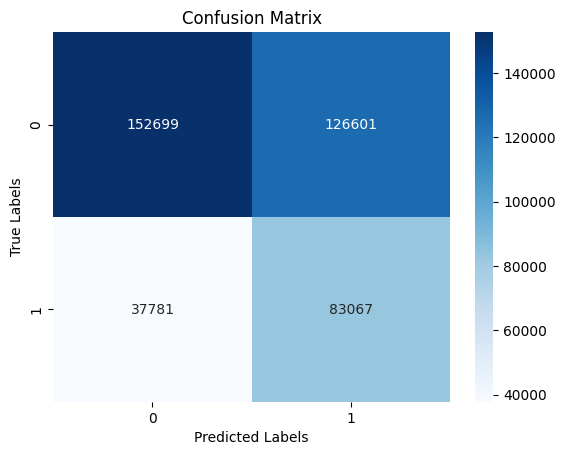

In [ ]:
num_features1 = 10
full_workflow(data, target, important_features, num_features1, sample_fraction=0.1, epochs=1000, batch_size=50000, patience=5, learning_rate=0.01)